In [1]:
# Python Packages
import os
# 3rd Party Packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.backend import get_session
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
# User Packages
from model import ShallowNet, MiniVGGNet
from callback import TrainingLogger

print('Tensorflow version: {}'.format(tf.__version__))

Tensorflow version: 1.12.0


In [2]:
def step_decay(epoch: int) -> float:
    initAlpha = 0.1
    factor = 0.5
    dropEvery = 5
    # Learning rate per epoch
    return float(initAlpha * (factor ** np.floor((1 + epoch) / dropEvery)))

In [3]:
print("[INFO] loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype(np.float) / 255.0
testX = testX.astype(np.float) / 255.0

# One-hot encoding
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

print('Training data shape: {}'.format(trainX.shape))
print('Training labels shape: {}'.format(trainY.shape))
print('Test data shape: {}'.format(testX.shape))
print('Test labels shape: {}'.format(testY.shape))

labelNames = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

print("[INFO] compiling model...")

callbacks = [
    LearningRateScheduler(
        schedule=step_decay,
        verbose=0
    ),
    TrainingLogger(
        figure_path=r'output/minivggnet.png',
        json_path=r'output/minivggnet.json'
    ),
    ModelCheckpoint(
        filepath=r'output/minivggnet.hdf5',
        monitor='val_loss',
        mode='min',
        save_best_only=True,
        save_weights_only=False,
        period=1,
        verbose=1
    )
]

opt = SGD(
    lr=0.01,
    decay=0.01/40,
    momentum=0.9,
    nesterov=True
)

parameters = {
    'width':    32,
    'height':   32,
    'channels': 3,
    'classes':  10
}
#model = ShallowNet.build(parameters)
model = MiniVGGNet.build(parameters)
model.compile(
    loss="categorical_crossentropy",
    optimizer=opt,
    metrics=["accuracy"]
)
# Print model summary
model.summary()

# Write Tensorboard model to disk
file_writer = tf.summary.FileWriter(r'output', get_session().graph)

[INFO] loading CIFAR-10 data...


Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 10)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 10)
[INFO] compiling model...


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9248      
__________

In [4]:
print("[INFO] training network...")
N_EPOCHS = 40
H = model.fit(
    trainX, trainY, 
    validation_data=(testX, testY),
    batch_size=32,
    epochs=N_EPOCHS,
    callbacks=callbacks,
    verbose=1
)

[INFO] training network...


Train on 50000 samples, validate on 10000 samples
Epoch 1/40


   32/50000 [..............................] - ETA: 19:08 - loss: 4.0855 - acc: 0.1250

  320/50000 [..............................] - ETA: 2:02 - loss: 5.3991 - acc: 0.1469 

  576/50000 [..............................] - ETA: 1:12 - loss: 5.9676 - acc: 0.1632

  864/50000 [..............................] - ETA: 50s - loss: 6.2149 - acc: 0.1539 

 1152/50000 [..............................] - ETA: 40s - loss: 5.9225 - acc: 0.1606

 1440/50000 [..............................] - ETA: 33s - loss: 5.6909 - acc: 0.1653

 1728/50000 [>.............................] - ETA: 29s - loss: 5.5521 - acc: 0.1562

 2016/50000 [>.............................] - ETA: 26s - loss: 5.4745 - acc: 0.1533

 2336/50000 [>.............................] - ETA: 23s - loss: 5.3516 - acc: 0.1490

 2656/50000 [>.............................] - ETA: 21s - loss: 5.2033 - acc: 0.1491

 2976/50000 [>.............................] - ETA: 20s - loss: 5.0451 - acc: 0.1468

 3296/50000 [>.............................] - ETA: 18s - loss: 4.9182 - acc: 0.1459

 3616/50000 [=>............................] - ETA: 17s - loss: 4.8709 - acc: 0.1430

 3936/50000 [=>............................] - ETA: 16s - loss: 4.8564 - acc: 0.1438

 4256/50000 [=>............................] - ETA: 15s - loss: 4.8135 - acc: 0.1433

 4576/50000 [=>............................] - ETA: 15s - loss: 4.7264 - acc: 0.1438

 4896/50000 [=>............................] - ETA: 14s - loss: 4.6514 - acc: 0.1452

 5216/50000 [==>...........................] - ETA: 14s - loss: 4.6110 - acc: 0.1444

 5536/50000 [==>...........................] - ETA: 13s - loss: 4.5730 - acc: 0.1445

 5856/50000 [==>...........................] - ETA: 13s - loss: 4.5230 - acc: 0.1436

 6176/50000 [==>...........................] - ETA: 12s - loss: 4.4609 - acc: 0.1469

 6496/50000 [==>...........................] - ETA: 12s - loss: 4.4473 - acc: 0.1475

 6816/50000 [===>..........................] - ETA: 11s - loss: 4.4097 - acc: 0.1489

 7136/50000 [===>..........................] - ETA: 11s - loss: 4.3698 - acc: 0.1498

 7456/50000 [===>..........................] - ETA: 11s - loss: 4.3288 - acc: 0.1529

 7776/50000 [===>..........................] - ETA: 11s - loss: 4.2973 - acc: 0.1546

 8096/50000 [===>..........................] - ETA: 10s - loss: 4.2690 - acc: 0.1553

 8416/50000 [====>.........................] - ETA: 10s - loss: 4.2478 - acc: 0.1559

 8736/50000 [====>.........................] - ETA: 10s - loss: 4.2219 - acc: 0.1557

 9056/50000 [====>.........................] - ETA: 10s - loss: 4.1829 - acc: 0.1566

 9376/50000 [====>.........................] - ETA: 9s - loss: 4.1393 - acc: 0.1581 

 9696/50000 [====>.........................] - ETA: 9s - loss: 4.1057 - acc: 0.1576

10016/50000 [=====>........................] - ETA: 9s - loss: 4.0653 - acc: 0.1586

10336/50000 [=====>........................] - ETA: 9s - loss: 4.0266 - acc: 0.1597

10656/50000 [=====>........................] - ETA: 9s - loss: 3.9898 - acc: 0.1607

10976/50000 [=====>........................] - ETA: 9s - loss: 3.9614 - acc: 0.1603

11296/50000 [=====>........................] - ETA: 8s - loss: 3.9308 - acc: 0.1596

11616/50000 [=====>........................] - ETA: 8s - loss: 3.8958 - acc: 0.1594

11936/50000 [======>.......................] - ETA: 8s - loss: 3.8708 - acc: 0.1604

12256/50000 [======>.......................] - ETA: 8s - loss: 3.8408 - acc: 0.1606

12576/50000 [======>.......................] - ETA: 8s - loss: 3.8087 - acc: 0.1617

12896/50000 [======>.......................] - ETA: 8s - loss: 3.7821 - acc: 0.1621

13216/50000 [======>.......................] - ETA: 8s - loss: 3.7486 - acc: 0.1635

13536/50000 [=======>......................] - ETA: 8s - loss: 3.7190 - acc: 0.1649

13824/50000 [=======>......................] - ETA: 7s - loss: 3.6909 - acc: 0.1658

14144/50000 [=======>......................] - ETA: 7s - loss: 3.6626 - acc: 0.1663

14464/50000 [=======>......................] - ETA: 7s - loss: 3.6367 - acc: 0.1670

14784/50000 [=======>......................] - ETA: 7s - loss: 3.6087 - acc: 0.1684

15104/50000 [========>.....................] - ETA: 7s - loss: 3.5819 - acc: 0.1694

15424/50000 [========>.....................] - ETA: 7s - loss: 3.5637 - acc: 0.1694

15744/50000 [========>.....................] - ETA: 7s - loss: 3.5438 - acc: 0.1703

16064/50000 [========>.....................] - ETA: 7s - loss: 3.5232 - acc: 0.1704

16384/50000 [========>.....................] - ETA: 7s - loss: 3.5028 - acc: 0.1705

16704/50000 [=========>....................] - ETA: 7s - loss: 3.4808 - acc: 0.1709

17024/50000 [=========>....................] - ETA: 6s - loss: 3.4598 - acc: 0.1718

17344/50000 [=========>....................] - ETA: 6s - loss: 3.4387 - acc: 0.1723

17664/50000 [=========>....................] - ETA: 6s - loss: 3.4184 - acc: 0.1728

17984/50000 [=========>....................] - ETA: 6s - loss: 3.3970 - acc: 0.1743

18304/50000 [=========>....................] - ETA: 6s - loss: 3.3761 - acc: 0.1752

18624/50000 [==========>...................] - ETA: 6s - loss: 3.3564 - acc: 0.1769

18944/50000 [==========>...................] - ETA: 6s - loss: 3.3358 - acc: 0.1782

19264/50000 [==========>...................] - ETA: 6s - loss: 3.3186 - acc: 0.1792

19552/50000 [==========>...................] - ETA: 6s - loss: 3.3035 - acc: 0.1795

19712/50000 [==========>...................] - ETA: 6s - loss: 3.2952 - acc: 0.1798

20032/50000 [===========>..................] - ETA: 6s - loss: 3.2781 - acc: 0.1800

20352/50000 [===========>..................] - ETA: 6s - loss: 3.2586 - acc: 0.1810

20608/50000 [===========>..................] - ETA: 5s - loss: 3.2439 - acc: 0.1819

20896/50000 [===========>..................] - ETA: 5s - loss: 3.2287 - acc: 0.1825

21216/50000 [===========>..................] - ETA: 5s - loss: 3.2133 - acc: 0.1833

21536/50000 [===========>..................] - ETA: 5s - loss: 3.1974 - acc: 0.1844

21824/50000 [============>.................] - ETA: 5s - loss: 3.1835 - acc: 0.1850

22144/50000 [============>.................] - ETA: 5s - loss: 3.1692 - acc: 0.1854

22464/50000 [============>.................] - ETA: 5s - loss: 3.1528 - acc: 0.1865

22720/50000 [============>.................] - ETA: 5s - loss: 3.1402 - acc: 0.1876

23008/50000 [============>.................] - ETA: 5s - loss: 3.1281 - acc: 0.1878

23296/50000 [============>.................] - ETA: 5s - loss: 3.1143 - acc: 0.1890

23616/50000 [=============>................] - ETA: 5s - loss: 3.1022 - acc: 0.1892

23936/50000 [=============>................] - ETA: 5s - loss: 3.0888 - acc: 0.1900

24224/50000 [=============>................] - ETA: 5s - loss: 3.0758 - acc: 0.1911

24480/50000 [=============>................] - ETA: 5s - loss: 3.0655 - acc: 0.1919

24768/50000 [=============>................] - ETA: 5s - loss: 3.0542 - acc: 0.1927

25088/50000 [==============>...............] - ETA: 4s - loss: 3.0408 - acc: 0.1939

25408/50000 [==============>...............] - ETA: 4s - loss: 3.0286 - acc: 0.1947

25728/50000 [==============>...............] - ETA: 4s - loss: 3.0173 - acc: 0.1952

26016/50000 [==============>...............] - ETA: 4s - loss: 3.0060 - acc: 0.1962

26336/50000 [==============>...............] - ETA: 4s - loss: 2.9954 - acc: 0.1968

26656/50000 [==============>...............] - ETA: 4s - loss: 2.9839 - acc: 0.1974

26976/50000 [===============>..............] - ETA: 4s - loss: 2.9726 - acc: 0.1981

27296/50000 [===============>..............] - ETA: 4s - loss: 2.9610 - acc: 0.1987

27616/50000 [===============>..............] - ETA: 4s - loss: 2.9500 - acc: 0.1993

27936/50000 [===============>..............] - ETA: 4s - loss: 2.9400 - acc: 0.1997

28256/50000 [===============>..............] - ETA: 4s - loss: 2.9302 - acc: 0.2005

28544/50000 [================>.............] - ETA: 4s - loss: 2.9206 - acc: 0.2010

28832/50000 [================>.............] - ETA: 4s - loss: 2.9125 - acc: 0.2013

29152/50000 [================>.............] - ETA: 4s - loss: 2.9036 - acc: 0.2017

29472/50000 [================>.............] - ETA: 3s - loss: 2.8940 - acc: 0.2024

29792/50000 [================>.............] - ETA: 3s - loss: 2.8838 - acc: 0.2034

30112/50000 [=================>............] - ETA: 3s - loss: 2.8740 - acc: 0.2045

30432/50000 [=================>............] - ETA: 3s - loss: 2.8646 - acc: 0.2056

30720/50000 [=================>............] - ETA: 3s - loss: 2.8558 - acc: 0.2063

31040/50000 [=================>............] - ETA: 3s - loss: 2.8467 - acc: 0.2074

31328/50000 [=================>............] - ETA: 3s - loss: 2.8390 - acc: 0.2080

31648/50000 [=================>............] - ETA: 3s - loss: 2.8312 - acc: 0.2083

31968/50000 [==================>...........] - ETA: 3s - loss: 2.8233 - acc: 0.2087

32288/50000 [==================>...........] - ETA: 3s - loss: 2.8146 - acc: 0.2095

32608/50000 [==================>...........] - ETA: 3s - loss: 2.8067 - acc: 0.2100

32928/50000 [==================>...........] - ETA: 3s - loss: 2.7988 - acc: 0.2107

33216/50000 [==================>...........] - ETA: 3s - loss: 2.7918 - acc: 0.2113

33536/50000 [===================>..........] - ETA: 3s - loss: 2.7843 - acc: 0.2118

33856/50000 [===================>..........] - ETA: 3s - loss: 2.7769 - acc: 0.2120

34176/50000 [===================>..........] - ETA: 3s - loss: 2.7704 - acc: 0.2121

34496/50000 [===================>..........] - ETA: 2s - loss: 2.7631 - acc: 0.2126

34816/50000 [===================>..........] - ETA: 2s - loss: 2.7556 - acc: 0.2137

35136/50000 [====================>.........] - ETA: 2s - loss: 2.7479 - acc: 0.2141

35456/50000 [====================>.........] - ETA: 2s - loss: 2.7406 - acc: 0.2151

35776/50000 [====================>.........] - ETA: 2s - loss: 2.7328 - acc: 0.2158

36096/50000 [====================>.........] - ETA: 2s - loss: 2.7269 - acc: 0.2160

36416/50000 [====================>.........] - ETA: 2s - loss: 2.7202 - acc: 0.2163

36736/50000 [=====================>........] - ETA: 2s - loss: 2.7133 - acc: 0.2168

37056/50000 [=====================>........] - ETA: 2s - loss: 2.7073 - acc: 0.2169

37376/50000 [=====================>........] - ETA: 2s - loss: 2.7006 - acc: 0.2178

37696/50000 [=====================>........] - ETA: 2s - loss: 2.6945 - acc: 0.2181

38016/50000 [=====================>........] - ETA: 2s - loss: 2.6887 - acc: 0.2186

38336/50000 [======================>.......] - ETA: 2s - loss: 2.6830 - acc: 0.2190

38656/50000 [======================>.......] - ETA: 2s - loss: 2.6772 - acc: 0.2191

38976/50000 [======================>.......] - ETA: 2s - loss: 2.6714 - acc: 0.2196

39296/50000 [======================>.......] - ETA: 2s - loss: 2.6655 - acc: 0.2201

39616/50000 [======================>.......] - ETA: 1s - loss: 2.6601 - acc: 0.2207

39936/50000 [======================>.......] - ETA: 1s - loss: 2.6543 - acc: 0.2215

40256/50000 [=======================>......] - ETA: 1s - loss: 2.6494 - acc: 0.2215

40576/50000 [=======================>......] - ETA: 1s - loss: 2.6442 - acc: 0.2214

40896/50000 [=======================>......] - ETA: 1s - loss: 2.6388 - acc: 0.2222

41184/50000 [=======================>......] - ETA: 1s - loss: 2.6341 - acc: 0.2227

41472/50000 [=======================>......] - ETA: 1s - loss: 2.6292 - acc: 0.2231

41792/50000 [========================>.....] - ETA: 1s - loss: 2.6246 - acc: 0.2236

42112/50000 [========================>.....] - ETA: 1s - loss: 2.6199 - acc: 0.2239

42400/50000 [========================>.....] - ETA: 1s - loss: 2.6147 - acc: 0.2246

42624/50000 [========================>.....] - ETA: 1s - loss: 2.6117 - acc: 0.2248

42816/50000 [========================>.....] - ETA: 1s - loss: 2.6087 - acc: 0.2251

43104/50000 [========================>.....] - ETA: 1s - loss: 2.6038 - acc: 0.2254

43424/50000 [=========================>....] - ETA: 1s - loss: 2.5989 - acc: 0.2260

43712/50000 [=========================>....] - ETA: 1s - loss: 2.5947 - acc: 0.2264

44032/50000 [=========================>....] - ETA: 1s - loss: 2.5896 - acc: 0.2270

44352/50000 [=========================>....] - ETA: 1s - loss: 2.5837 - acc: 0.2275

44672/50000 [=========================>....] - ETA: 0s - loss: 2.5782 - acc: 0.2282

44992/50000 [=========================>....] - ETA: 0s - loss: 2.5731 - acc: 0.2287

45312/50000 [==========================>...] - ETA: 0s - loss: 2.5680 - acc: 0.2292

45536/50000 [==========================>...] - ETA: 0s - loss: 2.5649 - acc: 0.2296

45824/50000 [==========================>...] - ETA: 0s - loss: 2.5607 - acc: 0.2303

46144/50000 [==========================>...] - ETA: 0s - loss: 2.5554 - acc: 0.2308

46464/50000 [==========================>...] - ETA: 0s - loss: 2.5506 - acc: 0.2313

46784/50000 [===========================>..] - ETA: 0s - loss: 2.5456 - acc: 0.2318

47104/50000 [===========================>..] - ETA: 0s - loss: 2.5409 - acc: 0.2323

47424/50000 [===========================>..] - ETA: 0s - loss: 2.5373 - acc: 0.2326

47744/50000 [===========================>..] - ETA: 0s - loss: 2.5337 - acc: 0.2326

48064/50000 [===========================>..] - ETA: 0s - loss: 2.5294 - acc: 0.2329

48384/50000 [============================>.] - ETA: 0s - loss: 2.5249 - acc: 0.2336

48704/50000 [============================>.] - ETA: 0s - loss: 2.5209 - acc: 0.2342

48992/50000 [============================>.] - ETA: 0s - loss: 2.5172 - acc: 0.2347

49312/50000 [============================>.] - ETA: 0s - loss: 2.5134 - acc: 0.2350

49632/50000 [============================>.] - ETA: 0s - loss: 2.5085 - acc: 0.2356

49952/50000 [============================>.] - ETA: 0s - loss: 2.5045 - acc: 0.2361


Epoch 00001: val_loss improved from inf to 1.78800, saving model to output/minivggnet.hdf5
50000/50000 [==============================] - 10s 199us/step - loss: 2.5038 - acc: 0.2361 - val_loss: 1.7880 - val_acc: 0.3233


Epoch 2/40
   32/50000 [..............................] - ETA: 12s - loss: 2.0812 - acc: 0.1875

  320/50000 [..............................] - ETA: 9s - loss: 1.9635 - acc: 0.3031 

  640/50000 [..............................] - ETA: 8s - loss: 1.9262 - acc: 0.3016

  928/50000 [..............................] - ETA: 9s - loss: 1.8946 - acc: 0.3082

 1216/50000 [..............................] - ETA: 9s - loss: 1.9119 - acc: 0.3043

 1536/50000 [..............................] - ETA: 8s - loss: 1.8821 - acc: 0.3171

 1824/50000 [>.............................] - ETA: 8s - loss: 1.8602 - acc: 0.3235

 2144/50000 [>.............................] - ETA: 8s - loss: 1.8594 - acc: 0.3223

 2464/50000 [>.............................] - ETA: 8s - loss: 1.8573 - acc: 0.3247

 2784/50000 [>.............................] - ETA: 8s - loss: 1.8490 - acc: 0.3254

 3104/50000 [>.............................] - ETA: 8s - loss: 1.8462 - acc: 0.3260

 3424/50000 [=>............................] - ETA: 7s - loss: 1.8476 - acc: 0.3254

 3744/50000 [=>............................] - ETA: 7s - loss: 1.8428 - acc: 0.3245

 4064/50000 [=>............................] - ETA: 7s - loss: 1.8527 - acc: 0.3228

 4352/50000 [=>............................] - ETA: 7s - loss: 1.8534 - acc: 0.3208

 4672/50000 [=>............................] - ETA: 7s - loss: 1.8552 - acc: 0.3206

 4992/50000 [=>............................] - ETA: 7s - loss: 1.8570 - acc: 0.3191

 5312/50000 [==>...........................] - ETA: 7s - loss: 1.8567 - acc: 0.3204

 5632/50000 [==>...........................] - ETA: 7s - loss: 1.8584 - acc: 0.3203

 5920/50000 [==>...........................] - ETA: 7s - loss: 1.8624 - acc: 0.3193

 6240/50000 [==>...........................] - ETA: 7s - loss: 1.8655 - acc: 0.3181

 6560/50000 [==>...........................] - ETA: 7s - loss: 1.8613 - acc: 0.3197

 6880/50000 [===>..........................] - ETA: 7s - loss: 1.8624 - acc: 0.3203

 7168/50000 [===>..........................] - ETA: 7s - loss: 1.8591 - acc: 0.3225

 7488/50000 [===>..........................] - ETA: 7s - loss: 1.8593 - acc: 0.3224

 7776/50000 [===>..........................] - ETA: 7s - loss: 1.8543 - acc: 0.3241

 8096/50000 [===>..........................] - ETA: 7s - loss: 1.8553 - acc: 0.3249

 8416/50000 [====>.........................] - ETA: 6s - loss: 1.8576 - acc: 0.3237

 8736/50000 [====>.........................] - ETA: 6s - loss: 1.8547 - acc: 0.3235

 9056/50000 [====>.........................] - ETA: 6s - loss: 1.8522 - acc: 0.3244

 9376/50000 [====>.........................] - ETA: 6s - loss: 1.8503 - acc: 0.3258

 9696/50000 [====>.........................] - ETA: 6s - loss: 1.8527 - acc: 0.3243

 9984/50000 [====>.........................] - ETA: 6s - loss: 1.8529 - acc: 0.3249

10272/50000 [=====>........................] - ETA: 6s - loss: 1.8534 - acc: 0.3246

10592/50000 [=====>........................] - ETA: 6s - loss: 1.8528 - acc: 0.3248

10912/50000 [=====>........................] - ETA: 6s - loss: 1.8489 - acc: 0.3258

11232/50000 [=====>........................] - ETA: 6s - loss: 1.8479 - acc: 0.3260

11552/50000 [=====>........................] - ETA: 6s - loss: 1.8432 - acc: 0.3270

11872/50000 [======>.......................] - ETA: 6s - loss: 1.8437 - acc: 0.3257

12160/50000 [======>.......................] - ETA: 6s - loss: 1.8429 - acc: 0.3257

12480/50000 [======>.......................] - ETA: 6s - loss: 1.8431 - acc: 0.3251

12768/50000 [======>.......................] - ETA: 6s - loss: 1.8421 - acc: 0.3253

13088/50000 [======>.......................] - ETA: 6s - loss: 1.8435 - acc: 0.3250

13408/50000 [=======>......................] - ETA: 6s - loss: 1.8429 - acc: 0.3250

13696/50000 [=======>......................] - ETA: 6s - loss: 1.8410 - acc: 0.3252

13984/50000 [=======>......................] - ETA: 6s - loss: 1.8397 - acc: 0.3251

14304/50000 [=======>......................] - ETA: 5s - loss: 1.8406 - acc: 0.3255

14624/50000 [=======>......................] - ETA: 5s - loss: 1.8400 - acc: 0.3256

14944/50000 [=======>......................] - ETA: 5s - loss: 1.8387 - acc: 0.3256

15264/50000 [========>.....................] - ETA: 5s - loss: 1.8386 - acc: 0.3251

15552/50000 [========>.....................] - ETA: 5s - loss: 1.8370 - acc: 0.3265

15872/50000 [========>.....................] - ETA: 5s - loss: 1.8361 - acc: 0.3272

16192/50000 [========>.....................] - ETA: 5s - loss: 1.8343 - acc: 0.3286

16512/50000 [========>.....................] - ETA: 5s - loss: 1.8339 - acc: 0.3293

16832/50000 [=========>....................] - ETA: 5s - loss: 1.8335 - acc: 0.3301

17152/50000 [=========>....................] - ETA: 5s - loss: 1.8327 - acc: 0.3305

17472/50000 [=========>....................] - ETA: 5s - loss: 1.8317 - acc: 0.3310

17792/50000 [=========>....................] - ETA: 5s - loss: 1.8306 - acc: 0.3313

18112/50000 [=========>....................] - ETA: 5s - loss: 1.8295 - acc: 0.3318

18400/50000 [==========>...................] - ETA: 5s - loss: 1.8304 - acc: 0.3307

18720/50000 [==========>...................] - ETA: 5s - loss: 1.8304 - acc: 0.3303

19040/50000 [==========>...................] - ETA: 5s - loss: 1.8295 - acc: 0.3306

19360/50000 [==========>...................] - ETA: 5s - loss: 1.8297 - acc: 0.3301

19680/50000 [==========>...................] - ETA: 5s - loss: 1.8295 - acc: 0.3305

20000/50000 [===========>..................] - ETA: 5s - loss: 1.8282 - acc: 0.3317

20320/50000 [===========>..................] - ETA: 4s - loss: 1.8294 - acc: 0.3315

20640/50000 [===========>..................] - ETA: 4s - loss: 1.8279 - acc: 0.3320

20960/50000 [===========>..................] - ETA: 4s - loss: 1.8283 - acc: 0.3327

21280/50000 [===========>..................] - ETA: 4s - loss: 1.8283 - acc: 0.3327

21600/50000 [===========>..................] - ETA: 4s - loss: 1.8284 - acc: 0.3326

21920/50000 [============>.................] - ETA: 4s - loss: 1.8282 - acc: 0.3327

22240/50000 [============>.................] - ETA: 4s - loss: 1.8283 - acc: 0.3325

22528/50000 [============>.................] - ETA: 4s - loss: 1.8284 - acc: 0.3326

22848/50000 [============>.................] - ETA: 4s - loss: 1.8272 - acc: 0.3336

23168/50000 [============>.................] - ETA: 4s - loss: 1.8271 - acc: 0.3338

23488/50000 [=============>................] - ETA: 4s - loss: 1.8265 - acc: 0.3340

23808/50000 [=============>................] - ETA: 4s - loss: 1.8262 - acc: 0.3340

24128/50000 [=============>................] - ETA: 4s - loss: 1.8256 - acc: 0.3348

24448/50000 [=============>................] - ETA: 4s - loss: 1.8241 - acc: 0.3350

24736/50000 [=============>................] - ETA: 4s - loss: 1.8242 - acc: 0.3350

25056/50000 [==============>...............] - ETA: 4s - loss: 1.8246 - acc: 0.3351

25376/50000 [==============>...............] - ETA: 4s - loss: 1.8248 - acc: 0.3350

25696/50000 [==============>...............] - ETA: 4s - loss: 1.8248 - acc: 0.3352

25984/50000 [==============>...............] - ETA: 3s - loss: 1.8234 - acc: 0.3357

26304/50000 [==============>...............] - ETA: 3s - loss: 1.8226 - acc: 0.3365

26592/50000 [==============>...............] - ETA: 3s - loss: 1.8226 - acc: 0.3367

26912/50000 [===============>..............] - ETA: 3s - loss: 1.8222 - acc: 0.3368

27232/50000 [===============>..............] - ETA: 3s - loss: 1.8216 - acc: 0.3371

27520/50000 [===============>..............] - ETA: 3s - loss: 1.8206 - acc: 0.3375

27840/50000 [===============>..............] - ETA: 3s - loss: 1.8197 - acc: 0.3383

28160/50000 [===============>..............] - ETA: 3s - loss: 1.8201 - acc: 0.3380

28448/50000 [================>.............] - ETA: 3s - loss: 1.8198 - acc: 0.3382

28736/50000 [================>.............] - ETA: 3s - loss: 1.8187 - acc: 0.3383

29056/50000 [================>.............] - ETA: 3s - loss: 1.8182 - acc: 0.3381

29376/50000 [================>.............] - ETA: 3s - loss: 1.8175 - acc: 0.3386

29728/50000 [================>.............] - ETA: 3s - loss: 1.8185 - acc: 0.3383

30048/50000 [=================>............] - ETA: 3s - loss: 1.8179 - acc: 0.3386

30368/50000 [=================>............] - ETA: 3s - loss: 1.8173 - acc: 0.3389

30656/50000 [=================>............] - ETA: 3s - loss: 1.8158 - acc: 0.3395

30976/50000 [=================>............] - ETA: 3s - loss: 1.8157 - acc: 0.3398

31296/50000 [=================>............] - ETA: 3s - loss: 1.8153 - acc: 0.3397

31616/50000 [=================>............] - ETA: 3s - loss: 1.8146 - acc: 0.3399

31936/50000 [==================>...........] - ETA: 3s - loss: 1.8128 - acc: 0.3401

32256/50000 [==================>...........] - ETA: 2s - loss: 1.8124 - acc: 0.3400

32576/50000 [==================>...........] - ETA: 2s - loss: 1.8122 - acc: 0.3401

32896/50000 [==================>...........] - ETA: 2s - loss: 1.8124 - acc: 0.3398

33216/50000 [==================>...........] - ETA: 2s - loss: 1.8123 - acc: 0.3395

33536/50000 [===================>..........] - ETA: 2s - loss: 1.8115 - acc: 0.3399

33824/50000 [===================>..........] - ETA: 2s - loss: 1.8108 - acc: 0.3405

34144/50000 [===================>..........] - ETA: 2s - loss: 1.8093 - acc: 0.3413

34464/50000 [===================>..........] - ETA: 2s - loss: 1.8091 - acc: 0.3410

34816/50000 [===================>..........] - ETA: 2s - loss: 1.8085 - acc: 0.3410

35136/50000 [====================>.........] - ETA: 2s - loss: 1.8079 - acc: 0.3412

35456/50000 [====================>.........] - ETA: 2s - loss: 1.8069 - acc: 0.3415

35776/50000 [====================>.........] - ETA: 2s - loss: 1.8067 - acc: 0.3417

36096/50000 [====================>.........] - ETA: 2s - loss: 1.8052 - acc: 0.3420

36416/50000 [====================>.........] - ETA: 2s - loss: 1.8042 - acc: 0.3423

36704/50000 [=====================>........] - ETA: 2s - loss: 1.8038 - acc: 0.3424

37024/50000 [=====================>........] - ETA: 2s - loss: 1.8036 - acc: 0.3423

37344/50000 [=====================>........] - ETA: 2s - loss: 1.8029 - acc: 0.3427

37664/50000 [=====================>........] - ETA: 2s - loss: 1.8019 - acc: 0.3431

37984/50000 [=====================>........] - ETA: 1s - loss: 1.8020 - acc: 0.3433

38304/50000 [=====================>........] - ETA: 1s - loss: 1.8008 - acc: 0.3438

38624/50000 [======================>.......] - ETA: 1s - loss: 1.8000 - acc: 0.3439

38944/50000 [======================>.......] - ETA: 1s - loss: 1.7992 - acc: 0.3439

39232/50000 [======================>.......] - ETA: 1s - loss: 1.7986 - acc: 0.3441

39552/50000 [======================>.......] - ETA: 1s - loss: 1.7986 - acc: 0.3442

39840/50000 [======================>.......] - ETA: 1s - loss: 1.7984 - acc: 0.3442

40160/50000 [=======================>......] - ETA: 1s - loss: 1.7982 - acc: 0.3442

40448/50000 [=======================>......] - ETA: 1s - loss: 1.7978 - acc: 0.3444

40736/50000 [=======================>......] - ETA: 1s - loss: 1.7977 - acc: 0.3444

41024/50000 [=======================>......] - ETA: 1s - loss: 1.7974 - acc: 0.3446

41344/50000 [=======================>......] - ETA: 1s - loss: 1.7971 - acc: 0.3446

41664/50000 [=======================>......] - ETA: 1s - loss: 1.7965 - acc: 0.3447

41952/50000 [========================>.....] - ETA: 1s - loss: 1.7965 - acc: 0.3447

42272/50000 [========================>.....] - ETA: 1s - loss: 1.7967 - acc: 0.3447

42592/50000 [========================>.....] - ETA: 1s - loss: 1.7961 - acc: 0.3451

42880/50000 [========================>.....] - ETA: 1s - loss: 1.7956 - acc: 0.3450

43200/50000 [========================>.....] - ETA: 1s - loss: 1.7947 - acc: 0.3450

43520/50000 [=========================>....] - ETA: 1s - loss: 1.7940 - acc: 0.3453

43840/50000 [=========================>....] - ETA: 1s - loss: 1.7945 - acc: 0.3454

44160/50000 [=========================>....] - ETA: 0s - loss: 1.7940 - acc: 0.3457

44480/50000 [=========================>....] - ETA: 0s - loss: 1.7931 - acc: 0.3458

44800/50000 [=========================>....] - ETA: 0s - loss: 1.7923 - acc: 0.3461

45120/50000 [==========================>...] - ETA: 0s - loss: 1.7932 - acc: 0.3459

45440/50000 [==========================>...] - ETA: 0s - loss: 1.7930 - acc: 0.3461

45728/50000 [==========================>...] - ETA: 0s - loss: 1.7931 - acc: 0.3464

46048/50000 [==========================>...] - ETA: 0s - loss: 1.7926 - acc: 0.3464

46368/50000 [==========================>...] - ETA: 0s - loss: 1.7922 - acc: 0.3464

46688/50000 [===========================>..] - ETA: 0s - loss: 1.7919 - acc: 0.3464

47008/50000 [===========================>..] - ETA: 0s - loss: 1.7914 - acc: 0.3465

47328/50000 [===========================>..] - ETA: 0s - loss: 1.7907 - acc: 0.3467

47648/50000 [===========================>..] - ETA: 0s - loss: 1.7898 - acc: 0.3470

47968/50000 [===========================>..] - ETA: 0s - loss: 1.7896 - acc: 0.3471

48288/50000 [===========================>..] - ETA: 0s - loss: 1.7891 - acc: 0.3473

48608/50000 [============================>.] - ETA: 0s - loss: 1.7883 - acc: 0.3475

48896/50000 [============================>.] - ETA: 0s - loss: 1.7876 - acc: 0.3476

49216/50000 [============================>.] - ETA: 0s - loss: 1.7875 - acc: 0.3473

49536/50000 [============================>.] - ETA: 0s - loss: 1.7874 - acc: 0.3475

49856/50000 [============================>.] - ETA: 0s - loss: 1.7871 - acc: 0.3477


Epoch 00002: val_loss improved from 1.78800 to 1.56158, saving model to output/minivggnet.hdf5
50000/50000 [==============================] - 9s 177us/step - loss: 1.7871 - acc: 0.3476 - val_loss: 1.5616 - val_acc: 0.4301


Epoch 3/40
   32/50000 [..............................] - ETA: 10s - loss: 1.5440 - acc: 0.3125

  320/50000 [..............................] - ETA: 9s - loss: 1.6882 - acc: 0.3625 

  640/50000 [..............................] - ETA: 8s - loss: 1.7271 - acc: 0.3500

  960/50000 [..............................] - ETA: 8s - loss: 1.7376 - acc: 0.3542

 1280/50000 [..............................] - ETA: 8s - loss: 1.7328 - acc: 0.3563

 1568/50000 [..............................] - ETA: 8s - loss: 1.7258 - acc: 0.3622

 1856/50000 [>.............................] - ETA: 8s - loss: 1.7274 - acc: 0.3626

 2176/50000 [>.............................] - ETA: 8s - loss: 1.7307 - acc: 0.3612

 2464/50000 [>.............................] - ETA: 8s - loss: 1.7365 - acc: 0.3628

 2784/50000 [>.............................] - ETA: 8s - loss: 1.7130 - acc: 0.3743

 3104/50000 [>.............................] - ETA: 8s - loss: 1.7153 - acc: 0.3773

 3424/50000 [=>............................] - ETA: 8s - loss: 1.7091 - acc: 0.3779

 3712/50000 [=>............................] - ETA: 7s - loss: 1.7048 - acc: 0.3788

 4032/50000 [=>............................] - ETA: 7s - loss: 1.7022 - acc: 0.3760

 4352/50000 [=>............................] - ETA: 7s - loss: 1.6927 - acc: 0.3796

 4672/50000 [=>............................] - ETA: 7s - loss: 1.6903 - acc: 0.3816

 4960/50000 [=>............................] - ETA: 7s - loss: 1.6913 - acc: 0.3815

 5280/50000 [==>...........................] - ETA: 7s - loss: 1.6867 - acc: 0.3833

 5600/50000 [==>...........................] - ETA: 7s - loss: 1.6862 - acc: 0.3834

 5920/50000 [==>...........................] - ETA: 7s - loss: 1.6875 - acc: 0.3829

 6240/50000 [==>...........................] - ETA: 7s - loss: 1.6843 - acc: 0.3841

 6560/50000 [==>...........................] - ETA: 7s - loss: 1.6850 - acc: 0.3858

 6848/50000 [===>..........................] - ETA: 7s - loss: 1.6878 - acc: 0.3854

 7168/50000 [===>..........................] - ETA: 7s - loss: 1.6940 - acc: 0.3842

 7488/50000 [===>..........................] - ETA: 7s - loss: 1.6971 - acc: 0.3831

 7808/50000 [===>..........................] - ETA: 7s - loss: 1.6985 - acc: 0.3810

 8096/50000 [===>..........................] - ETA: 7s - loss: 1.7006 - acc: 0.3796

 8416/50000 [====>.........................] - ETA: 6s - loss: 1.7007 - acc: 0.3796

 8736/50000 [====>.........................] - ETA: 6s - loss: 1.7020 - acc: 0.3783

 9056/50000 [====>.........................] - ETA: 6s - loss: 1.7019 - acc: 0.3777

 9376/50000 [====>.........................] - ETA: 6s - loss: 1.7041 - acc: 0.3762

 9664/50000 [====>.........................] - ETA: 6s - loss: 1.7023 - acc: 0.3771

 9984/50000 [====>.........................] - ETA: 6s - loss: 1.7028 - acc: 0.3768

10304/50000 [=====>........................] - ETA: 6s - loss: 1.7027 - acc: 0.3773

10624/50000 [=====>........................] - ETA: 6s - loss: 1.7044 - acc: 0.3770

10912/50000 [=====>........................] - ETA: 6s - loss: 1.7038 - acc: 0.3778

11232/50000 [=====>........................] - ETA: 6s - loss: 1.7032 - acc: 0.3787

11552/50000 [=====>........................] - ETA: 6s - loss: 1.7030 - acc: 0.3784

11872/50000 [======>.......................] - ETA: 6s - loss: 1.7026 - acc: 0.3790

12160/50000 [======>.......................] - ETA: 6s - loss: 1.7017 - acc: 0.3793

12480/50000 [======>.......................] - ETA: 6s - loss: 1.7030 - acc: 0.3786

12736/50000 [======>.......................] - ETA: 6s - loss: 1.7008 - acc: 0.3788

13024/50000 [======>.......................] - ETA: 6s - loss: 1.6991 - acc: 0.3787

13344/50000 [=======>......................] - ETA: 6s - loss: 1.6971 - acc: 0.3790

13664/50000 [=======>......................] - ETA: 6s - loss: 1.6977 - acc: 0.3795

13952/50000 [=======>......................] - ETA: 6s - loss: 1.6999 - acc: 0.3797

14272/50000 [=======>......................] - ETA: 6s - loss: 1.7009 - acc: 0.3791

14560/50000 [=======>......................] - ETA: 6s - loss: 1.6991 - acc: 0.3798

14848/50000 [=======>......................] - ETA: 5s - loss: 1.6972 - acc: 0.3803

15168/50000 [========>.....................] - ETA: 5s - loss: 1.6997 - acc: 0.3789

15456/50000 [========>.....................] - ETA: 5s - loss: 1.6998 - acc: 0.3780

15776/50000 [========>.....................] - ETA: 5s - loss: 1.6993 - acc: 0.3782

16096/50000 [========>.....................] - ETA: 5s - loss: 1.6980 - acc: 0.3789

16416/50000 [========>.....................] - ETA: 5s - loss: 1.6991 - acc: 0.3784

16704/50000 [=========>....................] - ETA: 5s - loss: 1.6989 - acc: 0.3783

17024/50000 [=========>....................] - ETA: 5s - loss: 1.6990 - acc: 0.3783

17344/50000 [=========>....................] - ETA: 5s - loss: 1.6973 - acc: 0.3791

17664/50000 [=========>....................] - ETA: 5s - loss: 1.6977 - acc: 0.3797

17984/50000 [=========>....................] - ETA: 5s - loss: 1.6984 - acc: 0.3794

18304/50000 [=========>....................] - ETA: 5s - loss: 1.6992 - acc: 0.3787

18592/50000 [==========>...................] - ETA: 5s - loss: 1.7003 - acc: 0.3778

18912/50000 [==========>...................] - ETA: 5s - loss: 1.6997 - acc: 0.3778

19200/50000 [==========>...................] - ETA: 5s - loss: 1.6988 - acc: 0.3782

19520/50000 [==========>...................] - ETA: 5s - loss: 1.6988 - acc: 0.3783

19808/50000 [==========>...................] - ETA: 5s - loss: 1.6982 - acc: 0.3784

20128/50000 [===========>..................] - ETA: 5s - loss: 1.6970 - acc: 0.3788

20448/50000 [===========>..................] - ETA: 4s - loss: 1.6964 - acc: 0.3792

20768/50000 [===========>..................] - ETA: 4s - loss: 1.6970 - acc: 0.3793

21088/50000 [===========>..................] - ETA: 4s - loss: 1.6981 - acc: 0.3786

21408/50000 [===========>..................] - ETA: 4s - loss: 1.6979 - acc: 0.3786

21696/50000 [============>.................] - ETA: 4s - loss: 1.6985 - acc: 0.3784

22016/50000 [============>.................] - ETA: 4s - loss: 1.6978 - acc: 0.3786

22336/50000 [============>.................] - ETA: 4s - loss: 1.6976 - acc: 0.3781

22656/50000 [============>.................] - ETA: 4s - loss: 1.6966 - acc: 0.3785

22944/50000 [============>.................] - ETA: 4s - loss: 1.6967 - acc: 0.3783

23264/50000 [============>.................] - ETA: 4s - loss: 1.6963 - acc: 0.3781

23552/50000 [=============>................] - ETA: 4s - loss: 1.6952 - acc: 0.3784

23872/50000 [=============>................] - ETA: 4s - loss: 1.6948 - acc: 0.3789

24192/50000 [=============>................] - ETA: 4s - loss: 1.6950 - acc: 0.3790

24480/50000 [=============>................] - ETA: 4s - loss: 1.6948 - acc: 0.3798

24800/50000 [=============>................] - ETA: 4s - loss: 1.6947 - acc: 0.3802

25120/50000 [==============>...............] - ETA: 4s - loss: 1.6956 - acc: 0.3801

25440/50000 [==============>...............] - ETA: 4s - loss: 1.6948 - acc: 0.3806

25728/50000 [==============>...............] - ETA: 4s - loss: 1.6947 - acc: 0.3804

26048/50000 [==============>...............] - ETA: 4s - loss: 1.6953 - acc: 0.3800

26336/50000 [==============>...............] - ETA: 3s - loss: 1.6957 - acc: 0.3802

26624/50000 [==============>...............] - ETA: 3s - loss: 1.6945 - acc: 0.3805

26912/50000 [===============>..............] - ETA: 3s - loss: 1.6941 - acc: 0.3808

27232/50000 [===============>..............] - ETA: 3s - loss: 1.6945 - acc: 0.3810

27520/50000 [===============>..............] - ETA: 3s - loss: 1.6953 - acc: 0.3810

27840/50000 [===============>..............] - ETA: 3s - loss: 1.6954 - acc: 0.3807

28128/50000 [===============>..............] - ETA: 3s - loss: 1.6945 - acc: 0.3811

28416/50000 [================>.............] - ETA: 3s - loss: 1.6945 - acc: 0.3812

28736/50000 [================>.............] - ETA: 3s - loss: 1.6937 - acc: 0.3814

29056/50000 [================>.............] - ETA: 3s - loss: 1.6948 - acc: 0.3811

29344/50000 [================>.............] - ETA: 3s - loss: 1.6934 - acc: 0.3819

29664/50000 [================>.............] - ETA: 3s - loss: 1.6931 - acc: 0.3820

29984/50000 [================>.............] - ETA: 3s - loss: 1.6933 - acc: 0.3817

30304/50000 [=================>............] - ETA: 3s - loss: 1.6933 - acc: 0.3818

30592/50000 [=================>............] - ETA: 3s - loss: 1.6927 - acc: 0.3823

30912/50000 [=================>............] - ETA: 3s - loss: 1.6922 - acc: 0.3824

31200/50000 [=================>............] - ETA: 3s - loss: 1.6915 - acc: 0.3823

31520/50000 [=================>............] - ETA: 3s - loss: 1.6899 - acc: 0.3828

31808/50000 [==================>...........] - ETA: 3s - loss: 1.6900 - acc: 0.3829

32128/50000 [==================>...........] - ETA: 3s - loss: 1.6884 - acc: 0.3835

32448/50000 [==================>...........] - ETA: 2s - loss: 1.6887 - acc: 0.3838

32768/50000 [==================>...........] - ETA: 2s - loss: 1.6874 - acc: 0.3843

33088/50000 [==================>...........] - ETA: 2s - loss: 1.6871 - acc: 0.3846

33376/50000 [===================>..........] - ETA: 2s - loss: 1.6867 - acc: 0.3846

33696/50000 [===================>..........] - ETA: 2s - loss: 1.6865 - acc: 0.3846

34016/50000 [===================>..........] - ETA: 2s - loss: 1.6861 - acc: 0.3847

34304/50000 [===================>..........] - ETA: 2s - loss: 1.6854 - acc: 0.3849

34624/50000 [===================>..........] - ETA: 2s - loss: 1.6855 - acc: 0.3849

34944/50000 [===================>..........] - ETA: 2s - loss: 1.6860 - acc: 0.3845

35264/50000 [====================>.........] - ETA: 2s - loss: 1.6856 - acc: 0.3849

35552/50000 [====================>.........] - ETA: 2s - loss: 1.6857 - acc: 0.3849

35872/50000 [====================>.........] - ETA: 2s - loss: 1.6859 - acc: 0.3848

36192/50000 [====================>.........] - ETA: 2s - loss: 1.6853 - acc: 0.3851

36512/50000 [====================>.........] - ETA: 2s - loss: 1.6858 - acc: 0.3848

36832/50000 [=====================>........] - ETA: 2s - loss: 1.6857 - acc: 0.3846

37152/50000 [=====================>........] - ETA: 2s - loss: 1.6857 - acc: 0.3845

37472/50000 [=====================>........] - ETA: 2s - loss: 1.6855 - acc: 0.3845

37760/50000 [=====================>........] - ETA: 2s - loss: 1.6856 - acc: 0.3844

38080/50000 [=====================>........] - ETA: 2s - loss: 1.6855 - acc: 0.3842

38368/50000 [======================>.......] - ETA: 1s - loss: 1.6857 - acc: 0.3840

38688/50000 [======================>.......] - ETA: 1s - loss: 1.6861 - acc: 0.3840

38976/50000 [======================>.......] - ETA: 1s - loss: 1.6861 - acc: 0.3841

39296/50000 [======================>.......] - ETA: 1s - loss: 1.6850 - acc: 0.3845

39584/50000 [======================>.......] - ETA: 1s - loss: 1.6841 - acc: 0.3848

39872/50000 [======================>.......] - ETA: 1s - loss: 1.6840 - acc: 0.3847

40192/50000 [=======================>......] - ETA: 1s - loss: 1.6834 - acc: 0.3852

40480/50000 [=======================>......] - ETA: 1s - loss: 1.6835 - acc: 0.3851

40800/50000 [=======================>......] - ETA: 1s - loss: 1.6831 - acc: 0.3853

41120/50000 [=======================>......] - ETA: 1s - loss: 1.6829 - acc: 0.3856

41440/50000 [=======================>......] - ETA: 1s - loss: 1.6826 - acc: 0.3858

41728/50000 [========================>.....] - ETA: 1s - loss: 1.6825 - acc: 0.3864

42048/50000 [========================>.....] - ETA: 1s - loss: 1.6826 - acc: 0.3863

42368/50000 [========================>.....] - ETA: 1s - loss: 1.6824 - acc: 0.3863

42688/50000 [========================>.....] - ETA: 1s - loss: 1.6823 - acc: 0.3863

43008/50000 [========================>.....] - ETA: 1s - loss: 1.6816 - acc: 0.3865

43328/50000 [========================>.....] - ETA: 1s - loss: 1.6812 - acc: 0.3864

43616/50000 [=========================>....] - ETA: 1s - loss: 1.6809 - acc: 0.3868

43968/50000 [=========================>....] - ETA: 1s - loss: 1.6795 - acc: 0.3874

44288/50000 [=========================>....] - ETA: 0s - loss: 1.6795 - acc: 0.3876

44608/50000 [=========================>....] - ETA: 0s - loss: 1.6795 - acc: 0.3878

44896/50000 [=========================>....] - ETA: 0s - loss: 1.6790 - acc: 0.3881

45216/50000 [==========================>...] - ETA: 0s - loss: 1.6785 - acc: 0.3880

45536/50000 [==========================>...] - ETA: 0s - loss: 1.6778 - acc: 0.3881

45856/50000 [==========================>...] - ETA: 0s - loss: 1.6782 - acc: 0.3881

46176/50000 [==========================>...] - ETA: 0s - loss: 1.6782 - acc: 0.3880

46464/50000 [==========================>...] - ETA: 0s - loss: 1.6783 - acc: 0.3878

46784/50000 [===========================>..] - ETA: 0s - loss: 1.6780 - acc: 0.3881

47104/50000 [===========================>..] - ETA: 0s - loss: 1.6783 - acc: 0.3880

47424/50000 [===========================>..] - ETA: 0s - loss: 1.6784 - acc: 0.3879

47712/50000 [===========================>..] - ETA: 0s - loss: 1.6776 - acc: 0.3882

48032/50000 [===========================>..] - ETA: 0s - loss: 1.6776 - acc: 0.3880

48320/50000 [===========================>..] - ETA: 0s - loss: 1.6775 - acc: 0.3879

48640/50000 [============================>.] - ETA: 0s - loss: 1.6771 - acc: 0.3881

48960/50000 [============================>.] - ETA: 0s - loss: 1.6766 - acc: 0.3883

49280/50000 [============================>.] - ETA: 0s - loss: 1.6769 - acc: 0.3882

49568/50000 [============================>.] - ETA: 0s - loss: 1.6766 - acc: 0.3884

49888/50000 [============================>.] - ETA: 0s - loss: 1.6767 - acc: 0.3883


Epoch 00003: val_loss improved from 1.56158 to 1.50369, saving model to output/minivggnet.hdf5
50000/50000 [==============================] - 9s 180us/step - loss: 1.6765 - acc: 0.3884 - val_loss: 1.5037 - val_acc: 0.4497


Epoch 4/40
   32/50000 [..............................] - ETA: 10s - loss: 1.7228 - acc: 0.3125

  288/50000 [..............................] - ETA: 9s - loss: 1.5657 - acc: 0.3958 

  576/50000 [..............................] - ETA: 9s - loss: 1.5713 - acc: 0.4236

  864/50000 [..............................] - ETA: 9s - loss: 1.6335 - acc: 0.4074

 1152/50000 [..............................] - ETA: 8s - loss: 1.6031 - acc: 0.4158

 1472/50000 [..............................] - ETA: 8s - loss: 1.6208 - acc: 0.4103

 1760/50000 [>.............................] - ETA: 8s - loss: 1.6263 - acc: 0.4108

 2080/50000 [>.............................] - ETA: 8s - loss: 1.6287 - acc: 0.4120

 2400/50000 [>.............................] - ETA: 8s - loss: 1.6163 - acc: 0.4167

 2688/50000 [>.............................] - ETA: 8s - loss: 1.6155 - acc: 0.4174

 3008/50000 [>.............................] - ETA: 8s - loss: 1.6179 - acc: 0.4179

 3328/50000 [>.............................] - ETA: 8s - loss: 1.6217 - acc: 0.4144

 3648/50000 [=>............................] - ETA: 8s - loss: 1.6298 - acc: 0.4098

 3968/50000 [=>............................] - ETA: 7s - loss: 1.6361 - acc: 0.4060

 4288/50000 [=>............................] - ETA: 7s - loss: 1.6396 - acc: 0.4046

 4576/50000 [=>............................] - ETA: 7s - loss: 1.6403 - acc: 0.4043

 4896/50000 [=>............................] - ETA: 7s - loss: 1.6453 - acc: 0.4048

 5216/50000 [==>...........................] - ETA: 7s - loss: 1.6403 - acc: 0.4082

 5504/50000 [==>...........................] - ETA: 7s - loss: 1.6302 - acc: 0.4117

 5824/50000 [==>...........................] - ETA: 7s - loss: 1.6271 - acc: 0.4136

 6144/50000 [==>...........................] - ETA: 7s - loss: 1.6249 - acc: 0.4152

 6432/50000 [==>...........................] - ETA: 7s - loss: 1.6275 - acc: 0.4150

 6752/50000 [===>..........................] - ETA: 7s - loss: 1.6286 - acc: 0.4153

 7072/50000 [===>..........................] - ETA: 7s - loss: 1.6293 - acc: 0.4154

 7360/50000 [===>..........................] - ETA: 7s - loss: 1.6259 - acc: 0.4160

 7648/50000 [===>..........................] - ETA: 7s - loss: 1.6214 - acc: 0.4195

 8000/50000 [===>..........................] - ETA: 7s - loss: 1.6219 - acc: 0.4178

 8352/50000 [====>.........................] - ETA: 7s - loss: 1.6241 - acc: 0.4174

 8640/50000 [====>.........................] - ETA: 7s - loss: 1.6234 - acc: 0.4175

 8960/50000 [====>.........................] - ETA: 6s - loss: 1.6193 - acc: 0.4186

 9280/50000 [====>.........................] - ETA: 6s - loss: 1.6212 - acc: 0.4167

 9568/50000 [====>.........................] - ETA: 6s - loss: 1.6234 - acc: 0.4159

 9888/50000 [====>.........................] - ETA: 6s - loss: 1.6228 - acc: 0.4163

10208/50000 [=====>........................] - ETA: 6s - loss: 1.6245 - acc: 0.4157

10528/50000 [=====>........................] - ETA: 6s - loss: 1.6233 - acc: 0.4155

10816/50000 [=====>........................] - ETA: 6s - loss: 1.6245 - acc: 0.4146

11136/50000 [=====>........................] - ETA: 6s - loss: 1.6228 - acc: 0.4152

11456/50000 [=====>........................] - ETA: 6s - loss: 1.6216 - acc: 0.4159

11744/50000 [======>.......................] - ETA: 6s - loss: 1.6227 - acc: 0.4160

12064/50000 [======>.......................] - ETA: 6s - loss: 1.6212 - acc: 0.4159

12384/50000 [======>.......................] - ETA: 6s - loss: 1.6195 - acc: 0.4172

12672/50000 [======>.......................] - ETA: 6s - loss: 1.6195 - acc: 0.4168

12960/50000 [======>.......................] - ETA: 6s - loss: 1.6210 - acc: 0.4158

13248/50000 [======>.......................] - ETA: 6s - loss: 1.6201 - acc: 0.4171

13504/50000 [=======>......................] - ETA: 6s - loss: 1.6205 - acc: 0.4166

13824/50000 [=======>......................] - ETA: 6s - loss: 1.6199 - acc: 0.4175

14112/50000 [=======>......................] - ETA: 6s - loss: 1.6178 - acc: 0.4174

14400/50000 [=======>......................] - ETA: 6s - loss: 1.6175 - acc: 0.4178

14688/50000 [=======>......................] - ETA: 6s - loss: 1.6190 - acc: 0.4173

15008/50000 [========>.....................] - ETA: 5s - loss: 1.6185 - acc: 0.4168

15296/50000 [========>.....................] - ETA: 5s - loss: 1.6208 - acc: 0.4157

15616/50000 [========>.....................] - ETA: 5s - loss: 1.6199 - acc: 0.4158

15936/50000 [========>.....................] - ETA: 5s - loss: 1.6188 - acc: 0.4165

16224/50000 [========>.....................] - ETA: 5s - loss: 1.6181 - acc: 0.4165

16544/50000 [========>.....................] - ETA: 5s - loss: 1.6207 - acc: 0.4159

16864/50000 [=========>....................] - ETA: 5s - loss: 1.6182 - acc: 0.4166

17152/50000 [=========>....................] - ETA: 5s - loss: 1.6176 - acc: 0.4165

17472/50000 [=========>....................] - ETA: 5s - loss: 1.6164 - acc: 0.4168

17792/50000 [=========>....................] - ETA: 5s - loss: 1.6172 - acc: 0.4160

18080/50000 [=========>....................] - ETA: 5s - loss: 1.6166 - acc: 0.4158

18400/50000 [==========>...................] - ETA: 5s - loss: 1.6164 - acc: 0.4160

18720/50000 [==========>...................] - ETA: 5s - loss: 1.6158 - acc: 0.4164

19040/50000 [==========>...................] - ETA: 5s - loss: 1.6150 - acc: 0.4171

19328/50000 [==========>...................] - ETA: 5s - loss: 1.6143 - acc: 0.4177

19648/50000 [==========>...................] - ETA: 5s - loss: 1.6150 - acc: 0.4173

19968/50000 [==========>...................] - ETA: 5s - loss: 1.6155 - acc: 0.4172

20256/50000 [===========>..................] - ETA: 5s - loss: 1.6139 - acc: 0.4180

20576/50000 [===========>..................] - ETA: 5s - loss: 1.6150 - acc: 0.4179

20896/50000 [===========>..................] - ETA: 4s - loss: 1.6145 - acc: 0.4181

21184/50000 [===========>..................] - ETA: 4s - loss: 1.6135 - acc: 0.4188

21504/50000 [===========>..................] - ETA: 4s - loss: 1.6131 - acc: 0.4189

21824/50000 [============>.................] - ETA: 4s - loss: 1.6138 - acc: 0.4184

22144/50000 [============>.................] - ETA: 4s - loss: 1.6126 - acc: 0.4183

22432/50000 [============>.................] - ETA: 4s - loss: 1.6135 - acc: 0.4181

22752/50000 [============>.................] - ETA: 4s - loss: 1.6144 - acc: 0.4179

23072/50000 [============>.................] - ETA: 4s - loss: 1.6139 - acc: 0.4179

23360/50000 [=============>................] - ETA: 4s - loss: 1.6129 - acc: 0.4181

23680/50000 [=============>................] - ETA: 4s - loss: 1.6128 - acc: 0.4182

24000/50000 [=============>................] - ETA: 4s - loss: 1.6139 - acc: 0.4179

24288/50000 [=============>................] - ETA: 4s - loss: 1.6143 - acc: 0.4177

24608/50000 [=============>................] - ETA: 4s - loss: 1.6126 - acc: 0.4182

24928/50000 [=============>................] - ETA: 4s - loss: 1.6121 - acc: 0.4182

25216/50000 [==============>...............] - ETA: 4s - loss: 1.6129 - acc: 0.4181

25472/50000 [==============>...............] - ETA: 4s - loss: 1.6138 - acc: 0.4180

25760/50000 [==============>...............] - ETA: 4s - loss: 1.6139 - acc: 0.4183

26080/50000 [==============>...............] - ETA: 4s - loss: 1.6143 - acc: 0.4182

26336/50000 [==============>...............] - ETA: 4s - loss: 1.6135 - acc: 0.4183

26624/50000 [==============>...............] - ETA: 3s - loss: 1.6130 - acc: 0.4180

26944/50000 [===============>..............] - ETA: 3s - loss: 1.6127 - acc: 0.4186

27200/50000 [===============>..............] - ETA: 3s - loss: 1.6124 - acc: 0.4188

27520/50000 [===============>..............] - ETA: 3s - loss: 1.6125 - acc: 0.4186

27808/50000 [===============>..............] - ETA: 3s - loss: 1.6133 - acc: 0.4182

28064/50000 [===============>..............] - ETA: 3s - loss: 1.6129 - acc: 0.4182

28384/50000 [================>.............] - ETA: 3s - loss: 1.6131 - acc: 0.4181

28704/50000 [================>.............] - ETA: 3s - loss: 1.6124 - acc: 0.4180

28960/50000 [================>.............] - ETA: 3s - loss: 1.6121 - acc: 0.4184

29280/50000 [================>.............] - ETA: 3s - loss: 1.6125 - acc: 0.4184

29600/50000 [================>.............] - ETA: 3s - loss: 1.6110 - acc: 0.4189

29888/50000 [================>.............] - ETA: 3s - loss: 1.6105 - acc: 0.4189

30208/50000 [=================>............] - ETA: 3s - loss: 1.6107 - acc: 0.4185

30528/50000 [=================>............] - ETA: 3s - loss: 1.6101 - acc: 0.4187

30848/50000 [=================>............] - ETA: 3s - loss: 1.6101 - acc: 0.4187

31136/50000 [=================>............] - ETA: 3s - loss: 1.6100 - acc: 0.4189

31456/50000 [=================>............] - ETA: 3s - loss: 1.6087 - acc: 0.4194

31776/50000 [==================>...........] - ETA: 3s - loss: 1.6076 - acc: 0.4198

32064/50000 [==================>...........] - ETA: 3s - loss: 1.6076 - acc: 0.4198

32384/50000 [==================>...........] - ETA: 3s - loss: 1.6076 - acc: 0.4198

32704/50000 [==================>...........] - ETA: 2s - loss: 1.6070 - acc: 0.4199

33024/50000 [==================>...........] - ETA: 2s - loss: 1.6058 - acc: 0.4201

33344/50000 [===================>..........] - ETA: 2s - loss: 1.6056 - acc: 0.4204

33664/50000 [===================>..........] - ETA: 2s - loss: 1.6048 - acc: 0.4204

33920/50000 [===================>..........] - ETA: 2s - loss: 1.6044 - acc: 0.4205

34240/50000 [===================>..........] - ETA: 2s - loss: 1.6040 - acc: 0.4205

34560/50000 [===================>..........] - ETA: 2s - loss: 1.6043 - acc: 0.4206

34848/50000 [===================>..........] - ETA: 2s - loss: 1.6042 - acc: 0.4205

35168/50000 [====================>.........] - ETA: 2s - loss: 1.6044 - acc: 0.4204

35456/50000 [====================>.........] - ETA: 2s - loss: 1.6032 - acc: 0.4207

35776/50000 [====================>.........] - ETA: 2s - loss: 1.6036 - acc: 0.4205

36096/50000 [====================>.........] - ETA: 2s - loss: 1.6031 - acc: 0.4207

36384/50000 [====================>.........] - ETA: 2s - loss: 1.6021 - acc: 0.4210

36704/50000 [=====================>........] - ETA: 2s - loss: 1.6016 - acc: 0.4211

37024/50000 [=====================>........] - ETA: 2s - loss: 1.6013 - acc: 0.4213

37312/50000 [=====================>........] - ETA: 2s - loss: 1.6018 - acc: 0.4211

37632/50000 [=====================>........] - ETA: 2s - loss: 1.6018 - acc: 0.4210

37920/50000 [=====================>........] - ETA: 2s - loss: 1.6018 - acc: 0.4210

38240/50000 [=====================>........] - ETA: 2s - loss: 1.6018 - acc: 0.4211

38496/50000 [======================>.......] - ETA: 1s - loss: 1.6018 - acc: 0.4209

38816/50000 [======================>.......] - ETA: 1s - loss: 1.6020 - acc: 0.4209

39104/50000 [======================>.......] - ETA: 1s - loss: 1.6020 - acc: 0.4210

39392/50000 [======================>.......] - ETA: 1s - loss: 1.6027 - acc: 0.4208

39712/50000 [======================>.......] - ETA: 1s - loss: 1.6026 - acc: 0.4210

40000/50000 [=======================>......] - ETA: 1s - loss: 1.6023 - acc: 0.4208

40320/50000 [=======================>......] - ETA: 1s - loss: 1.6024 - acc: 0.4208

40608/50000 [=======================>......] - ETA: 1s - loss: 1.6026 - acc: 0.4209

40896/50000 [=======================>......] - ETA: 1s - loss: 1.6030 - acc: 0.4210

41216/50000 [=======================>......] - ETA: 1s - loss: 1.6028 - acc: 0.4210

41504/50000 [=======================>......] - ETA: 1s - loss: 1.6021 - acc: 0.4211

41792/50000 [========================>.....] - ETA: 1s - loss: 1.6016 - acc: 0.4211

42112/50000 [========================>.....] - ETA: 1s - loss: 1.6016 - acc: 0.4209

42432/50000 [========================>.....] - ETA: 1s - loss: 1.6020 - acc: 0.4210

42720/50000 [========================>.....] - ETA: 1s - loss: 1.6014 - acc: 0.4211

43040/50000 [========================>.....] - ETA: 1s - loss: 1.6007 - acc: 0.4214

43360/50000 [=========================>....] - ETA: 1s - loss: 1.6008 - acc: 0.4214

43680/50000 [=========================>....] - ETA: 1s - loss: 1.6007 - acc: 0.4214

43968/50000 [=========================>....] - ETA: 1s - loss: 1.6009 - acc: 0.4211

44288/50000 [=========================>....] - ETA: 0s - loss: 1.6004 - acc: 0.4211

44608/50000 [=========================>....] - ETA: 0s - loss: 1.5997 - acc: 0.4213

44896/50000 [=========================>....] - ETA: 0s - loss: 1.5998 - acc: 0.4211

45216/50000 [==========================>...] - ETA: 0s - loss: 1.5998 - acc: 0.4211

45536/50000 [==========================>...] - ETA: 0s - loss: 1.5991 - acc: 0.4213

45824/50000 [==========================>...] - ETA: 0s - loss: 1.5988 - acc: 0.4213

46144/50000 [==========================>...] - ETA: 0s - loss: 1.5984 - acc: 0.4214

46464/50000 [==========================>...] - ETA: 0s - loss: 1.5992 - acc: 0.4210

46752/50000 [===========================>..] - ETA: 0s - loss: 1.5989 - acc: 0.4213

47072/50000 [===========================>..] - ETA: 0s - loss: 1.5976 - acc: 0.4219

47392/50000 [===========================>..] - ETA: 0s - loss: 1.5977 - acc: 0.4218

47680/50000 [===========================>..] - ETA: 0s - loss: 1.5975 - acc: 0.4220

48000/50000 [===========================>..] - ETA: 0s - loss: 1.5971 - acc: 0.4221

48288/50000 [===========================>..] - ETA: 0s - loss: 1.5976 - acc: 0.4220

48576/50000 [============================>.] - ETA: 0s - loss: 1.5973 - acc: 0.4221

48896/50000 [============================>.] - ETA: 0s - loss: 1.5966 - acc: 0.4222

49216/50000 [============================>.] - ETA: 0s - loss: 1.5959 - acc: 0.4223

49536/50000 [============================>.] - ETA: 0s - loss: 1.5958 - acc: 0.4224

49824/50000 [============================>.] - ETA: 0s - loss: 1.5955 - acc: 0.4226


Epoch 00004: val_loss improved from 1.50369 to 1.40198, saving model to output/minivggnet.hdf5
50000/50000 [==============================] - 9s 183us/step - loss: 1.5957 - acc: 0.4227 - val_loss: 1.4020 - val_acc: 0.4876


Epoch 5/40
   32/50000 [..............................] - ETA: 10s - loss: 1.3082 - acc: 0.3438

  320/50000 [..............................] - ETA: 9s - loss: 1.5229 - acc: 0.4156 

  608/50000 [..............................] - ETA: 9s - loss: 1.5206 - acc: 0.4359

  928/50000 [..............................] - ETA: 9s - loss: 1.5576 - acc: 0.4267

 1184/50000 [..............................] - ETA: 9s - loss: 1.5430 - acc: 0.4291

 1504/50000 [..............................] - ETA: 8s - loss: 1.5415 - acc: 0.4402

 1824/50000 [>.............................] - ETA: 8s - loss: 1.5474 - acc: 0.4441

 2112/50000 [>.............................] - ETA: 8s - loss: 1.5450 - acc: 0.4427

 2432/50000 [>.............................] - ETA: 8s - loss: 1.5444 - acc: 0.4391

 2720/50000 [>.............................] - ETA: 8s - loss: 1.5446 - acc: 0.4386

 3040/50000 [>.............................] - ETA: 8s - loss: 1.5552 - acc: 0.4336

 3328/50000 [>.............................] - ETA: 8s - loss: 1.5468 - acc: 0.4384

 3616/50000 [=>............................] - ETA: 8s - loss: 1.5478 - acc: 0.4414

 3936/50000 [=>............................] - ETA: 7s - loss: 1.5530 - acc: 0.4408

 4192/50000 [=>............................] - ETA: 8s - loss: 1.5528 - acc: 0.4413

 4512/50000 [=>............................] - ETA: 7s - loss: 1.5498 - acc: 0.4382

 4832/50000 [=>............................] - ETA: 7s - loss: 1.5453 - acc: 0.4412

 5120/50000 [==>...........................] - ETA: 7s - loss: 1.5478 - acc: 0.4402

 5440/50000 [==>...........................] - ETA: 7s - loss: 1.5430 - acc: 0.4428

 5728/50000 [==>...........................] - ETA: 7s - loss: 1.5415 - acc: 0.4424

 6048/50000 [==>...........................] - ETA: 7s - loss: 1.5436 - acc: 0.4423

 6336/50000 [==>...........................] - ETA: 7s - loss: 1.5391 - acc: 0.4437

 6656/50000 [==>...........................] - ETA: 7s - loss: 1.5367 - acc: 0.4447

 6976/50000 [===>..........................] - ETA: 7s - loss: 1.5357 - acc: 0.4445

 7264/50000 [===>..........................] - ETA: 7s - loss: 1.5392 - acc: 0.4447

 7584/50000 [===>..........................] - ETA: 7s - loss: 1.5346 - acc: 0.4462

 7904/50000 [===>..........................] - ETA: 7s - loss: 1.5339 - acc: 0.4459

 8192/50000 [===>..........................] - ETA: 7s - loss: 1.5318 - acc: 0.4467

 8512/50000 [====>.........................] - ETA: 7s - loss: 1.5344 - acc: 0.4443

 8832/50000 [====>.........................] - ETA: 7s - loss: 1.5352 - acc: 0.4435

 9120/50000 [====>.........................] - ETA: 6s - loss: 1.5333 - acc: 0.4441

 9440/50000 [====>.........................] - ETA: 6s - loss: 1.5311 - acc: 0.4442

 9760/50000 [====>.........................] - ETA: 6s - loss: 1.5322 - acc: 0.4431

10048/50000 [=====>........................] - ETA: 6s - loss: 1.5330 - acc: 0.4431

10368/50000 [=====>........................] - ETA: 6s - loss: 1.5316 - acc: 0.4430

10688/50000 [=====>........................] - ETA: 6s - loss: 1.5291 - acc: 0.4449

10976/50000 [=====>........................] - ETA: 6s - loss: 1.5297 - acc: 0.4448

11264/50000 [=====>........................] - ETA: 6s - loss: 1.5292 - acc: 0.4451

11552/50000 [=====>........................] - ETA: 6s - loss: 1.5307 - acc: 0.4450

11840/50000 [======>.......................] - ETA: 6s - loss: 1.5319 - acc: 0.4444

12128/50000 [======>.......................] - ETA: 6s - loss: 1.5307 - acc: 0.4450

12416/50000 [======>.......................] - ETA: 6s - loss: 1.5311 - acc: 0.4442

12704/50000 [======>.......................] - ETA: 6s - loss: 1.5326 - acc: 0.4442

12960/50000 [======>.......................] - ETA: 6s - loss: 1.5332 - acc: 0.4444

13248/50000 [======>.......................] - ETA: 6s - loss: 1.5336 - acc: 0.4445

13568/50000 [=======>......................] - ETA: 6s - loss: 1.5329 - acc: 0.4450

13824/50000 [=======>......................] - ETA: 6s - loss: 1.5328 - acc: 0.4450

14144/50000 [=======>......................] - ETA: 6s - loss: 1.5321 - acc: 0.4449

14432/50000 [=======>......................] - ETA: 6s - loss: 1.5326 - acc: 0.4445

14752/50000 [=======>......................] - ETA: 6s - loss: 1.5307 - acc: 0.4461

15040/50000 [========>.....................] - ETA: 6s - loss: 1.5310 - acc: 0.4459

15360/50000 [========>.....................] - ETA: 6s - loss: 1.5295 - acc: 0.4462

15648/50000 [========>.....................] - ETA: 5s - loss: 1.5296 - acc: 0.4462

15968/50000 [========>.....................] - ETA: 5s - loss: 1.5282 - acc: 0.4460

16288/50000 [========>.....................] - ETA: 5s - loss: 1.5280 - acc: 0.4470

16576/50000 [========>.....................] - ETA: 5s - loss: 1.5278 - acc: 0.4478

16896/50000 [=========>....................] - ETA: 5s - loss: 1.5294 - acc: 0.4469

17184/50000 [=========>....................] - ETA: 5s - loss: 1.5276 - acc: 0.4475

17504/50000 [=========>....................] - ETA: 5s - loss: 1.5275 - acc: 0.4470

17792/50000 [=========>....................] - ETA: 5s - loss: 1.5281 - acc: 0.4466

18112/50000 [=========>....................] - ETA: 5s - loss: 1.5256 - acc: 0.4475

18432/50000 [==========>...................] - ETA: 5s - loss: 1.5239 - acc: 0.4483

18720/50000 [==========>...................] - ETA: 5s - loss: 1.5244 - acc: 0.4483

19040/50000 [==========>...................] - ETA: 5s - loss: 1.5247 - acc: 0.4478

19360/50000 [==========>...................] - ETA: 5s - loss: 1.5253 - acc: 0.4475

19648/50000 [==========>...................] - ETA: 5s - loss: 1.5247 - acc: 0.4476

19968/50000 [==========>...................] - ETA: 5s - loss: 1.5242 - acc: 0.4476

20256/50000 [===========>..................] - ETA: 5s - loss: 1.5241 - acc: 0.4473

20576/50000 [===========>..................] - ETA: 5s - loss: 1.5234 - acc: 0.4474

20864/50000 [===========>..................] - ETA: 5s - loss: 1.5233 - acc: 0.4471

21184/50000 [===========>..................] - ETA: 4s - loss: 1.5240 - acc: 0.4470

21504/50000 [===========>..................] - ETA: 4s - loss: 1.5227 - acc: 0.4475

21792/50000 [============>.................] - ETA: 4s - loss: 1.5221 - acc: 0.4475

22112/50000 [============>.................] - ETA: 4s - loss: 1.5227 - acc: 0.4474

22432/50000 [============>.................] - ETA: 4s - loss: 1.5222 - acc: 0.4477

22720/50000 [============>.................] - ETA: 4s - loss: 1.5227 - acc: 0.4479

23040/50000 [============>.................] - ETA: 4s - loss: 1.5225 - acc: 0.4481

23328/50000 [============>.................] - ETA: 4s - loss: 1.5224 - acc: 0.4482

23648/50000 [=============>................] - ETA: 4s - loss: 1.5221 - acc: 0.4484

23936/50000 [=============>................] - ETA: 4s - loss: 1.5215 - acc: 0.4480

24224/50000 [=============>................] - ETA: 4s - loss: 1.5202 - acc: 0.4489

24512/50000 [=============>................] - ETA: 4s - loss: 1.5187 - acc: 0.4493

24800/50000 [=============>................] - ETA: 4s - loss: 1.5184 - acc: 0.4494

25088/50000 [==============>...............] - ETA: 4s - loss: 1.5179 - acc: 0.4501

25376/50000 [==============>...............] - ETA: 4s - loss: 1.5160 - acc: 0.4511

25664/50000 [==============>...............] - ETA: 4s - loss: 1.5154 - acc: 0.4510

25952/50000 [==============>...............] - ETA: 4s - loss: 1.5135 - acc: 0.4518

26272/50000 [==============>...............] - ETA: 4s - loss: 1.5136 - acc: 0.4517

26560/50000 [==============>...............] - ETA: 4s - loss: 1.5134 - acc: 0.4520

26848/50000 [===============>..............] - ETA: 4s - loss: 1.5129 - acc: 0.4521

27168/50000 [===============>..............] - ETA: 3s - loss: 1.5129 - acc: 0.4522

27456/50000 [===============>..............] - ETA: 3s - loss: 1.5130 - acc: 0.4520

27776/50000 [===============>..............] - ETA: 3s - loss: 1.5123 - acc: 0.4521

28096/50000 [===============>..............] - ETA: 3s - loss: 1.5121 - acc: 0.4516

28384/50000 [================>.............] - ETA: 3s - loss: 1.5123 - acc: 0.4516

28704/50000 [================>.............] - ETA: 3s - loss: 1.5118 - acc: 0.4518

28992/50000 [================>.............] - ETA: 3s - loss: 1.5109 - acc: 0.4518

29312/50000 [================>.............] - ETA: 3s - loss: 1.5106 - acc: 0.4522

29600/50000 [================>.............] - ETA: 3s - loss: 1.5097 - acc: 0.4528

29920/50000 [================>.............] - ETA: 3s - loss: 1.5092 - acc: 0.4531

30240/50000 [=================>............] - ETA: 3s - loss: 1.5098 - acc: 0.4531

30560/50000 [=================>............] - ETA: 3s - loss: 1.5089 - acc: 0.4536

30880/50000 [=================>............] - ETA: 3s - loss: 1.5076 - acc: 0.4538

31168/50000 [=================>............] - ETA: 3s - loss: 1.5078 - acc: 0.4535

31488/50000 [=================>............] - ETA: 3s - loss: 1.5070 - acc: 0.4541

31776/50000 [==================>...........] - ETA: 3s - loss: 1.5072 - acc: 0.4538

32096/50000 [==================>...........] - ETA: 3s - loss: 1.5064 - acc: 0.4540

32384/50000 [==================>...........] - ETA: 3s - loss: 1.5064 - acc: 0.4540

32704/50000 [==================>...........] - ETA: 2s - loss: 1.5069 - acc: 0.4538

32992/50000 [==================>...........] - ETA: 2s - loss: 1.5069 - acc: 0.4540

33312/50000 [==================>...........] - ETA: 2s - loss: 1.5063 - acc: 0.4546

33632/50000 [===================>..........] - ETA: 2s - loss: 1.5066 - acc: 0.4548

33920/50000 [===================>..........] - ETA: 2s - loss: 1.5064 - acc: 0.4547

34240/50000 [===================>..........] - ETA: 2s - loss: 1.5072 - acc: 0.4546

34528/50000 [===================>..........] - ETA: 2s - loss: 1.5065 - acc: 0.4548

34848/50000 [===================>..........] - ETA: 2s - loss: 1.5068 - acc: 0.4548

35168/50000 [====================>.........] - ETA: 2s - loss: 1.5069 - acc: 0.4546

35456/50000 [====================>.........] - ETA: 2s - loss: 1.5073 - acc: 0.4545

35776/50000 [====================>.........] - ETA: 2s - loss: 1.5071 - acc: 0.4546

36064/50000 [====================>.........] - ETA: 2s - loss: 1.5072 - acc: 0.4550

36384/50000 [====================>.........] - ETA: 2s - loss: 1.5062 - acc: 0.4555

36672/50000 [=====================>........] - ETA: 2s - loss: 1.5063 - acc: 0.4554

36992/50000 [=====================>........] - ETA: 2s - loss: 1.5059 - acc: 0.4559

37280/50000 [=====================>........] - ETA: 2s - loss: 1.5060 - acc: 0.4555

37600/50000 [=====================>........] - ETA: 2s - loss: 1.5057 - acc: 0.4558

37856/50000 [=====================>........] - ETA: 2s - loss: 1.5051 - acc: 0.4559

38144/50000 [=====================>........] - ETA: 2s - loss: 1.5051 - acc: 0.4559

38432/50000 [======================>.......] - ETA: 1s - loss: 1.5049 - acc: 0.4558

38720/50000 [======================>.......] - ETA: 1s - loss: 1.5050 - acc: 0.4558

39008/50000 [======================>.......] - ETA: 1s - loss: 1.5051 - acc: 0.4560

39296/50000 [======================>.......] - ETA: 1s - loss: 1.5042 - acc: 0.4566

39584/50000 [======================>.......] - ETA: 1s - loss: 1.5051 - acc: 0.4563

39872/50000 [======================>.......] - ETA: 1s - loss: 1.5041 - acc: 0.4566

40160/50000 [=======================>......] - ETA: 1s - loss: 1.5044 - acc: 0.4565

40448/50000 [=======================>......] - ETA: 1s - loss: 1.5047 - acc: 0.4561

40768/50000 [=======================>......] - ETA: 1s - loss: 1.5045 - acc: 0.4561

41056/50000 [=======================>......] - ETA: 1s - loss: 1.5043 - acc: 0.4562

41376/50000 [=======================>......] - ETA: 1s - loss: 1.5046 - acc: 0.4559

41696/50000 [========================>.....] - ETA: 1s - loss: 1.5049 - acc: 0.4557

41984/50000 [========================>.....] - ETA: 1s - loss: 1.5042 - acc: 0.4561

42304/50000 [========================>.....] - ETA: 1s - loss: 1.5040 - acc: 0.4563

42624/50000 [========================>.....] - ETA: 1s - loss: 1.5039 - acc: 0.4563

42912/50000 [========================>.....] - ETA: 1s - loss: 1.5039 - acc: 0.4560

43232/50000 [========================>.....] - ETA: 1s - loss: 1.5040 - acc: 0.4558

43520/50000 [=========================>....] - ETA: 1s - loss: 1.5035 - acc: 0.4558

43840/50000 [=========================>....] - ETA: 1s - loss: 1.5031 - acc: 0.4559

44128/50000 [=========================>....] - ETA: 1s - loss: 1.5031 - acc: 0.4560

44448/50000 [=========================>....] - ETA: 0s - loss: 1.5033 - acc: 0.4559

44736/50000 [=========================>....] - ETA: 0s - loss: 1.5032 - acc: 0.4559

45056/50000 [==========================>...] - ETA: 0s - loss: 1.5028 - acc: 0.4562

45376/50000 [==========================>...] - ETA: 0s - loss: 1.5026 - acc: 0.4562

45664/50000 [==========================>...] - ETA: 0s - loss: 1.5023 - acc: 0.4560

45984/50000 [==========================>...] - ETA: 0s - loss: 1.5026 - acc: 0.4559

46272/50000 [==========================>...] - ETA: 0s - loss: 1.5021 - acc: 0.4560

46592/50000 [==========================>...] - ETA: 0s - loss: 1.5020 - acc: 0.4558

46880/50000 [===========================>..] - ETA: 0s - loss: 1.5016 - acc: 0.4561

47200/50000 [===========================>..] - ETA: 0s - loss: 1.5011 - acc: 0.4564

47520/50000 [===========================>..] - ETA: 0s - loss: 1.5011 - acc: 0.4564

47808/50000 [===========================>..] - ETA: 0s - loss: 1.5010 - acc: 0.4563

48128/50000 [===========================>..] - ETA: 0s - loss: 1.5009 - acc: 0.4562

48448/50000 [============================>.] - ETA: 0s - loss: 1.5010 - acc: 0.4560

48736/50000 [============================>.] - ETA: 0s - loss: 1.5008 - acc: 0.4561

49056/50000 [============================>.] - ETA: 0s - loss: 1.5009 - acc: 0.4561

49344/50000 [============================>.] - ETA: 0s - loss: 1.5009 - acc: 0.4559

49664/50000 [============================>.] - ETA: 0s - loss: 1.5004 - acc: 0.4560

49920/50000 [============================>.] - ETA: 0s - loss: 1.5002 - acc: 0.4562


Epoch 00005: val_loss improved from 1.40198 to 1.34554, saving model to output/minivggnet.hdf5
50000/50000 [==============================] - 9s 184us/step - loss: 1.5002 - acc: 0.4563 - val_loss: 1.3455 - val_acc: 0.5152


Epoch 6/40
   32/50000 [..............................] - ETA: 9s - loss: 1.4198 - acc: 0.5625

  320/50000 [..............................] - ETA: 9s - loss: 1.5616 - acc: 0.4688

  608/50000 [..............................] - ETA: 9s - loss: 1.4795 - acc: 0.4720

  928/50000 [..............................] - ETA: 8s - loss: 1.4678 - acc: 0.4774

 1216/50000 [..............................] - ETA: 8s - loss: 1.4472 - acc: 0.4852

 1536/50000 [..............................] - ETA: 8s - loss: 1.4325 - acc: 0.4857

 1824/50000 [>.............................] - ETA: 8s - loss: 1.4222 - acc: 0.4907

 2144/50000 [>.............................] - ETA: 8s - loss: 1.4368 - acc: 0.4841

 2432/50000 [>.............................] - ETA: 8s - loss: 1.4482 - acc: 0.4815

 2752/50000 [>.............................] - ETA: 8s - loss: 1.4604 - acc: 0.4735

 3040/50000 [>.............................] - ETA: 8s - loss: 1.4639 - acc: 0.4707

 3360/50000 [=>............................] - ETA: 7s - loss: 1.4592 - acc: 0.4768

 3648/50000 [=>............................] - ETA: 7s - loss: 1.4600 - acc: 0.4723

 3968/50000 [=>............................] - ETA: 7s - loss: 1.4562 - acc: 0.4758

 4256/50000 [=>............................] - ETA: 7s - loss: 1.4622 - acc: 0.4734

 4576/50000 [=>............................] - ETA: 7s - loss: 1.4585 - acc: 0.4757

 4864/50000 [=>............................] - ETA: 7s - loss: 1.4558 - acc: 0.4759

 5184/50000 [==>...........................] - ETA: 7s - loss: 1.4606 - acc: 0.4738

 5472/50000 [==>...........................] - ETA: 7s - loss: 1.4621 - acc: 0.4733

 5792/50000 [==>...........................] - ETA: 7s - loss: 1.4665 - acc: 0.4722

 6080/50000 [==>...........................] - ETA: 7s - loss: 1.4660 - acc: 0.4709

 6400/50000 [==>...........................] - ETA: 7s - loss: 1.4652 - acc: 0.4717

 6688/50000 [===>..........................] - ETA: 7s - loss: 1.4612 - acc: 0.4735

 7008/50000 [===>..........................] - ETA: 7s - loss: 1.4601 - acc: 0.4737

 7296/50000 [===>..........................] - ETA: 7s - loss: 1.4633 - acc: 0.4725

 7616/50000 [===>..........................] - ETA: 7s - loss: 1.4630 - acc: 0.4730

 7904/50000 [===>..........................] - ETA: 7s - loss: 1.4625 - acc: 0.4739

 8224/50000 [===>..........................] - ETA: 7s - loss: 1.4611 - acc: 0.4746

 8512/50000 [====>.........................] - ETA: 7s - loss: 1.4602 - acc: 0.4752

 8800/50000 [====>.........................] - ETA: 7s - loss: 1.4619 - acc: 0.4740

 9120/50000 [====>.........................] - ETA: 7s - loss: 1.4634 - acc: 0.4736

 9376/50000 [====>.........................] - ETA: 7s - loss: 1.4619 - acc: 0.4743

 9664/50000 [====>.........................] - ETA: 6s - loss: 1.4651 - acc: 0.4730

 9952/50000 [====>.........................] - ETA: 6s - loss: 1.4658 - acc: 0.4729

10240/50000 [=====>........................] - ETA: 6s - loss: 1.4636 - acc: 0.4731

10528/50000 [=====>........................] - ETA: 6s - loss: 1.4637 - acc: 0.4730

10848/50000 [=====>........................] - ETA: 6s - loss: 1.4616 - acc: 0.4735

11072/50000 [=====>........................] - ETA: 6s - loss: 1.4637 - acc: 0.4734

11360/50000 [=====>........................] - ETA: 6s - loss: 1.4617 - acc: 0.4739

11616/50000 [=====>........................] - ETA: 6s - loss: 1.4578 - acc: 0.4752

11936/50000 [======>.......................] - ETA: 6s - loss: 1.4580 - acc: 0.4746

12224/50000 [======>.......................] - ETA: 6s - loss: 1.4592 - acc: 0.4741

12512/50000 [======>.......................] - ETA: 6s - loss: 1.4573 - acc: 0.4752

12832/50000 [======>.......................] - ETA: 6s - loss: 1.4541 - acc: 0.4763

13120/50000 [======>.......................] - ETA: 6s - loss: 1.4550 - acc: 0.4755

13440/50000 [=======>......................] - ETA: 6s - loss: 1.4564 - acc: 0.4742

13728/50000 [=======>......................] - ETA: 6s - loss: 1.4559 - acc: 0.4745

14048/50000 [=======>......................] - ETA: 6s - loss: 1.4585 - acc: 0.4732

14336/50000 [=======>......................] - ETA: 6s - loss: 1.4566 - acc: 0.4729

14656/50000 [=======>......................] - ETA: 6s - loss: 1.4591 - acc: 0.4724

14944/50000 [=======>......................] - ETA: 6s - loss: 1.4580 - acc: 0.4736

15264/50000 [========>.....................] - ETA: 6s - loss: 1.4602 - acc: 0.4728

15552/50000 [========>.....................] - ETA: 6s - loss: 1.4589 - acc: 0.4731

15872/50000 [========>.....................] - ETA: 5s - loss: 1.4582 - acc: 0.4737

16160/50000 [========>.....................] - ETA: 5s - loss: 1.4575 - acc: 0.4741

16480/50000 [========>.....................] - ETA: 5s - loss: 1.4584 - acc: 0.4734

16768/50000 [=========>....................] - ETA: 5s - loss: 1.4594 - acc: 0.4724

17088/50000 [=========>....................] - ETA: 5s - loss: 1.4594 - acc: 0.4723

17376/50000 [=========>....................] - ETA: 5s - loss: 1.4605 - acc: 0.4717

17696/50000 [=========>....................] - ETA: 5s - loss: 1.4598 - acc: 0.4717

17984/50000 [=========>....................] - ETA: 5s - loss: 1.4605 - acc: 0.4716

18304/50000 [=========>....................] - ETA: 5s - loss: 1.4598 - acc: 0.4713

18592/50000 [==========>...................] - ETA: 5s - loss: 1.4614 - acc: 0.4709

18912/50000 [==========>...................] - ETA: 5s - loss: 1.4612 - acc: 0.4709

19200/50000 [==========>...................] - ETA: 5s - loss: 1.4617 - acc: 0.4715

19520/50000 [==========>...................] - ETA: 5s - loss: 1.4613 - acc: 0.4717

19808/50000 [==========>...................] - ETA: 5s - loss: 1.4624 - acc: 0.4713

20128/50000 [===========>..................] - ETA: 5s - loss: 1.4610 - acc: 0.4717

20448/50000 [===========>..................] - ETA: 5s - loss: 1.4612 - acc: 0.4715

20736/50000 [===========>..................] - ETA: 5s - loss: 1.4613 - acc: 0.4714

21056/50000 [===========>..................] - ETA: 5s - loss: 1.4616 - acc: 0.4716

21344/50000 [===========>..................] - ETA: 4s - loss: 1.4618 - acc: 0.4717

21664/50000 [===========>..................] - ETA: 4s - loss: 1.4625 - acc: 0.4713

21920/50000 [============>.................] - ETA: 4s - loss: 1.4629 - acc: 0.4711

22208/50000 [============>.................] - ETA: 4s - loss: 1.4623 - acc: 0.4715

22496/50000 [============>.................] - ETA: 4s - loss: 1.4621 - acc: 0.4712

22816/50000 [============>.................] - ETA: 4s - loss: 1.4626 - acc: 0.4708

23072/50000 [============>.................] - ETA: 4s - loss: 1.4640 - acc: 0.4701

23392/50000 [=============>................] - ETA: 4s - loss: 1.4647 - acc: 0.4697

23680/50000 [=============>................] - ETA: 4s - loss: 1.4639 - acc: 0.4703

23968/50000 [=============>................] - ETA: 4s - loss: 1.4647 - acc: 0.4702

24224/50000 [=============>................] - ETA: 4s - loss: 1.4643 - acc: 0.4701

24544/50000 [=============>................] - ETA: 4s - loss: 1.4632 - acc: 0.4703

24800/50000 [=============>................] - ETA: 4s - loss: 1.4630 - acc: 0.4705

25120/50000 [==============>...............] - ETA: 4s - loss: 1.4642 - acc: 0.4705

25408/50000 [==============>...............] - ETA: 4s - loss: 1.4634 - acc: 0.4707

25696/50000 [==============>...............] - ETA: 4s - loss: 1.4639 - acc: 0.4709

26016/50000 [==============>...............] - ETA: 4s - loss: 1.4636 - acc: 0.4711

26304/50000 [==============>...............] - ETA: 4s - loss: 1.4638 - acc: 0.4708

26624/50000 [==============>...............] - ETA: 4s - loss: 1.4635 - acc: 0.4709

26848/50000 [===============>..............] - ETA: 4s - loss: 1.4633 - acc: 0.4711

27136/50000 [===============>..............] - ETA: 4s - loss: 1.4636 - acc: 0.4713

27424/50000 [===============>..............] - ETA: 3s - loss: 1.4629 - acc: 0.4716

27744/50000 [===============>..............] - ETA: 3s - loss: 1.4629 - acc: 0.4717

28032/50000 [===============>..............] - ETA: 3s - loss: 1.4635 - acc: 0.4716

28352/50000 [================>.............] - ETA: 3s - loss: 1.4638 - acc: 0.4713

28640/50000 [================>.............] - ETA: 3s - loss: 1.4648 - acc: 0.4711

28960/50000 [================>.............] - ETA: 3s - loss: 1.4644 - acc: 0.4710

29248/50000 [================>.............] - ETA: 3s - loss: 1.4650 - acc: 0.4709

29536/50000 [================>.............] - ETA: 3s - loss: 1.4647 - acc: 0.4714

29856/50000 [================>.............] - ETA: 3s - loss: 1.4657 - acc: 0.4712

30144/50000 [=================>............] - ETA: 3s - loss: 1.4658 - acc: 0.4712

30464/50000 [=================>............] - ETA: 3s - loss: 1.4667 - acc: 0.4708

30752/50000 [=================>............] - ETA: 3s - loss: 1.4662 - acc: 0.4711

31072/50000 [=================>............] - ETA: 3s - loss: 1.4665 - acc: 0.4712

31360/50000 [=================>............] - ETA: 3s - loss: 1.4659 - acc: 0.4711

31680/50000 [==================>...........] - ETA: 3s - loss: 1.4658 - acc: 0.4713

31968/50000 [==================>...........] - ETA: 3s - loss: 1.4663 - acc: 0.4709

32288/50000 [==================>...........] - ETA: 3s - loss: 1.4668 - acc: 0.4707

32576/50000 [==================>...........] - ETA: 3s - loss: 1.4671 - acc: 0.4703

32896/50000 [==================>...........] - ETA: 2s - loss: 1.4666 - acc: 0.4705

33184/50000 [==================>...........] - ETA: 2s - loss: 1.4668 - acc: 0.4703

33504/50000 [===================>..........] - ETA: 2s - loss: 1.4670 - acc: 0.4703

33792/50000 [===================>..........] - ETA: 2s - loss: 1.4675 - acc: 0.4703

34112/50000 [===================>..........] - ETA: 2s - loss: 1.4675 - acc: 0.4703

34400/50000 [===================>..........] - ETA: 2s - loss: 1.4673 - acc: 0.4703

34688/50000 [===================>..........] - ETA: 2s - loss: 1.4668 - acc: 0.4706

35008/50000 [====================>.........] - ETA: 2s - loss: 1.4665 - acc: 0.4709

35264/50000 [====================>.........] - ETA: 2s - loss: 1.4660 - acc: 0.4711

35552/50000 [====================>.........] - ETA: 2s - loss: 1.4652 - acc: 0.4716

35840/50000 [====================>.........] - ETA: 2s - loss: 1.4656 - acc: 0.4713

36160/50000 [====================>.........] - ETA: 2s - loss: 1.4647 - acc: 0.4713

36416/50000 [====================>.........] - ETA: 2s - loss: 1.4650 - acc: 0.4712

36736/50000 [=====================>........] - ETA: 2s - loss: 1.4646 - acc: 0.4712

36992/50000 [=====================>........] - ETA: 2s - loss: 1.4644 - acc: 0.4711

37280/50000 [=====================>........] - ETA: 2s - loss: 1.4639 - acc: 0.4714

37568/50000 [=====================>........] - ETA: 2s - loss: 1.4635 - acc: 0.4713

37856/50000 [=====================>........] - ETA: 2s - loss: 1.4630 - acc: 0.4714

38176/50000 [=====================>........] - ETA: 2s - loss: 1.4632 - acc: 0.4712

38464/50000 [======================>.......] - ETA: 2s - loss: 1.4627 - acc: 0.4713

38784/50000 [======================>.......] - ETA: 1s - loss: 1.4617 - acc: 0.4717

39072/50000 [======================>.......] - ETA: 1s - loss: 1.4622 - acc: 0.4718

39392/50000 [======================>.......] - ETA: 1s - loss: 1.4621 - acc: 0.4719

39680/50000 [======================>.......] - ETA: 1s - loss: 1.4623 - acc: 0.4717

40000/50000 [=======================>......] - ETA: 1s - loss: 1.4624 - acc: 0.4715

40320/50000 [=======================>......] - ETA: 1s - loss: 1.4619 - acc: 0.4718

40608/50000 [=======================>......] - ETA: 1s - loss: 1.4622 - acc: 0.4720

40928/50000 [=======================>......] - ETA: 1s - loss: 1.4618 - acc: 0.4720

41248/50000 [=======================>......] - ETA: 1s - loss: 1.4615 - acc: 0.4722

41536/50000 [=======================>......] - ETA: 1s - loss: 1.4619 - acc: 0.4721

41856/50000 [========================>.....] - ETA: 1s - loss: 1.4622 - acc: 0.4717

42144/50000 [========================>.....] - ETA: 1s - loss: 1.4616 - acc: 0.4719

42464/50000 [========================>.....] - ETA: 1s - loss: 1.4624 - acc: 0.4717

42752/50000 [========================>.....] - ETA: 1s - loss: 1.4621 - acc: 0.4718

43040/50000 [========================>.....] - ETA: 1s - loss: 1.4617 - acc: 0.4721

43360/50000 [=========================>....] - ETA: 1s - loss: 1.4622 - acc: 0.4718

43648/50000 [=========================>....] - ETA: 1s - loss: 1.4616 - acc: 0.4722

43968/50000 [=========================>....] - ETA: 1s - loss: 1.4611 - acc: 0.4725

44256/50000 [=========================>....] - ETA: 1s - loss: 1.4611 - acc: 0.4725

44576/50000 [=========================>....] - ETA: 0s - loss: 1.4607 - acc: 0.4728

44864/50000 [=========================>....] - ETA: 0s - loss: 1.4605 - acc: 0.4729

45184/50000 [==========================>...] - ETA: 0s - loss: 1.4606 - acc: 0.4729

45472/50000 [==========================>...] - ETA: 0s - loss: 1.4610 - acc: 0.4727

45792/50000 [==========================>...] - ETA: 0s - loss: 1.4608 - acc: 0.4731

46080/50000 [==========================>...] - ETA: 0s - loss: 1.4610 - acc: 0.4730

46400/50000 [==========================>...] - ETA: 0s - loss: 1.4611 - acc: 0.4731

46688/50000 [===========================>..] - ETA: 0s - loss: 1.4604 - acc: 0.4732

47008/50000 [===========================>..] - ETA: 0s - loss: 1.4600 - acc: 0.4735

47296/50000 [===========================>..] - ETA: 0s - loss: 1.4603 - acc: 0.4732

47584/50000 [===========================>..] - ETA: 0s - loss: 1.4609 - acc: 0.4732

47872/50000 [===========================>..] - ETA: 0s - loss: 1.4609 - acc: 0.4732

48192/50000 [===========================>..] - ETA: 0s - loss: 1.4611 - acc: 0.4731

48448/50000 [============================>.] - ETA: 0s - loss: 1.4605 - acc: 0.4734

48736/50000 [============================>.] - ETA: 0s - loss: 1.4603 - acc: 0.4737

49024/50000 [============================>.] - ETA: 0s - loss: 1.4600 - acc: 0.4738

49280/50000 [============================>.] - ETA: 0s - loss: 1.4597 - acc: 0.4738

49568/50000 [============================>.] - ETA: 0s - loss: 1.4596 - acc: 0.4740

49824/50000 [============================>.] - ETA: 0s - loss: 1.4597 - acc: 0.4737


Epoch 00006: val_loss improved from 1.34554 to 1.31782, saving model to output/minivggnet.hdf5
50000/50000 [==============================] - 9s 187us/step - loss: 1.4600 - acc: 0.4735 - val_loss: 1.3178 - val_acc: 0.5175


Epoch 7/40
   32/50000 [..............................] - ETA: 10s - loss: 1.4592 - acc: 0.5000

  320/50000 [..............................] - ETA: 9s - loss: 1.3676 - acc: 0.5250 

  608/50000 [..............................] - ETA: 9s - loss: 1.4224 - acc: 0.5016

  928/50000 [..............................] - ETA: 8s - loss: 1.4101 - acc: 0.5000

 1216/50000 [..............................] - ETA: 8s - loss: 1.4435 - acc: 0.4860

 1536/50000 [..............................] - ETA: 8s - loss: 1.4248 - acc: 0.4876

 1824/50000 [>.............................] - ETA: 8s - loss: 1.4169 - acc: 0.4918

 2144/50000 [>.............................] - ETA: 8s - loss: 1.4101 - acc: 0.4935

 2432/50000 [>.............................] - ETA: 8s - loss: 1.4183 - acc: 0.4901

 2752/50000 [>.............................] - ETA: 8s - loss: 1.4238 - acc: 0.4858

 3040/50000 [>.............................] - ETA: 8s - loss: 1.4288 - acc: 0.4826

 3328/50000 [>.............................] - ETA: 8s - loss: 1.4231 - acc: 0.4856

 3648/50000 [=>............................] - ETA: 8s - loss: 1.4211 - acc: 0.4868

 3936/50000 [=>............................] - ETA: 8s - loss: 1.4194 - acc: 0.4893

 4256/50000 [=>............................] - ETA: 7s - loss: 1.4233 - acc: 0.4861

 4544/50000 [=>............................] - ETA: 7s - loss: 1.4235 - acc: 0.4868

 4864/50000 [=>............................] - ETA: 7s - loss: 1.4240 - acc: 0.4864

 5152/50000 [==>...........................] - ETA: 7s - loss: 1.4252 - acc: 0.4854

 5472/50000 [==>...........................] - ETA: 7s - loss: 1.4262 - acc: 0.4848

 5760/50000 [==>...........................] - ETA: 7s - loss: 1.4220 - acc: 0.4849

 6048/50000 [==>...........................] - ETA: 7s - loss: 1.4195 - acc: 0.4838

 6368/50000 [==>...........................] - ETA: 7s - loss: 1.4201 - acc: 0.4834

 6656/50000 [==>...........................] - ETA: 7s - loss: 1.4198 - acc: 0.4836

 6944/50000 [===>..........................] - ETA: 7s - loss: 1.4230 - acc: 0.4839

 7232/50000 [===>..........................] - ETA: 7s - loss: 1.4207 - acc: 0.4847

 7520/50000 [===>..........................] - ETA: 7s - loss: 1.4197 - acc: 0.4850

 7808/50000 [===>..........................] - ETA: 7s - loss: 1.4191 - acc: 0.4853

 8064/50000 [===>..........................] - ETA: 7s - loss: 1.4188 - acc: 0.4865

 8384/50000 [====>.........................] - ETA: 7s - loss: 1.4201 - acc: 0.4860

 8640/50000 [====>.........................] - ETA: 7s - loss: 1.4167 - acc: 0.4873

 8896/50000 [====>.........................] - ETA: 7s - loss: 1.4164 - acc: 0.4866

 9184/50000 [====>.........................] - ETA: 7s - loss: 1.4191 - acc: 0.4857

 9440/50000 [====>.........................] - ETA: 7s - loss: 1.4190 - acc: 0.4858

 9728/50000 [====>.........................] - ETA: 7s - loss: 1.4198 - acc: 0.4850

 9984/50000 [====>.........................] - ETA: 7s - loss: 1.4186 - acc: 0.4852

10304/50000 [=====>........................] - ETA: 7s - loss: 1.4193 - acc: 0.4856

10592/50000 [=====>........................] - ETA: 7s - loss: 1.4193 - acc: 0.4860

10912/50000 [=====>........................] - ETA: 6s - loss: 1.4208 - acc: 0.4858

11200/50000 [=====>........................] - ETA: 6s - loss: 1.4212 - acc: 0.4864

11456/50000 [=====>........................] - ETA: 6s - loss: 1.4212 - acc: 0.4860

11776/50000 [======>.......................] - ETA: 6s - loss: 1.4222 - acc: 0.4858

12064/50000 [======>.......................] - ETA: 6s - loss: 1.4194 - acc: 0.4864

12384/50000 [======>.......................] - ETA: 6s - loss: 1.4212 - acc: 0.4864

12704/50000 [======>.......................] - ETA: 6s - loss: 1.4193 - acc: 0.4869

12992/50000 [======>.......................] - ETA: 6s - loss: 1.4221 - acc: 0.4853

13312/50000 [======>.......................] - ETA: 6s - loss: 1.4228 - acc: 0.4853

13600/50000 [=======>......................] - ETA: 6s - loss: 1.4253 - acc: 0.4849

13920/50000 [=======>......................] - ETA: 6s - loss: 1.4255 - acc: 0.4848

14208/50000 [=======>......................] - ETA: 6s - loss: 1.4274 - acc: 0.4844

14496/50000 [=======>......................] - ETA: 6s - loss: 1.4280 - acc: 0.4837

14816/50000 [=======>......................] - ETA: 6s - loss: 1.4271 - acc: 0.4840

15104/50000 [========>.....................] - ETA: 6s - loss: 1.4261 - acc: 0.4838

15424/50000 [========>.....................] - ETA: 6s - loss: 1.4257 - acc: 0.4833

15712/50000 [========>.....................] - ETA: 6s - loss: 1.4268 - acc: 0.4832

16032/50000 [========>.....................] - ETA: 6s - loss: 1.4279 - acc: 0.4832

16352/50000 [========>.....................] - ETA: 5s - loss: 1.4283 - acc: 0.4837

16640/50000 [========>.....................] - ETA: 5s - loss: 1.4286 - acc: 0.4838

16960/50000 [=========>....................] - ETA: 5s - loss: 1.4271 - acc: 0.4844

17248/50000 [=========>....................] - ETA: 5s - loss: 1.4272 - acc: 0.4843

17536/50000 [=========>....................] - ETA: 5s - loss: 1.4276 - acc: 0.4840

17856/50000 [=========>....................] - ETA: 5s - loss: 1.4269 - acc: 0.4840

18112/50000 [=========>....................] - ETA: 5s - loss: 1.4266 - acc: 0.4835

18432/50000 [==========>...................] - ETA: 5s - loss: 1.4259 - acc: 0.4835

18720/50000 [==========>...................] - ETA: 5s - loss: 1.4260 - acc: 0.4838

19040/50000 [==========>...................] - ETA: 5s - loss: 1.4262 - acc: 0.4838

19328/50000 [==========>...................] - ETA: 5s - loss: 1.4251 - acc: 0.4846

19616/50000 [==========>...................] - ETA: 5s - loss: 1.4247 - acc: 0.4842

19904/50000 [==========>...................] - ETA: 5s - loss: 1.4264 - acc: 0.4838

20160/50000 [===========>..................] - ETA: 5s - loss: 1.4265 - acc: 0.4838

20480/50000 [===========>..................] - ETA: 5s - loss: 1.4252 - acc: 0.4844

20768/50000 [===========>..................] - ETA: 5s - loss: 1.4240 - acc: 0.4851

21056/50000 [===========>..................] - ETA: 5s - loss: 1.4238 - acc: 0.4849

21312/50000 [===========>..................] - ETA: 5s - loss: 1.4221 - acc: 0.4853

21600/50000 [===========>..................] - ETA: 5s - loss: 1.4226 - acc: 0.4854

21856/50000 [============>.................] - ETA: 4s - loss: 1.4231 - acc: 0.4852

22144/50000 [============>.................] - ETA: 4s - loss: 1.4240 - acc: 0.4849

22400/50000 [============>.................] - ETA: 4s - loss: 1.4242 - acc: 0.4850

22656/50000 [============>.................] - ETA: 4s - loss: 1.4257 - acc: 0.4844

22976/50000 [============>.................] - ETA: 4s - loss: 1.4254 - acc: 0.4846

23264/50000 [============>.................] - ETA: 4s - loss: 1.4262 - acc: 0.4845

23584/50000 [=============>................] - ETA: 4s - loss: 1.4257 - acc: 0.4843

23904/50000 [=============>................] - ETA: 4s - loss: 1.4263 - acc: 0.4843

24192/50000 [=============>................] - ETA: 4s - loss: 1.4265 - acc: 0.4841

24512/50000 [=============>................] - ETA: 4s - loss: 1.4260 - acc: 0.4843

24800/50000 [=============>................] - ETA: 4s - loss: 1.4252 - acc: 0.4852

25120/50000 [==============>...............] - ETA: 4s - loss: 1.4255 - acc: 0.4851

25408/50000 [==============>...............] - ETA: 4s - loss: 1.4257 - acc: 0.4850

25696/50000 [==============>...............] - ETA: 4s - loss: 1.4264 - acc: 0.4844

26016/50000 [==============>...............] - ETA: 4s - loss: 1.4266 - acc: 0.4844

26304/50000 [==============>...............] - ETA: 4s - loss: 1.4264 - acc: 0.4844

26592/50000 [==============>...............] - ETA: 4s - loss: 1.4261 - acc: 0.4842

26912/50000 [===============>..............] - ETA: 4s - loss: 1.4260 - acc: 0.4846

27200/50000 [===============>..............] - ETA: 4s - loss: 1.4256 - acc: 0.4847

27520/50000 [===============>..............] - ETA: 3s - loss: 1.4263 - acc: 0.4844

27808/50000 [===============>..............] - ETA: 3s - loss: 1.4255 - acc: 0.4845

28128/50000 [===============>..............] - ETA: 3s - loss: 1.4254 - acc: 0.4841

28416/50000 [================>.............] - ETA: 3s - loss: 1.4249 - acc: 0.4846

28704/50000 [================>.............] - ETA: 3s - loss: 1.4245 - acc: 0.4848

29024/50000 [================>.............] - ETA: 3s - loss: 1.4245 - acc: 0.4848

29312/50000 [================>.............] - ETA: 3s - loss: 1.4244 - acc: 0.4849

29632/50000 [================>.............] - ETA: 3s - loss: 1.4244 - acc: 0.4848

29920/50000 [================>.............] - ETA: 3s - loss: 1.4245 - acc: 0.4848

30208/50000 [=================>............] - ETA: 3s - loss: 1.4243 - acc: 0.4847

30528/50000 [=================>............] - ETA: 3s - loss: 1.4245 - acc: 0.4847

30816/50000 [=================>............] - ETA: 3s - loss: 1.4236 - acc: 0.4849

31136/50000 [=================>............] - ETA: 3s - loss: 1.4234 - acc: 0.4851

31424/50000 [=================>............] - ETA: 3s - loss: 1.4229 - acc: 0.4851

31744/50000 [==================>...........] - ETA: 3s - loss: 1.4227 - acc: 0.4851

32000/50000 [==================>...........] - ETA: 3s - loss: 1.4222 - acc: 0.4852

32256/50000 [==================>...........] - ETA: 3s - loss: 1.4225 - acc: 0.4851

32544/50000 [==================>...........] - ETA: 3s - loss: 1.4230 - acc: 0.4848

32832/50000 [==================>...........] - ETA: 3s - loss: 1.4237 - acc: 0.4846

33152/50000 [==================>...........] - ETA: 2s - loss: 1.4233 - acc: 0.4852

33440/50000 [===================>..........] - ETA: 2s - loss: 1.4228 - acc: 0.4853

33728/50000 [===================>..........] - ETA: 2s - loss: 1.4226 - acc: 0.4857

34016/50000 [===================>..........] - ETA: 2s - loss: 1.4231 - acc: 0.4856

34240/50000 [===================>..........] - ETA: 2s - loss: 1.4226 - acc: 0.4859

34528/50000 [===================>..........] - ETA: 2s - loss: 1.4226 - acc: 0.4860

34848/50000 [===================>..........] - ETA: 2s - loss: 1.4223 - acc: 0.4863

35136/50000 [====================>.........] - ETA: 2s - loss: 1.4233 - acc: 0.4863

35424/50000 [====================>.........] - ETA: 2s - loss: 1.4232 - acc: 0.4861

35712/50000 [====================>.........] - ETA: 2s - loss: 1.4233 - acc: 0.4863

36032/50000 [====================>.........] - ETA: 2s - loss: 1.4231 - acc: 0.4862

36320/50000 [====================>.........] - ETA: 2s - loss: 1.4235 - acc: 0.4862

36608/50000 [====================>.........] - ETA: 2s - loss: 1.4240 - acc: 0.4860

36928/50000 [=====================>........] - ETA: 2s - loss: 1.4236 - acc: 0.4864

37216/50000 [=====================>........] - ETA: 2s - loss: 1.4238 - acc: 0.4863

37504/50000 [=====================>........] - ETA: 2s - loss: 1.4242 - acc: 0.4864

37824/50000 [=====================>........] - ETA: 2s - loss: 1.4245 - acc: 0.4865

38112/50000 [=====================>........] - ETA: 2s - loss: 1.4247 - acc: 0.4864

38432/50000 [======================>.......] - ETA: 2s - loss: 1.4239 - acc: 0.4868

38720/50000 [======================>.......] - ETA: 1s - loss: 1.4236 - acc: 0.4870

39040/50000 [======================>.......] - ETA: 1s - loss: 1.4234 - acc: 0.4870

39328/50000 [======================>.......] - ETA: 1s - loss: 1.4230 - acc: 0.4871

39616/50000 [======================>.......] - ETA: 1s - loss: 1.4229 - acc: 0.4872

39936/50000 [======================>.......] - ETA: 1s - loss: 1.4231 - acc: 0.4872

40192/50000 [=======================>......] - ETA: 1s - loss: 1.4234 - acc: 0.4870

40512/50000 [=======================>......] - ETA: 1s - loss: 1.4235 - acc: 0.4870

40800/50000 [=======================>......] - ETA: 1s - loss: 1.4230 - acc: 0.4874

41120/50000 [=======================>......] - ETA: 1s - loss: 1.4230 - acc: 0.4871

41408/50000 [=======================>......] - ETA: 1s - loss: 1.4236 - acc: 0.4869

41728/50000 [========================>.....] - ETA: 1s - loss: 1.4242 - acc: 0.4866

42016/50000 [========================>.....] - ETA: 1s - loss: 1.4248 - acc: 0.4865

42304/50000 [========================>.....] - ETA: 1s - loss: 1.4244 - acc: 0.4868

42624/50000 [========================>.....] - ETA: 1s - loss: 1.4250 - acc: 0.4867

42912/50000 [========================>.....] - ETA: 1s - loss: 1.4240 - acc: 0.4869

43200/50000 [========================>.....] - ETA: 1s - loss: 1.4237 - acc: 0.4872

43520/50000 [=========================>....] - ETA: 1s - loss: 1.4239 - acc: 0.4872

43808/50000 [=========================>....] - ETA: 1s - loss: 1.4234 - acc: 0.4875

44096/50000 [=========================>....] - ETA: 1s - loss: 1.4234 - acc: 0.4876

44416/50000 [=========================>....] - ETA: 0s - loss: 1.4224 - acc: 0.4881

44704/50000 [=========================>....] - ETA: 0s - loss: 1.4219 - acc: 0.4884

44992/50000 [=========================>....] - ETA: 0s - loss: 1.4217 - acc: 0.4883

45248/50000 [==========================>...] - ETA: 0s - loss: 1.4220 - acc: 0.4884

45504/50000 [==========================>...] - ETA: 0s - loss: 1.4218 - acc: 0.4885

45792/50000 [==========================>...] - ETA: 0s - loss: 1.4215 - acc: 0.4888

46080/50000 [==========================>...] - ETA: 0s - loss: 1.4221 - acc: 0.4885

46336/50000 [==========================>...] - ETA: 0s - loss: 1.4226 - acc: 0.4884

46624/50000 [==========================>...] - ETA: 0s - loss: 1.4227 - acc: 0.4883

46912/50000 [===========================>..] - ETA: 0s - loss: 1.4230 - acc: 0.4882

47200/50000 [===========================>..] - ETA: 0s - loss: 1.4232 - acc: 0.4881

47488/50000 [===========================>..] - ETA: 0s - loss: 1.4228 - acc: 0.4884

47744/50000 [===========================>..] - ETA: 0s - loss: 1.4225 - acc: 0.4885

48064/50000 [===========================>..] - ETA: 0s - loss: 1.4226 - acc: 0.4884

48352/50000 [============================>.] - ETA: 0s - loss: 1.4227 - acc: 0.4885

48640/50000 [============================>.] - ETA: 0s - loss: 1.4225 - acc: 0.4885

48960/50000 [============================>.] - ETA: 0s - loss: 1.4229 - acc: 0.4883

49248/50000 [============================>.] - ETA: 0s - loss: 1.4226 - acc: 0.4884

49568/50000 [============================>.] - ETA: 0s - loss: 1.4229 - acc: 0.4883

49856/50000 [============================>.] - ETA: 0s - loss: 1.4225 - acc: 0.4885


Epoch 00007: val_loss improved from 1.31782 to 1.28152, saving model to output/minivggnet.hdf5
50000/50000 [==============================] - 9s 189us/step - loss: 1.4222 - acc: 0.4887 - val_loss: 1.2815 - val_acc: 0.5399


Epoch 8/40
   32/50000 [..............................] - ETA: 22s - loss: 1.7922 - acc: 0.4375

  288/50000 [..............................] - ETA: 11s - loss: 1.4664 - acc: 0.5278

  576/50000 [..............................] - ETA: 10s - loss: 1.4444 - acc: 0.5295

  864/50000 [..............................] - ETA: 9s - loss: 1.4463 - acc: 0.5104 

 1184/50000 [..............................] - ETA: 9s - loss: 1.4274 - acc: 0.5118

 1472/50000 [..............................] - ETA: 9s - loss: 1.4215 - acc: 0.5163

 1792/50000 [>.............................] - ETA: 8s - loss: 1.4046 - acc: 0.5184

 2080/50000 [>.............................] - ETA: 8s - loss: 1.4002 - acc: 0.5207

 2400/50000 [>.............................] - ETA: 8s - loss: 1.4087 - acc: 0.5117

 2688/50000 [>.............................] - ETA: 8s - loss: 1.4022 - acc: 0.5071

 2976/50000 [>.............................] - ETA: 8s - loss: 1.3997 - acc: 0.5040

 3296/50000 [>.............................] - ETA: 8s - loss: 1.3951 - acc: 0.5049

 3584/50000 [=>............................] - ETA: 8s - loss: 1.3944 - acc: 0.5011

 3904/50000 [=>............................] - ETA: 8s - loss: 1.3917 - acc: 0.5015

 4160/50000 [=>............................] - ETA: 8s - loss: 1.3917 - acc: 0.5024

 4448/50000 [=>............................] - ETA: 8s - loss: 1.3981 - acc: 0.5011

 4704/50000 [=>............................] - ETA: 8s - loss: 1.4018 - acc: 0.5002

 4992/50000 [=>............................] - ETA: 8s - loss: 1.4059 - acc: 0.5006

 5248/50000 [==>...........................] - ETA: 8s - loss: 1.4074 - acc: 0.5000

 5504/50000 [==>...........................] - ETA: 8s - loss: 1.4079 - acc: 0.4991

 5824/50000 [==>...........................] - ETA: 8s - loss: 1.4061 - acc: 0.4997

 6112/50000 [==>...........................] - ETA: 8s - loss: 1.4069 - acc: 0.4993

 6400/50000 [==>...........................] - ETA: 8s - loss: 1.4104 - acc: 0.4972

 6688/50000 [===>..........................] - ETA: 8s - loss: 1.4104 - acc: 0.4978

 6944/50000 [===>..........................] - ETA: 8s - loss: 1.4037 - acc: 0.4993

 7232/50000 [===>..........................] - ETA: 7s - loss: 1.4033 - acc: 0.4985

 7520/50000 [===>..........................] - ETA: 7s - loss: 1.4049 - acc: 0.4967

 7840/50000 [===>..........................] - ETA: 7s - loss: 1.4063 - acc: 0.4978

 8128/50000 [===>..........................] - ETA: 7s - loss: 1.4045 - acc: 0.4985

 8416/50000 [====>.........................] - ETA: 7s - loss: 1.4044 - acc: 0.4976

 8736/50000 [====>.........................] - ETA: 7s - loss: 1.4051 - acc: 0.4978

 9024/50000 [====>.........................] - ETA: 7s - loss: 1.4052 - acc: 0.4982

 9312/50000 [====>.........................] - ETA: 7s - loss: 1.4039 - acc: 0.4992

 9632/50000 [====>.........................] - ETA: 7s - loss: 1.4031 - acc: 0.4982

 9920/50000 [====>.........................] - ETA: 7s - loss: 1.4017 - acc: 0.5003

10208/50000 [=====>........................] - ETA: 7s - loss: 1.4066 - acc: 0.4989

10496/50000 [=====>........................] - ETA: 7s - loss: 1.4050 - acc: 0.4994

10816/50000 [=====>........................] - ETA: 7s - loss: 1.4047 - acc: 0.4988

11104/50000 [=====>........................] - ETA: 7s - loss: 1.4043 - acc: 0.4986

11392/50000 [=====>........................] - ETA: 6s - loss: 1.4031 - acc: 0.4997

11712/50000 [======>.......................] - ETA: 6s - loss: 1.4015 - acc: 0.5009

12000/50000 [======>.......................] - ETA: 6s - loss: 1.3986 - acc: 0.5012

12320/50000 [======>.......................] - ETA: 6s - loss: 1.3959 - acc: 0.5019

12608/50000 [======>.......................] - ETA: 6s - loss: 1.3954 - acc: 0.5019

12928/50000 [======>.......................] - ETA: 6s - loss: 1.3947 - acc: 0.5017

13216/50000 [======>.......................] - ETA: 6s - loss: 1.3929 - acc: 0.5022

13536/50000 [=======>......................] - ETA: 6s - loss: 1.3919 - acc: 0.5027

13824/50000 [=======>......................] - ETA: 6s - loss: 1.3912 - acc: 0.5035

14112/50000 [=======>......................] - ETA: 6s - loss: 1.3933 - acc: 0.5027

14432/50000 [=======>......................] - ETA: 6s - loss: 1.3924 - acc: 0.5032

14720/50000 [=======>......................] - ETA: 6s - loss: 1.3916 - acc: 0.5033

15008/50000 [========>.....................] - ETA: 6s - loss: 1.3935 - acc: 0.5029

15328/50000 [========>.....................] - ETA: 6s - loss: 1.3924 - acc: 0.5029

15616/50000 [========>.....................] - ETA: 6s - loss: 1.3928 - acc: 0.5029

15936/50000 [========>.....................] - ETA: 6s - loss: 1.3889 - acc: 0.5046

16224/50000 [========>.....................] - ETA: 6s - loss: 1.3888 - acc: 0.5043

16544/50000 [========>.....................] - ETA: 5s - loss: 1.3864 - acc: 0.5050

16832/50000 [=========>....................] - ETA: 5s - loss: 1.3871 - acc: 0.5050

17088/50000 [=========>....................] - ETA: 5s - loss: 1.3864 - acc: 0.5050

17376/50000 [=========>....................] - ETA: 5s - loss: 1.3888 - acc: 0.5040

17632/50000 [=========>....................] - ETA: 5s - loss: 1.3886 - acc: 0.5039

17920/50000 [=========>....................] - ETA: 5s - loss: 1.3892 - acc: 0.5036

18208/50000 [=========>....................] - ETA: 5s - loss: 1.3903 - acc: 0.5032

18496/50000 [==========>...................] - ETA: 5s - loss: 1.3895 - acc: 0.5029

18816/50000 [==========>...................] - ETA: 5s - loss: 1.3895 - acc: 0.5030

19104/50000 [==========>...................] - ETA: 5s - loss: 1.3887 - acc: 0.5036

19424/50000 [==========>...................] - ETA: 5s - loss: 1.3882 - acc: 0.5039

19680/50000 [==========>...................] - ETA: 5s - loss: 1.3887 - acc: 0.5035

19936/50000 [==========>...................] - ETA: 5s - loss: 1.3911 - acc: 0.5030

20256/50000 [===========>..................] - ETA: 5s - loss: 1.3909 - acc: 0.5031

20576/50000 [===========>..................] - ETA: 5s - loss: 1.3917 - acc: 0.5026

20864/50000 [===========>..................] - ETA: 5s - loss: 1.3910 - acc: 0.5023

21184/50000 [===========>..................] - ETA: 5s - loss: 1.3907 - acc: 0.5023

21472/50000 [===========>..................] - ETA: 5s - loss: 1.3905 - acc: 0.5021

21792/50000 [============>.................] - ETA: 5s - loss: 1.3915 - acc: 0.5018

22048/50000 [============>.................] - ETA: 5s - loss: 1.3920 - acc: 0.5016

22336/50000 [============>.................] - ETA: 4s - loss: 1.3927 - acc: 0.5012

22656/50000 [============>.................] - ETA: 4s - loss: 1.3922 - acc: 0.5018

22944/50000 [============>.................] - ETA: 4s - loss: 1.3917 - acc: 0.5017

23232/50000 [============>.................] - ETA: 4s - loss: 1.3918 - acc: 0.5015

23552/50000 [=============>................] - ETA: 4s - loss: 1.3931 - acc: 0.5016

23840/50000 [=============>................] - ETA: 4s - loss: 1.3925 - acc: 0.5019

24160/50000 [=============>................] - ETA: 4s - loss: 1.3913 - acc: 0.5027

24448/50000 [=============>................] - ETA: 4s - loss: 1.3923 - acc: 0.5025

24768/50000 [=============>................] - ETA: 4s - loss: 1.3914 - acc: 0.5029

25056/50000 [==============>...............] - ETA: 4s - loss: 1.3914 - acc: 0.5028

25344/50000 [==============>...............] - ETA: 4s - loss: 1.3926 - acc: 0.5021

25664/50000 [==============>...............] - ETA: 4s - loss: 1.3923 - acc: 0.5020

25952/50000 [==============>...............] - ETA: 4s - loss: 1.3938 - acc: 0.5012

26240/50000 [==============>...............] - ETA: 4s - loss: 1.3948 - acc: 0.5010

26560/50000 [==============>...............] - ETA: 4s - loss: 1.3946 - acc: 0.5012

26848/50000 [===============>..............] - ETA: 4s - loss: 1.3947 - acc: 0.5009

27168/50000 [===============>..............] - ETA: 4s - loss: 1.3953 - acc: 0.5008

27456/50000 [===============>..............] - ETA: 4s - loss: 1.3962 - acc: 0.5000

27776/50000 [===============>..............] - ETA: 3s - loss: 1.3957 - acc: 0.5001

28064/50000 [===============>..............] - ETA: 3s - loss: 1.3949 - acc: 0.5003

28352/50000 [================>.............] - ETA: 3s - loss: 1.3949 - acc: 0.5001

28672/50000 [================>.............] - ETA: 3s - loss: 1.3941 - acc: 0.5003

28928/50000 [================>.............] - ETA: 3s - loss: 1.3945 - acc: 0.5004

29216/50000 [================>.............] - ETA: 3s - loss: 1.3947 - acc: 0.5004

29472/50000 [================>.............] - ETA: 3s - loss: 1.3941 - acc: 0.5013

29792/50000 [================>.............] - ETA: 3s - loss: 1.3941 - acc: 0.5014

30048/50000 [=================>............] - ETA: 3s - loss: 1.3942 - acc: 0.5014

30368/50000 [=================>............] - ETA: 3s - loss: 1.3946 - acc: 0.5014

30624/50000 [=================>............] - ETA: 3s - loss: 1.3947 - acc: 0.5013

30880/50000 [=================>............] - ETA: 3s - loss: 1.3939 - acc: 0.5012

31168/50000 [=================>............] - ETA: 3s - loss: 1.3949 - acc: 0.5009

31424/50000 [=================>............] - ETA: 3s - loss: 1.3949 - acc: 0.5011

31680/50000 [==================>...........] - ETA: 3s - loss: 1.3944 - acc: 0.5012

31968/50000 [==================>...........] - ETA: 3s - loss: 1.3938 - acc: 0.5012

32224/50000 [==================>...........] - ETA: 3s - loss: 1.3940 - acc: 0.5010

32544/50000 [==================>...........] - ETA: 3s - loss: 1.3944 - acc: 0.5009

32832/50000 [==================>...........] - ETA: 3s - loss: 1.3936 - acc: 0.5012

33120/50000 [==================>...........] - ETA: 3s - loss: 1.3933 - acc: 0.5011

33440/50000 [===================>..........] - ETA: 2s - loss: 1.3946 - acc: 0.5011

33696/50000 [===================>..........] - ETA: 2s - loss: 1.3945 - acc: 0.5010

34016/50000 [===================>..........] - ETA: 2s - loss: 1.3941 - acc: 0.5012

34304/50000 [===================>..........] - ETA: 2s - loss: 1.3942 - acc: 0.5012

34624/50000 [===================>..........] - ETA: 2s - loss: 1.3946 - acc: 0.5009

34912/50000 [===================>..........] - ETA: 2s - loss: 1.3952 - acc: 0.5006

35200/50000 [====================>.........] - ETA: 2s - loss: 1.3942 - acc: 0.5009

35520/50000 [====================>.........] - ETA: 2s - loss: 1.3946 - acc: 0.5008

35808/50000 [====================>.........] - ETA: 2s - loss: 1.3941 - acc: 0.5009

36128/50000 [====================>.........] - ETA: 2s - loss: 1.3942 - acc: 0.5007

36416/50000 [====================>.........] - ETA: 2s - loss: 1.3949 - acc: 0.5005

36736/50000 [=====================>........] - ETA: 2s - loss: 1.3950 - acc: 0.5005

37024/50000 [=====================>........] - ETA: 2s - loss: 1.3951 - acc: 0.5004

37312/50000 [=====================>........] - ETA: 2s - loss: 1.3951 - acc: 0.5003

37600/50000 [=====================>........] - ETA: 2s - loss: 1.3947 - acc: 0.5005

37920/50000 [=====================>........] - ETA: 2s - loss: 1.3947 - acc: 0.5001

38208/50000 [=====================>........] - ETA: 2s - loss: 1.3951 - acc: 0.5001

38528/50000 [======================>.......] - ETA: 2s - loss: 1.3954 - acc: 0.4996

38816/50000 [======================>.......] - ETA: 2s - loss: 1.3951 - acc: 0.4997

39136/50000 [======================>.......] - ETA: 1s - loss: 1.3955 - acc: 0.5000

39424/50000 [======================>.......] - ETA: 1s - loss: 1.3958 - acc: 0.4998

39712/50000 [======================>.......] - ETA: 1s - loss: 1.3957 - acc: 0.4999

40000/50000 [=======================>......] - ETA: 1s - loss: 1.3956 - acc: 0.5000

40256/50000 [=======================>......] - ETA: 1s - loss: 1.3954 - acc: 0.5000

40544/50000 [=======================>......] - ETA: 1s - loss: 1.3957 - acc: 0.5001

40864/50000 [=======================>......] - ETA: 1s - loss: 1.3950 - acc: 0.5003

41152/50000 [=======================>......] - ETA: 1s - loss: 1.3937 - acc: 0.5006

41472/50000 [=======================>......] - ETA: 1s - loss: 1.3941 - acc: 0.5006

41760/50000 [========================>.....] - ETA: 1s - loss: 1.3935 - acc: 0.5008

42048/50000 [========================>.....] - ETA: 1s - loss: 1.3933 - acc: 0.5011

42336/50000 [========================>.....] - ETA: 1s - loss: 1.3923 - acc: 0.5016

42624/50000 [========================>.....] - ETA: 1s - loss: 1.3914 - acc: 0.5017

42912/50000 [========================>.....] - ETA: 1s - loss: 1.3909 - acc: 0.5019

43168/50000 [========================>.....] - ETA: 1s - loss: 1.3913 - acc: 0.5017

43488/50000 [=========================>....] - ETA: 1s - loss: 1.3912 - acc: 0.5019

43744/50000 [=========================>....] - ETA: 1s - loss: 1.3914 - acc: 0.5019

44032/50000 [=========================>....] - ETA: 1s - loss: 1.3907 - acc: 0.5022

44288/50000 [=========================>....] - ETA: 1s - loss: 1.3906 - acc: 0.5023

44608/50000 [=========================>....] - ETA: 0s - loss: 1.3905 - acc: 0.5023

44896/50000 [=========================>....] - ETA: 0s - loss: 1.3900 - acc: 0.5025

45184/50000 [==========================>...] - ETA: 0s - loss: 1.3911 - acc: 0.5022

45504/50000 [==========================>...] - ETA: 0s - loss: 1.3915 - acc: 0.5023

45792/50000 [==========================>...] - ETA: 0s - loss: 1.3916 - acc: 0.5023

46080/50000 [==========================>...] - ETA: 0s - loss: 1.3911 - acc: 0.5026

46400/50000 [==========================>...] - ETA: 0s - loss: 1.3912 - acc: 0.5023

46688/50000 [===========================>..] - ETA: 0s - loss: 1.3904 - acc: 0.5026

46976/50000 [===========================>..] - ETA: 0s - loss: 1.3908 - acc: 0.5025

47296/50000 [===========================>..] - ETA: 0s - loss: 1.3906 - acc: 0.5026

47584/50000 [===========================>..] - ETA: 0s - loss: 1.3900 - acc: 0.5029

47904/50000 [===========================>..] - ETA: 0s - loss: 1.3897 - acc: 0.5030

48192/50000 [===========================>..] - ETA: 0s - loss: 1.3897 - acc: 0.5028

48480/50000 [============================>.] - ETA: 0s - loss: 1.3905 - acc: 0.5024

48768/50000 [============================>.] - ETA: 0s - loss: 1.3907 - acc: 0.5025

49088/50000 [============================>.] - ETA: 0s - loss: 1.3911 - acc: 0.5025

49376/50000 [============================>.] - ETA: 0s - loss: 1.3910 - acc: 0.5025

49696/50000 [============================>.] - ETA: 0s - loss: 1.3907 - acc: 0.5028

49984/50000 [============================>.] - ETA: 0s - loss: 1.3905 - acc: 0.5028


Epoch 00008: val_loss improved from 1.28152 to 1.24482, saving model to output/minivggnet.hdf5
50000/50000 [==============================] - 10s 190us/step - loss: 1.3906 - acc: 0.5028 - val_loss: 1.2448 - val_acc: 0.5570


Epoch 9/40
   32/50000 [..............................] - ETA: 17s - loss: 1.2451 - acc: 0.5312

  320/50000 [..............................] - ETA: 9s - loss: 1.3867 - acc: 0.4688 

  608/50000 [..............................] - ETA: 9s - loss: 1.3345 - acc: 0.5000

  896/50000 [..............................] - ETA: 9s - loss: 1.3700 - acc: 0.4900

 1152/50000 [..............................] - ETA: 9s - loss: 1.3631 - acc: 0.4974

 1472/50000 [..............................] - ETA: 9s - loss: 1.3672 - acc: 0.5061

 1760/50000 [>.............................] - ETA: 9s - loss: 1.3805 - acc: 0.5006

 2080/50000 [>.............................] - ETA: 8s - loss: 1.3782 - acc: 0.5010

 2336/50000 [>.............................] - ETA: 8s - loss: 1.3760 - acc: 0.5004

 2656/50000 [>.............................] - ETA: 8s - loss: 1.3823 - acc: 0.5004

 2912/50000 [>.............................] - ETA: 8s - loss: 1.3775 - acc: 0.5034

 3168/50000 [>.............................] - ETA: 8s - loss: 1.3743 - acc: 0.5073

 3488/50000 [=>............................] - ETA: 8s - loss: 1.3821 - acc: 0.5032

 3744/50000 [=>............................] - ETA: 8s - loss: 1.3852 - acc: 0.5000

 4000/50000 [=>............................] - ETA: 8s - loss: 1.3854 - acc: 0.5020

 4320/50000 [=>............................] - ETA: 8s - loss: 1.3801 - acc: 0.5037

 4608/50000 [=>............................] - ETA: 8s - loss: 1.3857 - acc: 0.5037

 4928/50000 [=>............................] - ETA: 8s - loss: 1.3796 - acc: 0.5061

 5216/50000 [==>...........................] - ETA: 8s - loss: 1.3777 - acc: 0.5038

 5536/50000 [==>...........................] - ETA: 8s - loss: 1.3767 - acc: 0.5034

 5824/50000 [==>...........................] - ETA: 8s - loss: 1.3765 - acc: 0.5034

 6112/50000 [==>...........................] - ETA: 8s - loss: 1.3756 - acc: 0.5044

 6432/50000 [==>...........................] - ETA: 7s - loss: 1.3750 - acc: 0.5062

 6720/50000 [===>..........................] - ETA: 7s - loss: 1.3794 - acc: 0.5054

 7040/50000 [===>..........................] - ETA: 7s - loss: 1.3783 - acc: 0.5075

 7328/50000 [===>..........................] - ETA: 7s - loss: 1.3826 - acc: 0.5068

 7648/50000 [===>..........................] - ETA: 7s - loss: 1.3843 - acc: 0.5077

 7936/50000 [===>..........................] - ETA: 7s - loss: 1.3803 - acc: 0.5095

 8256/50000 [===>..........................] - ETA: 7s - loss: 1.3771 - acc: 0.5108

 8544/50000 [====>.........................] - ETA: 7s - loss: 1.3782 - acc: 0.5094

 8832/50000 [====>.........................] - ETA: 7s - loss: 1.3774 - acc: 0.5092

 9152/50000 [====>.........................] - ETA: 7s - loss: 1.3795 - acc: 0.5076

 9440/50000 [====>.........................] - ETA: 7s - loss: 1.3763 - acc: 0.5088

 9696/50000 [====>.........................] - ETA: 7s - loss: 1.3758 - acc: 0.5084

10016/50000 [=====>........................] - ETA: 7s - loss: 1.3776 - acc: 0.5080

10272/50000 [=====>........................] - ETA: 7s - loss: 1.3769 - acc: 0.5085

10592/50000 [=====>........................] - ETA: 7s - loss: 1.3770 - acc: 0.5077

10880/50000 [=====>........................] - ETA: 7s - loss: 1.3775 - acc: 0.5076

11200/50000 [=====>........................] - ETA: 6s - loss: 1.3759 - acc: 0.5083

11488/50000 [=====>........................] - ETA: 6s - loss: 1.3771 - acc: 0.5082

11776/50000 [======>.......................] - ETA: 6s - loss: 1.3781 - acc: 0.5078

12096/50000 [======>.......................] - ETA: 6s - loss: 1.3781 - acc: 0.5079

12384/50000 [======>.......................] - ETA: 6s - loss: 1.3795 - acc: 0.5073

12704/50000 [======>.......................] - ETA: 6s - loss: 1.3797 - acc: 0.5068

12960/50000 [======>.......................] - ETA: 6s - loss: 1.3788 - acc: 0.5067

13280/50000 [======>.......................] - ETA: 6s - loss: 1.3788 - acc: 0.5062

13568/50000 [=======>......................] - ETA: 6s - loss: 1.3765 - acc: 0.5069

13856/50000 [=======>......................] - ETA: 6s - loss: 1.3752 - acc: 0.5075

14144/50000 [=======>......................] - ETA: 6s - loss: 1.3754 - acc: 0.5079

14400/50000 [=======>......................] - ETA: 6s - loss: 1.3765 - acc: 0.5076

14720/50000 [=======>......................] - ETA: 6s - loss: 1.3768 - acc: 0.5065

14976/50000 [=======>......................] - ETA: 6s - loss: 1.3768 - acc: 0.5068

15264/50000 [========>.....................] - ETA: 6s - loss: 1.3775 - acc: 0.5067

15584/50000 [========>.....................] - ETA: 6s - loss: 1.3790 - acc: 0.5056

15840/50000 [========>.....................] - ETA: 6s - loss: 1.3793 - acc: 0.5057

16128/50000 [========>.....................] - ETA: 6s - loss: 1.3790 - acc: 0.5058

16384/50000 [========>.....................] - ETA: 6s - loss: 1.3800 - acc: 0.5052

16704/50000 [=========>....................] - ETA: 6s - loss: 1.3799 - acc: 0.5056

16960/50000 [=========>....................] - ETA: 5s - loss: 1.3798 - acc: 0.5052

17248/50000 [=========>....................] - ETA: 5s - loss: 1.3791 - acc: 0.5057

17568/50000 [=========>....................] - ETA: 5s - loss: 1.3777 - acc: 0.5060

17856/50000 [=========>....................] - ETA: 5s - loss: 1.3780 - acc: 0.5061

18176/50000 [=========>....................] - ETA: 5s - loss: 1.3781 - acc: 0.5059

18464/50000 [==========>...................] - ETA: 5s - loss: 1.3771 - acc: 0.5058

18784/50000 [==========>...................] - ETA: 5s - loss: 1.3757 - acc: 0.5059

19072/50000 [==========>...................] - ETA: 5s - loss: 1.3750 - acc: 0.5060

19392/50000 [==========>...................] - ETA: 5s - loss: 1.3741 - acc: 0.5064

19680/50000 [==========>...................] - ETA: 5s - loss: 1.3749 - acc: 0.5064

19968/50000 [==========>...................] - ETA: 5s - loss: 1.3758 - acc: 0.5064

20288/50000 [===========>..................] - ETA: 5s - loss: 1.3747 - acc: 0.5069

20576/50000 [===========>..................] - ETA: 5s - loss: 1.3724 - acc: 0.5077

20864/50000 [===========>..................] - ETA: 5s - loss: 1.3725 - acc: 0.5076

21184/50000 [===========>..................] - ETA: 5s - loss: 1.3725 - acc: 0.5077

21472/50000 [===========>..................] - ETA: 5s - loss: 1.3724 - acc: 0.5075

21760/50000 [============>.................] - ETA: 5s - loss: 1.3716 - acc: 0.5079

22080/50000 [============>.................] - ETA: 5s - loss: 1.3703 - acc: 0.5082

22368/50000 [============>.................] - ETA: 4s - loss: 1.3702 - acc: 0.5082

22688/50000 [============>.................] - ETA: 4s - loss: 1.3712 - acc: 0.5080

22976/50000 [============>.................] - ETA: 4s - loss: 1.3715 - acc: 0.5080

23264/50000 [============>.................] - ETA: 4s - loss: 1.3721 - acc: 0.5080

23584/50000 [=============>................] - ETA: 4s - loss: 1.3730 - acc: 0.5080

23904/50000 [=============>................] - ETA: 4s - loss: 1.3726 - acc: 0.5082

24192/50000 [=============>................] - ETA: 4s - loss: 1.3709 - acc: 0.5090

24512/50000 [=============>................] - ETA: 4s - loss: 1.3702 - acc: 0.5093

24800/50000 [=============>................] - ETA: 4s - loss: 1.3702 - acc: 0.5094

25120/50000 [==============>...............] - ETA: 4s - loss: 1.3706 - acc: 0.5091

25408/50000 [==============>...............] - ETA: 4s - loss: 1.3710 - acc: 0.5090

25696/50000 [==============>...............] - ETA: 4s - loss: 1.3723 - acc: 0.5087

25984/50000 [==============>...............] - ETA: 4s - loss: 1.3728 - acc: 0.5084

26272/50000 [==============>...............] - ETA: 4s - loss: 1.3717 - acc: 0.5088

26528/50000 [==============>...............] - ETA: 4s - loss: 1.3713 - acc: 0.5092

26816/50000 [===============>..............] - ETA: 4s - loss: 1.3710 - acc: 0.5094

27072/50000 [===============>..............] - ETA: 4s - loss: 1.3707 - acc: 0.5096

27360/50000 [===============>..............] - ETA: 4s - loss: 1.3715 - acc: 0.5094

27616/50000 [===============>..............] - ETA: 4s - loss: 1.3703 - acc: 0.5097

27904/50000 [===============>..............] - ETA: 3s - loss: 1.3711 - acc: 0.5094

28192/50000 [===============>..............] - ETA: 3s - loss: 1.3718 - acc: 0.5090

28448/50000 [================>.............] - ETA: 3s - loss: 1.3724 - acc: 0.5088

28768/50000 [================>.............] - ETA: 3s - loss: 1.3725 - acc: 0.5089

29024/50000 [================>.............] - ETA: 3s - loss: 1.3717 - acc: 0.5089

29312/50000 [================>.............] - ETA: 3s - loss: 1.3727 - acc: 0.5086

29600/50000 [================>.............] - ETA: 3s - loss: 1.3735 - acc: 0.5082

29920/50000 [================>.............] - ETA: 3s - loss: 1.3738 - acc: 0.5083

30208/50000 [=================>............] - ETA: 3s - loss: 1.3744 - acc: 0.5084

30496/50000 [=================>............] - ETA: 3s - loss: 1.3742 - acc: 0.5084

30816/50000 [=================>............] - ETA: 3s - loss: 1.3742 - acc: 0.5081

31104/50000 [=================>............] - ETA: 3s - loss: 1.3747 - acc: 0.5079

31424/50000 [=================>............] - ETA: 3s - loss: 1.3742 - acc: 0.5079

31712/50000 [==================>...........] - ETA: 3s - loss: 1.3738 - acc: 0.5080

32032/50000 [==================>...........] - ETA: 3s - loss: 1.3734 - acc: 0.5082

32320/50000 [==================>...........] - ETA: 3s - loss: 1.3724 - acc: 0.5085

32608/50000 [==================>...........] - ETA: 3s - loss: 1.3714 - acc: 0.5088

32928/50000 [==================>...........] - ETA: 3s - loss: 1.3712 - acc: 0.5091

33184/50000 [==================>...........] - ETA: 3s - loss: 1.3709 - acc: 0.5092

33504/50000 [===================>..........] - ETA: 2s - loss: 1.3704 - acc: 0.5093

33792/50000 [===================>..........] - ETA: 2s - loss: 1.3711 - acc: 0.5091

34112/50000 [===================>..........] - ETA: 2s - loss: 1.3708 - acc: 0.5095

34400/50000 [===================>..........] - ETA: 2s - loss: 1.3716 - acc: 0.5093

34720/50000 [===================>..........] - ETA: 2s - loss: 1.3721 - acc: 0.5091

35008/50000 [====================>.........] - ETA: 2s - loss: 1.3718 - acc: 0.5091

35296/50000 [====================>.........] - ETA: 2s - loss: 1.3723 - acc: 0.5090

35616/50000 [====================>.........] - ETA: 2s - loss: 1.3722 - acc: 0.5093

35904/50000 [====================>.........] - ETA: 2s - loss: 1.3714 - acc: 0.5096

36224/50000 [====================>.........] - ETA: 2s - loss: 1.3707 - acc: 0.5098

36512/50000 [====================>.........] - ETA: 2s - loss: 1.3697 - acc: 0.5101

36832/50000 [=====================>........] - ETA: 2s - loss: 1.3704 - acc: 0.5097

37120/50000 [=====================>........] - ETA: 2s - loss: 1.3702 - acc: 0.5099

37440/50000 [=====================>........] - ETA: 2s - loss: 1.3701 - acc: 0.5099

37728/50000 [=====================>........] - ETA: 2s - loss: 1.3701 - acc: 0.5097

38016/50000 [=====================>........] - ETA: 2s - loss: 1.3698 - acc: 0.5098

38336/50000 [======================>.......] - ETA: 2s - loss: 1.3693 - acc: 0.5098

38560/50000 [======================>.......] - ETA: 2s - loss: 1.3690 - acc: 0.5100

38848/50000 [======================>.......] - ETA: 2s - loss: 1.3687 - acc: 0.5103

39168/50000 [======================>.......] - ETA: 1s - loss: 1.3686 - acc: 0.5104

39424/50000 [======================>.......] - ETA: 1s - loss: 1.3677 - acc: 0.5107

39712/50000 [======================>.......] - ETA: 1s - loss: 1.3670 - acc: 0.5110

40000/50000 [=======================>......] - ETA: 1s - loss: 1.3671 - acc: 0.5113

40288/50000 [=======================>......] - ETA: 1s - loss: 1.3671 - acc: 0.5112

40544/50000 [=======================>......] - ETA: 1s - loss: 1.3666 - acc: 0.5114

40800/50000 [=======================>......] - ETA: 1s - loss: 1.3668 - acc: 0.5112

41120/50000 [=======================>......] - ETA: 1s - loss: 1.3668 - acc: 0.5112

41376/50000 [=======================>......] - ETA: 1s - loss: 1.3664 - acc: 0.5113

41696/50000 [========================>.....] - ETA: 1s - loss: 1.3662 - acc: 0.5115

41984/50000 [========================>.....] - ETA: 1s - loss: 1.3659 - acc: 0.5116

42304/50000 [========================>.....] - ETA: 1s - loss: 1.3656 - acc: 0.5117

42592/50000 [========================>.....] - ETA: 1s - loss: 1.3656 - acc: 0.5118

42912/50000 [========================>.....] - ETA: 1s - loss: 1.3652 - acc: 0.5117

43200/50000 [========================>.....] - ETA: 1s - loss: 1.3647 - acc: 0.5118

43488/50000 [=========================>....] - ETA: 1s - loss: 1.3645 - acc: 0.5118

43808/50000 [=========================>....] - ETA: 1s - loss: 1.3647 - acc: 0.5115

44096/50000 [=========================>....] - ETA: 1s - loss: 1.3648 - acc: 0.5115

44384/50000 [=========================>....] - ETA: 1s - loss: 1.3644 - acc: 0.5116

44704/50000 [=========================>....] - ETA: 0s - loss: 1.3646 - acc: 0.5116

44992/50000 [=========================>....] - ETA: 0s - loss: 1.3641 - acc: 0.5118

45280/50000 [==========================>...] - ETA: 0s - loss: 1.3640 - acc: 0.5120

45568/50000 [==========================>...] - ETA: 0s - loss: 1.3640 - acc: 0.5119

45888/50000 [==========================>...] - ETA: 0s - loss: 1.3638 - acc: 0.5122

46176/50000 [==========================>...] - ETA: 0s - loss: 1.3633 - acc: 0.5124

46464/50000 [==========================>...] - ETA: 0s - loss: 1.3634 - acc: 0.5126

46784/50000 [===========================>..] - ETA: 0s - loss: 1.3632 - acc: 0.5127

47072/50000 [===========================>..] - ETA: 0s - loss: 1.3630 - acc: 0.5126

47392/50000 [===========================>..] - ETA: 0s - loss: 1.3631 - acc: 0.5125

47680/50000 [===========================>..] - ETA: 0s - loss: 1.3632 - acc: 0.5125

48000/50000 [===========================>..] - ETA: 0s - loss: 1.3627 - acc: 0.5125

48288/50000 [===========================>..] - ETA: 0s - loss: 1.3625 - acc: 0.5124

48608/50000 [============================>.] - ETA: 0s - loss: 1.3622 - acc: 0.5126

48896/50000 [============================>.] - ETA: 0s - loss: 1.3623 - acc: 0.5125

49184/50000 [============================>.] - ETA: 0s - loss: 1.3628 - acc: 0.5125

49472/50000 [============================>.] - ETA: 0s - loss: 1.3624 - acc: 0.5127

49792/50000 [============================>.] - ETA: 0s - loss: 1.3621 - acc: 0.5130


Epoch 00009: val_loss improved from 1.24482 to 1.24141, saving model to output/minivggnet.hdf5
50000/50000 [==============================] - 10s 190us/step - loss: 1.3624 - acc: 0.5128 - val_loss: 1.2414 - val_acc: 0.5564


Epoch 10/40
   32/50000 [..............................] - ETA: 10s - loss: 1.3811 - acc: 0.4688

  288/50000 [..............................] - ETA: 10s - loss: 1.3584 - acc: 0.5174

  544/50000 [..............................] - ETA: 9s - loss: 1.3560 - acc: 0.5257 

  864/50000 [..............................] - ETA: 9s - loss: 1.3466 - acc: 0.5301

 1152/50000 [..............................] - ETA: 9s - loss: 1.3364 - acc: 0.5286

 1472/50000 [..............................] - ETA: 8s - loss: 1.3237 - acc: 0.5238

 1760/50000 [>.............................] - ETA: 8s - loss: 1.3353 - acc: 0.5188

 2016/50000 [>.............................] - ETA: 8s - loss: 1.3389 - acc: 0.5184

 2336/50000 [>.............................] - ETA: 8s - loss: 1.3441 - acc: 0.5150

 2656/50000 [>.............................] - ETA: 8s - loss: 1.3513 - acc: 0.5166

 2944/50000 [>.............................] - ETA: 8s - loss: 1.3526 - acc: 0.5173

 3264/50000 [>.............................] - ETA: 8s - loss: 1.3479 - acc: 0.5159

 3552/50000 [=>............................] - ETA: 8s - loss: 1.3524 - acc: 0.5132

 3872/50000 [=>............................] - ETA: 8s - loss: 1.3494 - acc: 0.5139

 4160/50000 [=>............................] - ETA: 8s - loss: 1.3485 - acc: 0.5142

 4448/50000 [=>............................] - ETA: 8s - loss: 1.3405 - acc: 0.5169

 4768/50000 [=>............................] - ETA: 8s - loss: 1.3363 - acc: 0.5187

 5056/50000 [==>...........................] - ETA: 8s - loss: 1.3411 - acc: 0.5160

 5344/50000 [==>...........................] - ETA: 7s - loss: 1.3425 - acc: 0.5161

 5664/50000 [==>...........................] - ETA: 7s - loss: 1.3395 - acc: 0.5173

 5952/50000 [==>...........................] - ETA: 7s - loss: 1.3390 - acc: 0.5158

 6272/50000 [==>...........................] - ETA: 7s - loss: 1.3447 - acc: 0.5145

 6560/50000 [==>...........................] - ETA: 7s - loss: 1.3470 - acc: 0.5155

 6880/50000 [===>..........................] - ETA: 7s - loss: 1.3417 - acc: 0.5180

 7168/50000 [===>..........................] - ETA: 7s - loss: 1.3414 - acc: 0.5181

 7456/50000 [===>..........................] - ETA: 7s - loss: 1.3424 - acc: 0.5177

 7776/50000 [===>..........................] - ETA: 7s - loss: 1.3451 - acc: 0.5162

 8032/50000 [===>..........................] - ETA: 7s - loss: 1.3482 - acc: 0.5153

 8352/50000 [====>.........................] - ETA: 7s - loss: 1.3467 - acc: 0.5160

 8640/50000 [====>.........................] - ETA: 7s - loss: 1.3438 - acc: 0.5160

 8960/50000 [====>.........................] - ETA: 7s - loss: 1.3440 - acc: 0.5165

 9248/50000 [====>.........................] - ETA: 7s - loss: 1.3453 - acc: 0.5165

 9568/50000 [====>.........................] - ETA: 7s - loss: 1.3458 - acc: 0.5158

 9824/50000 [====>.........................] - ETA: 7s - loss: 1.3413 - acc: 0.5174

10080/50000 [=====>........................] - ETA: 7s - loss: 1.3401 - acc: 0.5185

10400/50000 [=====>........................] - ETA: 6s - loss: 1.3392 - acc: 0.5194

10688/50000 [=====>........................] - ETA: 6s - loss: 1.3374 - acc: 0.5206

10976/50000 [=====>........................] - ETA: 6s - loss: 1.3367 - acc: 0.5198

11264/50000 [=====>........................] - ETA: 6s - loss: 1.3372 - acc: 0.5198

11520/50000 [=====>........................] - ETA: 6s - loss: 1.3399 - acc: 0.5186

11840/50000 [======>.......................] - ETA: 6s - loss: 1.3404 - acc: 0.5183

12128/50000 [======>.......................] - ETA: 6s - loss: 1.3391 - acc: 0.5187

12416/50000 [======>.......................] - ETA: 6s - loss: 1.3374 - acc: 0.5193

12704/50000 [======>.......................] - ETA: 6s - loss: 1.3386 - acc: 0.5194

12992/50000 [======>.......................] - ETA: 6s - loss: 1.3370 - acc: 0.5201

13280/50000 [======>.......................] - ETA: 6s - loss: 1.3331 - acc: 0.5215

13536/50000 [=======>......................] - ETA: 6s - loss: 1.3323 - acc: 0.5223

13824/50000 [=======>......................] - ETA: 6s - loss: 1.3311 - acc: 0.5229

14112/50000 [=======>......................] - ETA: 6s - loss: 1.3331 - acc: 0.5224

14432/50000 [=======>......................] - ETA: 6s - loss: 1.3335 - acc: 0.5225

14720/50000 [=======>......................] - ETA: 6s - loss: 1.3369 - acc: 0.5207

15040/50000 [========>.....................] - ETA: 6s - loss: 1.3337 - acc: 0.5219

15328/50000 [========>.....................] - ETA: 6s - loss: 1.3336 - acc: 0.5228

15616/50000 [========>.....................] - ETA: 6s - loss: 1.3342 - acc: 0.5222

15936/50000 [========>.....................] - ETA: 6s - loss: 1.3341 - acc: 0.5223

16224/50000 [========>.....................] - ETA: 5s - loss: 1.3341 - acc: 0.5228

16512/50000 [========>.....................] - ETA: 5s - loss: 1.3331 - acc: 0.5230

16832/50000 [=========>....................] - ETA: 5s - loss: 1.3345 - acc: 0.5221

17120/50000 [=========>....................] - ETA: 5s - loss: 1.3336 - acc: 0.5225

17440/50000 [=========>....................] - ETA: 5s - loss: 1.3342 - acc: 0.5222

17728/50000 [=========>....................] - ETA: 5s - loss: 1.3348 - acc: 0.5222

18048/50000 [=========>....................] - ETA: 5s - loss: 1.3349 - acc: 0.5221

18336/50000 [==========>...................] - ETA: 5s - loss: 1.3372 - acc: 0.5218

18624/50000 [==========>...................] - ETA: 5s - loss: 1.3365 - acc: 0.5216

18944/50000 [==========>...................] - ETA: 5s - loss: 1.3381 - acc: 0.5210

19232/50000 [==========>...................] - ETA: 5s - loss: 1.3373 - acc: 0.5213

19552/50000 [==========>...................] - ETA: 5s - loss: 1.3361 - acc: 0.5217

19872/50000 [==========>...................] - ETA: 5s - loss: 1.3367 - acc: 0.5220

20160/50000 [===========>..................] - ETA: 5s - loss: 1.3360 - acc: 0.5226

20480/50000 [===========>..................] - ETA: 5s - loss: 1.3367 - acc: 0.5218

20768/50000 [===========>..................] - ETA: 5s - loss: 1.3349 - acc: 0.5221

21088/50000 [===========>..................] - ETA: 5s - loss: 1.3357 - acc: 0.5217

21376/50000 [===========>..................] - ETA: 5s - loss: 1.3362 - acc: 0.5224

21664/50000 [===========>..................] - ETA: 4s - loss: 1.3355 - acc: 0.5226

21920/50000 [============>.................] - ETA: 4s - loss: 1.3358 - acc: 0.5223

22176/50000 [============>.................] - ETA: 4s - loss: 1.3351 - acc: 0.5225

22496/50000 [============>.................] - ETA: 4s - loss: 1.3330 - acc: 0.5236

22784/50000 [============>.................] - ETA: 4s - loss: 1.3327 - acc: 0.5241

23072/50000 [============>.................] - ETA: 4s - loss: 1.3323 - acc: 0.5243

23328/50000 [============>.................] - ETA: 4s - loss: 1.3317 - acc: 0.5245

23616/50000 [=============>................] - ETA: 4s - loss: 1.3317 - acc: 0.5241

23872/50000 [=============>................] - ETA: 4s - loss: 1.3321 - acc: 0.5237

24128/50000 [=============>................] - ETA: 4s - loss: 1.3323 - acc: 0.5236

24416/50000 [=============>................] - ETA: 4s - loss: 1.3329 - acc: 0.5231

24704/50000 [=============>................] - ETA: 4s - loss: 1.3328 - acc: 0.5227

24960/50000 [=============>................] - ETA: 4s - loss: 1.3334 - acc: 0.5227

25248/50000 [==============>...............] - ETA: 4s - loss: 1.3343 - acc: 0.5226

25504/50000 [==============>...............] - ETA: 4s - loss: 1.3339 - acc: 0.5231

25792/50000 [==============>...............] - ETA: 4s - loss: 1.3334 - acc: 0.5233

26048/50000 [==============>...............] - ETA: 4s - loss: 1.3344 - acc: 0.5232

26272/50000 [==============>...............] - ETA: 4s - loss: 1.3343 - acc: 0.5232

26592/50000 [==============>...............] - ETA: 4s - loss: 1.3339 - acc: 0.5231

26880/50000 [===============>..............] - ETA: 4s - loss: 1.3329 - acc: 0.5232

27200/50000 [===============>..............] - ETA: 4s - loss: 1.3335 - acc: 0.5233

27488/50000 [===============>..............] - ETA: 4s - loss: 1.3344 - acc: 0.5229

27808/50000 [===============>..............] - ETA: 3s - loss: 1.3342 - acc: 0.5227

28096/50000 [===============>..............] - ETA: 3s - loss: 1.3349 - acc: 0.5225

28352/50000 [================>.............] - ETA: 3s - loss: 1.3345 - acc: 0.5228

28672/50000 [================>.............] - ETA: 3s - loss: 1.3352 - acc: 0.5225

28960/50000 [================>.............] - ETA: 3s - loss: 1.3355 - acc: 0.5225

29280/50000 [================>.............] - ETA: 3s - loss: 1.3356 - acc: 0.5223

29568/50000 [================>.............] - ETA: 3s - loss: 1.3351 - acc: 0.5224

29888/50000 [================>.............] - ETA: 3s - loss: 1.3350 - acc: 0.5225

30176/50000 [=================>............] - ETA: 3s - loss: 1.3349 - acc: 0.5225

30464/50000 [=================>............] - ETA: 3s - loss: 1.3354 - acc: 0.5219

30752/50000 [=================>............] - ETA: 3s - loss: 1.3362 - acc: 0.5216

31008/50000 [=================>............] - ETA: 3s - loss: 1.3363 - acc: 0.5215

31328/50000 [=================>............] - ETA: 3s - loss: 1.3377 - acc: 0.5208

31616/50000 [=================>............] - ETA: 3s - loss: 1.3375 - acc: 0.5207

31936/50000 [==================>...........] - ETA: 3s - loss: 1.3366 - acc: 0.5209

32224/50000 [==================>...........] - ETA: 3s - loss: 1.3357 - acc: 0.5212

32544/50000 [==================>...........] - ETA: 3s - loss: 1.3357 - acc: 0.5215

32832/50000 [==================>...........] - ETA: 3s - loss: 1.3356 - acc: 0.5214

33120/50000 [==================>...........] - ETA: 3s - loss: 1.3356 - acc: 0.5213

33408/50000 [===================>..........] - ETA: 2s - loss: 1.3355 - acc: 0.5216

33696/50000 [===================>..........] - ETA: 2s - loss: 1.3354 - acc: 0.5217

33984/50000 [===================>..........] - ETA: 2s - loss: 1.3353 - acc: 0.5219

34240/50000 [===================>..........] - ETA: 2s - loss: 1.3352 - acc: 0.5217

34528/50000 [===================>..........] - ETA: 2s - loss: 1.3356 - acc: 0.5215

34848/50000 [===================>..........] - ETA: 2s - loss: 1.3355 - acc: 0.5214

35136/50000 [====================>.........] - ETA: 2s - loss: 1.3358 - acc: 0.5214

35424/50000 [====================>.........] - ETA: 2s - loss: 1.3356 - acc: 0.5217

35680/50000 [====================>.........] - ETA: 2s - loss: 1.3356 - acc: 0.5216

35936/50000 [====================>.........] - ETA: 2s - loss: 1.3357 - acc: 0.5216

36224/50000 [====================>.........] - ETA: 2s - loss: 1.3360 - acc: 0.5215

36480/50000 [====================>.........] - ETA: 2s - loss: 1.3357 - acc: 0.5218

36768/50000 [=====================>........] - ETA: 2s - loss: 1.3364 - acc: 0.5215

37024/50000 [=====================>........] - ETA: 2s - loss: 1.3361 - acc: 0.5216

37312/50000 [=====================>........] - ETA: 2s - loss: 1.3356 - acc: 0.5218

37568/50000 [=====================>........] - ETA: 2s - loss: 1.3347 - acc: 0.5220

37856/50000 [=====================>........] - ETA: 2s - loss: 1.3345 - acc: 0.5221

38144/50000 [=====================>........] - ETA: 2s - loss: 1.3345 - acc: 0.5223

38432/50000 [======================>.......] - ETA: 2s - loss: 1.3338 - acc: 0.5225

38720/50000 [======================>.......] - ETA: 2s - loss: 1.3340 - acc: 0.5224

38976/50000 [======================>.......] - ETA: 1s - loss: 1.3340 - acc: 0.5227

39264/50000 [======================>.......] - ETA: 1s - loss: 1.3337 - acc: 0.5229

39584/50000 [======================>.......] - ETA: 1s - loss: 1.3333 - acc: 0.5233

39840/50000 [======================>.......] - ETA: 1s - loss: 1.3335 - acc: 0.5232

40160/50000 [=======================>......] - ETA: 1s - loss: 1.3337 - acc: 0.5231

40448/50000 [=======================>......] - ETA: 1s - loss: 1.3331 - acc: 0.5232

40768/50000 [=======================>......] - ETA: 1s - loss: 1.3330 - acc: 0.5230

41056/50000 [=======================>......] - ETA: 1s - loss: 1.3324 - acc: 0.5230

41312/50000 [=======================>......] - ETA: 1s - loss: 1.3332 - acc: 0.5229

41632/50000 [=======================>......] - ETA: 1s - loss: 1.3328 - acc: 0.5233

41920/50000 [========================>.....] - ETA: 1s - loss: 1.3327 - acc: 0.5232

42208/50000 [========================>.....] - ETA: 1s - loss: 1.3324 - acc: 0.5233

42528/50000 [========================>.....] - ETA: 1s - loss: 1.3328 - acc: 0.5230

42816/50000 [========================>.....] - ETA: 1s - loss: 1.3331 - acc: 0.5231

43136/50000 [========================>.....] - ETA: 1s - loss: 1.3331 - acc: 0.5231

43424/50000 [=========================>....] - ETA: 1s - loss: 1.3334 - acc: 0.5227

43744/50000 [=========================>....] - ETA: 1s - loss: 1.3334 - acc: 0.5227

44032/50000 [=========================>....] - ETA: 1s - loss: 1.3333 - acc: 0.5228

44320/50000 [=========================>....] - ETA: 1s - loss: 1.3336 - acc: 0.5228

44640/50000 [=========================>....] - ETA: 0s - loss: 1.3330 - acc: 0.5229

44896/50000 [=========================>....] - ETA: 0s - loss: 1.3336 - acc: 0.5227

45216/50000 [==========================>...] - ETA: 0s - loss: 1.3333 - acc: 0.5227

45504/50000 [==========================>...] - ETA: 0s - loss: 1.3339 - acc: 0.5226

45824/50000 [==========================>...] - ETA: 0s - loss: 1.3330 - acc: 0.5229

46112/50000 [==========================>...] - ETA: 0s - loss: 1.3328 - acc: 0.5231

46432/50000 [==========================>...] - ETA: 0s - loss: 1.3329 - acc: 0.5230

46720/50000 [===========================>..] - ETA: 0s - loss: 1.3327 - acc: 0.5231

47008/50000 [===========================>..] - ETA: 0s - loss: 1.3328 - acc: 0.5231

47328/50000 [===========================>..] - ETA: 0s - loss: 1.3328 - acc: 0.5232

47584/50000 [===========================>..] - ETA: 0s - loss: 1.3328 - acc: 0.5233

47840/50000 [===========================>..] - ETA: 0s - loss: 1.3322 - acc: 0.5235

48128/50000 [===========================>..] - ETA: 0s - loss: 1.3326 - acc: 0.5235

48384/50000 [============================>.] - ETA: 0s - loss: 1.3325 - acc: 0.5236

48672/50000 [============================>.] - ETA: 0s - loss: 1.3327 - acc: 0.5235

48928/50000 [============================>.] - ETA: 0s - loss: 1.3326 - acc: 0.5233

49248/50000 [============================>.] - ETA: 0s - loss: 1.3326 - acc: 0.5234

49504/50000 [============================>.] - ETA: 0s - loss: 1.3331 - acc: 0.5232

49792/50000 [============================>.] - ETA: 0s - loss: 1.3335 - acc: 0.5231


Epoch 00010: val_loss improved from 1.24141 to 1.19440, saving model to output/minivggnet.hdf5
50000/50000 [==============================] - 10s 191us/step - loss: 1.3332 - acc: 0.5231 - val_loss: 1.1944 - val_acc: 0.5759


Epoch 11/40
   32/50000 [..............................] - ETA: 10s - loss: 1.3403 - acc: 0.5000

  320/50000 [..............................] - ETA: 9s - loss: 1.3513 - acc: 0.5406 

  608/50000 [..............................] - ETA: 9s - loss: 1.3607 - acc: 0.5362

  928/50000 [..............................] - ETA: 8s - loss: 1.3465 - acc: 0.5269

 1216/50000 [..............................] - ETA: 8s - loss: 1.3703 - acc: 0.5230

 1536/50000 [..............................] - ETA: 8s - loss: 1.3636 - acc: 0.5234

 1824/50000 [>.............................] - ETA: 8s - loss: 1.3445 - acc: 0.5323

 2112/50000 [>.............................] - ETA: 8s - loss: 1.3420 - acc: 0.5308

 2432/50000 [>.............................] - ETA: 8s - loss: 1.3341 - acc: 0.5321

 2688/50000 [>.............................] - ETA: 8s - loss: 1.3357 - acc: 0.5309

 3008/50000 [>.............................] - ETA: 8s - loss: 1.3308 - acc: 0.5346

 3264/50000 [>.............................] - ETA: 8s - loss: 1.3372 - acc: 0.5300

 3552/50000 [=>............................] - ETA: 8s - loss: 1.3389 - acc: 0.5267

 3840/50000 [=>............................] - ETA: 8s - loss: 1.3424 - acc: 0.5245

 4064/50000 [=>............................] - ETA: 8s - loss: 1.3397 - acc: 0.5283

 4320/50000 [=>............................] - ETA: 8s - loss: 1.3347 - acc: 0.5301

 4544/50000 [=>............................] - ETA: 8s - loss: 1.3392 - acc: 0.5299

 4800/50000 [=>............................] - ETA: 8s - loss: 1.3413 - acc: 0.5290

 5056/50000 [==>...........................] - ETA: 8s - loss: 1.3392 - acc: 0.5293

 5312/50000 [==>...........................] - ETA: 8s - loss: 1.3393 - acc: 0.5292

 5536/50000 [==>...........................] - ETA: 8s - loss: 1.3398 - acc: 0.5284

 5824/50000 [==>...........................] - ETA: 8s - loss: 1.3383 - acc: 0.5299

 6112/50000 [==>...........................] - ETA: 8s - loss: 1.3337 - acc: 0.5316

 6368/50000 [==>...........................] - ETA: 8s - loss: 1.3285 - acc: 0.5314

 6656/50000 [==>...........................] - ETA: 8s - loss: 1.3314 - acc: 0.5296

 6880/50000 [===>..........................] - ETA: 8s - loss: 1.3305 - acc: 0.5301

 7168/50000 [===>..........................] - ETA: 8s - loss: 1.3343 - acc: 0.5283

 7424/50000 [===>..........................] - ETA: 8s - loss: 1.3336 - acc: 0.5292

 7712/50000 [===>..........................] - ETA: 8s - loss: 1.3418 - acc: 0.5263

 7936/50000 [===>..........................] - ETA: 8s - loss: 1.3370 - acc: 0.5272

 8192/50000 [===>..........................] - ETA: 8s - loss: 1.3368 - acc: 0.5267

 8448/50000 [====>.........................] - ETA: 8s - loss: 1.3358 - acc: 0.5265

 8704/50000 [====>.........................] - ETA: 8s - loss: 1.3366 - acc: 0.5255

 8960/50000 [====>.........................] - ETA: 8s - loss: 1.3358 - acc: 0.5257

 9184/50000 [====>.........................] - ETA: 8s - loss: 1.3369 - acc: 0.5250

 9440/50000 [====>.........................] - ETA: 8s - loss: 1.3341 - acc: 0.5253

 9728/50000 [====>.........................] - ETA: 7s - loss: 1.3342 - acc: 0.5259

 9984/50000 [====>.........................] - ETA: 7s - loss: 1.3349 - acc: 0.5253

10304/50000 [=====>........................] - ETA: 7s - loss: 1.3352 - acc: 0.5253

10528/50000 [=====>........................] - ETA: 7s - loss: 1.3311 - acc: 0.5270

10816/50000 [=====>........................] - ETA: 7s - loss: 1.3308 - acc: 0.5271

11040/50000 [=====>........................] - ETA: 7s - loss: 1.3283 - acc: 0.5279

11296/50000 [=====>........................] - ETA: 7s - loss: 1.3251 - acc: 0.5294

11488/50000 [=====>........................] - ETA: 7s - loss: 1.3275 - acc: 0.5286

11744/50000 [======>.......................] - ETA: 7s - loss: 1.3275 - acc: 0.5281

12000/50000 [======>.......................] - ETA: 7s - loss: 1.3269 - acc: 0.5285

12288/50000 [======>.......................] - ETA: 7s - loss: 1.3264 - acc: 0.5284

12512/50000 [======>.......................] - ETA: 7s - loss: 1.3287 - acc: 0.5276

12800/50000 [======>.......................] - ETA: 7s - loss: 1.3271 - acc: 0.5272

13056/50000 [======>.......................] - ETA: 7s - loss: 1.3258 - acc: 0.5277

13280/50000 [======>.......................] - ETA: 7s - loss: 1.3257 - acc: 0.5277

13568/50000 [=======>......................] - ETA: 7s - loss: 1.3261 - acc: 0.5271

13824/50000 [=======>......................] - ETA: 7s - loss: 1.3268 - acc: 0.5271

14112/50000 [=======>......................] - ETA: 7s - loss: 1.3244 - acc: 0.5277

14368/50000 [=======>......................] - ETA: 7s - loss: 1.3235 - acc: 0.5276

14624/50000 [=======>......................] - ETA: 7s - loss: 1.3242 - acc: 0.5277

14880/50000 [=======>......................] - ETA: 7s - loss: 1.3219 - acc: 0.5285

15168/50000 [========>.....................] - ETA: 6s - loss: 1.3211 - acc: 0.5289

15456/50000 [========>.....................] - ETA: 6s - loss: 1.3200 - acc: 0.5297

15744/50000 [========>.....................] - ETA: 6s - loss: 1.3210 - acc: 0.5295

15968/50000 [========>.....................] - ETA: 6s - loss: 1.3207 - acc: 0.5289

16256/50000 [========>.....................] - ETA: 6s - loss: 1.3205 - acc: 0.5288

16512/50000 [========>.....................] - ETA: 6s - loss: 1.3224 - acc: 0.5279

16768/50000 [=========>....................] - ETA: 6s - loss: 1.3227 - acc: 0.5279

16992/50000 [=========>....................] - ETA: 6s - loss: 1.3220 - acc: 0.5285

17216/50000 [=========>....................] - ETA: 6s - loss: 1.3227 - acc: 0.5281

17472/50000 [=========>....................] - ETA: 6s - loss: 1.3231 - acc: 0.5279

17696/50000 [=========>....................] - ETA: 6s - loss: 1.3230 - acc: 0.5273

17952/50000 [=========>....................] - ETA: 6s - loss: 1.3220 - acc: 0.5277

18272/50000 [=========>....................] - ETA: 6s - loss: 1.3227 - acc: 0.5276

18560/50000 [==========>...................] - ETA: 6s - loss: 1.3224 - acc: 0.5276

18880/50000 [==========>...................] - ETA: 6s - loss: 1.3219 - acc: 0.5276

19168/50000 [==========>...................] - ETA: 6s - loss: 1.3228 - acc: 0.5273

19488/50000 [==========>...................] - ETA: 6s - loss: 1.3220 - acc: 0.5281

19776/50000 [==========>...................] - ETA: 6s - loss: 1.3222 - acc: 0.5281

20032/50000 [===========>..................] - ETA: 5s - loss: 1.3224 - acc: 0.5275

20320/50000 [===========>..................] - ETA: 5s - loss: 1.3214 - acc: 0.5279

20576/50000 [===========>..................] - ETA: 5s - loss: 1.3212 - acc: 0.5280

20896/50000 [===========>..................] - ETA: 5s - loss: 1.3220 - acc: 0.5281

21184/50000 [===========>..................] - ETA: 5s - loss: 1.3236 - acc: 0.5275

21504/50000 [===========>..................] - ETA: 5s - loss: 1.3236 - acc: 0.5272

21792/50000 [============>.................] - ETA: 5s - loss: 1.3226 - acc: 0.5276

22112/50000 [============>.................] - ETA: 5s - loss: 1.3217 - acc: 0.5275

22400/50000 [============>.................] - ETA: 5s - loss: 1.3217 - acc: 0.5274

22656/50000 [============>.................] - ETA: 5s - loss: 1.3211 - acc: 0.5274

22976/50000 [============>.................] - ETA: 5s - loss: 1.3197 - acc: 0.5278

23264/50000 [============>.................] - ETA: 5s - loss: 1.3192 - acc: 0.5279

23584/50000 [=============>................] - ETA: 5s - loss: 1.3197 - acc: 0.5278

23872/50000 [=============>................] - ETA: 5s - loss: 1.3190 - acc: 0.5283

24160/50000 [=============>................] - ETA: 5s - loss: 1.3196 - acc: 0.5284

24448/50000 [=============>................] - ETA: 5s - loss: 1.3203 - acc: 0.5283

24736/50000 [=============>................] - ETA: 4s - loss: 1.3215 - acc: 0.5279

25024/50000 [==============>...............] - ETA: 4s - loss: 1.3224 - acc: 0.5276

25280/50000 [==============>...............] - ETA: 4s - loss: 1.3225 - acc: 0.5275

25536/50000 [==============>...............] - ETA: 4s - loss: 1.3223 - acc: 0.5272

25824/50000 [==============>...............] - ETA: 4s - loss: 1.3214 - acc: 0.5272

26080/50000 [==============>...............] - ETA: 4s - loss: 1.3223 - acc: 0.5269

26368/50000 [==============>...............] - ETA: 4s - loss: 1.3221 - acc: 0.5269

26656/50000 [==============>...............] - ETA: 4s - loss: 1.3229 - acc: 0.5264

26976/50000 [===============>..............] - ETA: 4s - loss: 1.3220 - acc: 0.5269

27264/50000 [===============>..............] - ETA: 4s - loss: 1.3226 - acc: 0.5264

27552/50000 [===============>..............] - ETA: 4s - loss: 1.3222 - acc: 0.5266

27872/50000 [===============>..............] - ETA: 4s - loss: 1.3218 - acc: 0.5266

28160/50000 [===============>..............] - ETA: 4s - loss: 1.3229 - acc: 0.5261

28480/50000 [================>.............] - ETA: 4s - loss: 1.3226 - acc: 0.5261

28768/50000 [================>.............] - ETA: 4s - loss: 1.3220 - acc: 0.5265

29088/50000 [================>.............] - ETA: 4s - loss: 1.3223 - acc: 0.5267

29376/50000 [================>.............] - ETA: 3s - loss: 1.3217 - acc: 0.5272

29568/50000 [================>.............] - ETA: 3s - loss: 1.3216 - acc: 0.5272

29792/50000 [================>.............] - ETA: 3s - loss: 1.3215 - acc: 0.5272

30016/50000 [=================>............] - ETA: 3s - loss: 1.3221 - acc: 0.5272

30304/50000 [=================>............] - ETA: 3s - loss: 1.3216 - acc: 0.5275

30560/50000 [=================>............] - ETA: 3s - loss: 1.3221 - acc: 0.5276

30848/50000 [=================>............] - ETA: 3s - loss: 1.3216 - acc: 0.5282

31104/50000 [=================>............] - ETA: 3s - loss: 1.3218 - acc: 0.5280

31392/50000 [=================>............] - ETA: 3s - loss: 1.3216 - acc: 0.5281

31648/50000 [=================>............] - ETA: 3s - loss: 1.3220 - acc: 0.5276

31936/50000 [==================>...........] - ETA: 3s - loss: 1.3219 - acc: 0.5277

32224/50000 [==================>...........] - ETA: 3s - loss: 1.3220 - acc: 0.5277

32480/50000 [==================>...........] - ETA: 3s - loss: 1.3215 - acc: 0.5278

32768/50000 [==================>...........] - ETA: 3s - loss: 1.3214 - acc: 0.5276

33056/50000 [==================>...........] - ETA: 3s - loss: 1.3208 - acc: 0.5277

33344/50000 [===================>..........] - ETA: 3s - loss: 1.3197 - acc: 0.5280

33664/50000 [===================>..........] - ETA: 3s - loss: 1.3204 - acc: 0.5280

33952/50000 [===================>..........] - ETA: 3s - loss: 1.3204 - acc: 0.5281

34272/50000 [===================>..........] - ETA: 3s - loss: 1.3202 - acc: 0.5283

34560/50000 [===================>..........] - ETA: 2s - loss: 1.3206 - acc: 0.5282

34816/50000 [===================>..........] - ETA: 2s - loss: 1.3216 - acc: 0.5279

35136/50000 [====================>.........] - ETA: 2s - loss: 1.3212 - acc: 0.5280

35424/50000 [====================>.........] - ETA: 2s - loss: 1.3211 - acc: 0.5282

35744/50000 [====================>.........] - ETA: 2s - loss: 1.3205 - acc: 0.5286

36032/50000 [====================>.........] - ETA: 2s - loss: 1.3197 - acc: 0.5288

36320/50000 [====================>.........] - ETA: 2s - loss: 1.3197 - acc: 0.5289

36608/50000 [====================>.........] - ETA: 2s - loss: 1.3193 - acc: 0.5290

36928/50000 [=====================>........] - ETA: 2s - loss: 1.3193 - acc: 0.5291

37216/50000 [=====================>........] - ETA: 2s - loss: 1.3201 - acc: 0.5290

37504/50000 [=====================>........] - ETA: 2s - loss: 1.3203 - acc: 0.5290

37824/50000 [=====================>........] - ETA: 2s - loss: 1.3195 - acc: 0.5294

38112/50000 [=====================>........] - ETA: 2s - loss: 1.3197 - acc: 0.5293

38336/50000 [======================>.......] - ETA: 2s - loss: 1.3199 - acc: 0.5296

38592/50000 [======================>.......] - ETA: 2s - loss: 1.3197 - acc: 0.5297

38848/50000 [======================>.......] - ETA: 2s - loss: 1.3200 - acc: 0.5296

39136/50000 [======================>.......] - ETA: 2s - loss: 1.3198 - acc: 0.5294

39392/50000 [======================>.......] - ETA: 2s - loss: 1.3198 - acc: 0.5296

39712/50000 [======================>.......] - ETA: 1s - loss: 1.3192 - acc: 0.5297

39968/50000 [======================>.......] - ETA: 1s - loss: 1.3195 - acc: 0.5296

40256/50000 [=======================>......] - ETA: 1s - loss: 1.3191 - acc: 0.5298

40512/50000 [=======================>......] - ETA: 1s - loss: 1.3194 - acc: 0.5297

40800/50000 [=======================>......] - ETA: 1s - loss: 1.3194 - acc: 0.5298

41120/50000 [=======================>......] - ETA: 1s - loss: 1.3187 - acc: 0.5298

41408/50000 [=======================>......] - ETA: 1s - loss: 1.3192 - acc: 0.5294

41696/50000 [========================>.....] - ETA: 1s - loss: 1.3194 - acc: 0.5294

41952/50000 [========================>.....] - ETA: 1s - loss: 1.3198 - acc: 0.5294

42240/50000 [========================>.....] - ETA: 1s - loss: 1.3193 - acc: 0.5294

42496/50000 [========================>.....] - ETA: 1s - loss: 1.3189 - acc: 0.5296

42752/50000 [========================>.....] - ETA: 1s - loss: 1.3191 - acc: 0.5293

43040/50000 [========================>.....] - ETA: 1s - loss: 1.3195 - acc: 0.5293

43296/50000 [========================>.....] - ETA: 1s - loss: 1.3194 - acc: 0.5291

43552/50000 [=========================>....] - ETA: 1s - loss: 1.3192 - acc: 0.5294

43840/50000 [=========================>....] - ETA: 1s - loss: 1.3191 - acc: 0.5294

44064/50000 [=========================>....] - ETA: 1s - loss: 1.3191 - acc: 0.5294

44384/50000 [=========================>....] - ETA: 1s - loss: 1.3186 - acc: 0.5292

44640/50000 [=========================>....] - ETA: 1s - loss: 1.3192 - acc: 0.5291

44960/50000 [=========================>....] - ETA: 0s - loss: 1.3190 - acc: 0.5290

45248/50000 [==========================>...] - ETA: 0s - loss: 1.3186 - acc: 0.5292

45536/50000 [==========================>...] - ETA: 0s - loss: 1.3186 - acc: 0.5293

45856/50000 [==========================>...] - ETA: 0s - loss: 1.3181 - acc: 0.5296

46144/50000 [==========================>...] - ETA: 0s - loss: 1.3170 - acc: 0.5301

46464/50000 [==========================>...] - ETA: 0s - loss: 1.3167 - acc: 0.5304

46720/50000 [===========================>..] - ETA: 0s - loss: 1.3171 - acc: 0.5302

47040/50000 [===========================>..] - ETA: 0s - loss: 1.3168 - acc: 0.5304

47328/50000 [===========================>..] - ETA: 0s - loss: 1.3171 - acc: 0.5300

47648/50000 [===========================>..] - ETA: 0s - loss: 1.3172 - acc: 0.5300

47936/50000 [===========================>..] - ETA: 0s - loss: 1.3171 - acc: 0.5300

48192/50000 [===========================>..] - ETA: 0s - loss: 1.3171 - acc: 0.5299

48512/50000 [============================>.] - ETA: 0s - loss: 1.3173 - acc: 0.5300

48800/50000 [============================>.] - ETA: 0s - loss: 1.3174 - acc: 0.5300

49088/50000 [============================>.] - ETA: 0s - loss: 1.3176 - acc: 0.5301

49408/50000 [============================>.] - ETA: 0s - loss: 1.3175 - acc: 0.5303

49696/50000 [============================>.] - ETA: 0s - loss: 1.3167 - acc: 0.5306


Epoch 00011: val_loss improved from 1.19440 to 1.16739, saving model to output/minivggnet.hdf5
50000/50000 [==============================] - 10s 202us/step - loss: 1.3166 - acc: 0.5305 - val_loss: 1.1674 - val_acc: 0.5804


Epoch 12/40
   32/50000 [..............................] - ETA: 11s - loss: 1.4073 - acc: 0.4062

  320/50000 [..............................] - ETA: 9s - loss: 1.3654 - acc: 0.4750 

  576/50000 [..............................] - ETA: 9s - loss: 1.3236 - acc: 0.4983

  896/50000 [..............................] - ETA: 9s - loss: 1.3604 - acc: 0.4944

 1184/50000 [..............................] - ETA: 9s - loss: 1.3406 - acc: 0.5059

 1440/50000 [..............................] - ETA: 9s - loss: 1.3605 - acc: 0.5069

 1728/50000 [>.............................] - ETA: 9s - loss: 1.3462 - acc: 0.5162

 1984/50000 [>.............................] - ETA: 9s - loss: 1.3461 - acc: 0.5131

 2272/50000 [>.............................] - ETA: 9s - loss: 1.3484 - acc: 0.5132

 2528/50000 [>.............................] - ETA: 9s - loss: 1.3381 - acc: 0.5162

 2784/50000 [>.............................] - ETA: 9s - loss: 1.3416 - acc: 0.5158

 2976/50000 [>.............................] - ETA: 9s - loss: 1.3444 - acc: 0.5124

 3232/50000 [>.............................] - ETA: 9s - loss: 1.3494 - acc: 0.5127

 3488/50000 [=>............................] - ETA: 9s - loss: 1.3389 - acc: 0.5183

 3776/50000 [=>............................] - ETA: 9s - loss: 1.3450 - acc: 0.5167

 4096/50000 [=>............................] - ETA: 9s - loss: 1.3441 - acc: 0.5176

 4384/50000 [=>............................] - ETA: 8s - loss: 1.3423 - acc: 0.5173

 4704/50000 [=>............................] - ETA: 8s - loss: 1.3502 - acc: 0.5115

 4992/50000 [=>............................] - ETA: 8s - loss: 1.3405 - acc: 0.5154

 5248/50000 [==>...........................] - ETA: 8s - loss: 1.3361 - acc: 0.5166

 5504/50000 [==>...........................] - ETA: 8s - loss: 1.3350 - acc: 0.5169

 5760/50000 [==>...........................] - ETA: 8s - loss: 1.3360 - acc: 0.5188

 6048/50000 [==>...........................] - ETA: 8s - loss: 1.3298 - acc: 0.5208

 6336/50000 [==>...........................] - ETA: 8s - loss: 1.3269 - acc: 0.5230

 6624/50000 [==>...........................] - ETA: 8s - loss: 1.3242 - acc: 0.5242

 6912/50000 [===>..........................] - ETA: 8s - loss: 1.3252 - acc: 0.5242

 7168/50000 [===>..........................] - ETA: 8s - loss: 1.3231 - acc: 0.5251

 7488/50000 [===>..........................] - ETA: 8s - loss: 1.3189 - acc: 0.5274

 7776/50000 [===>..........................] - ETA: 8s - loss: 1.3172 - acc: 0.5283

 8096/50000 [===>..........................] - ETA: 8s - loss: 1.3193 - acc: 0.5278

 8352/50000 [====>.........................] - ETA: 7s - loss: 1.3211 - acc: 0.5268

 8576/50000 [====>.........................] - ETA: 7s - loss: 1.3184 - acc: 0.5271

 8864/50000 [====>.........................] - ETA: 7s - loss: 1.3151 - acc: 0.5284

 9152/50000 [====>.........................] - ETA: 7s - loss: 1.3152 - acc: 0.5283

 9472/50000 [====>.........................] - ETA: 7s - loss: 1.3129 - acc: 0.5286

 9728/50000 [====>.........................] - ETA: 7s - loss: 1.3111 - acc: 0.5297

10048/50000 [=====>........................] - ETA: 7s - loss: 1.3104 - acc: 0.5298

10336/50000 [=====>........................] - ETA: 7s - loss: 1.3099 - acc: 0.5303

10656/50000 [=====>........................] - ETA: 7s - loss: 1.3072 - acc: 0.5317

10944/50000 [=====>........................] - ETA: 7s - loss: 1.3038 - acc: 0.5333

11232/50000 [=====>........................] - ETA: 7s - loss: 1.3044 - acc: 0.5339

11552/50000 [=====>........................] - ETA: 7s - loss: 1.3051 - acc: 0.5350

11808/50000 [======>.......................] - ETA: 7s - loss: 1.3062 - acc: 0.5345

12096/50000 [======>.......................] - ETA: 7s - loss: 1.3035 - acc: 0.5350

12416/50000 [======>.......................] - ETA: 7s - loss: 1.3024 - acc: 0.5349

12672/50000 [======>.......................] - ETA: 7s - loss: 1.3050 - acc: 0.5342

12960/50000 [======>.......................] - ETA: 6s - loss: 1.3053 - acc: 0.5329

13248/50000 [======>.......................] - ETA: 6s - loss: 1.3053 - acc: 0.5332

13536/50000 [=======>......................] - ETA: 6s - loss: 1.3064 - acc: 0.5335

13824/50000 [=======>......................] - ETA: 6s - loss: 1.3077 - acc: 0.5330

14080/50000 [=======>......................] - ETA: 6s - loss: 1.3078 - acc: 0.5335

14400/50000 [=======>......................] - ETA: 6s - loss: 1.3083 - acc: 0.5329

14656/50000 [=======>......................] - ETA: 6s - loss: 1.3116 - acc: 0.5319

14944/50000 [=======>......................] - ETA: 6s - loss: 1.3114 - acc: 0.5317

15200/50000 [========>.....................] - ETA: 6s - loss: 1.3103 - acc: 0.5325

15488/50000 [========>.....................] - ETA: 6s - loss: 1.3099 - acc: 0.5320

15744/50000 [========>.....................] - ETA: 6s - loss: 1.3095 - acc: 0.5318

16064/50000 [========>.....................] - ETA: 6s - loss: 1.3106 - acc: 0.5315

16320/50000 [========>.....................] - ETA: 6s - loss: 1.3120 - acc: 0.5316

16576/50000 [========>.....................] - ETA: 6s - loss: 1.3122 - acc: 0.5319

16832/50000 [=========>....................] - ETA: 6s - loss: 1.3130 - acc: 0.5311

17056/50000 [=========>....................] - ETA: 6s - loss: 1.3129 - acc: 0.5315

17312/50000 [=========>....................] - ETA: 6s - loss: 1.3127 - acc: 0.5313

17568/50000 [=========>....................] - ETA: 6s - loss: 1.3133 - acc: 0.5309

17824/50000 [=========>....................] - ETA: 6s - loss: 1.3125 - acc: 0.5314

18112/50000 [=========>....................] - ETA: 6s - loss: 1.3127 - acc: 0.5310

18368/50000 [==========>...................] - ETA: 6s - loss: 1.3128 - acc: 0.5316

18656/50000 [==========>...................] - ETA: 5s - loss: 1.3111 - acc: 0.5318

18944/50000 [==========>...................] - ETA: 5s - loss: 1.3092 - acc: 0.5328

19232/50000 [==========>...................] - ETA: 5s - loss: 1.3098 - acc: 0.5325

19552/50000 [==========>...................] - ETA: 5s - loss: 1.3112 - acc: 0.5318

19840/50000 [==========>...................] - ETA: 5s - loss: 1.3115 - acc: 0.5314

20096/50000 [===========>..................] - ETA: 5s - loss: 1.3129 - acc: 0.5309

20416/50000 [===========>..................] - ETA: 5s - loss: 1.3133 - acc: 0.5311

20704/50000 [===========>..................] - ETA: 5s - loss: 1.3139 - acc: 0.5307

21024/50000 [===========>..................] - ETA: 5s - loss: 1.3131 - acc: 0.5310

21312/50000 [===========>..................] - ETA: 5s - loss: 1.3129 - acc: 0.5310

21632/50000 [===========>..................] - ETA: 5s - loss: 1.3138 - acc: 0.5305

21888/50000 [============>.................] - ETA: 5s - loss: 1.3140 - acc: 0.5306

22176/50000 [============>.................] - ETA: 5s - loss: 1.3135 - acc: 0.5307

22496/50000 [============>.................] - ETA: 5s - loss: 1.3132 - acc: 0.5306

22720/50000 [============>.................] - ETA: 5s - loss: 1.3133 - acc: 0.5304

23008/50000 [============>.................] - ETA: 5s - loss: 1.3128 - acc: 0.5308

23296/50000 [============>.................] - ETA: 5s - loss: 1.3120 - acc: 0.5312

23616/50000 [=============>................] - ETA: 4s - loss: 1.3119 - acc: 0.5315

23904/50000 [=============>................] - ETA: 4s - loss: 1.3121 - acc: 0.5318

24224/50000 [=============>................] - ETA: 4s - loss: 1.3112 - acc: 0.5318

24480/50000 [=============>................] - ETA: 4s - loss: 1.3112 - acc: 0.5318

24736/50000 [=============>................] - ETA: 4s - loss: 1.3100 - acc: 0.5321

24992/50000 [=============>................] - ETA: 4s - loss: 1.3090 - acc: 0.5323

25280/50000 [==============>...............] - ETA: 4s - loss: 1.3089 - acc: 0.5327

25568/50000 [==============>...............] - ETA: 4s - loss: 1.3067 - acc: 0.5331

25856/50000 [==============>...............] - ETA: 4s - loss: 1.3062 - acc: 0.5331

26144/50000 [==============>...............] - ETA: 4s - loss: 1.3052 - acc: 0.5334

26432/50000 [==============>...............] - ETA: 4s - loss: 1.3053 - acc: 0.5336

26720/50000 [===============>..............] - ETA: 4s - loss: 1.3051 - acc: 0.5336

27040/50000 [===============>..............] - ETA: 4s - loss: 1.3057 - acc: 0.5338

27296/50000 [===============>..............] - ETA: 4s - loss: 1.3047 - acc: 0.5344

27584/50000 [===============>..............] - ETA: 4s - loss: 1.3045 - acc: 0.5345

27872/50000 [===============>..............] - ETA: 4s - loss: 1.3040 - acc: 0.5346

28128/50000 [===============>..............] - ETA: 4s - loss: 1.3036 - acc: 0.5349

28448/50000 [================>.............] - ETA: 4s - loss: 1.3041 - acc: 0.5350

28736/50000 [================>.............] - ETA: 3s - loss: 1.3035 - acc: 0.5350

29056/50000 [================>.............] - ETA: 3s - loss: 1.3031 - acc: 0.5355

29344/50000 [================>.............] - ETA: 3s - loss: 1.3028 - acc: 0.5357

29600/50000 [================>.............] - ETA: 3s - loss: 1.3023 - acc: 0.5362

29920/50000 [================>.............] - ETA: 3s - loss: 1.3020 - acc: 0.5366

30208/50000 [=================>............] - ETA: 3s - loss: 1.3018 - acc: 0.5365

30528/50000 [=================>............] - ETA: 3s - loss: 1.3008 - acc: 0.5367

30816/50000 [=================>............] - ETA: 3s - loss: 1.2998 - acc: 0.5371

31136/50000 [=================>............] - ETA: 3s - loss: 1.2996 - acc: 0.5369

31424/50000 [=================>............] - ETA: 3s - loss: 1.2995 - acc: 0.5369

31712/50000 [==================>...........] - ETA: 3s - loss: 1.2990 - acc: 0.5374

32032/50000 [==================>...........] - ETA: 3s - loss: 1.2997 - acc: 0.5371

32320/50000 [==================>...........] - ETA: 3s - loss: 1.2996 - acc: 0.5371

32640/50000 [==================>...........] - ETA: 3s - loss: 1.3001 - acc: 0.5370

32928/50000 [==================>...........] - ETA: 3s - loss: 1.2999 - acc: 0.5371

33216/50000 [==================>...........] - ETA: 3s - loss: 1.2993 - acc: 0.5371

33504/50000 [===================>..........] - ETA: 3s - loss: 1.2991 - acc: 0.5373

33792/50000 [===================>..........] - ETA: 3s - loss: 1.2994 - acc: 0.5373

34112/50000 [===================>..........] - ETA: 2s - loss: 1.3003 - acc: 0.5369

34400/50000 [===================>..........] - ETA: 2s - loss: 1.2996 - acc: 0.5367

34656/50000 [===================>..........] - ETA: 2s - loss: 1.2995 - acc: 0.5367

34944/50000 [===================>..........] - ETA: 2s - loss: 1.3001 - acc: 0.5365

35264/50000 [====================>.........] - ETA: 2s - loss: 1.3001 - acc: 0.5364

35552/50000 [====================>.........] - ETA: 2s - loss: 1.3004 - acc: 0.5362

35872/50000 [====================>.........] - ETA: 2s - loss: 1.3001 - acc: 0.5365

36160/50000 [====================>.........] - ETA: 2s - loss: 1.3003 - acc: 0.5365

36480/50000 [====================>.........] - ETA: 2s - loss: 1.3010 - acc: 0.5361

36768/50000 [=====================>........] - ETA: 2s - loss: 1.3007 - acc: 0.5363

37024/50000 [=====================>........] - ETA: 2s - loss: 1.3010 - acc: 0.5361

37344/50000 [=====================>........] - ETA: 2s - loss: 1.3002 - acc: 0.5363

37600/50000 [=====================>........] - ETA: 2s - loss: 1.3001 - acc: 0.5362

37888/50000 [=====================>........] - ETA: 2s - loss: 1.3004 - acc: 0.5359

38176/50000 [=====================>........] - ETA: 2s - loss: 1.3005 - acc: 0.5357

38496/50000 [======================>.......] - ETA: 2s - loss: 1.3005 - acc: 0.5356

38752/50000 [======================>.......] - ETA: 2s - loss: 1.3009 - acc: 0.5355

39072/50000 [======================>.......] - ETA: 2s - loss: 1.3006 - acc: 0.5354

39328/50000 [======================>.......] - ETA: 1s - loss: 1.2999 - acc: 0.5354

39584/50000 [======================>.......] - ETA: 1s - loss: 1.3000 - acc: 0.5354

39872/50000 [======================>.......] - ETA: 1s - loss: 1.3004 - acc: 0.5354

40128/50000 [=======================>......] - ETA: 1s - loss: 1.3003 - acc: 0.5356

40384/50000 [=======================>......] - ETA: 1s - loss: 1.3006 - acc: 0.5354

40704/50000 [=======================>......] - ETA: 1s - loss: 1.3011 - acc: 0.5353

40992/50000 [=======================>......] - ETA: 1s - loss: 1.3014 - acc: 0.5352

41312/50000 [=======================>......] - ETA: 1s - loss: 1.3020 - acc: 0.5349

41472/50000 [=======================>......] - ETA: 1s - loss: 1.3021 - acc: 0.5349

41792/50000 [========================>.....] - ETA: 1s - loss: 1.3019 - acc: 0.5349

42080/50000 [========================>.....] - ETA: 1s - loss: 1.3023 - acc: 0.5350

42336/50000 [========================>.....] - ETA: 1s - loss: 1.3023 - acc: 0.5351

42656/50000 [========================>.....] - ETA: 1s - loss: 1.3018 - acc: 0.5352

42944/50000 [========================>.....] - ETA: 1s - loss: 1.3018 - acc: 0.5350

43232/50000 [========================>.....] - ETA: 1s - loss: 1.3010 - acc: 0.5352

43552/50000 [=========================>....] - ETA: 1s - loss: 1.3011 - acc: 0.5349

43840/50000 [=========================>....] - ETA: 1s - loss: 1.3007 - acc: 0.5348

44160/50000 [=========================>....] - ETA: 1s - loss: 1.3006 - acc: 0.5348

44448/50000 [=========================>....] - ETA: 1s - loss: 1.3008 - acc: 0.5345

44768/50000 [=========================>....] - ETA: 0s - loss: 1.3007 - acc: 0.5341

44992/50000 [=========================>....] - ETA: 0s - loss: 1.3007 - acc: 0.5340

45280/50000 [==========================>...] - ETA: 0s - loss: 1.3005 - acc: 0.5341

45600/50000 [==========================>...] - ETA: 0s - loss: 1.3013 - acc: 0.5339

45856/50000 [==========================>...] - ETA: 0s - loss: 1.3013 - acc: 0.5340

46176/50000 [==========================>...] - ETA: 0s - loss: 1.3013 - acc: 0.5340

46464/50000 [==========================>...] - ETA: 0s - loss: 1.3016 - acc: 0.5340

46784/50000 [===========================>..] - ETA: 0s - loss: 1.3012 - acc: 0.5341

47072/50000 [===========================>..] - ETA: 0s - loss: 1.3014 - acc: 0.5341

47392/50000 [===========================>..] - ETA: 0s - loss: 1.3013 - acc: 0.5342

47680/50000 [===========================>..] - ETA: 0s - loss: 1.3010 - acc: 0.5344

47968/50000 [===========================>..] - ETA: 0s - loss: 1.3011 - acc: 0.5343

48288/50000 [===========================>..] - ETA: 0s - loss: 1.3011 - acc: 0.5345

48544/50000 [============================>.] - ETA: 0s - loss: 1.3013 - acc: 0.5344

48832/50000 [============================>.] - ETA: 0s - loss: 1.3013 - acc: 0.5344

49152/50000 [============================>.] - ETA: 0s - loss: 1.3009 - acc: 0.5343

49408/50000 [============================>.] - ETA: 0s - loss: 1.3005 - acc: 0.5346

49728/50000 [============================>.] - ETA: 0s - loss: 1.3003 - acc: 0.5347

49984/50000 [============================>.] - ETA: 0s - loss: 1.3005 - acc: 0.5348


Epoch 00012: val_loss improved from 1.16739 to 1.15336, saving model to output/minivggnet.hdf5
50000/50000 [==============================] - 10s 196us/step - loss: 1.3006 - acc: 0.5347 - val_loss: 1.1534 - val_acc: 0.5898


Epoch 13/40
   32/50000 [..............................] - ETA: 10s - loss: 1.1117 - acc: 0.5312

  288/50000 [..............................] - ETA: 9s - loss: 1.2266 - acc: 0.5625 

  576/50000 [..............................] - ETA: 9s - loss: 1.2530 - acc: 0.5625

  896/50000 [..............................] - ETA: 8s - loss: 1.2569 - acc: 0.5502

 1184/50000 [..............................] - ETA: 8s - loss: 1.2506 - acc: 0.5465

 1440/50000 [..............................] - ETA: 9s - loss: 1.2433 - acc: 0.5507

 1760/50000 [>.............................] - ETA: 8s - loss: 1.2542 - acc: 0.5455

 2048/50000 [>.............................] - ETA: 8s - loss: 1.2638 - acc: 0.5371

 2304/50000 [>.............................] - ETA: 8s - loss: 1.2741 - acc: 0.5347

 2528/50000 [>.............................] - ETA: 9s - loss: 1.2767 - acc: 0.5344

 2752/50000 [>.............................] - ETA: 9s - loss: 1.2801 - acc: 0.5342

 3008/50000 [>.............................] - ETA: 9s - loss: 1.2893 - acc: 0.5319

 3232/50000 [>.............................] - ETA: 9s - loss: 1.2834 - acc: 0.5325

 3488/50000 [=>............................] - ETA: 9s - loss: 1.2856 - acc: 0.5327

 3744/50000 [=>............................] - ETA: 9s - loss: 1.2805 - acc: 0.5347

 4000/50000 [=>............................] - ETA: 9s - loss: 1.2862 - acc: 0.5320

 4288/50000 [=>............................] - ETA: 9s - loss: 1.2885 - acc: 0.5296

 4512/50000 [=>............................] - ETA: 9s - loss: 1.2952 - acc: 0.5295

 4832/50000 [=>............................] - ETA: 8s - loss: 1.2961 - acc: 0.5300

 5120/50000 [==>...........................] - ETA: 8s - loss: 1.2934 - acc: 0.5320

 5408/50000 [==>...........................] - ETA: 8s - loss: 1.2920 - acc: 0.5320

 5728/50000 [==>...........................] - ETA: 8s - loss: 1.2906 - acc: 0.5340

 5984/50000 [==>...........................] - ETA: 8s - loss: 1.2880 - acc: 0.5351

 6304/50000 [==>...........................] - ETA: 8s - loss: 1.2877 - acc: 0.5349

 6592/50000 [==>...........................] - ETA: 8s - loss: 1.2860 - acc: 0.5346

 6880/50000 [===>..........................] - ETA: 8s - loss: 1.2858 - acc: 0.5347

 7168/50000 [===>..........................] - ETA: 8s - loss: 1.2891 - acc: 0.5340

 7488/50000 [===>..........................] - ETA: 8s - loss: 1.2860 - acc: 0.5343

 7712/50000 [===>..........................] - ETA: 8s - loss: 1.2874 - acc: 0.5348

 8000/50000 [===>..........................] - ETA: 8s - loss: 1.2802 - acc: 0.5369

 8320/50000 [===>..........................] - ETA: 7s - loss: 1.2811 - acc: 0.5388

 8576/50000 [====>.........................] - ETA: 7s - loss: 1.2803 - acc: 0.5387

 8832/50000 [====>.........................] - ETA: 7s - loss: 1.2811 - acc: 0.5376

 9088/50000 [====>.........................] - ETA: 7s - loss: 1.2809 - acc: 0.5371

 9312/50000 [====>.........................] - ETA: 7s - loss: 1.2801 - acc: 0.5370

 9600/50000 [====>.........................] - ETA: 7s - loss: 1.2808 - acc: 0.5366

 9824/50000 [====>.........................] - ETA: 7s - loss: 1.2796 - acc: 0.5366

10080/50000 [=====>........................] - ETA: 7s - loss: 1.2798 - acc: 0.5372

10336/50000 [=====>........................] - ETA: 7s - loss: 1.2800 - acc: 0.5369

10528/50000 [=====>........................] - ETA: 7s - loss: 1.2812 - acc: 0.5360

10816/50000 [=====>........................] - ETA: 7s - loss: 1.2805 - acc: 0.5364

11072/50000 [=====>........................] - ETA: 7s - loss: 1.2814 - acc: 0.5346

11360/50000 [=====>........................] - ETA: 7s - loss: 1.2804 - acc: 0.5352

11648/50000 [=====>........................] - ETA: 7s - loss: 1.2823 - acc: 0.5350

11968/50000 [======>.......................] - ETA: 7s - loss: 1.2819 - acc: 0.5358

12256/50000 [======>.......................] - ETA: 7s - loss: 1.2796 - acc: 0.5368

12576/50000 [======>.......................] - ETA: 7s - loss: 1.2787 - acc: 0.5374

12864/50000 [======>.......................] - ETA: 7s - loss: 1.2783 - acc: 0.5382

13152/50000 [======>.......................] - ETA: 7s - loss: 1.2785 - acc: 0.5380

13472/50000 [=======>......................] - ETA: 7s - loss: 1.2783 - acc: 0.5385

13760/50000 [=======>......................] - ETA: 6s - loss: 1.2809 - acc: 0.5378

14048/50000 [=======>......................] - ETA: 6s - loss: 1.2822 - acc: 0.5375

14304/50000 [=======>......................] - ETA: 6s - loss: 1.2813 - acc: 0.5379

14624/50000 [=======>......................] - ETA: 6s - loss: 1.2851 - acc: 0.5369

14912/50000 [=======>......................] - ETA: 6s - loss: 1.2847 - acc: 0.5372

15232/50000 [========>.....................] - ETA: 6s - loss: 1.2854 - acc: 0.5366

15488/50000 [========>.....................] - ETA: 6s - loss: 1.2860 - acc: 0.5370

15776/50000 [========>.....................] - ETA: 6s - loss: 1.2860 - acc: 0.5375

16096/50000 [========>.....................] - ETA: 6s - loss: 1.2885 - acc: 0.5362

16384/50000 [========>.....................] - ETA: 6s - loss: 1.2869 - acc: 0.5361

16672/50000 [=========>....................] - ETA: 6s - loss: 1.2873 - acc: 0.5365

16992/50000 [=========>....................] - ETA: 6s - loss: 1.2867 - acc: 0.5371

17248/50000 [=========>....................] - ETA: 6s - loss: 1.2876 - acc: 0.5371

17536/50000 [=========>....................] - ETA: 6s - loss: 1.2874 - acc: 0.5378

17824/50000 [=========>....................] - ETA: 6s - loss: 1.2853 - acc: 0.5388

18144/50000 [=========>....................] - ETA: 6s - loss: 1.2840 - acc: 0.5391

18400/50000 [==========>...................] - ETA: 6s - loss: 1.2824 - acc: 0.5397

18624/50000 [==========>...................] - ETA: 6s - loss: 1.2823 - acc: 0.5397

18912/50000 [==========>...................] - ETA: 5s - loss: 1.2814 - acc: 0.5399

19136/50000 [==========>...................] - ETA: 5s - loss: 1.2812 - acc: 0.5401

19424/50000 [==========>...................] - ETA: 5s - loss: 1.2828 - acc: 0.5400

19680/50000 [==========>...................] - ETA: 5s - loss: 1.2828 - acc: 0.5399

19936/50000 [==========>...................] - ETA: 5s - loss: 1.2827 - acc: 0.5399

20160/50000 [===========>..................] - ETA: 5s - loss: 1.2833 - acc: 0.5394

20416/50000 [===========>..................] - ETA: 5s - loss: 1.2848 - acc: 0.5393

20640/50000 [===========>..................] - ETA: 5s - loss: 1.2853 - acc: 0.5390

20896/50000 [===========>..................] - ETA: 5s - loss: 1.2846 - acc: 0.5399

21184/50000 [===========>..................] - ETA: 5s - loss: 1.2842 - acc: 0.5399

21440/50000 [===========>..................] - ETA: 5s - loss: 1.2839 - acc: 0.5400

21696/50000 [============>.................] - ETA: 5s - loss: 1.2837 - acc: 0.5401

21984/50000 [============>.................] - ETA: 5s - loss: 1.2834 - acc: 0.5397

22272/50000 [============>.................] - ETA: 5s - loss: 1.2837 - acc: 0.5397

22560/50000 [============>.................] - ETA: 5s - loss: 1.2837 - acc: 0.5397

22848/50000 [============>.................] - ETA: 5s - loss: 1.2840 - acc: 0.5397

23168/50000 [============>.................] - ETA: 5s - loss: 1.2835 - acc: 0.5395

23456/50000 [=============>................] - ETA: 5s - loss: 1.2837 - acc: 0.5388

23680/50000 [=============>................] - ETA: 5s - loss: 1.2839 - acc: 0.5389

23968/50000 [=============>................] - ETA: 5s - loss: 1.2836 - acc: 0.5389

24224/50000 [=============>................] - ETA: 4s - loss: 1.2833 - acc: 0.5394

24544/50000 [=============>................] - ETA: 4s - loss: 1.2826 - acc: 0.5398

24832/50000 [=============>................] - ETA: 4s - loss: 1.2830 - acc: 0.5397

25056/50000 [==============>...............] - ETA: 4s - loss: 1.2833 - acc: 0.5396

25312/50000 [==============>...............] - ETA: 4s - loss: 1.2826 - acc: 0.5398

25568/50000 [==============>...............] - ETA: 4s - loss: 1.2817 - acc: 0.5403

25856/50000 [==============>...............] - ETA: 4s - loss: 1.2815 - acc: 0.5403

26080/50000 [==============>...............] - ETA: 4s - loss: 1.2812 - acc: 0.5402

26272/50000 [==============>...............] - ETA: 4s - loss: 1.2809 - acc: 0.5400

26560/50000 [==============>...............] - ETA: 4s - loss: 1.2807 - acc: 0.5401

26784/50000 [===============>..............] - ETA: 4s - loss: 1.2816 - acc: 0.5402

27072/50000 [===============>..............] - ETA: 4s - loss: 1.2825 - acc: 0.5397

27328/50000 [===============>..............] - ETA: 4s - loss: 1.2832 - acc: 0.5395

27616/50000 [===============>..............] - ETA: 4s - loss: 1.2834 - acc: 0.5394

27936/50000 [===============>..............] - ETA: 4s - loss: 1.2840 - acc: 0.5390

28192/50000 [===============>..............] - ETA: 4s - loss: 1.2832 - acc: 0.5394

28512/50000 [================>.............] - ETA: 4s - loss: 1.2816 - acc: 0.5398

28800/50000 [================>.............] - ETA: 4s - loss: 1.2826 - acc: 0.5395

29120/50000 [================>.............] - ETA: 4s - loss: 1.2839 - acc: 0.5392

29408/50000 [================>.............] - ETA: 3s - loss: 1.2834 - acc: 0.5396

29696/50000 [================>.............] - ETA: 3s - loss: 1.2836 - acc: 0.5399

29984/50000 [================>.............] - ETA: 3s - loss: 1.2841 - acc: 0.5397

30240/50000 [=================>............] - ETA: 3s - loss: 1.2836 - acc: 0.5399

30528/50000 [=================>............] - ETA: 3s - loss: 1.2843 - acc: 0.5397

30816/50000 [=================>............] - ETA: 3s - loss: 1.2860 - acc: 0.5393

31104/50000 [=================>............] - ETA: 3s - loss: 1.2870 - acc: 0.5389

31328/50000 [=================>............] - ETA: 3s - loss: 1.2868 - acc: 0.5391

31584/50000 [=================>............] - ETA: 3s - loss: 1.2878 - acc: 0.5388

31840/50000 [==================>...........] - ETA: 3s - loss: 1.2876 - acc: 0.5389

32160/50000 [==================>...........] - ETA: 3s - loss: 1.2875 - acc: 0.5391

32416/50000 [==================>...........] - ETA: 3s - loss: 1.2880 - acc: 0.5390

32736/50000 [==================>...........] - ETA: 3s - loss: 1.2888 - acc: 0.5386

33024/50000 [==================>...........] - ETA: 3s - loss: 1.2893 - acc: 0.5385

33312/50000 [==================>...........] - ETA: 3s - loss: 1.2894 - acc: 0.5386

33568/50000 [===================>..........] - ETA: 3s - loss: 1.2897 - acc: 0.5387

33792/50000 [===================>..........] - ETA: 3s - loss: 1.2895 - acc: 0.5389

34048/50000 [===================>..........] - ETA: 3s - loss: 1.2900 - acc: 0.5389

34336/50000 [===================>..........] - ETA: 3s - loss: 1.2906 - acc: 0.5386

34624/50000 [===================>..........] - ETA: 2s - loss: 1.2904 - acc: 0.5384

34912/50000 [===================>..........] - ETA: 2s - loss: 1.2897 - acc: 0.5388

35232/50000 [====================>.........] - ETA: 2s - loss: 1.2903 - acc: 0.5385

35520/50000 [====================>.........] - ETA: 2s - loss: 1.2910 - acc: 0.5383

35776/50000 [====================>.........] - ETA: 2s - loss: 1.2910 - acc: 0.5382

36064/50000 [====================>.........] - ETA: 2s - loss: 1.2909 - acc: 0.5383

36352/50000 [====================>.........] - ETA: 2s - loss: 1.2906 - acc: 0.5385

36640/50000 [====================>.........] - ETA: 2s - loss: 1.2901 - acc: 0.5389

36896/50000 [=====================>........] - ETA: 2s - loss: 1.2901 - acc: 0.5391

37184/50000 [=====================>........] - ETA: 2s - loss: 1.2904 - acc: 0.5386

37440/50000 [=====================>........] - ETA: 2s - loss: 1.2901 - acc: 0.5387

37696/50000 [=====================>........] - ETA: 2s - loss: 1.2904 - acc: 0.5387

37952/50000 [=====================>........] - ETA: 2s - loss: 1.2909 - acc: 0.5388

38208/50000 [=====================>........] - ETA: 2s - loss: 1.2903 - acc: 0.5391

38464/50000 [======================>.......] - ETA: 2s - loss: 1.2904 - acc: 0.5389

38688/50000 [======================>.......] - ETA: 2s - loss: 1.2899 - acc: 0.5390

38944/50000 [======================>.......] - ETA: 2s - loss: 1.2893 - acc: 0.5393

39200/50000 [======================>.......] - ETA: 2s - loss: 1.2898 - acc: 0.5391

39456/50000 [======================>.......] - ETA: 2s - loss: 1.2900 - acc: 0.5390

39744/50000 [======================>.......] - ETA: 1s - loss: 1.2907 - acc: 0.5388

40064/50000 [=======================>......] - ETA: 1s - loss: 1.2905 - acc: 0.5388

40288/50000 [=======================>......] - ETA: 1s - loss: 1.2906 - acc: 0.5389

40544/50000 [=======================>......] - ETA: 1s - loss: 1.2910 - acc: 0.5387

40800/50000 [=======================>......] - ETA: 1s - loss: 1.2915 - acc: 0.5388

41056/50000 [=======================>......] - ETA: 1s - loss: 1.2923 - acc: 0.5386

41280/50000 [=======================>......] - ETA: 1s - loss: 1.2926 - acc: 0.5383

41504/50000 [=======================>......] - ETA: 1s - loss: 1.2928 - acc: 0.5382

41760/50000 [========================>.....] - ETA: 1s - loss: 1.2934 - acc: 0.5380

41984/50000 [========================>.....] - ETA: 1s - loss: 1.2931 - acc: 0.5382

42240/50000 [========================>.....] - ETA: 1s - loss: 1.2929 - acc: 0.5383

42464/50000 [========================>.....] - ETA: 1s - loss: 1.2925 - acc: 0.5383

42752/50000 [========================>.....] - ETA: 1s - loss: 1.2918 - acc: 0.5384

43008/50000 [========================>.....] - ETA: 1s - loss: 1.2922 - acc: 0.5383

43296/50000 [========================>.....] - ETA: 1s - loss: 1.2921 - acc: 0.5381

43552/50000 [=========================>....] - ETA: 1s - loss: 1.2921 - acc: 0.5381

43808/50000 [=========================>....] - ETA: 1s - loss: 1.2922 - acc: 0.5381

44096/50000 [=========================>....] - ETA: 1s - loss: 1.2921 - acc: 0.5380

44352/50000 [=========================>....] - ETA: 1s - loss: 1.2917 - acc: 0.5379

44640/50000 [=========================>....] - ETA: 1s - loss: 1.2912 - acc: 0.5382

44928/50000 [=========================>....] - ETA: 0s - loss: 1.2919 - acc: 0.5379

45216/50000 [==========================>...] - ETA: 0s - loss: 1.2920 - acc: 0.5379

45504/50000 [==========================>...] - ETA: 0s - loss: 1.2919 - acc: 0.5379

45792/50000 [==========================>...] - ETA: 0s - loss: 1.2913 - acc: 0.5380

46112/50000 [==========================>...] - ETA: 0s - loss: 1.2911 - acc: 0.5379

46368/50000 [==========================>...] - ETA: 0s - loss: 1.2912 - acc: 0.5380

46656/50000 [==========================>...] - ETA: 0s - loss: 1.2910 - acc: 0.5380

46944/50000 [===========================>..] - ETA: 0s - loss: 1.2909 - acc: 0.5381

47200/50000 [===========================>..] - ETA: 0s - loss: 1.2909 - acc: 0.5381

47520/50000 [===========================>..] - ETA: 0s - loss: 1.2905 - acc: 0.5380

47808/50000 [===========================>..] - ETA: 0s - loss: 1.2905 - acc: 0.5383

48128/50000 [===========================>..] - ETA: 0s - loss: 1.2913 - acc: 0.5382

48384/50000 [============================>.] - ETA: 0s - loss: 1.2919 - acc: 0.5380

48704/50000 [============================>.] - ETA: 0s - loss: 1.2918 - acc: 0.5380

48992/50000 [============================>.] - ETA: 0s - loss: 1.2914 - acc: 0.5381

49280/50000 [============================>.] - ETA: 0s - loss: 1.2911 - acc: 0.5381

49568/50000 [============================>.] - ETA: 0s - loss: 1.2912 - acc: 0.5381

49792/50000 [============================>.] - ETA: 0s - loss: 1.2908 - acc: 0.5383


Epoch 00013: val_loss improved from 1.15336 to 1.14405, saving model to output/minivggnet.hdf5
50000/50000 [==============================] - 10s 205us/step - loss: 1.2914 - acc: 0.5382 - val_loss: 1.1440 - val_acc: 0.5926


Epoch 14/40
   32/50000 [..............................] - ETA: 14s - loss: 1.2968 - acc: 0.4688

  320/50000 [..............................] - ETA: 9s - loss: 1.2916 - acc: 0.5156 

  608/50000 [..............................] - ETA: 9s - loss: 1.2842 - acc: 0.5280

  896/50000 [..............................] - ETA: 9s - loss: 1.3147 - acc: 0.5246

 1152/50000 [..............................] - ETA: 9s - loss: 1.2994 - acc: 0.5356

 1408/50000 [..............................] - ETA: 9s - loss: 1.2961 - acc: 0.5312

 1632/50000 [..............................] - ETA: 9s - loss: 1.2836 - acc: 0.5325

 1856/50000 [>.............................] - ETA: 9s - loss: 1.2829 - acc: 0.5350

 2112/50000 [>.............................] - ETA: 9s - loss: 1.2791 - acc: 0.5412

 2368/50000 [>.............................] - ETA: 9s - loss: 1.2870 - acc: 0.5393

 2624/50000 [>.............................] - ETA: 9s - loss: 1.2948 - acc: 0.5347

 2912/50000 [>.............................] - ETA: 9s - loss: 1.2893 - acc: 0.5357

 3200/50000 [>.............................] - ETA: 9s - loss: 1.2912 - acc: 0.5334

 3456/50000 [=>............................] - ETA: 9s - loss: 1.2863 - acc: 0.5370

 3712/50000 [=>............................] - ETA: 9s - loss: 1.2757 - acc: 0.5439

 4000/50000 [=>............................] - ETA: 9s - loss: 1.2726 - acc: 0.5453

 4288/50000 [=>............................] - ETA: 9s - loss: 1.2738 - acc: 0.5450

 4608/50000 [=>............................] - ETA: 9s - loss: 1.2734 - acc: 0.5475

 4864/50000 [=>............................] - ETA: 8s - loss: 1.2739 - acc: 0.5473

 5184/50000 [==>...........................] - ETA: 8s - loss: 1.2699 - acc: 0.5494

 5440/50000 [==>...........................] - ETA: 8s - loss: 1.2733 - acc: 0.5474

 5664/50000 [==>...........................] - ETA: 8s - loss: 1.2714 - acc: 0.5487

 5920/50000 [==>...........................] - ETA: 8s - loss: 1.2740 - acc: 0.5475

 6144/50000 [==>...........................] - ETA: 8s - loss: 1.2741 - acc: 0.5485

 6400/50000 [==>...........................] - ETA: 8s - loss: 1.2734 - acc: 0.5478

 6656/50000 [==>...........................] - ETA: 8s - loss: 1.2726 - acc: 0.5485

 6944/50000 [===>..........................] - ETA: 8s - loss: 1.2721 - acc: 0.5488

 7264/50000 [===>..........................] - ETA: 8s - loss: 1.2726 - acc: 0.5491

 7552/50000 [===>..........................] - ETA: 8s - loss: 1.2715 - acc: 0.5507

 7840/50000 [===>..........................] - ETA: 8s - loss: 1.2742 - acc: 0.5489

 8128/50000 [===>..........................] - ETA: 8s - loss: 1.2742 - acc: 0.5486

 8448/50000 [====>.........................] - ETA: 8s - loss: 1.2722 - acc: 0.5500

 8736/50000 [====>.........................] - ETA: 8s - loss: 1.2736 - acc: 0.5485

 8992/50000 [====>.........................] - ETA: 8s - loss: 1.2710 - acc: 0.5498

 9248/50000 [====>.........................] - ETA: 8s - loss: 1.2700 - acc: 0.5500

 9504/50000 [====>.........................] - ETA: 7s - loss: 1.2732 - acc: 0.5485

 9824/50000 [====>.........................] - ETA: 7s - loss: 1.2730 - acc: 0.5477

10112/50000 [=====>........................] - ETA: 7s - loss: 1.2740 - acc: 0.5479

10400/50000 [=====>........................] - ETA: 7s - loss: 1.2732 - acc: 0.5475

10688/50000 [=====>........................] - ETA: 7s - loss: 1.2732 - acc: 0.5472

11008/50000 [=====>........................] - ETA: 7s - loss: 1.2730 - acc: 0.5456

11296/50000 [=====>........................] - ETA: 7s - loss: 1.2736 - acc: 0.5458

11584/50000 [=====>........................] - ETA: 7s - loss: 1.2742 - acc: 0.5461

11904/50000 [======>.......................] - ETA: 7s - loss: 1.2744 - acc: 0.5465

12128/50000 [======>.......................] - ETA: 7s - loss: 1.2781 - acc: 0.5453

12384/50000 [======>.......................] - ETA: 7s - loss: 1.2784 - acc: 0.5448

12704/50000 [======>.......................] - ETA: 7s - loss: 1.2802 - acc: 0.5442

12960/50000 [======>.......................] - ETA: 7s - loss: 1.2788 - acc: 0.5444

13248/50000 [======>.......................] - ETA: 7s - loss: 1.2793 - acc: 0.5445

13536/50000 [=======>......................] - ETA: 7s - loss: 1.2796 - acc: 0.5439

13824/50000 [=======>......................] - ETA: 6s - loss: 1.2782 - acc: 0.5444

14048/50000 [=======>......................] - ETA: 6s - loss: 1.2782 - acc: 0.5445

14272/50000 [=======>......................] - ETA: 6s - loss: 1.2773 - acc: 0.5443

14528/50000 [=======>......................] - ETA: 6s - loss: 1.2783 - acc: 0.5434

14784/50000 [=======>......................] - ETA: 6s - loss: 1.2777 - acc: 0.5432

15072/50000 [========>.....................] - ETA: 6s - loss: 1.2776 - acc: 0.5431

15360/50000 [========>.....................] - ETA: 6s - loss: 1.2758 - acc: 0.5436

15648/50000 [========>.....................] - ETA: 6s - loss: 1.2765 - acc: 0.5429

15936/50000 [========>.....................] - ETA: 6s - loss: 1.2774 - acc: 0.5429

16256/50000 [========>.....................] - ETA: 6s - loss: 1.2795 - acc: 0.5424

16544/50000 [========>.....................] - ETA: 6s - loss: 1.2798 - acc: 0.5420

16832/50000 [=========>....................] - ETA: 6s - loss: 1.2792 - acc: 0.5421

17152/50000 [=========>....................] - ETA: 6s - loss: 1.2784 - acc: 0.5419

17408/50000 [=========>....................] - ETA: 6s - loss: 1.2795 - acc: 0.5415

17696/50000 [=========>....................] - ETA: 6s - loss: 1.2803 - acc: 0.5409

17984/50000 [=========>....................] - ETA: 6s - loss: 1.2828 - acc: 0.5400

18304/50000 [=========>....................] - ETA: 6s - loss: 1.2823 - acc: 0.5406

18560/50000 [==========>...................] - ETA: 6s - loss: 1.2837 - acc: 0.5405

18880/50000 [==========>...................] - ETA: 5s - loss: 1.2833 - acc: 0.5408

19168/50000 [==========>...................] - ETA: 5s - loss: 1.2836 - acc: 0.5406

19392/50000 [==========>...................] - ETA: 5s - loss: 1.2840 - acc: 0.5405

19648/50000 [==========>...................] - ETA: 5s - loss: 1.2837 - acc: 0.5405

19872/50000 [==========>...................] - ETA: 5s - loss: 1.2826 - acc: 0.5406

20128/50000 [===========>..................] - ETA: 5s - loss: 1.2838 - acc: 0.5402

20384/50000 [===========>..................] - ETA: 5s - loss: 1.2836 - acc: 0.5400

20608/50000 [===========>..................] - ETA: 5s - loss: 1.2828 - acc: 0.5406

20928/50000 [===========>..................] - ETA: 5s - loss: 1.2816 - acc: 0.5411

21184/50000 [===========>..................] - ETA: 5s - loss: 1.2823 - acc: 0.5412

21472/50000 [===========>..................] - ETA: 5s - loss: 1.2813 - acc: 0.5414

21728/50000 [============>.................] - ETA: 5s - loss: 1.2822 - acc: 0.5409

21952/50000 [============>.................] - ETA: 5s - loss: 1.2818 - acc: 0.5409

22208/50000 [============>.................] - ETA: 5s - loss: 1.2813 - acc: 0.5411

22432/50000 [============>.................] - ETA: 5s - loss: 1.2815 - acc: 0.5408

22720/50000 [============>.................] - ETA: 5s - loss: 1.2808 - acc: 0.5413

23008/50000 [============>.................] - ETA: 5s - loss: 1.2809 - acc: 0.5416

23296/50000 [============>.................] - ETA: 5s - loss: 1.2800 - acc: 0.5416

23584/50000 [=============>................] - ETA: 5s - loss: 1.2799 - acc: 0.5421

23904/50000 [=============>................] - ETA: 5s - loss: 1.2799 - acc: 0.5421

24192/50000 [=============>................] - ETA: 4s - loss: 1.2789 - acc: 0.5424

24480/50000 [=============>................] - ETA: 4s - loss: 1.2786 - acc: 0.5425

24768/50000 [=============>................] - ETA: 4s - loss: 1.2788 - acc: 0.5424

25024/50000 [==============>...............] - ETA: 4s - loss: 1.2792 - acc: 0.5422

25312/50000 [==============>...............] - ETA: 4s - loss: 1.2792 - acc: 0.5423

25632/50000 [==============>...............] - ETA: 4s - loss: 1.2789 - acc: 0.5428

25888/50000 [==============>...............] - ETA: 4s - loss: 1.2788 - acc: 0.5429

26176/50000 [==============>...............] - ETA: 4s - loss: 1.2801 - acc: 0.5425

26432/50000 [==============>...............] - ETA: 4s - loss: 1.2808 - acc: 0.5421

26720/50000 [===============>..............] - ETA: 4s - loss: 1.2812 - acc: 0.5414

26976/50000 [===============>..............] - ETA: 4s - loss: 1.2805 - acc: 0.5418

27232/50000 [===============>..............] - ETA: 4s - loss: 1.2802 - acc: 0.5419

27552/50000 [===============>..............] - ETA: 4s - loss: 1.2807 - acc: 0.5416

27808/50000 [===============>..............] - ETA: 4s - loss: 1.2810 - acc: 0.5417

28064/50000 [===============>..............] - ETA: 4s - loss: 1.2805 - acc: 0.5419

28384/50000 [================>.............] - ETA: 4s - loss: 1.2799 - acc: 0.5417

28640/50000 [================>.............] - ETA: 4s - loss: 1.2806 - acc: 0.5418

28960/50000 [================>.............] - ETA: 4s - loss: 1.2815 - acc: 0.5417

29248/50000 [================>.............] - ETA: 3s - loss: 1.2815 - acc: 0.5416

29568/50000 [================>.............] - ETA: 3s - loss: 1.2813 - acc: 0.5419

29856/50000 [================>.............] - ETA: 3s - loss: 1.2813 - acc: 0.5424

30144/50000 [=================>............] - ETA: 3s - loss: 1.2813 - acc: 0.5422

30432/50000 [=================>............] - ETA: 3s - loss: 1.2810 - acc: 0.5422

30752/50000 [=================>............] - ETA: 3s - loss: 1.2807 - acc: 0.5425

31008/50000 [=================>............] - ETA: 3s - loss: 1.2808 - acc: 0.5425

31328/50000 [=================>............] - ETA: 3s - loss: 1.2814 - acc: 0.5423

31584/50000 [=================>............] - ETA: 3s - loss: 1.2815 - acc: 0.5419

31872/50000 [==================>...........] - ETA: 3s - loss: 1.2810 - acc: 0.5420

32192/50000 [==================>...........] - ETA: 3s - loss: 1.2815 - acc: 0.5417

32448/50000 [==================>...........] - ETA: 3s - loss: 1.2821 - acc: 0.5415

32768/50000 [==================>...........] - ETA: 3s - loss: 1.2818 - acc: 0.5416

33056/50000 [==================>...........] - ETA: 3s - loss: 1.2817 - acc: 0.5418

33376/50000 [===================>..........] - ETA: 3s - loss: 1.2815 - acc: 0.5420

33664/50000 [===================>..........] - ETA: 3s - loss: 1.2811 - acc: 0.5419

33920/50000 [===================>..........] - ETA: 3s - loss: 1.2812 - acc: 0.5419

34240/50000 [===================>..........] - ETA: 2s - loss: 1.2812 - acc: 0.5420

34496/50000 [===================>..........] - ETA: 2s - loss: 1.2813 - acc: 0.5420

34816/50000 [===================>..........] - ETA: 2s - loss: 1.2810 - acc: 0.5422

35104/50000 [====================>.........] - ETA: 2s - loss: 1.2808 - acc: 0.5424

35424/50000 [====================>.........] - ETA: 2s - loss: 1.2809 - acc: 0.5424

35680/50000 [====================>.........] - ETA: 2s - loss: 1.2812 - acc: 0.5424

36000/50000 [====================>.........] - ETA: 2s - loss: 1.2818 - acc: 0.5423

36288/50000 [====================>.........] - ETA: 2s - loss: 1.2820 - acc: 0.5421

36608/50000 [====================>.........] - ETA: 2s - loss: 1.2826 - acc: 0.5418

36864/50000 [=====================>........] - ETA: 2s - loss: 1.2823 - acc: 0.5419

37184/50000 [=====================>........] - ETA: 2s - loss: 1.2822 - acc: 0.5420

37440/50000 [=====================>........] - ETA: 2s - loss: 1.2819 - acc: 0.5423

37728/50000 [=====================>........] - ETA: 2s - loss: 1.2813 - acc: 0.5427

38016/50000 [=====================>........] - ETA: 2s - loss: 1.2812 - acc: 0.5429

38336/50000 [======================>.......] - ETA: 2s - loss: 1.2812 - acc: 0.5428

38592/50000 [======================>.......] - ETA: 2s - loss: 1.2809 - acc: 0.5430

38848/50000 [======================>.......] - ETA: 2s - loss: 1.2806 - acc: 0.5431

39136/50000 [======================>.......] - ETA: 2s - loss: 1.2805 - acc: 0.5430

39392/50000 [======================>.......] - ETA: 2s - loss: 1.2801 - acc: 0.5428

39680/50000 [======================>.......] - ETA: 1s - loss: 1.2794 - acc: 0.5434

39904/50000 [======================>.......] - ETA: 1s - loss: 1.2791 - acc: 0.5434

40128/50000 [=======================>......] - ETA: 1s - loss: 1.2782 - acc: 0.5437

40416/50000 [=======================>......] - ETA: 1s - loss: 1.2785 - acc: 0.5437

40704/50000 [=======================>......] - ETA: 1s - loss: 1.2786 - acc: 0.5436

41024/50000 [=======================>......] - ETA: 1s - loss: 1.2779 - acc: 0.5439

41312/50000 [=======================>......] - ETA: 1s - loss: 1.2778 - acc: 0.5439

41632/50000 [=======================>......] - ETA: 1s - loss: 1.2771 - acc: 0.5443

41920/50000 [========================>.....] - ETA: 1s - loss: 1.2766 - acc: 0.5446

42176/50000 [========================>.....] - ETA: 1s - loss: 1.2767 - acc: 0.5444

42432/50000 [========================>.....] - ETA: 1s - loss: 1.2769 - acc: 0.5441

42656/50000 [========================>.....] - ETA: 1s - loss: 1.2769 - acc: 0.5440

42976/50000 [========================>.....] - ETA: 1s - loss: 1.2761 - acc: 0.5443

43264/50000 [========================>.....] - ETA: 1s - loss: 1.2764 - acc: 0.5440

43584/50000 [=========================>....] - ETA: 1s - loss: 1.2771 - acc: 0.5437

43872/50000 [=========================>....] - ETA: 1s - loss: 1.2768 - acc: 0.5437

44192/50000 [=========================>....] - ETA: 1s - loss: 1.2765 - acc: 0.5439

44480/50000 [=========================>....] - ETA: 1s - loss: 1.2765 - acc: 0.5437

44768/50000 [=========================>....] - ETA: 0s - loss: 1.2764 - acc: 0.5438

45088/50000 [==========================>...] - ETA: 0s - loss: 1.2776 - acc: 0.5434

45376/50000 [==========================>...] - ETA: 0s - loss: 1.2772 - acc: 0.5433

45696/50000 [==========================>...] - ETA: 0s - loss: 1.2765 - acc: 0.5436

45952/50000 [==========================>...] - ETA: 0s - loss: 1.2760 - acc: 0.5437

46208/50000 [==========================>...] - ETA: 0s - loss: 1.2763 - acc: 0.5435

46432/50000 [==========================>...] - ETA: 0s - loss: 1.2758 - acc: 0.5437

46688/50000 [===========================>..] - ETA: 0s - loss: 1.2762 - acc: 0.5437

46944/50000 [===========================>..] - ETA: 0s - loss: 1.2760 - acc: 0.5436

47200/50000 [===========================>..] - ETA: 0s - loss: 1.2763 - acc: 0.5435

47520/50000 [===========================>..] - ETA: 0s - loss: 1.2766 - acc: 0.5433

47808/50000 [===========================>..] - ETA: 0s - loss: 1.2767 - acc: 0.5434

48096/50000 [===========================>..] - ETA: 0s - loss: 1.2762 - acc: 0.5435

48384/50000 [============================>.] - ETA: 0s - loss: 1.2763 - acc: 0.5435

48672/50000 [============================>.] - ETA: 0s - loss: 1.2763 - acc: 0.5437

48960/50000 [============================>.] - ETA: 0s - loss: 1.2765 - acc: 0.5436

49216/50000 [============================>.] - ETA: 0s - loss: 1.2768 - acc: 0.5434

49504/50000 [============================>.] - ETA: 0s - loss: 1.2770 - acc: 0.5433

49792/50000 [============================>.] - ETA: 0s - loss: 1.2774 - acc: 0.5430


Epoch 00014: val_loss improved from 1.14405 to 1.13823, saving model to output/minivggnet.hdf5
50000/50000 [==============================] - 10s 203us/step - loss: 1.2773 - acc: 0.5429 - val_loss: 1.1382 - val_acc: 0.5923


Epoch 15/40
   32/50000 [..............................] - ETA: 18s - loss: 1.2769 - acc: 0.5938

  256/50000 [..............................] - ETA: 12s - loss: 1.2134 - acc: 0.5859

  480/50000 [..............................] - ETA: 12s - loss: 1.2862 - acc: 0.5667

  736/50000 [..............................] - ETA: 11s - loss: 1.2658 - acc: 0.5747

  992/50000 [..............................] - ETA: 11s - loss: 1.2275 - acc: 0.5776

 1248/50000 [..............................] - ETA: 10s - loss: 1.2244 - acc: 0.5705

 1504/50000 [..............................] - ETA: 10s - loss: 1.2161 - acc: 0.5731

 1760/50000 [>.............................] - ETA: 10s - loss: 1.2419 - acc: 0.5608

 2016/50000 [>.............................] - ETA: 10s - loss: 1.2480 - acc: 0.5590

 2272/50000 [>.............................] - ETA: 10s - loss: 1.2540 - acc: 0.5546

 2560/50000 [>.............................] - ETA: 10s - loss: 1.2480 - acc: 0.5559

 2784/50000 [>.............................] - ETA: 10s - loss: 1.2541 - acc: 0.5568

 3072/50000 [>.............................] - ETA: 9s - loss: 1.2700 - acc: 0.5479 

 3296/50000 [>.............................] - ETA: 9s - loss: 1.2686 - acc: 0.5479

 3616/50000 [=>............................] - ETA: 9s - loss: 1.2680 - acc: 0.5462

 3872/50000 [=>............................] - ETA: 9s - loss: 1.2657 - acc: 0.5486

 4160/50000 [=>............................] - ETA: 9s - loss: 1.2558 - acc: 0.5526

 4416/50000 [=>............................] - ETA: 9s - loss: 1.2612 - acc: 0.5503

 4672/50000 [=>............................] - ETA: 9s - loss: 1.2584 - acc: 0.5535

 4928/50000 [=>............................] - ETA: 9s - loss: 1.2521 - acc: 0.5550

 5152/50000 [==>...........................] - ETA: 9s - loss: 1.2555 - acc: 0.5561

 5408/50000 [==>...........................] - ETA: 9s - loss: 1.2507 - acc: 0.5579

 5728/50000 [==>...........................] - ETA: 9s - loss: 1.2562 - acc: 0.5553

 5984/50000 [==>...........................] - ETA: 9s - loss: 1.2551 - acc: 0.5560

 6240/50000 [==>...........................] - ETA: 8s - loss: 1.2563 - acc: 0.5563

 6464/50000 [==>...........................] - ETA: 8s - loss: 1.2588 - acc: 0.5557

 6720/50000 [===>..........................] - ETA: 8s - loss: 1.2594 - acc: 0.5543

 6976/50000 [===>..........................] - ETA: 8s - loss: 1.2604 - acc: 0.5539

 7264/50000 [===>..........................] - ETA: 8s - loss: 1.2590 - acc: 0.5534

 7552/50000 [===>..........................] - ETA: 8s - loss: 1.2598 - acc: 0.5534

 7808/50000 [===>..........................] - ETA: 8s - loss: 1.2606 - acc: 0.5537

 8064/50000 [===>..........................] - ETA: 8s - loss: 1.2619 - acc: 0.5530

 8352/50000 [====>.........................] - ETA: 8s - loss: 1.2594 - acc: 0.5529

 8608/50000 [====>.........................] - ETA: 8s - loss: 1.2626 - acc: 0.5518

 8896/50000 [====>.........................] - ETA: 8s - loss: 1.2616 - acc: 0.5528

 9152/50000 [====>.........................] - ETA: 8s - loss: 1.2629 - acc: 0.5523

 9472/50000 [====>.........................] - ETA: 8s - loss: 1.2605 - acc: 0.5536

 9760/50000 [====>.........................] - ETA: 8s - loss: 1.2622 - acc: 0.5518

10048/50000 [=====>........................] - ETA: 8s - loss: 1.2586 - acc: 0.5532

10336/50000 [=====>........................] - ETA: 7s - loss: 1.2551 - acc: 0.5539

10624/50000 [=====>........................] - ETA: 7s - loss: 1.2555 - acc: 0.5537

10944/50000 [=====>........................] - ETA: 7s - loss: 1.2572 - acc: 0.5529

11232/50000 [=====>........................] - ETA: 7s - loss: 1.2587 - acc: 0.5523

11520/50000 [=====>........................] - ETA: 7s - loss: 1.2582 - acc: 0.5532

11808/50000 [======>.......................] - ETA: 7s - loss: 1.2563 - acc: 0.5544

12128/50000 [======>.......................] - ETA: 7s - loss: 1.2567 - acc: 0.5532

12416/50000 [======>.......................] - ETA: 7s - loss: 1.2566 - acc: 0.5538

12704/50000 [======>.......................] - ETA: 7s - loss: 1.2572 - acc: 0.5534

13024/50000 [======>.......................] - ETA: 7s - loss: 1.2571 - acc: 0.5531

13280/50000 [======>.......................] - ETA: 7s - loss: 1.2573 - acc: 0.5536

13568/50000 [=======>......................] - ETA: 7s - loss: 1.2551 - acc: 0.5550

13888/50000 [=======>......................] - ETA: 7s - loss: 1.2575 - acc: 0.5541

14144/50000 [=======>......................] - ETA: 6s - loss: 1.2579 - acc: 0.5537

14464/50000 [=======>......................] - ETA: 6s - loss: 1.2583 - acc: 0.5535

14752/50000 [=======>......................] - ETA: 6s - loss: 1.2588 - acc: 0.5527

15072/50000 [========>.....................] - ETA: 6s - loss: 1.2605 - acc: 0.5520

15328/50000 [========>.....................] - ETA: 6s - loss: 1.2606 - acc: 0.5522

15584/50000 [========>.....................] - ETA: 6s - loss: 1.2594 - acc: 0.5530

15904/50000 [========>.....................] - ETA: 6s - loss: 1.2615 - acc: 0.5521

16160/50000 [========>.....................] - ETA: 6s - loss: 1.2638 - acc: 0.5515

16448/50000 [========>.....................] - ETA: 6s - loss: 1.2642 - acc: 0.5517

16768/50000 [=========>....................] - ETA: 6s - loss: 1.2642 - acc: 0.5517

17056/50000 [=========>....................] - ETA: 6s - loss: 1.2630 - acc: 0.5522

17344/50000 [=========>....................] - ETA: 6s - loss: 1.2612 - acc: 0.5525

17600/50000 [=========>....................] - ETA: 6s - loss: 1.2618 - acc: 0.5524

17920/50000 [=========>....................] - ETA: 6s - loss: 1.2626 - acc: 0.5525

18208/50000 [=========>....................] - ETA: 6s - loss: 1.2629 - acc: 0.5521

18464/50000 [==========>...................] - ETA: 6s - loss: 1.2624 - acc: 0.5520

18752/50000 [==========>...................] - ETA: 5s - loss: 1.2634 - acc: 0.5512

19008/50000 [==========>...................] - ETA: 5s - loss: 1.2648 - acc: 0.5511

19296/50000 [==========>...................] - ETA: 5s - loss: 1.2644 - acc: 0.5517

19552/50000 [==========>...................] - ETA: 5s - loss: 1.2639 - acc: 0.5519

19840/50000 [==========>...................] - ETA: 5s - loss: 1.2640 - acc: 0.5517

20096/50000 [===========>..................] - ETA: 5s - loss: 1.2643 - acc: 0.5515

20384/50000 [===========>..................] - ETA: 5s - loss: 1.2643 - acc: 0.5518

20672/50000 [===========>..................] - ETA: 5s - loss: 1.2651 - acc: 0.5517

20960/50000 [===========>..................] - ETA: 5s - loss: 1.2641 - acc: 0.5521

21248/50000 [===========>..................] - ETA: 5s - loss: 1.2641 - acc: 0.5524

21504/50000 [===========>..................] - ETA: 5s - loss: 1.2639 - acc: 0.5525

21824/50000 [============>.................] - ETA: 5s - loss: 1.2626 - acc: 0.5531

22080/50000 [============>.................] - ETA: 5s - loss: 1.2614 - acc: 0.5533

22400/50000 [============>.................] - ETA: 5s - loss: 1.2612 - acc: 0.5530

22656/50000 [============>.................] - ETA: 5s - loss: 1.2621 - acc: 0.5527

22944/50000 [============>.................] - ETA: 5s - loss: 1.2607 - acc: 0.5533

23232/50000 [============>.................] - ETA: 5s - loss: 1.2601 - acc: 0.5535

23520/50000 [=============>................] - ETA: 5s - loss: 1.2607 - acc: 0.5531

23808/50000 [=============>................] - ETA: 5s - loss: 1.2604 - acc: 0.5534

24096/50000 [=============>................] - ETA: 4s - loss: 1.2593 - acc: 0.5540

24352/50000 [=============>................] - ETA: 4s - loss: 1.2601 - acc: 0.5538

24672/50000 [=============>................] - ETA: 4s - loss: 1.2597 - acc: 0.5542

24928/50000 [=============>................] - ETA: 4s - loss: 1.2592 - acc: 0.5543

25248/50000 [==============>...............] - ETA: 4s - loss: 1.2599 - acc: 0.5541

25536/50000 [==============>...............] - ETA: 4s - loss: 1.2606 - acc: 0.5536

25856/50000 [==============>...............] - ETA: 4s - loss: 1.2613 - acc: 0.5534

26112/50000 [==============>...............] - ETA: 4s - loss: 1.2602 - acc: 0.5533

26400/50000 [==============>...............] - ETA: 4s - loss: 1.2613 - acc: 0.5531

26720/50000 [===============>..............] - ETA: 4s - loss: 1.2600 - acc: 0.5534

26976/50000 [===============>..............] - ETA: 4s - loss: 1.2596 - acc: 0.5531

27296/50000 [===============>..............] - ETA: 4s - loss: 1.2601 - acc: 0.5529

27584/50000 [===============>..............] - ETA: 4s - loss: 1.2602 - acc: 0.5530

27904/50000 [===============>..............] - ETA: 4s - loss: 1.2612 - acc: 0.5524

28192/50000 [===============>..............] - ETA: 4s - loss: 1.2615 - acc: 0.5525

28512/50000 [================>.............] - ETA: 4s - loss: 1.2625 - acc: 0.5520

28768/50000 [================>.............] - ETA: 4s - loss: 1.2626 - acc: 0.5520

29056/50000 [================>.............] - ETA: 3s - loss: 1.2631 - acc: 0.5520

29376/50000 [================>.............] - ETA: 3s - loss: 1.2629 - acc: 0.5518

29664/50000 [================>.............] - ETA: 3s - loss: 1.2640 - acc: 0.5516

29920/50000 [================>.............] - ETA: 3s - loss: 1.2638 - acc: 0.5517

30240/50000 [=================>............] - ETA: 3s - loss: 1.2638 - acc: 0.5518

30528/50000 [=================>............] - ETA: 3s - loss: 1.2632 - acc: 0.5520

30816/50000 [=================>............] - ETA: 3s - loss: 1.2623 - acc: 0.5523

31072/50000 [=================>............] - ETA: 3s - loss: 1.2622 - acc: 0.5525

31360/50000 [=================>............] - ETA: 3s - loss: 1.2616 - acc: 0.5528

31648/50000 [=================>............] - ETA: 3s - loss: 1.2615 - acc: 0.5528

31904/50000 [==================>...........] - ETA: 3s - loss: 1.2611 - acc: 0.5531

32224/50000 [==================>...........] - ETA: 3s - loss: 1.2603 - acc: 0.5532

32480/50000 [==================>...........] - ETA: 3s - loss: 1.2601 - acc: 0.5533

32768/50000 [==================>...........] - ETA: 3s - loss: 1.2605 - acc: 0.5529

33024/50000 [==================>...........] - ETA: 3s - loss: 1.2611 - acc: 0.5527

33312/50000 [==================>...........] - ETA: 3s - loss: 1.2619 - acc: 0.5523

33600/50000 [===================>..........] - ETA: 3s - loss: 1.2623 - acc: 0.5522

33856/50000 [===================>..........] - ETA: 3s - loss: 1.2616 - acc: 0.5525

34176/50000 [===================>..........] - ETA: 2s - loss: 1.2623 - acc: 0.5523

34464/50000 [===================>..........] - ETA: 2s - loss: 1.2622 - acc: 0.5519

34784/50000 [===================>..........] - ETA: 2s - loss: 1.2625 - acc: 0.5519

35072/50000 [====================>.........] - ETA: 2s - loss: 1.2620 - acc: 0.5523

35360/50000 [====================>.........] - ETA: 2s - loss: 1.2617 - acc: 0.5525

35680/50000 [====================>.........] - ETA: 2s - loss: 1.2617 - acc: 0.5527

36000/50000 [====================>.........] - ETA: 2s - loss: 1.2612 - acc: 0.5528

36256/50000 [====================>.........] - ETA: 2s - loss: 1.2615 - acc: 0.5526

36544/50000 [====================>.........] - ETA: 2s - loss: 1.2619 - acc: 0.5527

36832/50000 [=====================>........] - ETA: 2s - loss: 1.2623 - acc: 0.5524

37120/50000 [=====================>........] - ETA: 2s - loss: 1.2627 - acc: 0.5526

37376/50000 [=====================>........] - ETA: 2s - loss: 1.2635 - acc: 0.5523

37632/50000 [=====================>........] - ETA: 2s - loss: 1.2634 - acc: 0.5524

37920/50000 [=====================>........] - ETA: 2s - loss: 1.2634 - acc: 0.5523

38176/50000 [=====================>........] - ETA: 2s - loss: 1.2640 - acc: 0.5523

38464/50000 [======================>.......] - ETA: 2s - loss: 1.2644 - acc: 0.5520

38752/50000 [======================>.......] - ETA: 2s - loss: 1.2646 - acc: 0.5518

39072/50000 [======================>.......] - ETA: 2s - loss: 1.2638 - acc: 0.5523

39360/50000 [======================>.......] - ETA: 2s - loss: 1.2634 - acc: 0.5523

39680/50000 [======================>.......] - ETA: 1s - loss: 1.2638 - acc: 0.5520

39968/50000 [======================>.......] - ETA: 1s - loss: 1.2644 - acc: 0.5518

40256/50000 [=======================>......] - ETA: 1s - loss: 1.2651 - acc: 0.5518

40576/50000 [=======================>......] - ETA: 1s - loss: 1.2653 - acc: 0.5516

40832/50000 [=======================>......] - ETA: 1s - loss: 1.2658 - acc: 0.5514

41120/50000 [=======================>......] - ETA: 1s - loss: 1.2662 - acc: 0.5512

41440/50000 [=======================>......] - ETA: 1s - loss: 1.2669 - acc: 0.5508

41696/50000 [========================>.....] - ETA: 1s - loss: 1.2672 - acc: 0.5508

42016/50000 [========================>.....] - ETA: 1s - loss: 1.2672 - acc: 0.5506

42304/50000 [========================>.....] - ETA: 1s - loss: 1.2669 - acc: 0.5506

42592/50000 [========================>.....] - ETA: 1s - loss: 1.2671 - acc: 0.5505

42848/50000 [========================>.....] - ETA: 1s - loss: 1.2664 - acc: 0.5507

43104/50000 [========================>.....] - ETA: 1s - loss: 1.2667 - acc: 0.5506

43392/50000 [=========================>....] - ETA: 1s - loss: 1.2670 - acc: 0.5505

43680/50000 [=========================>....] - ETA: 1s - loss: 1.2672 - acc: 0.5504

43968/50000 [=========================>....] - ETA: 1s - loss: 1.2676 - acc: 0.5501

44256/50000 [=========================>....] - ETA: 1s - loss: 1.2676 - acc: 0.5500

44512/50000 [=========================>....] - ETA: 1s - loss: 1.2681 - acc: 0.5496

44800/50000 [=========================>....] - ETA: 0s - loss: 1.2691 - acc: 0.5492

45056/50000 [==========================>...] - ETA: 0s - loss: 1.2697 - acc: 0.5490

45344/50000 [==========================>...] - ETA: 0s - loss: 1.2697 - acc: 0.5491

45600/50000 [==========================>...] - ETA: 0s - loss: 1.2691 - acc: 0.5493

45888/50000 [==========================>...] - ETA: 0s - loss: 1.2686 - acc: 0.5495

46208/50000 [==========================>...] - ETA: 0s - loss: 1.2683 - acc: 0.5495

46464/50000 [==========================>...] - ETA: 0s - loss: 1.2681 - acc: 0.5495

46784/50000 [===========================>..] - ETA: 0s - loss: 1.2685 - acc: 0.5494

47072/50000 [===========================>..] - ETA: 0s - loss: 1.2683 - acc: 0.5494

47392/50000 [===========================>..] - ETA: 0s - loss: 1.2687 - acc: 0.5493

47680/50000 [===========================>..] - ETA: 0s - loss: 1.2686 - acc: 0.5493

48000/50000 [===========================>..] - ETA: 0s - loss: 1.2691 - acc: 0.5491

48288/50000 [===========================>..] - ETA: 0s - loss: 1.2688 - acc: 0.5492

48576/50000 [============================>.] - ETA: 0s - loss: 1.2687 - acc: 0.5491

48896/50000 [============================>.] - ETA: 0s - loss: 1.2690 - acc: 0.5489

49152/50000 [============================>.] - ETA: 0s - loss: 1.2693 - acc: 0.5487

49472/50000 [============================>.] - ETA: 0s - loss: 1.2694 - acc: 0.5487

49728/50000 [============================>.] - ETA: 0s - loss: 1.2700 - acc: 0.5486


Epoch 00015: val_loss improved from 1.13823 to 1.12399, saving model to output/minivggnet.hdf5
50000/50000 [==============================] - 10s 199us/step - loss: 1.2698 - acc: 0.5487 - val_loss: 1.1240 - val_acc: 0.6015


Epoch 16/40
   32/50000 [..............................] - ETA: 11s - loss: 1.1400 - acc: 0.5938

  320/50000 [..............................] - ETA: 9s - loss: 1.2882 - acc: 0.5250 

  608/50000 [..............................] - ETA: 9s - loss: 1.2567 - acc: 0.5312

  896/50000 [..............................] - ETA: 9s - loss: 1.2292 - acc: 0.5580

 1184/50000 [..............................] - ETA: 9s - loss: 1.2254 - acc: 0.5633

 1472/50000 [..............................] - ETA: 9s - loss: 1.2122 - acc: 0.5666

 1760/50000 [>.............................] - ETA: 9s - loss: 1.2218 - acc: 0.5585

 2016/50000 [>.............................] - ETA: 9s - loss: 1.2323 - acc: 0.5551

 2304/50000 [>.............................] - ETA: 9s - loss: 1.2428 - acc: 0.5569

 2560/50000 [>.............................] - ETA: 9s - loss: 1.2468 - acc: 0.5555

 2848/50000 [>.............................] - ETA: 9s - loss: 1.2451 - acc: 0.5569

 3104/50000 [>.............................] - ETA: 9s - loss: 1.2446 - acc: 0.5564

 3360/50000 [=>............................] - ETA: 9s - loss: 1.2507 - acc: 0.5545

 3648/50000 [=>............................] - ETA: 9s - loss: 1.2518 - acc: 0.5532

 3936/50000 [=>............................] - ETA: 8s - loss: 1.2479 - acc: 0.5541

 4192/50000 [=>............................] - ETA: 8s - loss: 1.2491 - acc: 0.5532

 4480/50000 [=>............................] - ETA: 8s - loss: 1.2466 - acc: 0.5538

 4704/50000 [=>............................] - ETA: 8s - loss: 1.2468 - acc: 0.5555

 4992/50000 [=>............................] - ETA: 8s - loss: 1.2436 - acc: 0.5555

 5248/50000 [==>...........................] - ETA: 8s - loss: 1.2463 - acc: 0.5541

 5536/50000 [==>...........................] - ETA: 8s - loss: 1.2486 - acc: 0.5542

 5824/50000 [==>...........................] - ETA: 8s - loss: 1.2475 - acc: 0.5543

 6112/50000 [==>...........................] - ETA: 8s - loss: 1.2445 - acc: 0.5564

 6400/50000 [==>...........................] - ETA: 8s - loss: 1.2416 - acc: 0.5605

 6656/50000 [==>...........................] - ETA: 8s - loss: 1.2491 - acc: 0.5583

 6976/50000 [===>..........................] - ETA: 8s - loss: 1.2493 - acc: 0.5576

 7264/50000 [===>..........................] - ETA: 8s - loss: 1.2517 - acc: 0.5555

 7584/50000 [===>..........................] - ETA: 8s - loss: 1.2480 - acc: 0.5567

 7872/50000 [===>..........................] - ETA: 8s - loss: 1.2461 - acc: 0.5561

 8160/50000 [===>..........................] - ETA: 8s - loss: 1.2470 - acc: 0.5549

 8416/50000 [====>.........................] - ETA: 8s - loss: 1.2478 - acc: 0.5548

 8672/50000 [====>.........................] - ETA: 7s - loss: 1.2474 - acc: 0.5549

 8960/50000 [====>.........................] - ETA: 7s - loss: 1.2454 - acc: 0.5563

 9216/50000 [====>.........................] - ETA: 7s - loss: 1.2425 - acc: 0.5571

 9504/50000 [====>.........................] - ETA: 7s - loss: 1.2451 - acc: 0.5557

 9760/50000 [====>.........................] - ETA: 7s - loss: 1.2448 - acc: 0.5561

10016/50000 [=====>........................] - ETA: 7s - loss: 1.2459 - acc: 0.5566

10304/50000 [=====>........................] - ETA: 7s - loss: 1.2434 - acc: 0.5575

10624/50000 [=====>........................] - ETA: 7s - loss: 1.2419 - acc: 0.5583

10912/50000 [=====>........................] - ETA: 7s - loss: 1.2442 - acc: 0.5578

11168/50000 [=====>........................] - ETA: 7s - loss: 1.2460 - acc: 0.5580

11456/50000 [=====>........................] - ETA: 7s - loss: 1.2441 - acc: 0.5588

11744/50000 [======>.......................] - ETA: 7s - loss: 1.2440 - acc: 0.5595

12032/50000 [======>.......................] - ETA: 7s - loss: 1.2432 - acc: 0.5598

12352/50000 [======>.......................] - ETA: 7s - loss: 1.2434 - acc: 0.5597

12640/50000 [======>.......................] - ETA: 7s - loss: 1.2445 - acc: 0.5599

12960/50000 [======>.......................] - ETA: 7s - loss: 1.2469 - acc: 0.5590

13152/50000 [======>.......................] - ETA: 7s - loss: 1.2476 - acc: 0.5586

13440/50000 [=======>......................] - ETA: 7s - loss: 1.2465 - acc: 0.5589

13728/50000 [=======>......................] - ETA: 6s - loss: 1.2463 - acc: 0.5589

13984/50000 [=======>......................] - ETA: 6s - loss: 1.2467 - acc: 0.5579

14304/50000 [=======>......................] - ETA: 6s - loss: 1.2475 - acc: 0.5574

14560/50000 [=======>......................] - ETA: 6s - loss: 1.2484 - acc: 0.5563

14880/50000 [=======>......................] - ETA: 6s - loss: 1.2479 - acc: 0.5566

15168/50000 [========>.....................] - ETA: 6s - loss: 1.2486 - acc: 0.5565

15488/50000 [========>.....................] - ETA: 6s - loss: 1.2467 - acc: 0.5571

15776/50000 [========>.....................] - ETA: 6s - loss: 1.2469 - acc: 0.5568

16064/50000 [========>.....................] - ETA: 6s - loss: 1.2463 - acc: 0.5568

16320/50000 [========>.....................] - ETA: 6s - loss: 1.2466 - acc: 0.5564

16480/50000 [========>.....................] - ETA: 6s - loss: 1.2468 - acc: 0.5563

16800/50000 [=========>....................] - ETA: 6s - loss: 1.2457 - acc: 0.5565

17056/50000 [=========>....................] - ETA: 6s - loss: 1.2468 - acc: 0.5558

17344/50000 [=========>....................] - ETA: 6s - loss: 1.2477 - acc: 0.5551

17664/50000 [=========>....................] - ETA: 6s - loss: 1.2479 - acc: 0.5550

17952/50000 [=========>....................] - ETA: 6s - loss: 1.2484 - acc: 0.5550

18272/50000 [=========>....................] - ETA: 6s - loss: 1.2491 - acc: 0.5547

18560/50000 [==========>...................] - ETA: 5s - loss: 1.2511 - acc: 0.5537

18880/50000 [==========>...................] - ETA: 5s - loss: 1.2510 - acc: 0.5540

19168/50000 [==========>...................] - ETA: 5s - loss: 1.2507 - acc: 0.5547

19424/50000 [==========>...................] - ETA: 5s - loss: 1.2508 - acc: 0.5546

19744/50000 [==========>...................] - ETA: 5s - loss: 1.2500 - acc: 0.5548

20000/50000 [===========>..................] - ETA: 5s - loss: 1.2481 - acc: 0.5553

20288/50000 [===========>..................] - ETA: 5s - loss: 1.2473 - acc: 0.5553

20576/50000 [===========>..................] - ETA: 5s - loss: 1.2473 - acc: 0.5553

20896/50000 [===========>..................] - ETA: 5s - loss: 1.2479 - acc: 0.5551

21184/50000 [===========>..................] - ETA: 5s - loss: 1.2485 - acc: 0.5547

21504/50000 [===========>..................] - ETA: 5s - loss: 1.2480 - acc: 0.5548

21792/50000 [============>.................] - ETA: 5s - loss: 1.2469 - acc: 0.5552

22048/50000 [============>.................] - ETA: 5s - loss: 1.2472 - acc: 0.5550

22368/50000 [============>.................] - ETA: 5s - loss: 1.2468 - acc: 0.5551

22656/50000 [============>.................] - ETA: 5s - loss: 1.2473 - acc: 0.5549

22944/50000 [============>.................] - ETA: 5s - loss: 1.2479 - acc: 0.5544

23264/50000 [============>.................] - ETA: 5s - loss: 1.2481 - acc: 0.5540

23552/50000 [=============>................] - ETA: 4s - loss: 1.2475 - acc: 0.5543

23840/50000 [=============>................] - ETA: 4s - loss: 1.2482 - acc: 0.5545

24160/50000 [=============>................] - ETA: 4s - loss: 1.2490 - acc: 0.5542

24448/50000 [=============>................] - ETA: 4s - loss: 1.2481 - acc: 0.5548

24768/50000 [=============>................] - ETA: 4s - loss: 1.2482 - acc: 0.5545

25024/50000 [==============>...............] - ETA: 4s - loss: 1.2485 - acc: 0.5542

25312/50000 [==============>...............] - ETA: 4s - loss: 1.2495 - acc: 0.5537

25632/50000 [==============>...............] - ETA: 4s - loss: 1.2493 - acc: 0.5542

25920/50000 [==============>...............] - ETA: 4s - loss: 1.2487 - acc: 0.5542

26208/50000 [==============>...............] - ETA: 4s - loss: 1.2489 - acc: 0.5542

26528/50000 [==============>...............] - ETA: 4s - loss: 1.2474 - acc: 0.5547

26784/50000 [===============>..............] - ETA: 4s - loss: 1.2476 - acc: 0.5545

27072/50000 [===============>..............] - ETA: 4s - loss: 1.2477 - acc: 0.5544

27328/50000 [===============>..............] - ETA: 4s - loss: 1.2470 - acc: 0.5549

27584/50000 [===============>..............] - ETA: 4s - loss: 1.2473 - acc: 0.5546

27872/50000 [===============>..............] - ETA: 4s - loss: 1.2467 - acc: 0.5546

28128/50000 [===============>..............] - ETA: 4s - loss: 1.2472 - acc: 0.5543

28384/50000 [================>.............] - ETA: 4s - loss: 1.2474 - acc: 0.5543

28672/50000 [================>.............] - ETA: 3s - loss: 1.2472 - acc: 0.5548

28960/50000 [================>.............] - ETA: 3s - loss: 1.2481 - acc: 0.5547

29280/50000 [================>.............] - ETA: 3s - loss: 1.2482 - acc: 0.5544

29536/50000 [================>.............] - ETA: 3s - loss: 1.2496 - acc: 0.5538

29856/50000 [================>.............] - ETA: 3s - loss: 1.2495 - acc: 0.5539

30112/50000 [=================>............] - ETA: 3s - loss: 1.2495 - acc: 0.5540

30400/50000 [=================>............] - ETA: 3s - loss: 1.2492 - acc: 0.5542

30688/50000 [=================>............] - ETA: 3s - loss: 1.2491 - acc: 0.5544

30976/50000 [=================>............] - ETA: 3s - loss: 1.2493 - acc: 0.5545

31232/50000 [=================>............] - ETA: 3s - loss: 1.2489 - acc: 0.5543

31488/50000 [=================>............] - ETA: 3s - loss: 1.2492 - acc: 0.5540

31744/50000 [==================>...........] - ETA: 3s - loss: 1.2489 - acc: 0.5541

32000/50000 [==================>...........] - ETA: 3s - loss: 1.2496 - acc: 0.5541

32256/50000 [==================>...........] - ETA: 3s - loss: 1.2507 - acc: 0.5538

32480/50000 [==================>...........] - ETA: 3s - loss: 1.2506 - acc: 0.5538

32768/50000 [==================>...........] - ETA: 3s - loss: 1.2496 - acc: 0.5539

32992/50000 [==================>...........] - ETA: 3s - loss: 1.2495 - acc: 0.5540

33248/50000 [==================>...........] - ETA: 3s - loss: 1.2506 - acc: 0.5538

33504/50000 [===================>..........] - ETA: 3s - loss: 1.2514 - acc: 0.5535

33792/50000 [===================>..........] - ETA: 3s - loss: 1.2519 - acc: 0.5534

34080/50000 [===================>..........] - ETA: 3s - loss: 1.2521 - acc: 0.5530

34368/50000 [===================>..........] - ETA: 2s - loss: 1.2518 - acc: 0.5532

34688/50000 [===================>..........] - ETA: 2s - loss: 1.2534 - acc: 0.5531

34976/50000 [===================>..........] - ETA: 2s - loss: 1.2536 - acc: 0.5530

35232/50000 [====================>.........] - ETA: 2s - loss: 1.2535 - acc: 0.5528

35520/50000 [====================>.........] - ETA: 2s - loss: 1.2536 - acc: 0.5527

35776/50000 [====================>.........] - ETA: 2s - loss: 1.2527 - acc: 0.5533

36032/50000 [====================>.........] - ETA: 2s - loss: 1.2526 - acc: 0.5533

36288/50000 [====================>.........] - ETA: 2s - loss: 1.2535 - acc: 0.5529

36544/50000 [====================>.........] - ETA: 2s - loss: 1.2539 - acc: 0.5526

36800/50000 [=====================>........] - ETA: 2s - loss: 1.2537 - acc: 0.5525

37024/50000 [=====================>........] - ETA: 2s - loss: 1.2527 - acc: 0.5531

37280/50000 [=====================>........] - ETA: 2s - loss: 1.2532 - acc: 0.5530

37568/50000 [=====================>........] - ETA: 2s - loss: 1.2528 - acc: 0.5532

37856/50000 [=====================>........] - ETA: 2s - loss: 1.2531 - acc: 0.5530

38176/50000 [=====================>........] - ETA: 2s - loss: 1.2534 - acc: 0.5530

38464/50000 [======================>.......] - ETA: 2s - loss: 1.2537 - acc: 0.5531

38752/50000 [======================>.......] - ETA: 2s - loss: 1.2536 - acc: 0.5531

39008/50000 [======================>.......] - ETA: 2s - loss: 1.2529 - acc: 0.5535

39264/50000 [======================>.......] - ETA: 2s - loss: 1.2531 - acc: 0.5534

39584/50000 [======================>.......] - ETA: 1s - loss: 1.2531 - acc: 0.5535

39872/50000 [======================>.......] - ETA: 1s - loss: 1.2535 - acc: 0.5532

40128/50000 [=======================>......] - ETA: 1s - loss: 1.2531 - acc: 0.5534

40320/50000 [=======================>......] - ETA: 1s - loss: 1.2525 - acc: 0.5537

40608/50000 [=======================>......] - ETA: 1s - loss: 1.2530 - acc: 0.5534

40864/50000 [=======================>......] - ETA: 1s - loss: 1.2533 - acc: 0.5533

41152/50000 [=======================>......] - ETA: 1s - loss: 1.2530 - acc: 0.5532

41408/50000 [=======================>......] - ETA: 1s - loss: 1.2530 - acc: 0.5532

41696/50000 [========================>.....] - ETA: 1s - loss: 1.2528 - acc: 0.5535

42016/50000 [========================>.....] - ETA: 1s - loss: 1.2528 - acc: 0.5538

42304/50000 [========================>.....] - ETA: 1s - loss: 1.2524 - acc: 0.5540

42560/50000 [========================>.....] - ETA: 1s - loss: 1.2528 - acc: 0.5539

42880/50000 [========================>.....] - ETA: 1s - loss: 1.2538 - acc: 0.5536

43168/50000 [========================>.....] - ETA: 1s - loss: 1.2541 - acc: 0.5536

43488/50000 [=========================>....] - ETA: 1s - loss: 1.2547 - acc: 0.5536

43712/50000 [=========================>....] - ETA: 1s - loss: 1.2548 - acc: 0.5534

43936/50000 [=========================>....] - ETA: 1s - loss: 1.2551 - acc: 0.5534

44160/50000 [=========================>....] - ETA: 1s - loss: 1.2547 - acc: 0.5536

44384/50000 [=========================>....] - ETA: 1s - loss: 1.2552 - acc: 0.5534

44640/50000 [=========================>....] - ETA: 1s - loss: 1.2553 - acc: 0.5534

44896/50000 [=========================>....] - ETA: 0s - loss: 1.2552 - acc: 0.5538

45216/50000 [==========================>...] - ETA: 0s - loss: 1.2550 - acc: 0.5537

45504/50000 [==========================>...] - ETA: 0s - loss: 1.2552 - acc: 0.5536

45824/50000 [==========================>...] - ETA: 0s - loss: 1.2554 - acc: 0.5536

46112/50000 [==========================>...] - ETA: 0s - loss: 1.2562 - acc: 0.5533

46432/50000 [==========================>...] - ETA: 0s - loss: 1.2560 - acc: 0.5533

46688/50000 [===========================>..] - ETA: 0s - loss: 1.2562 - acc: 0.5532

46976/50000 [===========================>..] - ETA: 0s - loss: 1.2567 - acc: 0.5530

47296/50000 [===========================>..] - ETA: 0s - loss: 1.2569 - acc: 0.5528

47584/50000 [===========================>..] - ETA: 0s - loss: 1.2575 - acc: 0.5525

47840/50000 [===========================>..] - ETA: 0s - loss: 1.2576 - acc: 0.5526

48128/50000 [===========================>..] - ETA: 0s - loss: 1.2577 - acc: 0.5524

48384/50000 [============================>.] - ETA: 0s - loss: 1.2576 - acc: 0.5526

48704/50000 [============================>.] - ETA: 0s - loss: 1.2575 - acc: 0.5527

48960/50000 [============================>.] - ETA: 0s - loss: 1.2574 - acc: 0.5527

49248/50000 [============================>.] - ETA: 0s - loss: 1.2577 - acc: 0.5524

49504/50000 [============================>.] - ETA: 0s - loss: 1.2586 - acc: 0.5521

49728/50000 [============================>.] - ETA: 0s - loss: 1.2589 - acc: 0.5519

49984/50000 [============================>.] - ETA: 0s - loss: 1.2590 - acc: 0.5519


Epoch 00016: val_loss improved from 1.12399 to 1.11721, saving model to output/minivggnet.hdf5
50000/50000 [==============================] - 10s 202us/step - loss: 1.2591 - acc: 0.5519 - val_loss: 1.1172 - val_acc: 0.6035


Epoch 17/40
   32/50000 [..............................] - ETA: 10s - loss: 1.4344 - acc: 0.4688

  288/50000 [..............................] - ETA: 10s - loss: 1.2819 - acc: 0.5590

  544/50000 [..............................] - ETA: 9s - loss: 1.2500 - acc: 0.5478 

  864/50000 [..............................] - ETA: 9s - loss: 1.2560 - acc: 0.5498

 1152/50000 [..............................] - ETA: 8s - loss: 1.2925 - acc: 0.5339

 1472/50000 [..............................] - ETA: 8s - loss: 1.2876 - acc: 0.5346

 1760/50000 [>.............................] - ETA: 8s - loss: 1.2980 - acc: 0.5392

 2048/50000 [>.............................] - ETA: 8s - loss: 1.2798 - acc: 0.5488

 2368/50000 [>.............................] - ETA: 8s - loss: 1.2718 - acc: 0.5553

 2624/50000 [>.............................] - ETA: 8s - loss: 1.2662 - acc: 0.5575

 2944/50000 [>.............................] - ETA: 8s - loss: 1.2586 - acc: 0.5594

 3232/50000 [>.............................] - ETA: 8s - loss: 1.2611 - acc: 0.5603

 3488/50000 [=>............................] - ETA: 8s - loss: 1.2604 - acc: 0.5593

 3712/50000 [=>............................] - ETA: 8s - loss: 1.2660 - acc: 0.5574

 4000/50000 [=>............................] - ETA: 8s - loss: 1.2602 - acc: 0.5593

 4256/50000 [=>............................] - ETA: 8s - loss: 1.2596 - acc: 0.5585

 4512/50000 [=>............................] - ETA: 8s - loss: 1.2568 - acc: 0.5598

 4800/50000 [=>............................] - ETA: 8s - loss: 1.2647 - acc: 0.5563

 5056/50000 [==>...........................] - ETA: 8s - loss: 1.2681 - acc: 0.5548

 5312/50000 [==>...........................] - ETA: 8s - loss: 1.2692 - acc: 0.5546

 5632/50000 [==>...........................] - ETA: 8s - loss: 1.2636 - acc: 0.5554

 5888/50000 [==>...........................] - ETA: 8s - loss: 1.2616 - acc: 0.5562

 6176/50000 [==>...........................] - ETA: 8s - loss: 1.2628 - acc: 0.5555

 6464/50000 [==>...........................] - ETA: 8s - loss: 1.2662 - acc: 0.5548

 6784/50000 [===>..........................] - ETA: 8s - loss: 1.2670 - acc: 0.5535

 7072/50000 [===>..........................] - ETA: 7s - loss: 1.2656 - acc: 0.5529

 7360/50000 [===>..........................] - ETA: 7s - loss: 1.2635 - acc: 0.5542

 7680/50000 [===>..........................] - ETA: 7s - loss: 1.2663 - acc: 0.5523

 7968/50000 [===>..........................] - ETA: 7s - loss: 1.2661 - acc: 0.5520

 8256/50000 [===>..........................] - ETA: 7s - loss: 1.2675 - acc: 0.5520

 8512/50000 [====>.........................] - ETA: 7s - loss: 1.2680 - acc: 0.5518

 8800/50000 [====>.........................] - ETA: 7s - loss: 1.2647 - acc: 0.5532

 9056/50000 [====>.........................] - ETA: 7s - loss: 1.2643 - acc: 0.5533

 9344/50000 [====>.........................] - ETA: 7s - loss: 1.2651 - acc: 0.5527

 9600/50000 [====>.........................] - ETA: 7s - loss: 1.2648 - acc: 0.5529

 9856/50000 [====>.........................] - ETA: 7s - loss: 1.2642 - acc: 0.5519

10144/50000 [=====>........................] - ETA: 7s - loss: 1.2639 - acc: 0.5517

10400/50000 [=====>........................] - ETA: 7s - loss: 1.2660 - acc: 0.5508

10656/50000 [=====>........................] - ETA: 7s - loss: 1.2684 - acc: 0.5497

10944/50000 [=====>........................] - ETA: 7s - loss: 1.2663 - acc: 0.5506

11200/50000 [=====>........................] - ETA: 7s - loss: 1.2675 - acc: 0.5495

11520/50000 [=====>........................] - ETA: 7s - loss: 1.2701 - acc: 0.5487

11776/50000 [======>.......................] - ETA: 7s - loss: 1.2686 - acc: 0.5494

12096/50000 [======>.......................] - ETA: 7s - loss: 1.2678 - acc: 0.5495

12384/50000 [======>.......................] - ETA: 7s - loss: 1.2681 - acc: 0.5489

12672/50000 [======>.......................] - ETA: 6s - loss: 1.2679 - acc: 0.5485

12992/50000 [======>.......................] - ETA: 6s - loss: 1.2657 - acc: 0.5491

13248/50000 [======>.......................] - ETA: 6s - loss: 1.2677 - acc: 0.5482

13568/50000 [=======>......................] - ETA: 6s - loss: 1.2662 - acc: 0.5482

13824/50000 [=======>......................] - ETA: 6s - loss: 1.2666 - acc: 0.5482

14144/50000 [=======>......................] - ETA: 6s - loss: 1.2647 - acc: 0.5484

14432/50000 [=======>......................] - ETA: 6s - loss: 1.2643 - acc: 0.5477

14752/50000 [=======>......................] - ETA: 6s - loss: 1.2642 - acc: 0.5477

15040/50000 [========>.....................] - ETA: 6s - loss: 1.2658 - acc: 0.5483

15328/50000 [========>.....................] - ETA: 6s - loss: 1.2651 - acc: 0.5483

15648/50000 [========>.....................] - ETA: 6s - loss: 1.2655 - acc: 0.5484

15936/50000 [========>.....................] - ETA: 6s - loss: 1.2632 - acc: 0.5493

16224/50000 [========>.....................] - ETA: 6s - loss: 1.2621 - acc: 0.5501

16544/50000 [========>.....................] - ETA: 6s - loss: 1.2610 - acc: 0.5505

16832/50000 [=========>....................] - ETA: 6s - loss: 1.2619 - acc: 0.5501

17152/50000 [=========>....................] - ETA: 6s - loss: 1.2631 - acc: 0.5498

17440/50000 [=========>....................] - ETA: 5s - loss: 1.2631 - acc: 0.5497

17728/50000 [=========>....................] - ETA: 5s - loss: 1.2603 - acc: 0.5510

17984/50000 [=========>....................] - ETA: 5s - loss: 1.2603 - acc: 0.5511

18272/50000 [=========>....................] - ETA: 5s - loss: 1.2610 - acc: 0.5508

18592/50000 [==========>...................] - ETA: 5s - loss: 1.2614 - acc: 0.5505

18880/50000 [==========>...................] - ETA: 5s - loss: 1.2603 - acc: 0.5508

19136/50000 [==========>...................] - ETA: 5s - loss: 1.2605 - acc: 0.5505

19456/50000 [==========>...................] - ETA: 5s - loss: 1.2607 - acc: 0.5504

19712/50000 [==========>...................] - ETA: 5s - loss: 1.2618 - acc: 0.5500

20032/50000 [===========>..................] - ETA: 5s - loss: 1.2627 - acc: 0.5493

20288/50000 [===========>..................] - ETA: 5s - loss: 1.2615 - acc: 0.5500

20576/50000 [===========>..................] - ETA: 5s - loss: 1.2625 - acc: 0.5491

20832/50000 [===========>..................] - ETA: 5s - loss: 1.2631 - acc: 0.5491

21088/50000 [===========>..................] - ETA: 5s - loss: 1.2632 - acc: 0.5491

21376/50000 [===========>..................] - ETA: 5s - loss: 1.2644 - acc: 0.5488

21632/50000 [===========>..................] - ETA: 5s - loss: 1.2648 - acc: 0.5484

21952/50000 [============>.................] - ETA: 5s - loss: 1.2643 - acc: 0.5486

22208/50000 [============>.................] - ETA: 5s - loss: 1.2639 - acc: 0.5486

22528/50000 [============>.................] - ETA: 5s - loss: 1.2645 - acc: 0.5483

22816/50000 [============>.................] - ETA: 5s - loss: 1.2653 - acc: 0.5482

23104/50000 [============>.................] - ETA: 4s - loss: 1.2654 - acc: 0.5481

23360/50000 [=============>................] - ETA: 4s - loss: 1.2659 - acc: 0.5482

23648/50000 [=============>................] - ETA: 4s - loss: 1.2662 - acc: 0.5481

23936/50000 [=============>................] - ETA: 4s - loss: 1.2658 - acc: 0.5484

24256/50000 [=============>................] - ETA: 4s - loss: 1.2644 - acc: 0.5489

24544/50000 [=============>................] - ETA: 4s - loss: 1.2641 - acc: 0.5491

24800/50000 [=============>................] - ETA: 4s - loss: 1.2638 - acc: 0.5493

25088/50000 [==============>...............] - ETA: 4s - loss: 1.2624 - acc: 0.5500

25344/50000 [==============>...............] - ETA: 4s - loss: 1.2627 - acc: 0.5500

25632/50000 [==============>...............] - ETA: 4s - loss: 1.2636 - acc: 0.5497

25888/50000 [==============>...............] - ETA: 4s - loss: 1.2637 - acc: 0.5499

26176/50000 [==============>...............] - ETA: 4s - loss: 1.2641 - acc: 0.5497

26496/50000 [==============>...............] - ETA: 4s - loss: 1.2642 - acc: 0.5493

26784/50000 [===============>..............] - ETA: 4s - loss: 1.2629 - acc: 0.5499

27072/50000 [===============>..............] - ETA: 4s - loss: 1.2639 - acc: 0.5494

27392/50000 [===============>..............] - ETA: 4s - loss: 1.2630 - acc: 0.5500

27680/50000 [===============>..............] - ETA: 4s - loss: 1.2619 - acc: 0.5505

28000/50000 [===============>..............] - ETA: 4s - loss: 1.2622 - acc: 0.5506

28288/50000 [===============>..............] - ETA: 3s - loss: 1.2617 - acc: 0.5508

28608/50000 [================>.............] - ETA: 3s - loss: 1.2614 - acc: 0.5509

28864/50000 [================>.............] - ETA: 3s - loss: 1.2612 - acc: 0.5507

29152/50000 [================>.............] - ETA: 3s - loss: 1.2612 - acc: 0.5509

29472/50000 [================>.............] - ETA: 3s - loss: 1.2615 - acc: 0.5514

29728/50000 [================>.............] - ETA: 3s - loss: 1.2616 - acc: 0.5514

30048/50000 [=================>............] - ETA: 3s - loss: 1.2610 - acc: 0.5519

30336/50000 [=================>............] - ETA: 3s - loss: 1.2622 - acc: 0.5512

30656/50000 [=================>............] - ETA: 3s - loss: 1.2623 - acc: 0.5511

30880/50000 [=================>............] - ETA: 3s - loss: 1.2615 - acc: 0.5511

31200/50000 [=================>............] - ETA: 3s - loss: 1.2618 - acc: 0.5511

31456/50000 [=================>............] - ETA: 3s - loss: 1.2623 - acc: 0.5506

31776/50000 [==================>...........] - ETA: 3s - loss: 1.2623 - acc: 0.5505

32064/50000 [==================>...........] - ETA: 3s - loss: 1.2618 - acc: 0.5506

32352/50000 [==================>...........] - ETA: 3s - loss: 1.2628 - acc: 0.5503

32608/50000 [==================>...........] - ETA: 3s - loss: 1.2638 - acc: 0.5498

32864/50000 [==================>...........] - ETA: 3s - loss: 1.2636 - acc: 0.5499

33184/50000 [==================>...........] - ETA: 3s - loss: 1.2640 - acc: 0.5501

33440/50000 [===================>..........] - ETA: 3s - loss: 1.2629 - acc: 0.5506

33728/50000 [===================>..........] - ETA: 2s - loss: 1.2630 - acc: 0.5508

33984/50000 [===================>..........] - ETA: 2s - loss: 1.2626 - acc: 0.5510

34272/50000 [===================>..........] - ETA: 2s - loss: 1.2625 - acc: 0.5510

34528/50000 [===================>..........] - ETA: 2s - loss: 1.2622 - acc: 0.5510

34816/50000 [===================>..........] - ETA: 2s - loss: 1.2625 - acc: 0.5508

35104/50000 [====================>.........] - ETA: 2s - loss: 1.2621 - acc: 0.5507

35360/50000 [====================>.........] - ETA: 2s - loss: 1.2618 - acc: 0.5509

35616/50000 [====================>.........] - ETA: 2s - loss: 1.2623 - acc: 0.5506

35872/50000 [====================>.........] - ETA: 2s - loss: 1.2617 - acc: 0.5507

36192/50000 [====================>.........] - ETA: 2s - loss: 1.2618 - acc: 0.5508

36480/50000 [====================>.........] - ETA: 2s - loss: 1.2629 - acc: 0.5502

36768/50000 [=====================>........] - ETA: 2s - loss: 1.2627 - acc: 0.5500

37056/50000 [=====================>........] - ETA: 2s - loss: 1.2621 - acc: 0.5502

37344/50000 [=====================>........] - ETA: 2s - loss: 1.2621 - acc: 0.5503

37632/50000 [=====================>........] - ETA: 2s - loss: 1.2618 - acc: 0.5504

37920/50000 [=====================>........] - ETA: 2s - loss: 1.2610 - acc: 0.5508

38208/50000 [=====================>........] - ETA: 2s - loss: 1.2610 - acc: 0.5509

38528/50000 [======================>.......] - ETA: 2s - loss: 1.2613 - acc: 0.5506

38816/50000 [======================>.......] - ETA: 2s - loss: 1.2611 - acc: 0.5511

39136/50000 [======================>.......] - ETA: 2s - loss: 1.2615 - acc: 0.5508

39424/50000 [======================>.......] - ETA: 1s - loss: 1.2623 - acc: 0.5507

39744/50000 [======================>.......] - ETA: 1s - loss: 1.2623 - acc: 0.5508

40032/50000 [=======================>......] - ETA: 1s - loss: 1.2624 - acc: 0.5508

40288/50000 [=======================>......] - ETA: 1s - loss: 1.2625 - acc: 0.5505

40608/50000 [=======================>......] - ETA: 1s - loss: 1.2626 - acc: 0.5505

40832/50000 [=======================>......] - ETA: 1s - loss: 1.2628 - acc: 0.5504

41088/50000 [=======================>......] - ETA: 1s - loss: 1.2632 - acc: 0.5501

41344/50000 [=======================>......] - ETA: 1s - loss: 1.2637 - acc: 0.5497

41600/50000 [=======================>......] - ETA: 1s - loss: 1.2634 - acc: 0.5498

41888/50000 [========================>.....] - ETA: 1s - loss: 1.2627 - acc: 0.5501

42208/50000 [========================>.....] - ETA: 1s - loss: 1.2629 - acc: 0.5500

42496/50000 [========================>.....] - ETA: 1s - loss: 1.2627 - acc: 0.5499

42752/50000 [========================>.....] - ETA: 1s - loss: 1.2629 - acc: 0.5500

43072/50000 [========================>.....] - ETA: 1s - loss: 1.2625 - acc: 0.5499

43360/50000 [=========================>....] - ETA: 1s - loss: 1.2622 - acc: 0.5500

43648/50000 [=========================>....] - ETA: 1s - loss: 1.2627 - acc: 0.5499

43936/50000 [=========================>....] - ETA: 1s - loss: 1.2625 - acc: 0.5499

44256/50000 [=========================>....] - ETA: 1s - loss: 1.2620 - acc: 0.5499

44512/50000 [=========================>....] - ETA: 1s - loss: 1.2615 - acc: 0.5501

44832/50000 [=========================>....] - ETA: 0s - loss: 1.2617 - acc: 0.5498

45120/50000 [==========================>...] - ETA: 0s - loss: 1.2613 - acc: 0.5498

45376/50000 [==========================>...] - ETA: 0s - loss: 1.2613 - acc: 0.5499

45696/50000 [==========================>...] - ETA: 0s - loss: 1.2614 - acc: 0.5499

45920/50000 [==========================>...] - ETA: 0s - loss: 1.2605 - acc: 0.5503

46208/50000 [==========================>...] - ETA: 0s - loss: 1.2606 - acc: 0.5503

46496/50000 [==========================>...] - ETA: 0s - loss: 1.2607 - acc: 0.5502

46752/50000 [===========================>..] - ETA: 0s - loss: 1.2600 - acc: 0.5505

47040/50000 [===========================>..] - ETA: 0s - loss: 1.2601 - acc: 0.5504

47296/50000 [===========================>..] - ETA: 0s - loss: 1.2606 - acc: 0.5502

47616/50000 [===========================>..] - ETA: 0s - loss: 1.2606 - acc: 0.5504

47904/50000 [===========================>..] - ETA: 0s - loss: 1.2609 - acc: 0.5502

48192/50000 [===========================>..] - ETA: 0s - loss: 1.2612 - acc: 0.5501

48512/50000 [============================>.] - ETA: 0s - loss: 1.2612 - acc: 0.5501

48800/50000 [============================>.] - ETA: 0s - loss: 1.2614 - acc: 0.5502

49088/50000 [============================>.] - ETA: 0s - loss: 1.2614 - acc: 0.5502

49312/50000 [============================>.] - ETA: 0s - loss: 1.2611 - acc: 0.5502

49600/50000 [============================>.] - ETA: 0s - loss: 1.2615 - acc: 0.5500

49824/50000 [============================>.] - ETA: 0s - loss: 1.2615 - acc: 0.5500


Epoch 00017: val_loss improved from 1.11721 to 1.11425, saving model to output/minivggnet.hdf5
50000/50000 [==============================] - 10s 197us/step - loss: 1.2616 - acc: 0.5502 - val_loss: 1.1143 - val_acc: 0.6020


Epoch 18/40
   32/50000 [..............................] - ETA: 24s - loss: 0.9102 - acc: 0.6250

  320/50000 [..............................] - ETA: 10s - loss: 1.2517 - acc: 0.5312

  608/50000 [..............................] - ETA: 10s - loss: 1.2763 - acc: 0.5230

  896/50000 [..............................] - ETA: 9s - loss: 1.2480 - acc: 0.5458 

 1216/50000 [..............................] - ETA: 9s - loss: 1.2762 - acc: 0.5403

 1472/50000 [..............................] - ETA: 9s - loss: 1.2685 - acc: 0.5435

 1728/50000 [>.............................] - ETA: 9s - loss: 1.2808 - acc: 0.5330

 1984/50000 [>.............................] - ETA: 9s - loss: 1.2988 - acc: 0.5252

 2272/50000 [>.............................] - ETA: 9s - loss: 1.2927 - acc: 0.5290

 2496/50000 [>.............................] - ETA: 9s - loss: 1.2792 - acc: 0.5361

 2752/50000 [>.............................] - ETA: 9s - loss: 1.2859 - acc: 0.5338

 3040/50000 [>.............................] - ETA: 9s - loss: 1.2843 - acc: 0.5349

 3296/50000 [>.............................] - ETA: 9s - loss: 1.2884 - acc: 0.5328

 3552/50000 [=>............................] - ETA: 9s - loss: 1.2938 - acc: 0.5307

 3776/50000 [=>............................] - ETA: 9s - loss: 1.2896 - acc: 0.5318

 4032/50000 [=>............................] - ETA: 9s - loss: 1.2876 - acc: 0.5345

 4256/50000 [=>............................] - ETA: 9s - loss: 1.2843 - acc: 0.5345

 4544/50000 [=>............................] - ETA: 9s - loss: 1.2821 - acc: 0.5341

 4736/50000 [=>............................] - ETA: 9s - loss: 1.2833 - acc: 0.5338

 4960/50000 [=>............................] - ETA: 9s - loss: 1.2845 - acc: 0.5339

 5216/50000 [==>...........................] - ETA: 9s - loss: 1.2796 - acc: 0.5351

 5472/50000 [==>...........................] - ETA: 9s - loss: 1.2757 - acc: 0.5351

 5664/50000 [==>...........................] - ETA: 9s - loss: 1.2792 - acc: 0.5350

 5920/50000 [==>...........................] - ETA: 9s - loss: 1.2799 - acc: 0.5348

 6176/50000 [==>...........................] - ETA: 9s - loss: 1.2806 - acc: 0.5347

 6464/50000 [==>...........................] - ETA: 9s - loss: 1.2780 - acc: 0.5374

 6752/50000 [===>..........................] - ETA: 8s - loss: 1.2769 - acc: 0.5392

 7072/50000 [===>..........................] - ETA: 8s - loss: 1.2744 - acc: 0.5399

 7328/50000 [===>..........................] - ETA: 8s - loss: 1.2747 - acc: 0.5403

 7616/50000 [===>..........................] - ETA: 8s - loss: 1.2742 - acc: 0.5402

 7904/50000 [===>..........................] - ETA: 8s - loss: 1.2745 - acc: 0.5410

 8192/50000 [===>..........................] - ETA: 8s - loss: 1.2761 - acc: 0.5406

 8512/50000 [====>.........................] - ETA: 8s - loss: 1.2767 - acc: 0.5403

 8800/50000 [====>.........................] - ETA: 8s - loss: 1.2749 - acc: 0.5415

 9120/50000 [====>.........................] - ETA: 8s - loss: 1.2762 - acc: 0.5402

 9408/50000 [====>.........................] - ETA: 8s - loss: 1.2763 - acc: 0.5409

 9696/50000 [====>.........................] - ETA: 7s - loss: 1.2758 - acc: 0.5406

 9984/50000 [====>.........................] - ETA: 7s - loss: 1.2770 - acc: 0.5403

10272/50000 [=====>........................] - ETA: 7s - loss: 1.2761 - acc: 0.5416

10592/50000 [=====>........................] - ETA: 7s - loss: 1.2779 - acc: 0.5409

10880/50000 [=====>........................] - ETA: 7s - loss: 1.2735 - acc: 0.5413

11168/50000 [=====>........................] - ETA: 7s - loss: 1.2719 - acc: 0.5422

11488/50000 [=====>........................] - ETA: 7s - loss: 1.2702 - acc: 0.5430

11776/50000 [======>.......................] - ETA: 7s - loss: 1.2686 - acc: 0.5438

12096/50000 [======>.......................] - ETA: 7s - loss: 1.2681 - acc: 0.5438

12384/50000 [======>.......................] - ETA: 7s - loss: 1.2677 - acc: 0.5439

12704/50000 [======>.......................] - ETA: 7s - loss: 1.2678 - acc: 0.5429

12960/50000 [======>.......................] - ETA: 7s - loss: 1.2666 - acc: 0.5431

13216/50000 [======>.......................] - ETA: 7s - loss: 1.2664 - acc: 0.5437

13504/50000 [=======>......................] - ETA: 6s - loss: 1.2690 - acc: 0.5432

13792/50000 [=======>......................] - ETA: 6s - loss: 1.2701 - acc: 0.5429

14048/50000 [=======>......................] - ETA: 6s - loss: 1.2687 - acc: 0.5430

14336/50000 [=======>......................] - ETA: 6s - loss: 1.2676 - acc: 0.5423

14592/50000 [=======>......................] - ETA: 6s - loss: 1.2656 - acc: 0.5432

14880/50000 [=======>......................] - ETA: 6s - loss: 1.2653 - acc: 0.5423

15136/50000 [========>.....................] - ETA: 6s - loss: 1.2633 - acc: 0.5433

15424/50000 [========>.....................] - ETA: 6s - loss: 1.2619 - acc: 0.5439

15712/50000 [========>.....................] - ETA: 6s - loss: 1.2605 - acc: 0.5449

15968/50000 [========>.....................] - ETA: 6s - loss: 1.2603 - acc: 0.5445

16192/50000 [========>.....................] - ETA: 6s - loss: 1.2611 - acc: 0.5438

16384/50000 [========>.....................] - ETA: 6s - loss: 1.2611 - acc: 0.5439

16672/50000 [=========>....................] - ETA: 6s - loss: 1.2598 - acc: 0.5449

16928/50000 [=========>....................] - ETA: 6s - loss: 1.2586 - acc: 0.5454

17216/50000 [=========>....................] - ETA: 6s - loss: 1.2581 - acc: 0.5464

17504/50000 [=========>....................] - ETA: 6s - loss: 1.2589 - acc: 0.5456

17792/50000 [=========>....................] - ETA: 6s - loss: 1.2589 - acc: 0.5456

18080/50000 [=========>....................] - ETA: 6s - loss: 1.2585 - acc: 0.5455

18368/50000 [==========>...................] - ETA: 6s - loss: 1.2594 - acc: 0.5452

18656/50000 [==========>...................] - ETA: 6s - loss: 1.2596 - acc: 0.5456

18944/50000 [==========>...................] - ETA: 5s - loss: 1.2598 - acc: 0.5453

19232/50000 [==========>...................] - ETA: 5s - loss: 1.2588 - acc: 0.5455

19552/50000 [==========>...................] - ETA: 5s - loss: 1.2597 - acc: 0.5450

19840/50000 [==========>...................] - ETA: 5s - loss: 1.2584 - acc: 0.5460

20160/50000 [===========>..................] - ETA: 5s - loss: 1.2579 - acc: 0.5457

20448/50000 [===========>..................] - ETA: 5s - loss: 1.2594 - acc: 0.5457

20768/50000 [===========>..................] - ETA: 5s - loss: 1.2608 - acc: 0.5453

21056/50000 [===========>..................] - ETA: 5s - loss: 1.2593 - acc: 0.5457

21344/50000 [===========>..................] - ETA: 5s - loss: 1.2598 - acc: 0.5454

21664/50000 [===========>..................] - ETA: 5s - loss: 1.2597 - acc: 0.5454

21888/50000 [============>.................] - ETA: 5s - loss: 1.2596 - acc: 0.5457

22176/50000 [============>.................] - ETA: 5s - loss: 1.2582 - acc: 0.5463

22432/50000 [============>.................] - ETA: 5s - loss: 1.2576 - acc: 0.5465

22688/50000 [============>.................] - ETA: 5s - loss: 1.2565 - acc: 0.5474

22912/50000 [============>.................] - ETA: 5s - loss: 1.2583 - acc: 0.5470

23200/50000 [============>.................] - ETA: 5s - loss: 1.2591 - acc: 0.5470

23424/50000 [=============>................] - ETA: 5s - loss: 1.2589 - acc: 0.5465

23680/50000 [=============>................] - ETA: 5s - loss: 1.2572 - acc: 0.5471

23936/50000 [=============>................] - ETA: 5s - loss: 1.2579 - acc: 0.5472

24224/50000 [=============>................] - ETA: 4s - loss: 1.2584 - acc: 0.5470

24480/50000 [=============>................] - ETA: 4s - loss: 1.2586 - acc: 0.5469

24736/50000 [=============>................] - ETA: 4s - loss: 1.2575 - acc: 0.5471

24992/50000 [=============>................] - ETA: 4s - loss: 1.2569 - acc: 0.5476

25248/50000 [==============>...............] - ETA: 4s - loss: 1.2571 - acc: 0.5474

25472/50000 [==============>...............] - ETA: 4s - loss: 1.2567 - acc: 0.5476

25728/50000 [==============>...............] - ETA: 4s - loss: 1.2576 - acc: 0.5475

25984/50000 [==============>...............] - ETA: 4s - loss: 1.2577 - acc: 0.5473

26208/50000 [==============>...............] - ETA: 4s - loss: 1.2569 - acc: 0.5480

26496/50000 [==============>...............] - ETA: 4s - loss: 1.2578 - acc: 0.5476

26784/50000 [===============>..............] - ETA: 4s - loss: 1.2587 - acc: 0.5477

27072/50000 [===============>..............] - ETA: 4s - loss: 1.2588 - acc: 0.5474

27360/50000 [===============>..............] - ETA: 4s - loss: 1.2592 - acc: 0.5474

27648/50000 [===============>..............] - ETA: 4s - loss: 1.2586 - acc: 0.5476

27936/50000 [===============>..............] - ETA: 4s - loss: 1.2590 - acc: 0.5473

28224/50000 [===============>..............] - ETA: 4s - loss: 1.2589 - acc: 0.5472

28512/50000 [================>.............] - ETA: 4s - loss: 1.2591 - acc: 0.5475

28800/50000 [================>.............] - ETA: 4s - loss: 1.2589 - acc: 0.5478

29088/50000 [================>.............] - ETA: 4s - loss: 1.2591 - acc: 0.5476

29312/50000 [================>.............] - ETA: 4s - loss: 1.2593 - acc: 0.5472

29632/50000 [================>.............] - ETA: 3s - loss: 1.2597 - acc: 0.5467

29888/50000 [================>.............] - ETA: 3s - loss: 1.2597 - acc: 0.5467

30176/50000 [=================>............] - ETA: 3s - loss: 1.2593 - acc: 0.5469

30464/50000 [=================>............] - ETA: 3s - loss: 1.2597 - acc: 0.5468

30784/50000 [=================>............] - ETA: 3s - loss: 1.2592 - acc: 0.5471

31072/50000 [=================>............] - ETA: 3s - loss: 1.2586 - acc: 0.5475

31392/50000 [=================>............] - ETA: 3s - loss: 1.2583 - acc: 0.5474

31680/50000 [==================>...........] - ETA: 3s - loss: 1.2586 - acc: 0.5472

31936/50000 [==================>...........] - ETA: 3s - loss: 1.2589 - acc: 0.5473

32256/50000 [==================>...........] - ETA: 3s - loss: 1.2579 - acc: 0.5476

32512/50000 [==================>...........] - ETA: 3s - loss: 1.2588 - acc: 0.5475

32832/50000 [==================>...........] - ETA: 3s - loss: 1.2591 - acc: 0.5478

33120/50000 [==================>...........] - ETA: 3s - loss: 1.2584 - acc: 0.5480

33440/50000 [===================>..........] - ETA: 3s - loss: 1.2579 - acc: 0.5481

33728/50000 [===================>..........] - ETA: 3s - loss: 1.2585 - acc: 0.5478

33984/50000 [===================>..........] - ETA: 3s - loss: 1.2574 - acc: 0.5484

34304/50000 [===================>..........] - ETA: 3s - loss: 1.2588 - acc: 0.5479

34592/50000 [===================>..........] - ETA: 2s - loss: 1.2590 - acc: 0.5476

34912/50000 [===================>..........] - ETA: 2s - loss: 1.2597 - acc: 0.5474

35200/50000 [====================>.........] - ETA: 2s - loss: 1.2604 - acc: 0.5473

35520/50000 [====================>.........] - ETA: 2s - loss: 1.2604 - acc: 0.5473

35808/50000 [====================>.........] - ETA: 2s - loss: 1.2598 - acc: 0.5476

36128/50000 [====================>.........] - ETA: 2s - loss: 1.2594 - acc: 0.5477

36416/50000 [====================>.........] - ETA: 2s - loss: 1.2598 - acc: 0.5475

36672/50000 [=====================>........] - ETA: 2s - loss: 1.2594 - acc: 0.5478

36960/50000 [=====================>........] - ETA: 2s - loss: 1.2599 - acc: 0.5478

37216/50000 [=====================>........] - ETA: 2s - loss: 1.2590 - acc: 0.5480

37504/50000 [=====================>........] - ETA: 2s - loss: 1.2594 - acc: 0.5482

37792/50000 [=====================>........] - ETA: 2s - loss: 1.2598 - acc: 0.5483

38048/50000 [=====================>........] - ETA: 2s - loss: 1.2598 - acc: 0.5483

38368/50000 [======================>.......] - ETA: 2s - loss: 1.2595 - acc: 0.5486

38656/50000 [======================>.......] - ETA: 2s - loss: 1.2586 - acc: 0.5489

38976/50000 [======================>.......] - ETA: 2s - loss: 1.2584 - acc: 0.5491

39264/50000 [======================>.......] - ETA: 2s - loss: 1.2578 - acc: 0.5492

39552/50000 [======================>.......] - ETA: 1s - loss: 1.2576 - acc: 0.5494

39840/50000 [======================>.......] - ETA: 1s - loss: 1.2578 - acc: 0.5491

40096/50000 [=======================>......] - ETA: 1s - loss: 1.2576 - acc: 0.5493

40384/50000 [=======================>......] - ETA: 1s - loss: 1.2580 - acc: 0.5493

40640/50000 [=======================>......] - ETA: 1s - loss: 1.2588 - acc: 0.5490

40960/50000 [=======================>......] - ETA: 1s - loss: 1.2589 - acc: 0.5490

41216/50000 [=======================>......] - ETA: 1s - loss: 1.2589 - acc: 0.5490

41504/50000 [=======================>......] - ETA: 1s - loss: 1.2594 - acc: 0.5490

41792/50000 [========================>.....] - ETA: 1s - loss: 1.2589 - acc: 0.5491

42080/50000 [========================>.....] - ETA: 1s - loss: 1.2583 - acc: 0.5493

42368/50000 [========================>.....] - ETA: 1s - loss: 1.2586 - acc: 0.5492

42624/50000 [========================>.....] - ETA: 1s - loss: 1.2591 - acc: 0.5491

42912/50000 [========================>.....] - ETA: 1s - loss: 1.2590 - acc: 0.5493

43200/50000 [========================>.....] - ETA: 1s - loss: 1.2589 - acc: 0.5494

43488/50000 [=========================>....] - ETA: 1s - loss: 1.2588 - acc: 0.5494

43776/50000 [=========================>....] - ETA: 1s - loss: 1.2589 - acc: 0.5493

44096/50000 [=========================>....] - ETA: 1s - loss: 1.2578 - acc: 0.5495

44384/50000 [=========================>....] - ETA: 1s - loss: 1.2576 - acc: 0.5497

44640/50000 [=========================>....] - ETA: 1s - loss: 1.2574 - acc: 0.5501

44896/50000 [=========================>....] - ETA: 0s - loss: 1.2573 - acc: 0.5504

45120/50000 [==========================>...] - ETA: 0s - loss: 1.2584 - acc: 0.5499

45408/50000 [==========================>...] - ETA: 0s - loss: 1.2586 - acc: 0.5497

45728/50000 [==========================>...] - ETA: 0s - loss: 1.2583 - acc: 0.5499

45984/50000 [==========================>...] - ETA: 0s - loss: 1.2584 - acc: 0.5499

46304/50000 [==========================>...] - ETA: 0s - loss: 1.2593 - acc: 0.5497

46592/50000 [==========================>...] - ETA: 0s - loss: 1.2593 - acc: 0.5498

46912/50000 [===========================>..] - ETA: 0s - loss: 1.2596 - acc: 0.5498

47200/50000 [===========================>..] - ETA: 0s - loss: 1.2595 - acc: 0.5498

47456/50000 [===========================>..] - ETA: 0s - loss: 1.2595 - acc: 0.5498

47776/50000 [===========================>..] - ETA: 0s - loss: 1.2599 - acc: 0.5496

48000/50000 [===========================>..] - ETA: 0s - loss: 1.2600 - acc: 0.5496

48288/50000 [===========================>..] - ETA: 0s - loss: 1.2600 - acc: 0.5495

48608/50000 [============================>.] - ETA: 0s - loss: 1.2597 - acc: 0.5495

48896/50000 [============================>.] - ETA: 0s - loss: 1.2594 - acc: 0.5495

49184/50000 [============================>.] - ETA: 0s - loss: 1.2599 - acc: 0.5493

49472/50000 [============================>.] - ETA: 0s - loss: 1.2598 - acc: 0.5494

49792/50000 [============================>.] - ETA: 0s - loss: 1.2602 - acc: 0.5495


Epoch 00018: val_loss improved from 1.11425 to 1.11181, saving model to output/minivggnet.hdf5
50000/50000 [==============================] - 10s 200us/step - loss: 1.2606 - acc: 0.5494 - val_loss: 1.1118 - val_acc: 0.6050


Epoch 19/40
   32/50000 [..............................] - ETA: 17s - loss: 1.4118 - acc: 0.4688

  320/50000 [..............................] - ETA: 10s - loss: 1.2293 - acc: 0.5406

  576/50000 [..............................] - ETA: 10s - loss: 1.2300 - acc: 0.5486

  864/50000 [..............................] - ETA: 9s - loss: 1.2806 - acc: 0.5289 

 1152/50000 [..............................] - ETA: 9s - loss: 1.2777 - acc: 0.5304

 1472/50000 [..............................] - ETA: 9s - loss: 1.2823 - acc: 0.5360

 1728/50000 [>.............................] - ETA: 9s - loss: 1.2831 - acc: 0.5318

 2048/50000 [>.............................] - ETA: 8s - loss: 1.2676 - acc: 0.5400

 2304/50000 [>.............................] - ETA: 8s - loss: 1.2703 - acc: 0.5417

 2592/50000 [>.............................] - ETA: 8s - loss: 1.2577 - acc: 0.5455

 2912/50000 [>.............................] - ETA: 8s - loss: 1.2696 - acc: 0.5416

 3168/50000 [>.............................] - ETA: 8s - loss: 1.2667 - acc: 0.5423

 3456/50000 [=>............................] - ETA: 8s - loss: 1.2580 - acc: 0.5466

 3712/50000 [=>............................] - ETA: 8s - loss: 1.2562 - acc: 0.5450

 4032/50000 [=>............................] - ETA: 8s - loss: 1.2611 - acc: 0.5427

 4320/50000 [=>............................] - ETA: 8s - loss: 1.2596 - acc: 0.5440

 4608/50000 [=>............................] - ETA: 8s - loss: 1.2587 - acc: 0.5454

 4896/50000 [=>............................] - ETA: 8s - loss: 1.2577 - acc: 0.5468

 5152/50000 [==>...........................] - ETA: 8s - loss: 1.2560 - acc: 0.5495

 5472/50000 [==>...........................] - ETA: 8s - loss: 1.2536 - acc: 0.5523

 5760/50000 [==>...........................] - ETA: 8s - loss: 1.2515 - acc: 0.5521

 6016/50000 [==>...........................] - ETA: 8s - loss: 1.2506 - acc: 0.5524

 6336/50000 [==>...........................] - ETA: 7s - loss: 1.2586 - acc: 0.5491

 6592/50000 [==>...........................] - ETA: 7s - loss: 1.2621 - acc: 0.5485

 6912/50000 [===>..........................] - ETA: 7s - loss: 1.2564 - acc: 0.5503

 7200/50000 [===>..........................] - ETA: 7s - loss: 1.2601 - acc: 0.5490

 7520/50000 [===>..........................] - ETA: 7s - loss: 1.2611 - acc: 0.5489

 7808/50000 [===>..........................] - ETA: 7s - loss: 1.2575 - acc: 0.5507

 8096/50000 [===>..........................] - ETA: 7s - loss: 1.2614 - acc: 0.5490

 8352/50000 [====>.........................] - ETA: 7s - loss: 1.2610 - acc: 0.5484

 8608/50000 [====>.........................] - ETA: 7s - loss: 1.2590 - acc: 0.5500

 8864/50000 [====>.........................] - ETA: 7s - loss: 1.2583 - acc: 0.5496

 9120/50000 [====>.........................] - ETA: 7s - loss: 1.2544 - acc: 0.5516

 9440/50000 [====>.........................] - ETA: 7s - loss: 1.2558 - acc: 0.5510

 9696/50000 [====>.........................] - ETA: 7s - loss: 1.2515 - acc: 0.5529

10016/50000 [=====>........................] - ETA: 7s - loss: 1.2489 - acc: 0.5534

10304/50000 [=====>........................] - ETA: 7s - loss: 1.2470 - acc: 0.5536

10592/50000 [=====>........................] - ETA: 7s - loss: 1.2476 - acc: 0.5544

10880/50000 [=====>........................] - ETA: 7s - loss: 1.2482 - acc: 0.5536

11136/50000 [=====>........................] - ETA: 7s - loss: 1.2521 - acc: 0.5531

11424/50000 [=====>........................] - ETA: 7s - loss: 1.2526 - acc: 0.5543

11712/50000 [======>.......................] - ETA: 7s - loss: 1.2539 - acc: 0.5542

12000/50000 [======>.......................] - ETA: 7s - loss: 1.2527 - acc: 0.5545

12288/50000 [======>.......................] - ETA: 7s - loss: 1.2549 - acc: 0.5535

12544/50000 [======>.......................] - ETA: 6s - loss: 1.2558 - acc: 0.5536

12832/50000 [======>.......................] - ETA: 6s - loss: 1.2530 - acc: 0.5543

13088/50000 [======>.......................] - ETA: 6s - loss: 1.2535 - acc: 0.5549

13376/50000 [=======>......................] - ETA: 6s - loss: 1.2529 - acc: 0.5548

13696/50000 [=======>......................] - ETA: 6s - loss: 1.2537 - acc: 0.5546

13952/50000 [=======>......................] - ETA: 6s - loss: 1.2549 - acc: 0.5538

14240/50000 [=======>......................] - ETA: 6s - loss: 1.2548 - acc: 0.5534

14496/50000 [=======>......................] - ETA: 6s - loss: 1.2550 - acc: 0.5533

14784/50000 [=======>......................] - ETA: 6s - loss: 1.2532 - acc: 0.5538

15040/50000 [========>.....................] - ETA: 6s - loss: 1.2523 - acc: 0.5543

15328/50000 [========>.....................] - ETA: 6s - loss: 1.2535 - acc: 0.5540

15616/50000 [========>.....................] - ETA: 6s - loss: 1.2528 - acc: 0.5535

15872/50000 [========>.....................] - ETA: 6s - loss: 1.2533 - acc: 0.5534

16160/50000 [========>.....................] - ETA: 6s - loss: 1.2530 - acc: 0.5536

16416/50000 [========>.....................] - ETA: 6s - loss: 1.2515 - acc: 0.5540

16704/50000 [=========>....................] - ETA: 6s - loss: 1.2508 - acc: 0.5542

17024/50000 [=========>....................] - ETA: 6s - loss: 1.2524 - acc: 0.5537

17280/50000 [=========>....................] - ETA: 6s - loss: 1.2535 - acc: 0.5534

17600/50000 [=========>....................] - ETA: 6s - loss: 1.2539 - acc: 0.5536

17888/50000 [=========>....................] - ETA: 5s - loss: 1.2545 - acc: 0.5532

18208/50000 [=========>....................] - ETA: 5s - loss: 1.2537 - acc: 0.5533

18464/50000 [==========>...................] - ETA: 5s - loss: 1.2530 - acc: 0.5537

18720/50000 [==========>...................] - ETA: 5s - loss: 1.2526 - acc: 0.5537

19040/50000 [==========>...................] - ETA: 5s - loss: 1.2530 - acc: 0.5536

19328/50000 [==========>...................] - ETA: 5s - loss: 1.2529 - acc: 0.5538

19648/50000 [==========>...................] - ETA: 5s - loss: 1.2526 - acc: 0.5536

19936/50000 [==========>...................] - ETA: 5s - loss: 1.2517 - acc: 0.5539

20256/50000 [===========>..................] - ETA: 5s - loss: 1.2528 - acc: 0.5537

20544/50000 [===========>..................] - ETA: 5s - loss: 1.2519 - acc: 0.5537

20864/50000 [===========>..................] - ETA: 5s - loss: 1.2530 - acc: 0.5530

21120/50000 [===========>..................] - ETA: 5s - loss: 1.2547 - acc: 0.5528

21408/50000 [===========>..................] - ETA: 5s - loss: 1.2539 - acc: 0.5532

21696/50000 [============>.................] - ETA: 5s - loss: 1.2536 - acc: 0.5530

21920/50000 [============>.................] - ETA: 5s - loss: 1.2541 - acc: 0.5529

22208/50000 [============>.................] - ETA: 5s - loss: 1.2526 - acc: 0.5532

22496/50000 [============>.................] - ETA: 5s - loss: 1.2529 - acc: 0.5534

22752/50000 [============>.................] - ETA: 5s - loss: 1.2521 - acc: 0.5535

23040/50000 [============>.................] - ETA: 5s - loss: 1.2520 - acc: 0.5540

23296/50000 [============>.................] - ETA: 4s - loss: 1.2526 - acc: 0.5538

23584/50000 [=============>................] - ETA: 4s - loss: 1.2526 - acc: 0.5537

23872/50000 [=============>................] - ETA: 4s - loss: 1.2542 - acc: 0.5532

24128/50000 [=============>................] - ETA: 4s - loss: 1.2553 - acc: 0.5533

24416/50000 [=============>................] - ETA: 4s - loss: 1.2550 - acc: 0.5533

24640/50000 [=============>................] - ETA: 4s - loss: 1.2545 - acc: 0.5534

24896/50000 [=============>................] - ETA: 4s - loss: 1.2539 - acc: 0.5534

25152/50000 [==============>...............] - ETA: 4s - loss: 1.2541 - acc: 0.5532

25408/50000 [==============>...............] - ETA: 4s - loss: 1.2539 - acc: 0.5531

25664/50000 [==============>...............] - ETA: 4s - loss: 1.2540 - acc: 0.5529

25952/50000 [==============>...............] - ETA: 4s - loss: 1.2545 - acc: 0.5526

26240/50000 [==============>...............] - ETA: 4s - loss: 1.2542 - acc: 0.5530

26528/50000 [==============>...............] - ETA: 4s - loss: 1.2533 - acc: 0.5529

26848/50000 [===============>..............] - ETA: 4s - loss: 1.2522 - acc: 0.5532

27136/50000 [===============>..............] - ETA: 4s - loss: 1.2522 - acc: 0.5532

27424/50000 [===============>..............] - ETA: 4s - loss: 1.2523 - acc: 0.5533

27744/50000 [===============>..............] - ETA: 4s - loss: 1.2517 - acc: 0.5537

28032/50000 [===============>..............] - ETA: 4s - loss: 1.2514 - acc: 0.5538

28352/50000 [================>.............] - ETA: 4s - loss: 1.2521 - acc: 0.5539

28640/50000 [================>.............] - ETA: 3s - loss: 1.2517 - acc: 0.5539

28928/50000 [================>.............] - ETA: 3s - loss: 1.2527 - acc: 0.5536

29184/50000 [================>.............] - ETA: 3s - loss: 1.2538 - acc: 0.5534

29440/50000 [================>.............] - ETA: 3s - loss: 1.2526 - acc: 0.5537

29760/50000 [================>.............] - ETA: 3s - loss: 1.2513 - acc: 0.5546

30016/50000 [=================>............] - ETA: 3s - loss: 1.2524 - acc: 0.5542

30336/50000 [=================>............] - ETA: 3s - loss: 1.2522 - acc: 0.5542

30592/50000 [=================>............] - ETA: 3s - loss: 1.2525 - acc: 0.5542

30816/50000 [=================>............] - ETA: 3s - loss: 1.2523 - acc: 0.5542

31136/50000 [=================>............] - ETA: 3s - loss: 1.2518 - acc: 0.5543

31392/50000 [=================>............] - ETA: 3s - loss: 1.2519 - acc: 0.5544

31712/50000 [==================>...........] - ETA: 3s - loss: 1.2517 - acc: 0.5543

32000/50000 [==================>...........] - ETA: 3s - loss: 1.2516 - acc: 0.5543

32320/50000 [==================>...........] - ETA: 3s - loss: 1.2512 - acc: 0.5546

32608/50000 [==================>...........] - ETA: 3s - loss: 1.2508 - acc: 0.5547

32864/50000 [==================>...........] - ETA: 3s - loss: 1.2507 - acc: 0.5546

33184/50000 [==================>...........] - ETA: 3s - loss: 1.2512 - acc: 0.5543

33472/50000 [===================>..........] - ETA: 3s - loss: 1.2506 - acc: 0.5544

33792/50000 [===================>..........] - ETA: 3s - loss: 1.2507 - acc: 0.5543

34080/50000 [===================>..........] - ETA: 2s - loss: 1.2509 - acc: 0.5543

34336/50000 [===================>..........] - ETA: 2s - loss: 1.2503 - acc: 0.5547

34624/50000 [===================>..........] - ETA: 2s - loss: 1.2500 - acc: 0.5547

34912/50000 [===================>..........] - ETA: 2s - loss: 1.2509 - acc: 0.5545

35200/50000 [====================>.........] - ETA: 2s - loss: 1.2511 - acc: 0.5542

35488/50000 [====================>.........] - ETA: 2s - loss: 1.2514 - acc: 0.5540

35776/50000 [====================>.........] - ETA: 2s - loss: 1.2512 - acc: 0.5540

36032/50000 [====================>.........] - ETA: 2s - loss: 1.2519 - acc: 0.5540

36288/50000 [====================>.........] - ETA: 2s - loss: 1.2529 - acc: 0.5533

36608/50000 [====================>.........] - ETA: 2s - loss: 1.2528 - acc: 0.5532

36896/50000 [=====================>........] - ETA: 2s - loss: 1.2520 - acc: 0.5535

37184/50000 [=====================>........] - ETA: 2s - loss: 1.2514 - acc: 0.5538

37472/50000 [=====================>........] - ETA: 2s - loss: 1.2510 - acc: 0.5538

37760/50000 [=====================>........] - ETA: 2s - loss: 1.2504 - acc: 0.5542

38048/50000 [=====================>........] - ETA: 2s - loss: 1.2502 - acc: 0.5542

38304/50000 [=====================>........] - ETA: 2s - loss: 1.2499 - acc: 0.5545

38560/50000 [======================>.......] - ETA: 2s - loss: 1.2495 - acc: 0.5544

38880/50000 [======================>.......] - ETA: 2s - loss: 1.2495 - acc: 0.5543

39168/50000 [======================>.......] - ETA: 2s - loss: 1.2499 - acc: 0.5542

39456/50000 [======================>.......] - ETA: 1s - loss: 1.2501 - acc: 0.5540

39776/50000 [======================>.......] - ETA: 1s - loss: 1.2502 - acc: 0.5541

40032/50000 [=======================>......] - ETA: 1s - loss: 1.2510 - acc: 0.5537

40320/50000 [=======================>......] - ETA: 1s - loss: 1.2509 - acc: 0.5540

40608/50000 [=======================>......] - ETA: 1s - loss: 1.2513 - acc: 0.5538

40896/50000 [=======================>......] - ETA: 1s - loss: 1.2518 - acc: 0.5535

41152/50000 [=======================>......] - ETA: 1s - loss: 1.2520 - acc: 0.5532

41408/50000 [=======================>......] - ETA: 1s - loss: 1.2522 - acc: 0.5530

41728/50000 [========================>.....] - ETA: 1s - loss: 1.2513 - acc: 0.5534

42016/50000 [========================>.....] - ETA: 1s - loss: 1.2509 - acc: 0.5537

42304/50000 [========================>.....] - ETA: 1s - loss: 1.2513 - acc: 0.5534

42560/50000 [========================>.....] - ETA: 1s - loss: 1.2513 - acc: 0.5534

42880/50000 [========================>.....] - ETA: 1s - loss: 1.2508 - acc: 0.5534

43168/50000 [========================>.....] - ETA: 1s - loss: 1.2510 - acc: 0.5534

43456/50000 [=========================>....] - ETA: 1s - loss: 1.2512 - acc: 0.5534

43744/50000 [=========================>....] - ETA: 1s - loss: 1.2507 - acc: 0.5536

44032/50000 [=========================>....] - ETA: 1s - loss: 1.2506 - acc: 0.5539

44352/50000 [=========================>....] - ETA: 1s - loss: 1.2512 - acc: 0.5536

44640/50000 [=========================>....] - ETA: 0s - loss: 1.2515 - acc: 0.5535

44928/50000 [=========================>....] - ETA: 0s - loss: 1.2516 - acc: 0.5532

45248/50000 [==========================>...] - ETA: 0s - loss: 1.2510 - acc: 0.5532

45504/50000 [==========================>...] - ETA: 0s - loss: 1.2507 - acc: 0.5533

45824/50000 [==========================>...] - ETA: 0s - loss: 1.2510 - acc: 0.5533

46080/50000 [==========================>...] - ETA: 0s - loss: 1.2511 - acc: 0.5532

46368/50000 [==========================>...] - ETA: 0s - loss: 1.2506 - acc: 0.5533

46656/50000 [==========================>...] - ETA: 0s - loss: 1.2503 - acc: 0.5534

46944/50000 [===========================>..] - ETA: 0s - loss: 1.2509 - acc: 0.5532

47232/50000 [===========================>..] - ETA: 0s - loss: 1.2508 - acc: 0.5533

47520/50000 [===========================>..] - ETA: 0s - loss: 1.2508 - acc: 0.5534

47776/50000 [===========================>..] - ETA: 0s - loss: 1.2504 - acc: 0.5536

48064/50000 [===========================>..] - ETA: 0s - loss: 1.2506 - acc: 0.5534

48352/50000 [============================>.] - ETA: 0s - loss: 1.2507 - acc: 0.5535

48640/50000 [============================>.] - ETA: 0s - loss: 1.2509 - acc: 0.5533

48896/50000 [============================>.] - ETA: 0s - loss: 1.2506 - acc: 0.5534

49152/50000 [============================>.] - ETA: 0s - loss: 1.2502 - acc: 0.5536

49408/50000 [============================>.] - ETA: 0s - loss: 1.2493 - acc: 0.5540

49664/50000 [============================>.] - ETA: 0s - loss: 1.2501 - acc: 0.5536

49952/50000 [============================>.] - ETA: 0s - loss: 1.2503 - acc: 0.5535


Epoch 00019: val_loss improved from 1.11181 to 1.10813, saving model to output/minivggnet.hdf5
50000/50000 [==============================] - 10s 197us/step - loss: 1.2502 - acc: 0.5536 - val_loss: 1.1081 - val_acc: 0.6051


Epoch 20/40
   32/50000 [..............................] - ETA: 10s - loss: 1.4227 - acc: 0.5000

  288/50000 [..............................] - ETA: 9s - loss: 1.3618 - acc: 0.5104 

  544/50000 [..............................] - ETA: 9s - loss: 1.3257 - acc: 0.5202

  864/50000 [..............................] - ETA: 9s - loss: 1.2931 - acc: 0.5324

 1120/50000 [..............................] - ETA: 9s - loss: 1.3042 - acc: 0.5196

 1408/50000 [..............................] - ETA: 9s - loss: 1.2839 - acc: 0.5263

 1664/50000 [..............................] - ETA: 9s - loss: 1.2761 - acc: 0.5331

 1920/50000 [>.............................] - ETA: 9s - loss: 1.2738 - acc: 0.5354

 2240/50000 [>.............................] - ETA: 8s - loss: 1.2796 - acc: 0.5335

 2496/50000 [>.............................] - ETA: 8s - loss: 1.2880 - acc: 0.5353

 2816/50000 [>.............................] - ETA: 8s - loss: 1.2824 - acc: 0.5380

 3072/50000 [>.............................] - ETA: 8s - loss: 1.2760 - acc: 0.5387

 3360/50000 [=>............................] - ETA: 8s - loss: 1.2755 - acc: 0.5378

 3648/50000 [=>............................] - ETA: 8s - loss: 1.2805 - acc: 0.5370

 3936/50000 [=>............................] - ETA: 8s - loss: 1.2886 - acc: 0.5346

 4192/50000 [=>............................] - ETA: 8s - loss: 1.2849 - acc: 0.5348

 4448/50000 [=>............................] - ETA: 8s - loss: 1.2858 - acc: 0.5360

 4768/50000 [=>............................] - ETA: 8s - loss: 1.2873 - acc: 0.5371

 5056/50000 [==>...........................] - ETA: 8s - loss: 1.2824 - acc: 0.5384

 5344/50000 [==>...........................] - ETA: 8s - loss: 1.2772 - acc: 0.5385

 5632/50000 [==>...........................] - ETA: 8s - loss: 1.2816 - acc: 0.5384

 5920/50000 [==>...........................] - ETA: 8s - loss: 1.2793 - acc: 0.5404

 6176/50000 [==>...........................] - ETA: 8s - loss: 1.2791 - acc: 0.5402

 6496/50000 [==>...........................] - ETA: 8s - loss: 1.2779 - acc: 0.5420

 6752/50000 [===>..........................] - ETA: 8s - loss: 1.2806 - acc: 0.5428

 7008/50000 [===>..........................] - ETA: 8s - loss: 1.2822 - acc: 0.5427

 7296/50000 [===>..........................] - ETA: 8s - loss: 1.2784 - acc: 0.5437

 7552/50000 [===>..........................] - ETA: 8s - loss: 1.2758 - acc: 0.5448

 7776/50000 [===>..........................] - ETA: 8s - loss: 1.2730 - acc: 0.5457

 8064/50000 [===>..........................] - ETA: 7s - loss: 1.2699 - acc: 0.5471

 8352/50000 [====>.........................] - ETA: 7s - loss: 1.2732 - acc: 0.5465

 8640/50000 [====>.........................] - ETA: 7s - loss: 1.2727 - acc: 0.5454

 8928/50000 [====>.........................] - ETA: 7s - loss: 1.2741 - acc: 0.5454

 9216/50000 [====>.........................] - ETA: 7s - loss: 1.2723 - acc: 0.5458

 9472/50000 [====>.........................] - ETA: 7s - loss: 1.2710 - acc: 0.5462

 9728/50000 [====>.........................] - ETA: 7s - loss: 1.2692 - acc: 0.5469

10048/50000 [=====>........................] - ETA: 7s - loss: 1.2687 - acc: 0.5470

10304/50000 [=====>........................] - ETA: 7s - loss: 1.2692 - acc: 0.5471

10624/50000 [=====>........................] - ETA: 7s - loss: 1.2694 - acc: 0.5457

10912/50000 [=====>........................] - ETA: 7s - loss: 1.2693 - acc: 0.5452

11200/50000 [=====>........................] - ETA: 7s - loss: 1.2704 - acc: 0.5439

11488/50000 [=====>........................] - ETA: 7s - loss: 1.2695 - acc: 0.5450

11776/50000 [======>.......................] - ETA: 7s - loss: 1.2702 - acc: 0.5454

12064/50000 [======>.......................] - ETA: 7s - loss: 1.2700 - acc: 0.5460

12352/50000 [======>.......................] - ETA: 7s - loss: 1.2686 - acc: 0.5472

12640/50000 [======>.......................] - ETA: 7s - loss: 1.2654 - acc: 0.5481

12928/50000 [======>.......................] - ETA: 6s - loss: 1.2638 - acc: 0.5492

13216/50000 [======>.......................] - ETA: 6s - loss: 1.2623 - acc: 0.5499

13536/50000 [=======>......................] - ETA: 6s - loss: 1.2623 - acc: 0.5499

13792/50000 [=======>......................] - ETA: 6s - loss: 1.2634 - acc: 0.5502

14080/50000 [=======>......................] - ETA: 6s - loss: 1.2633 - acc: 0.5504

14368/50000 [=======>......................] - ETA: 6s - loss: 1.2634 - acc: 0.5503

14656/50000 [=======>......................] - ETA: 6s - loss: 1.2644 - acc: 0.5504

14944/50000 [=======>......................] - ETA: 6s - loss: 1.2645 - acc: 0.5500

15232/50000 [========>.....................] - ETA: 6s - loss: 1.2644 - acc: 0.5500

15520/50000 [========>.....................] - ETA: 6s - loss: 1.2656 - acc: 0.5501

15776/50000 [========>.....................] - ETA: 6s - loss: 1.2644 - acc: 0.5510

16064/50000 [========>.....................] - ETA: 6s - loss: 1.2653 - acc: 0.5504

16352/50000 [========>.....................] - ETA: 6s - loss: 1.2652 - acc: 0.5497

16672/50000 [=========>....................] - ETA: 6s - loss: 1.2649 - acc: 0.5498

16960/50000 [=========>....................] - ETA: 6s - loss: 1.2646 - acc: 0.5501

17248/50000 [=========>....................] - ETA: 6s - loss: 1.2644 - acc: 0.5505

17504/50000 [=========>....................] - ETA: 6s - loss: 1.2648 - acc: 0.5502

17792/50000 [=========>....................] - ETA: 6s - loss: 1.2644 - acc: 0.5508

18080/50000 [=========>....................] - ETA: 5s - loss: 1.2628 - acc: 0.5509

18368/50000 [==========>...................] - ETA: 5s - loss: 1.2622 - acc: 0.5510

18656/50000 [==========>...................] - ETA: 5s - loss: 1.2604 - acc: 0.5516

18976/50000 [==========>...................] - ETA: 5s - loss: 1.2604 - acc: 0.5519

19264/50000 [==========>...................] - ETA: 5s - loss: 1.2609 - acc: 0.5517

19552/50000 [==========>...................] - ETA: 5s - loss: 1.2618 - acc: 0.5513

19808/50000 [==========>...................] - ETA: 5s - loss: 1.2625 - acc: 0.5509

20096/50000 [===========>..................] - ETA: 5s - loss: 1.2623 - acc: 0.5514

20352/50000 [===========>..................] - ETA: 5s - loss: 1.2615 - acc: 0.5521

20640/50000 [===========>..................] - ETA: 5s - loss: 1.2605 - acc: 0.5523

20928/50000 [===========>..................] - ETA: 5s - loss: 1.2596 - acc: 0.5531

21216/50000 [===========>..................] - ETA: 5s - loss: 1.2600 - acc: 0.5529

21504/50000 [===========>..................] - ETA: 5s - loss: 1.2586 - acc: 0.5529

21792/50000 [============>.................] - ETA: 5s - loss: 1.2577 - acc: 0.5530

22112/50000 [============>.................] - ETA: 5s - loss: 1.2578 - acc: 0.5533

22400/50000 [============>.................] - ETA: 5s - loss: 1.2582 - acc: 0.5533

22720/50000 [============>.................] - ETA: 5s - loss: 1.2587 - acc: 0.5533

23008/50000 [============>.................] - ETA: 5s - loss: 1.2585 - acc: 0.5533

23296/50000 [============>.................] - ETA: 4s - loss: 1.2588 - acc: 0.5530

23616/50000 [=============>................] - ETA: 4s - loss: 1.2577 - acc: 0.5534

23872/50000 [=============>................] - ETA: 4s - loss: 1.2576 - acc: 0.5533

24160/50000 [=============>................] - ETA: 4s - loss: 1.2574 - acc: 0.5532

24448/50000 [=============>................] - ETA: 4s - loss: 1.2566 - acc: 0.5536

24704/50000 [=============>................] - ETA: 4s - loss: 1.2575 - acc: 0.5534

24992/50000 [=============>................] - ETA: 4s - loss: 1.2581 - acc: 0.5531

25312/50000 [==============>...............] - ETA: 4s - loss: 1.2592 - acc: 0.5527

25568/50000 [==============>...............] - ETA: 4s - loss: 1.2579 - acc: 0.5530

25856/50000 [==============>...............] - ETA: 4s - loss: 1.2581 - acc: 0.5526

26144/50000 [==============>...............] - ETA: 4s - loss: 1.2582 - acc: 0.5527

26368/50000 [==============>...............] - ETA: 4s - loss: 1.2576 - acc: 0.5531

26624/50000 [==============>...............] - ETA: 4s - loss: 1.2569 - acc: 0.5532

26848/50000 [===============>..............] - ETA: 4s - loss: 1.2575 - acc: 0.5530

27168/50000 [===============>..............] - ETA: 4s - loss: 1.2569 - acc: 0.5528

27456/50000 [===============>..............] - ETA: 4s - loss: 1.2562 - acc: 0.5530

27744/50000 [===============>..............] - ETA: 4s - loss: 1.2565 - acc: 0.5528

28000/50000 [===============>..............] - ETA: 4s - loss: 1.2568 - acc: 0.5527

28256/50000 [===============>..............] - ETA: 4s - loss: 1.2568 - acc: 0.5527

28544/50000 [================>.............] - ETA: 4s - loss: 1.2557 - acc: 0.5532

28768/50000 [================>.............] - ETA: 3s - loss: 1.2555 - acc: 0.5533

29024/50000 [================>.............] - ETA: 3s - loss: 1.2550 - acc: 0.5535

29248/50000 [================>.............] - ETA: 3s - loss: 1.2556 - acc: 0.5533

29504/50000 [================>.............] - ETA: 3s - loss: 1.2569 - acc: 0.5526

29728/50000 [================>.............] - ETA: 3s - loss: 1.2571 - acc: 0.5526

29952/50000 [================>.............] - ETA: 3s - loss: 1.2578 - acc: 0.5524

30208/50000 [=================>............] - ETA: 3s - loss: 1.2564 - acc: 0.5532

30464/50000 [=================>............] - ETA: 3s - loss: 1.2556 - acc: 0.5534

30752/50000 [=================>............] - ETA: 3s - loss: 1.2553 - acc: 0.5535

31008/50000 [=================>............] - ETA: 3s - loss: 1.2555 - acc: 0.5534

31264/50000 [=================>............] - ETA: 3s - loss: 1.2544 - acc: 0.5535

31552/50000 [=================>............] - ETA: 3s - loss: 1.2545 - acc: 0.5533

31808/50000 [==================>...........] - ETA: 3s - loss: 1.2547 - acc: 0.5534

32096/50000 [==================>...........] - ETA: 3s - loss: 1.2547 - acc: 0.5535

32352/50000 [==================>...........] - ETA: 3s - loss: 1.2543 - acc: 0.5535

32640/50000 [==================>...........] - ETA: 3s - loss: 1.2528 - acc: 0.5541

32896/50000 [==================>...........] - ETA: 3s - loss: 1.2528 - acc: 0.5543

33152/50000 [==================>...........] - ETA: 3s - loss: 1.2525 - acc: 0.5546

33472/50000 [===================>..........] - ETA: 3s - loss: 1.2528 - acc: 0.5547

33760/50000 [===================>..........] - ETA: 3s - loss: 1.2527 - acc: 0.5549

34080/50000 [===================>..........] - ETA: 3s - loss: 1.2524 - acc: 0.5549

34368/50000 [===================>..........] - ETA: 2s - loss: 1.2534 - acc: 0.5547

34688/50000 [===================>..........] - ETA: 2s - loss: 1.2535 - acc: 0.5549

34944/50000 [===================>..........] - ETA: 2s - loss: 1.2528 - acc: 0.5552

35232/50000 [====================>.........] - ETA: 2s - loss: 1.2528 - acc: 0.5553

35520/50000 [====================>.........] - ETA: 2s - loss: 1.2525 - acc: 0.5554

35776/50000 [====================>.........] - ETA: 2s - loss: 1.2528 - acc: 0.5553

36064/50000 [====================>.........] - ETA: 2s - loss: 1.2529 - acc: 0.5553

36288/50000 [====================>.........] - ETA: 2s - loss: 1.2525 - acc: 0.5554

36544/50000 [====================>.........] - ETA: 2s - loss: 1.2525 - acc: 0.5554

36800/50000 [=====================>........] - ETA: 2s - loss: 1.2527 - acc: 0.5553

37088/50000 [=====================>........] - ETA: 2s - loss: 1.2533 - acc: 0.5549

37344/50000 [=====================>........] - ETA: 2s - loss: 1.2531 - acc: 0.5549

37632/50000 [=====================>........] - ETA: 2s - loss: 1.2528 - acc: 0.5548

37952/50000 [=====================>........] - ETA: 2s - loss: 1.2525 - acc: 0.5546

38208/50000 [=====================>........] - ETA: 2s - loss: 1.2524 - acc: 0.5546

38496/50000 [======================>.......] - ETA: 2s - loss: 1.2530 - acc: 0.5544

38784/50000 [======================>.......] - ETA: 2s - loss: 1.2540 - acc: 0.5539

39072/50000 [======================>.......] - ETA: 2s - loss: 1.2539 - acc: 0.5539

39328/50000 [======================>.......] - ETA: 2s - loss: 1.2537 - acc: 0.5539

39648/50000 [======================>.......] - ETA: 1s - loss: 1.2537 - acc: 0.5540

39936/50000 [======================>.......] - ETA: 1s - loss: 1.2542 - acc: 0.5538

40192/50000 [=======================>......] - ETA: 1s - loss: 1.2543 - acc: 0.5537

40512/50000 [=======================>......] - ETA: 1s - loss: 1.2542 - acc: 0.5534

40768/50000 [=======================>......] - ETA: 1s - loss: 1.2533 - acc: 0.5536

41024/50000 [=======================>......] - ETA: 1s - loss: 1.2533 - acc: 0.5537

41344/50000 [=======================>......] - ETA: 1s - loss: 1.2533 - acc: 0.5537

41600/50000 [=======================>......] - ETA: 1s - loss: 1.2530 - acc: 0.5537

41888/50000 [========================>.....] - ETA: 1s - loss: 1.2526 - acc: 0.5539

42144/50000 [========================>.....] - ETA: 1s - loss: 1.2525 - acc: 0.5538

42432/50000 [========================>.....] - ETA: 1s - loss: 1.2521 - acc: 0.5537

42688/50000 [========================>.....] - ETA: 1s - loss: 1.2516 - acc: 0.5539

42944/50000 [========================>.....] - ETA: 1s - loss: 1.2523 - acc: 0.5537

43200/50000 [========================>.....] - ETA: 1s - loss: 1.2517 - acc: 0.5539

43424/50000 [=========================>....] - ETA: 1s - loss: 1.2518 - acc: 0.5539

43712/50000 [=========================>....] - ETA: 1s - loss: 1.2513 - acc: 0.5542

44000/50000 [=========================>....] - ETA: 1s - loss: 1.2513 - acc: 0.5541

44288/50000 [=========================>....] - ETA: 1s - loss: 1.2509 - acc: 0.5543

44544/50000 [=========================>....] - ETA: 1s - loss: 1.2511 - acc: 0.5543

44800/50000 [=========================>....] - ETA: 0s - loss: 1.2508 - acc: 0.5546

45088/50000 [==========================>...] - ETA: 0s - loss: 1.2503 - acc: 0.5549

45344/50000 [==========================>...] - ETA: 0s - loss: 1.2508 - acc: 0.5549

45632/50000 [==========================>...] - ETA: 0s - loss: 1.2508 - acc: 0.5550

45888/50000 [==========================>...] - ETA: 0s - loss: 1.2504 - acc: 0.5553

46208/50000 [==========================>...] - ETA: 0s - loss: 1.2507 - acc: 0.5551

46496/50000 [==========================>...] - ETA: 0s - loss: 1.2506 - acc: 0.5552

46816/50000 [===========================>..] - ETA: 0s - loss: 1.2504 - acc: 0.5552

47072/50000 [===========================>..] - ETA: 0s - loss: 1.2505 - acc: 0.5552

47392/50000 [===========================>..] - ETA: 0s - loss: 1.2506 - acc: 0.5550

47648/50000 [===========================>..] - ETA: 0s - loss: 1.2501 - acc: 0.5549

47936/50000 [===========================>..] - ETA: 0s - loss: 1.2507 - acc: 0.5549

48256/50000 [===========================>..] - ETA: 0s - loss: 1.2503 - acc: 0.5551

48544/50000 [============================>.] - ETA: 0s - loss: 1.2503 - acc: 0.5551

48832/50000 [============================>.] - ETA: 0s - loss: 1.2504 - acc: 0.5551

49152/50000 [============================>.] - ETA: 0s - loss: 1.2503 - acc: 0.5551

49440/50000 [============================>.] - ETA: 0s - loss: 1.2508 - acc: 0.5550

49760/50000 [============================>.] - ETA: 0s - loss: 1.2505 - acc: 0.5551


Epoch 00020: val_loss improved from 1.10813 to 1.10175, saving model to output/minivggnet.hdf5
50000/50000 [==============================] - 10s 200us/step - loss: 1.2502 - acc: 0.5552 - val_loss: 1.1017 - val_acc: 0.6101


Epoch 21/40
   32/50000 [..............................] - ETA: 10s - loss: 1.5398 - acc: 0.5000

  288/50000 [..............................] - ETA: 9s - loss: 1.1782 - acc: 0.5417 

  544/50000 [..............................] - ETA: 10s - loss: 1.2043 - acc: 0.5551

  832/50000 [..............................] - ETA: 9s - loss: 1.2160 - acc: 0.5517 

 1088/50000 [..............................] - ETA: 9s - loss: 1.2168 - acc: 0.5542

 1376/50000 [..............................] - ETA: 9s - loss: 1.2062 - acc: 0.5676

 1632/50000 [..............................] - ETA: 9s - loss: 1.2185 - acc: 0.5686

 1952/50000 [>.............................] - ETA: 9s - loss: 1.2040 - acc: 0.5743

 2240/50000 [>.............................] - ETA: 9s - loss: 1.2045 - acc: 0.5714

 2528/50000 [>.............................] - ETA: 9s - loss: 1.2125 - acc: 0.5708

 2816/50000 [>.............................] - ETA: 9s - loss: 1.2092 - acc: 0.5732

 3072/50000 [>.............................] - ETA: 9s - loss: 1.2174 - acc: 0.5677

 3360/50000 [=>............................] - ETA: 8s - loss: 1.2304 - acc: 0.5637

 3648/50000 [=>............................] - ETA: 8s - loss: 1.2191 - acc: 0.5683

 3936/50000 [=>............................] - ETA: 8s - loss: 1.2164 - acc: 0.5683

 4256/50000 [=>............................] - ETA: 8s - loss: 1.2203 - acc: 0.5688

 4512/50000 [=>............................] - ETA: 8s - loss: 1.2162 - acc: 0.5703

 4832/50000 [=>............................] - ETA: 8s - loss: 1.2244 - acc: 0.5652

 5088/50000 [==>...........................] - ETA: 8s - loss: 1.2233 - acc: 0.5635

 5408/50000 [==>...........................] - ETA: 8s - loss: 1.2235 - acc: 0.5629

 5664/50000 [==>...........................] - ETA: 8s - loss: 1.2254 - acc: 0.5641

 5952/50000 [==>...........................] - ETA: 8s - loss: 1.2270 - acc: 0.5643

 6272/50000 [==>...........................] - ETA: 8s - loss: 1.2238 - acc: 0.5652

 6560/50000 [==>...........................] - ETA: 8s - loss: 1.2255 - acc: 0.5631

 6880/50000 [===>..........................] - ETA: 7s - loss: 1.2259 - acc: 0.5631

 7136/50000 [===>..........................] - ETA: 7s - loss: 1.2257 - acc: 0.5646

 7456/50000 [===>..........................] - ETA: 7s - loss: 1.2246 - acc: 0.5646

 7744/50000 [===>..........................] - ETA: 7s - loss: 1.2272 - acc: 0.5630

 8032/50000 [===>..........................] - ETA: 7s - loss: 1.2284 - acc: 0.5619

 8320/50000 [===>..........................] - ETA: 7s - loss: 1.2268 - acc: 0.5626

 8576/50000 [====>.........................] - ETA: 7s - loss: 1.2294 - acc: 0.5625

 8864/50000 [====>.........................] - ETA: 7s - loss: 1.2278 - acc: 0.5633

 9120/50000 [====>.........................] - ETA: 7s - loss: 1.2269 - acc: 0.5626

 9408/50000 [====>.........................] - ETA: 7s - loss: 1.2272 - acc: 0.5622

 9696/50000 [====>.........................] - ETA: 7s - loss: 1.2279 - acc: 0.5617

 9952/50000 [====>.........................] - ETA: 7s - loss: 1.2306 - acc: 0.5609

10272/50000 [=====>........................] - ETA: 7s - loss: 1.2347 - acc: 0.5603

10528/50000 [=====>........................] - ETA: 7s - loss: 1.2336 - acc: 0.5610

10848/50000 [=====>........................] - ETA: 7s - loss: 1.2333 - acc: 0.5612

11104/50000 [=====>........................] - ETA: 7s - loss: 1.2333 - acc: 0.5610

11360/50000 [=====>........................] - ETA: 7s - loss: 1.2345 - acc: 0.5599

11648/50000 [=====>........................] - ETA: 7s - loss: 1.2344 - acc: 0.5598

11904/50000 [======>.......................] - ETA: 7s - loss: 1.2335 - acc: 0.5596

12192/50000 [======>.......................] - ETA: 6s - loss: 1.2333 - acc: 0.5595

12480/50000 [======>.......................] - ETA: 6s - loss: 1.2318 - acc: 0.5600

12736/50000 [======>.......................] - ETA: 6s - loss: 1.2330 - acc: 0.5601

13024/50000 [======>.......................] - ETA: 6s - loss: 1.2339 - acc: 0.5594

13280/50000 [======>.......................] - ETA: 6s - loss: 1.2330 - acc: 0.5600

13568/50000 [=======>......................] - ETA: 6s - loss: 1.2337 - acc: 0.5603

13824/50000 [=======>......................] - ETA: 6s - loss: 1.2350 - acc: 0.5599

14112/50000 [=======>......................] - ETA: 6s - loss: 1.2350 - acc: 0.5596

14400/50000 [=======>......................] - ETA: 6s - loss: 1.2350 - acc: 0.5591

14656/50000 [=======>......................] - ETA: 6s - loss: 1.2331 - acc: 0.5598

14944/50000 [=======>......................] - ETA: 6s - loss: 1.2327 - acc: 0.5600

15200/50000 [========>.....................] - ETA: 6s - loss: 1.2329 - acc: 0.5599

15520/50000 [========>.....................] - ETA: 6s - loss: 1.2329 - acc: 0.5601

15808/50000 [========>.....................] - ETA: 6s - loss: 1.2337 - acc: 0.5595

16128/50000 [========>.....................] - ETA: 6s - loss: 1.2322 - acc: 0.5593

16352/50000 [========>.....................] - ETA: 6s - loss: 1.2339 - acc: 0.5582

16576/50000 [========>.....................] - ETA: 6s - loss: 1.2337 - acc: 0.5586

16800/50000 [=========>....................] - ETA: 6s - loss: 1.2337 - acc: 0.5583

17088/50000 [=========>....................] - ETA: 6s - loss: 1.2340 - acc: 0.5585

17408/50000 [=========>....................] - ETA: 6s - loss: 1.2345 - acc: 0.5576

17696/50000 [=========>....................] - ETA: 6s - loss: 1.2343 - acc: 0.5581

18016/50000 [=========>....................] - ETA: 5s - loss: 1.2335 - acc: 0.5587

18304/50000 [=========>....................] - ETA: 5s - loss: 1.2323 - acc: 0.5594

18624/50000 [==========>...................] - ETA: 5s - loss: 1.2318 - acc: 0.5593

18880/50000 [==========>...................] - ETA: 5s - loss: 1.2342 - acc: 0.5592

19168/50000 [==========>...................] - ETA: 5s - loss: 1.2347 - acc: 0.5587

19456/50000 [==========>...................] - ETA: 5s - loss: 1.2353 - acc: 0.5588

19744/50000 [==========>...................] - ETA: 5s - loss: 1.2339 - acc: 0.5595

20000/50000 [===========>..................] - ETA: 5s - loss: 1.2348 - acc: 0.5595

20224/50000 [===========>..................] - ETA: 5s - loss: 1.2344 - acc: 0.5597

20480/50000 [===========>..................] - ETA: 5s - loss: 1.2338 - acc: 0.5599

20800/50000 [===========>..................] - ETA: 5s - loss: 1.2340 - acc: 0.5599

21056/50000 [===========>..................] - ETA: 5s - loss: 1.2338 - acc: 0.5596

21376/50000 [===========>..................] - ETA: 5s - loss: 1.2332 - acc: 0.5599

21632/50000 [===========>..................] - ETA: 5s - loss: 1.2331 - acc: 0.5596

21920/50000 [============>.................] - ETA: 5s - loss: 1.2335 - acc: 0.5595

22240/50000 [============>.................] - ETA: 5s - loss: 1.2330 - acc: 0.5597

22496/50000 [============>.................] - ETA: 5s - loss: 1.2339 - acc: 0.5592

22784/50000 [============>.................] - ETA: 5s - loss: 1.2337 - acc: 0.5593

23072/50000 [============>.................] - ETA: 5s - loss: 1.2347 - acc: 0.5589

23328/50000 [============>.................] - ETA: 4s - loss: 1.2341 - acc: 0.5590

23584/50000 [=============>................] - ETA: 4s - loss: 1.2351 - acc: 0.5586

23840/50000 [=============>................] - ETA: 4s - loss: 1.2347 - acc: 0.5591

24160/50000 [=============>................] - ETA: 4s - loss: 1.2354 - acc: 0.5591

24416/50000 [=============>................] - ETA: 4s - loss: 1.2352 - acc: 0.5594

24672/50000 [=============>................] - ETA: 4s - loss: 1.2349 - acc: 0.5597

24928/50000 [=============>................] - ETA: 4s - loss: 1.2344 - acc: 0.5602

25216/50000 [==============>...............] - ETA: 4s - loss: 1.2342 - acc: 0.5602

25536/50000 [==============>...............] - ETA: 4s - loss: 1.2342 - acc: 0.5604

25792/50000 [==============>...............] - ETA: 4s - loss: 1.2350 - acc: 0.5603

26048/50000 [==============>...............] - ETA: 4s - loss: 1.2351 - acc: 0.5605

26336/50000 [==============>...............] - ETA: 4s - loss: 1.2337 - acc: 0.5609

26624/50000 [==============>...............] - ETA: 4s - loss: 1.2357 - acc: 0.5604

26944/50000 [===============>..............] - ETA: 4s - loss: 1.2361 - acc: 0.5603

27232/50000 [===============>..............] - ETA: 4s - loss: 1.2346 - acc: 0.5605

27552/50000 [===============>..............] - ETA: 4s - loss: 1.2353 - acc: 0.5603

27840/50000 [===============>..............] - ETA: 4s - loss: 1.2353 - acc: 0.5602

28128/50000 [===============>..............] - ETA: 4s - loss: 1.2355 - acc: 0.5602

28448/50000 [================>.............] - ETA: 4s - loss: 1.2359 - acc: 0.5597

28736/50000 [================>.............] - ETA: 3s - loss: 1.2355 - acc: 0.5598

29024/50000 [================>.............] - ETA: 3s - loss: 1.2351 - acc: 0.5600

29280/50000 [================>.............] - ETA: 3s - loss: 1.2363 - acc: 0.5600

29568/50000 [================>.............] - ETA: 3s - loss: 1.2364 - acc: 0.5597

29856/50000 [================>.............] - ETA: 3s - loss: 1.2364 - acc: 0.5596

30112/50000 [=================>............] - ETA: 3s - loss: 1.2365 - acc: 0.5593

30432/50000 [=================>............] - ETA: 3s - loss: 1.2367 - acc: 0.5590

30720/50000 [=================>............] - ETA: 3s - loss: 1.2368 - acc: 0.5590

31040/50000 [=================>............] - ETA: 3s - loss: 1.2365 - acc: 0.5591

31328/50000 [=================>............] - ETA: 3s - loss: 1.2367 - acc: 0.5591

31584/50000 [=================>............] - ETA: 3s - loss: 1.2369 - acc: 0.5590

31904/50000 [==================>...........] - ETA: 3s - loss: 1.2371 - acc: 0.5590

32128/50000 [==================>...........] - ETA: 3s - loss: 1.2371 - acc: 0.5589

32384/50000 [==================>...........] - ETA: 3s - loss: 1.2376 - acc: 0.5585

32608/50000 [==================>...........] - ETA: 3s - loss: 1.2376 - acc: 0.5584

32896/50000 [==================>...........] - ETA: 3s - loss: 1.2372 - acc: 0.5585

33184/50000 [==================>...........] - ETA: 3s - loss: 1.2384 - acc: 0.5581

33472/50000 [===================>..........] - ETA: 3s - loss: 1.2389 - acc: 0.5579

33728/50000 [===================>..........] - ETA: 3s - loss: 1.2388 - acc: 0.5582

34016/50000 [===================>..........] - ETA: 2s - loss: 1.2388 - acc: 0.5581

34272/50000 [===================>..........] - ETA: 2s - loss: 1.2393 - acc: 0.5579

34592/50000 [===================>..........] - ETA: 2s - loss: 1.2388 - acc: 0.5580

34848/50000 [===================>..........] - ETA: 2s - loss: 1.2387 - acc: 0.5581

35104/50000 [====================>.........] - ETA: 2s - loss: 1.2394 - acc: 0.5578

35360/50000 [====================>.........] - ETA: 2s - loss: 1.2401 - acc: 0.5575

35648/50000 [====================>.........] - ETA: 2s - loss: 1.2413 - acc: 0.5574

35904/50000 [====================>.........] - ETA: 2s - loss: 1.2418 - acc: 0.5573

36160/50000 [====================>.........] - ETA: 2s - loss: 1.2416 - acc: 0.5574

36384/50000 [====================>.........] - ETA: 2s - loss: 1.2421 - acc: 0.5569

36640/50000 [====================>.........] - ETA: 2s - loss: 1.2420 - acc: 0.5568

36864/50000 [=====================>........] - ETA: 2s - loss: 1.2420 - acc: 0.5569

37120/50000 [=====================>........] - ETA: 2s - loss: 1.2413 - acc: 0.5571

37408/50000 [=====================>........] - ETA: 2s - loss: 1.2421 - acc: 0.5572

37696/50000 [=====================>........] - ETA: 2s - loss: 1.2425 - acc: 0.5567

37984/50000 [=====================>........] - ETA: 2s - loss: 1.2428 - acc: 0.5568

38240/50000 [=====================>........] - ETA: 2s - loss: 1.2426 - acc: 0.5566

38496/50000 [======================>.......] - ETA: 2s - loss: 1.2426 - acc: 0.5564

38752/50000 [======================>.......] - ETA: 2s - loss: 1.2428 - acc: 0.5565

39072/50000 [======================>.......] - ETA: 2s - loss: 1.2432 - acc: 0.5565

39360/50000 [======================>.......] - ETA: 2s - loss: 1.2423 - acc: 0.5568

39648/50000 [======================>.......] - ETA: 1s - loss: 1.2427 - acc: 0.5567

39968/50000 [======================>.......] - ETA: 1s - loss: 1.2439 - acc: 0.5562

40256/50000 [=======================>......] - ETA: 1s - loss: 1.2445 - acc: 0.5559

40544/50000 [=======================>......] - ETA: 1s - loss: 1.2441 - acc: 0.5560

40864/50000 [=======================>......] - ETA: 1s - loss: 1.2437 - acc: 0.5560

41088/50000 [=======================>......] - ETA: 1s - loss: 1.2440 - acc: 0.5560

41376/50000 [=======================>......] - ETA: 1s - loss: 1.2442 - acc: 0.5559

41600/50000 [=======================>......] - ETA: 1s - loss: 1.2443 - acc: 0.5558

41856/50000 [========================>.....] - ETA: 1s - loss: 1.2445 - acc: 0.5559

42112/50000 [========================>.....] - ETA: 1s - loss: 1.2443 - acc: 0.5559

42336/50000 [========================>.....] - ETA: 1s - loss: 1.2440 - acc: 0.5559

42592/50000 [========================>.....] - ETA: 1s - loss: 1.2435 - acc: 0.5560

42816/50000 [========================>.....] - ETA: 1s - loss: 1.2428 - acc: 0.5563

43072/50000 [========================>.....] - ETA: 1s - loss: 1.2423 - acc: 0.5564

43328/50000 [========================>.....] - ETA: 1s - loss: 1.2422 - acc: 0.5564

43584/50000 [=========================>....] - ETA: 1s - loss: 1.2425 - acc: 0.5563

43808/50000 [=========================>....] - ETA: 1s - loss: 1.2428 - acc: 0.5563

44064/50000 [=========================>....] - ETA: 1s - loss: 1.2437 - acc: 0.5560

44320/50000 [=========================>....] - ETA: 1s - loss: 1.2436 - acc: 0.5560

44576/50000 [=========================>....] - ETA: 1s - loss: 1.2447 - acc: 0.5556

44864/50000 [=========================>....] - ETA: 0s - loss: 1.2449 - acc: 0.5556

45120/50000 [==========================>...] - ETA: 0s - loss: 1.2454 - acc: 0.5555

45344/50000 [==========================>...] - ETA: 0s - loss: 1.2458 - acc: 0.5553

45600/50000 [==========================>...] - ETA: 0s - loss: 1.2457 - acc: 0.5552

45824/50000 [==========================>...] - ETA: 0s - loss: 1.2459 - acc: 0.5553

46080/50000 [==========================>...] - ETA: 0s - loss: 1.2458 - acc: 0.5552

46304/50000 [==========================>...] - ETA: 0s - loss: 1.2452 - acc: 0.5553

46560/50000 [==========================>...] - ETA: 0s - loss: 1.2449 - acc: 0.5554

46784/50000 [===========================>..] - ETA: 0s - loss: 1.2450 - acc: 0.5555

47008/50000 [===========================>..] - ETA: 0s - loss: 1.2447 - acc: 0.5557

47296/50000 [===========================>..] - ETA: 0s - loss: 1.2444 - acc: 0.5556

47552/50000 [===========================>..] - ETA: 0s - loss: 1.2447 - acc: 0.5553

47808/50000 [===========================>..] - ETA: 0s - loss: 1.2446 - acc: 0.5553

48096/50000 [===========================>..] - ETA: 0s - loss: 1.2443 - acc: 0.5555

48352/50000 [============================>.] - ETA: 0s - loss: 1.2440 - acc: 0.5555

48640/50000 [============================>.] - ETA: 0s - loss: 1.2439 - acc: 0.5556

48832/50000 [============================>.] - ETA: 0s - loss: 1.2439 - acc: 0.5556

49088/50000 [============================>.] - ETA: 0s - loss: 1.2435 - acc: 0.5558

49344/50000 [============================>.] - ETA: 0s - loss: 1.2439 - acc: 0.5557

49600/50000 [============================>.] - ETA: 0s - loss: 1.2441 - acc: 0.5556

49888/50000 [============================>.] - ETA: 0s - loss: 1.2438 - acc: 0.5555


Epoch 00021: val_loss improved from 1.10175 to 1.10070, saving model to output/minivggnet.hdf5
50000/50000 [==============================] - 10s 203us/step - loss: 1.2437 - acc: 0.5556 - val_loss: 1.1007 - val_acc: 0.6095


Epoch 22/40
   32/50000 [..............................] - ETA: 11s - loss: 1.0278 - acc: 0.6562

  288/50000 [..............................] - ETA: 9s - loss: 1.2112 - acc: 0.5625 

  544/50000 [..............................] - ETA: 9s - loss: 1.1923 - acc: 0.5864

  864/50000 [..............................] - ETA: 9s - loss: 1.2294 - acc: 0.5660

 1152/50000 [..............................] - ETA: 9s - loss: 1.2361 - acc: 0.5651

 1376/50000 [..............................] - ETA: 9s - loss: 1.2326 - acc: 0.5654

 1632/50000 [..............................] - ETA: 9s - loss: 1.2173 - acc: 0.5662

 1888/50000 [>.............................] - ETA: 9s - loss: 1.2104 - acc: 0.5710

 2144/50000 [>.............................] - ETA: 9s - loss: 1.2042 - acc: 0.5751

 2432/50000 [>.............................] - ETA: 9s - loss: 1.2063 - acc: 0.5695

 2688/50000 [>.............................] - ETA: 9s - loss: 1.2087 - acc: 0.5673

 3008/50000 [>.............................] - ETA: 9s - loss: 1.2116 - acc: 0.5665

 3232/50000 [>.............................] - ETA: 9s - loss: 1.2090 - acc: 0.5678

 3552/50000 [=>............................] - ETA: 9s - loss: 1.2114 - acc: 0.5673

 3840/50000 [=>............................] - ETA: 8s - loss: 1.2172 - acc: 0.5646

 4128/50000 [=>............................] - ETA: 8s - loss: 1.2209 - acc: 0.5630

 4448/50000 [=>............................] - ETA: 8s - loss: 1.2150 - acc: 0.5641

 4704/50000 [=>............................] - ETA: 8s - loss: 1.2145 - acc: 0.5638

 4992/50000 [=>............................] - ETA: 8s - loss: 1.2121 - acc: 0.5633

 5248/50000 [==>...........................] - ETA: 8s - loss: 1.2070 - acc: 0.5636

 5504/50000 [==>...........................] - ETA: 8s - loss: 1.2067 - acc: 0.5641

 5760/50000 [==>...........................] - ETA: 8s - loss: 1.2098 - acc: 0.5627

 6048/50000 [==>...........................] - ETA: 8s - loss: 1.2107 - acc: 0.5613

 6336/50000 [==>...........................] - ETA: 8s - loss: 1.2085 - acc: 0.5622

 6624/50000 [==>...........................] - ETA: 8s - loss: 1.2079 - acc: 0.5613

 6912/50000 [===>..........................] - ETA: 8s - loss: 1.2095 - acc: 0.5615

 7200/50000 [===>..........................] - ETA: 8s - loss: 1.2111 - acc: 0.5626

 7488/50000 [===>..........................] - ETA: 8s - loss: 1.2151 - acc: 0.5622

 7808/50000 [===>..........................] - ETA: 8s - loss: 1.2207 - acc: 0.5603

 8096/50000 [===>..........................] - ETA: 8s - loss: 1.2225 - acc: 0.5590

 8416/50000 [====>.........................] - ETA: 7s - loss: 1.2227 - acc: 0.5601

 8672/50000 [====>.........................] - ETA: 7s - loss: 1.2199 - acc: 0.5610

 8960/50000 [====>.........................] - ETA: 7s - loss: 1.2206 - acc: 0.5614

 9216/50000 [====>.........................] - ETA: 7s - loss: 1.2256 - acc: 0.5600

 9504/50000 [====>.........................] - ETA: 7s - loss: 1.2254 - acc: 0.5606

 9824/50000 [====>.........................] - ETA: 7s - loss: 1.2263 - acc: 0.5600

10080/50000 [=====>........................] - ETA: 7s - loss: 1.2263 - acc: 0.5605

10400/50000 [=====>........................] - ETA: 7s - loss: 1.2241 - acc: 0.5611

10656/50000 [=====>........................] - ETA: 7s - loss: 1.2245 - acc: 0.5618

10976/50000 [=====>........................] - ETA: 7s - loss: 1.2283 - acc: 0.5608

11232/50000 [=====>........................] - ETA: 7s - loss: 1.2275 - acc: 0.5598

11520/50000 [=====>........................] - ETA: 7s - loss: 1.2255 - acc: 0.5605

11808/50000 [======>.......................] - ETA: 7s - loss: 1.2278 - acc: 0.5598

12064/50000 [======>.......................] - ETA: 7s - loss: 1.2281 - acc: 0.5607

12352/50000 [======>.......................] - ETA: 7s - loss: 1.2297 - acc: 0.5602

12608/50000 [======>.......................] - ETA: 7s - loss: 1.2299 - acc: 0.5608

12896/50000 [======>.......................] - ETA: 6s - loss: 1.2303 - acc: 0.5607

13216/50000 [======>.......................] - ETA: 6s - loss: 1.2279 - acc: 0.5608

13504/50000 [=======>......................] - ETA: 6s - loss: 1.2273 - acc: 0.5621

13792/50000 [=======>......................] - ETA: 6s - loss: 1.2304 - acc: 0.5621

14080/50000 [=======>......................] - ETA: 6s - loss: 1.2323 - acc: 0.5616

14368/50000 [=======>......................] - ETA: 6s - loss: 1.2318 - acc: 0.5614

14624/50000 [=======>......................] - ETA: 6s - loss: 1.2310 - acc: 0.5612

14880/50000 [=======>......................] - ETA: 6s - loss: 1.2311 - acc: 0.5609

15168/50000 [========>.....................] - ETA: 6s - loss: 1.2313 - acc: 0.5610

15424/50000 [========>.....................] - ETA: 6s - loss: 1.2303 - acc: 0.5617

15680/50000 [========>.....................] - ETA: 6s - loss: 1.2298 - acc: 0.5619

15968/50000 [========>.....................] - ETA: 6s - loss: 1.2292 - acc: 0.5627

16224/50000 [========>.....................] - ETA: 6s - loss: 1.2316 - acc: 0.5613

16544/50000 [========>.....................] - ETA: 6s - loss: 1.2314 - acc: 0.5609

16800/50000 [=========>....................] - ETA: 6s - loss: 1.2292 - acc: 0.5617

17088/50000 [=========>....................] - ETA: 6s - loss: 1.2290 - acc: 0.5617

17344/50000 [=========>....................] - ETA: 6s - loss: 1.2293 - acc: 0.5616

17600/50000 [=========>....................] - ETA: 6s - loss: 1.2309 - acc: 0.5606

17888/50000 [=========>....................] - ETA: 6s - loss: 1.2307 - acc: 0.5608

18176/50000 [=========>....................] - ETA: 5s - loss: 1.2325 - acc: 0.5600

18464/50000 [==========>...................] - ETA: 5s - loss: 1.2309 - acc: 0.5603

18720/50000 [==========>...................] - ETA: 5s - loss: 1.2322 - acc: 0.5598

19008/50000 [==========>...................] - ETA: 5s - loss: 1.2308 - acc: 0.5602

19232/50000 [==========>...................] - ETA: 5s - loss: 1.2311 - acc: 0.5604

19520/50000 [==========>...................] - ETA: 5s - loss: 1.2292 - acc: 0.5611

19776/50000 [==========>...................] - ETA: 5s - loss: 1.2300 - acc: 0.5604

20064/50000 [===========>..................] - ETA: 5s - loss: 1.2309 - acc: 0.5601

20352/50000 [===========>..................] - ETA: 5s - loss: 1.2327 - acc: 0.5591

20640/50000 [===========>..................] - ETA: 5s - loss: 1.2326 - acc: 0.5588

20928/50000 [===========>..................] - ETA: 5s - loss: 1.2341 - acc: 0.5584

21248/50000 [===========>..................] - ETA: 5s - loss: 1.2340 - acc: 0.5585

21504/50000 [===========>..................] - ETA: 5s - loss: 1.2344 - acc: 0.5582

21824/50000 [============>.................] - ETA: 5s - loss: 1.2344 - acc: 0.5582

22080/50000 [============>.................] - ETA: 5s - loss: 1.2350 - acc: 0.5585

22400/50000 [============>.................] - ETA: 5s - loss: 1.2346 - acc: 0.5588

22688/50000 [============>.................] - ETA: 5s - loss: 1.2350 - acc: 0.5587

22976/50000 [============>.................] - ETA: 5s - loss: 1.2349 - acc: 0.5588

23296/50000 [============>.................] - ETA: 4s - loss: 1.2358 - acc: 0.5586

23584/50000 [=============>................] - ETA: 4s - loss: 1.2365 - acc: 0.5586

23872/50000 [=============>................] - ETA: 4s - loss: 1.2358 - acc: 0.5587

24192/50000 [=============>................] - ETA: 4s - loss: 1.2365 - acc: 0.5582

24480/50000 [=============>................] - ETA: 4s - loss: 1.2363 - acc: 0.5585

24768/50000 [=============>................] - ETA: 4s - loss: 1.2362 - acc: 0.5582

25024/50000 [==============>...............] - ETA: 4s - loss: 1.2361 - acc: 0.5585

25312/50000 [==============>...............] - ETA: 4s - loss: 1.2352 - acc: 0.5587

25568/50000 [==============>...............] - ETA: 4s - loss: 1.2357 - acc: 0.5589

25824/50000 [==============>...............] - ETA: 4s - loss: 1.2352 - acc: 0.5592

26112/50000 [==============>...............] - ETA: 4s - loss: 1.2357 - acc: 0.5593

26400/50000 [==============>...............] - ETA: 4s - loss: 1.2351 - acc: 0.5596

26720/50000 [===============>..............] - ETA: 4s - loss: 1.2367 - acc: 0.5591

27008/50000 [===============>..............] - ETA: 4s - loss: 1.2373 - acc: 0.5590

27328/50000 [===============>..............] - ETA: 4s - loss: 1.2375 - acc: 0.5591

27616/50000 [===============>..............] - ETA: 4s - loss: 1.2369 - acc: 0.5594

27936/50000 [===============>..............] - ETA: 4s - loss: 1.2362 - acc: 0.5593

28224/50000 [===============>..............] - ETA: 4s - loss: 1.2365 - acc: 0.5593

28512/50000 [================>.............] - ETA: 3s - loss: 1.2363 - acc: 0.5591

28800/50000 [================>.............] - ETA: 3s - loss: 1.2360 - acc: 0.5594

29056/50000 [================>.............] - ETA: 3s - loss: 1.2371 - acc: 0.5590

29312/50000 [================>.............] - ETA: 3s - loss: 1.2370 - acc: 0.5588

29600/50000 [================>.............] - ETA: 3s - loss: 1.2377 - acc: 0.5583

29856/50000 [================>.............] - ETA: 3s - loss: 1.2383 - acc: 0.5581

30144/50000 [=================>............] - ETA: 3s - loss: 1.2389 - acc: 0.5579

30400/50000 [=================>............] - ETA: 3s - loss: 1.2387 - acc: 0.5576

30656/50000 [=================>............] - ETA: 3s - loss: 1.2388 - acc: 0.5576

30912/50000 [=================>............] - ETA: 3s - loss: 1.2388 - acc: 0.5576

31168/50000 [=================>............] - ETA: 3s - loss: 1.2386 - acc: 0.5578

31424/50000 [=================>............] - ETA: 3s - loss: 1.2389 - acc: 0.5576

31712/50000 [==================>...........] - ETA: 3s - loss: 1.2387 - acc: 0.5575

32000/50000 [==================>...........] - ETA: 3s - loss: 1.2395 - acc: 0.5572

32288/50000 [==================>...........] - ETA: 3s - loss: 1.2388 - acc: 0.5574

32576/50000 [==================>...........] - ETA: 3s - loss: 1.2386 - acc: 0.5573

32896/50000 [==================>...........] - ETA: 3s - loss: 1.2401 - acc: 0.5567

33152/50000 [==================>...........] - ETA: 3s - loss: 1.2403 - acc: 0.5569

33472/50000 [===================>..........] - ETA: 3s - loss: 1.2409 - acc: 0.5568

33760/50000 [===================>..........] - ETA: 3s - loss: 1.2413 - acc: 0.5565

34016/50000 [===================>..........] - ETA: 2s - loss: 1.2411 - acc: 0.5567

34336/50000 [===================>..........] - ETA: 2s - loss: 1.2416 - acc: 0.5567

34624/50000 [===================>..........] - ETA: 2s - loss: 1.2418 - acc: 0.5567

34912/50000 [===================>..........] - ETA: 2s - loss: 1.2419 - acc: 0.5569

35200/50000 [====================>.........] - ETA: 2s - loss: 1.2415 - acc: 0.5569

35488/50000 [====================>.........] - ETA: 2s - loss: 1.2410 - acc: 0.5570

35776/50000 [====================>.........] - ETA: 2s - loss: 1.2407 - acc: 0.5569

36064/50000 [====================>.........] - ETA: 2s - loss: 1.2402 - acc: 0.5572

36352/50000 [====================>.........] - ETA: 2s - loss: 1.2398 - acc: 0.5573

36640/50000 [====================>.........] - ETA: 2s - loss: 1.2399 - acc: 0.5572

36896/50000 [=====================>........] - ETA: 2s - loss: 1.2410 - acc: 0.5567

37216/50000 [=====================>........] - ETA: 2s - loss: 1.2405 - acc: 0.5572

37472/50000 [=====================>........] - ETA: 2s - loss: 1.2411 - acc: 0.5570

37792/50000 [=====================>........] - ETA: 2s - loss: 1.2413 - acc: 0.5568

38080/50000 [=====================>........] - ETA: 2s - loss: 1.2410 - acc: 0.5568

38336/50000 [======================>.......] - ETA: 2s - loss: 1.2411 - acc: 0.5569

38656/50000 [======================>.......] - ETA: 2s - loss: 1.2401 - acc: 0.5572

38912/50000 [======================>.......] - ETA: 2s - loss: 1.2396 - acc: 0.5574

39200/50000 [======================>.......] - ETA: 2s - loss: 1.2393 - acc: 0.5574

39520/50000 [======================>.......] - ETA: 1s - loss: 1.2388 - acc: 0.5574

39776/50000 [======================>.......] - ETA: 1s - loss: 1.2389 - acc: 0.5570

40064/50000 [=======================>......] - ETA: 1s - loss: 1.2390 - acc: 0.5570

40320/50000 [=======================>......] - ETA: 1s - loss: 1.2396 - acc: 0.5569

40608/50000 [=======================>......] - ETA: 1s - loss: 1.2397 - acc: 0.5568

40864/50000 [=======================>......] - ETA: 1s - loss: 1.2397 - acc: 0.5568

41120/50000 [=======================>......] - ETA: 1s - loss: 1.2400 - acc: 0.5566

41408/50000 [=======================>......] - ETA: 1s - loss: 1.2404 - acc: 0.5566

41696/50000 [========================>.....] - ETA: 1s - loss: 1.2403 - acc: 0.5565

41984/50000 [========================>.....] - ETA: 1s - loss: 1.2396 - acc: 0.5570

42240/50000 [========================>.....] - ETA: 1s - loss: 1.2396 - acc: 0.5568

42496/50000 [========================>.....] - ETA: 1s - loss: 1.2396 - acc: 0.5568

42752/50000 [========================>.....] - ETA: 1s - loss: 1.2397 - acc: 0.5568

43040/50000 [========================>.....] - ETA: 1s - loss: 1.2395 - acc: 0.5569

43296/50000 [========================>.....] - ETA: 1s - loss: 1.2395 - acc: 0.5567

43552/50000 [=========================>....] - ETA: 1s - loss: 1.2392 - acc: 0.5567

43840/50000 [=========================>....] - ETA: 1s - loss: 1.2402 - acc: 0.5564

44096/50000 [=========================>....] - ETA: 1s - loss: 1.2405 - acc: 0.5562

44384/50000 [=========================>....] - ETA: 1s - loss: 1.2399 - acc: 0.5563

44704/50000 [=========================>....] - ETA: 0s - loss: 1.2410 - acc: 0.5559

44960/50000 [=========================>....] - ETA: 0s - loss: 1.2409 - acc: 0.5559

45280/50000 [==========================>...] - ETA: 0s - loss: 1.2411 - acc: 0.5558

45568/50000 [==========================>...] - ETA: 0s - loss: 1.2413 - acc: 0.5556

45888/50000 [==========================>...] - ETA: 0s - loss: 1.2420 - acc: 0.5553

46176/50000 [==========================>...] - ETA: 0s - loss: 1.2418 - acc: 0.5555

46432/50000 [==========================>...] - ETA: 0s - loss: 1.2422 - acc: 0.5555

46720/50000 [===========================>..] - ETA: 0s - loss: 1.2413 - acc: 0.5557

47008/50000 [===========================>..] - ETA: 0s - loss: 1.2417 - acc: 0.5554

47264/50000 [===========================>..] - ETA: 0s - loss: 1.2414 - acc: 0.5556

47584/50000 [===========================>..] - ETA: 0s - loss: 1.2408 - acc: 0.5558

47872/50000 [===========================>..] - ETA: 0s - loss: 1.2400 - acc: 0.5560

48192/50000 [===========================>..] - ETA: 0s - loss: 1.2404 - acc: 0.5559

48480/50000 [============================>.] - ETA: 0s - loss: 1.2404 - acc: 0.5559

48800/50000 [============================>.] - ETA: 0s - loss: 1.2398 - acc: 0.5561

49056/50000 [============================>.] - ETA: 0s - loss: 1.2404 - acc: 0.5559

49312/50000 [============================>.] - ETA: 0s - loss: 1.2401 - acc: 0.5562

49632/50000 [============================>.] - ETA: 0s - loss: 1.2397 - acc: 0.5565

49888/50000 [============================>.] - ETA: 0s - loss: 1.2399 - acc: 0.5565


Epoch 00022: val_loss improved from 1.10070 to 1.09992, saving model to output/minivggnet.hdf5
50000/50000 [==============================] - 10s 197us/step - loss: 1.2403 - acc: 0.5564 - val_loss: 1.0999 - val_acc: 0.6079


Epoch 23/40
   32/50000 [..............................] - ETA: 10s - loss: 1.4622 - acc: 0.4688

  288/50000 [..............................] - ETA: 9s - loss: 1.2638 - acc: 0.5417 

  544/50000 [..............................] - ETA: 10s - loss: 1.2888 - acc: 0.5294

  832/50000 [..............................] - ETA: 9s - loss: 1.2967 - acc: 0.5385 

 1088/50000 [..............................] - ETA: 9s - loss: 1.2724 - acc: 0.5478

 1408/50000 [..............................] - ETA: 9s - loss: 1.2826 - acc: 0.5355

 1696/50000 [>.............................] - ETA: 9s - loss: 1.2658 - acc: 0.5454

 1952/50000 [>.............................] - ETA: 9s - loss: 1.2570 - acc: 0.5492

 2240/50000 [>.............................] - ETA: 9s - loss: 1.2412 - acc: 0.5571

 2528/50000 [>.............................] - ETA: 9s - loss: 1.2410 - acc: 0.5581

 2816/50000 [>.............................] - ETA: 9s - loss: 1.2430 - acc: 0.5568

 3072/50000 [>.............................] - ETA: 9s - loss: 1.2383 - acc: 0.5586

 3392/50000 [=>............................] - ETA: 8s - loss: 1.2419 - acc: 0.5572

 3648/50000 [=>............................] - ETA: 8s - loss: 1.2436 - acc: 0.5589

 3936/50000 [=>............................] - ETA: 8s - loss: 1.2513 - acc: 0.5584

 4256/50000 [=>............................] - ETA: 8s - loss: 1.2516 - acc: 0.5580

 4512/50000 [=>............................] - ETA: 8s - loss: 1.2524 - acc: 0.5578

 4800/50000 [=>............................] - ETA: 8s - loss: 1.2444 - acc: 0.5610

 5120/50000 [==>...........................] - ETA: 8s - loss: 1.2457 - acc: 0.5609

 5408/50000 [==>...........................] - ETA: 8s - loss: 1.2420 - acc: 0.5618

 5728/50000 [==>...........................] - ETA: 8s - loss: 1.2456 - acc: 0.5611

 5984/50000 [==>...........................] - ETA: 8s - loss: 1.2451 - acc: 0.5613

 6272/50000 [==>...........................] - ETA: 8s - loss: 1.2449 - acc: 0.5611

 6528/50000 [==>...........................] - ETA: 8s - loss: 1.2470 - acc: 0.5584

 6784/50000 [===>..........................] - ETA: 8s - loss: 1.2401 - acc: 0.5594

 7104/50000 [===>..........................] - ETA: 7s - loss: 1.2395 - acc: 0.5580

 7392/50000 [===>..........................] - ETA: 7s - loss: 1.2384 - acc: 0.5579

 7680/50000 [===>..........................] - ETA: 7s - loss: 1.2383 - acc: 0.5586

 8000/50000 [===>..........................] - ETA: 7s - loss: 1.2385 - acc: 0.5586

 8256/50000 [===>..........................] - ETA: 7s - loss: 1.2392 - acc: 0.5581

 8576/50000 [====>.........................] - ETA: 7s - loss: 1.2367 - acc: 0.5596

 8832/50000 [====>.........................] - ETA: 7s - loss: 1.2346 - acc: 0.5616

 9152/50000 [====>.........................] - ETA: 7s - loss: 1.2319 - acc: 0.5625

 9440/50000 [====>.........................] - ETA: 7s - loss: 1.2312 - acc: 0.5627

 9728/50000 [====>.........................] - ETA: 7s - loss: 1.2319 - acc: 0.5627

10016/50000 [=====>........................] - ETA: 7s - loss: 1.2327 - acc: 0.5618

10272/50000 [=====>........................] - ETA: 7s - loss: 1.2351 - acc: 0.5620

10560/50000 [=====>........................] - ETA: 7s - loss: 1.2334 - acc: 0.5623

10816/50000 [=====>........................] - ETA: 7s - loss: 1.2360 - acc: 0.5617

11104/50000 [=====>........................] - ETA: 7s - loss: 1.2356 - acc: 0.5623

11360/50000 [=====>........................] - ETA: 7s - loss: 1.2355 - acc: 0.5618

11680/50000 [======>.......................] - ETA: 7s - loss: 1.2348 - acc: 0.5614

11968/50000 [======>.......................] - ETA: 7s - loss: 1.2311 - acc: 0.5630

12256/50000 [======>.......................] - ETA: 6s - loss: 1.2348 - acc: 0.5625

12576/50000 [======>.......................] - ETA: 6s - loss: 1.2352 - acc: 0.5626

12832/50000 [======>.......................] - ETA: 6s - loss: 1.2358 - acc: 0.5616

13120/50000 [======>.......................] - ETA: 6s - loss: 1.2340 - acc: 0.5623

13440/50000 [=======>......................] - ETA: 6s - loss: 1.2340 - acc: 0.5626

13728/50000 [=======>......................] - ETA: 6s - loss: 1.2357 - acc: 0.5622

14016/50000 [=======>......................] - ETA: 6s - loss: 1.2359 - acc: 0.5620

14272/50000 [=======>......................] - ETA: 6s - loss: 1.2372 - acc: 0.5619

14560/50000 [=======>......................] - ETA: 6s - loss: 1.2372 - acc: 0.5624

14816/50000 [=======>......................] - ETA: 6s - loss: 1.2364 - acc: 0.5622

15072/50000 [========>.....................] - ETA: 6s - loss: 1.2367 - acc: 0.5616

15360/50000 [========>.....................] - ETA: 6s - loss: 1.2371 - acc: 0.5611

15648/50000 [========>.....................] - ETA: 6s - loss: 1.2362 - acc: 0.5612

15968/50000 [========>.....................] - ETA: 6s - loss: 1.2366 - acc: 0.5604

16224/50000 [========>.....................] - ETA: 6s - loss: 1.2369 - acc: 0.5600

16544/50000 [========>.....................] - ETA: 6s - loss: 1.2382 - acc: 0.5595

16800/50000 [=========>....................] - ETA: 6s - loss: 1.2372 - acc: 0.5596

17120/50000 [=========>....................] - ETA: 6s - loss: 1.2371 - acc: 0.5603

17408/50000 [=========>....................] - ETA: 6s - loss: 1.2394 - acc: 0.5601

17696/50000 [=========>....................] - ETA: 5s - loss: 1.2395 - acc: 0.5606

18016/50000 [=========>....................] - ETA: 5s - loss: 1.2388 - acc: 0.5607

18272/50000 [=========>....................] - ETA: 5s - loss: 1.2404 - acc: 0.5610

18560/50000 [==========>...................] - ETA: 5s - loss: 1.2394 - acc: 0.5610

18848/50000 [==========>...................] - ETA: 5s - loss: 1.2386 - acc: 0.5612

19136/50000 [==========>...................] - ETA: 5s - loss: 1.2389 - acc: 0.5613

19424/50000 [==========>...................] - ETA: 5s - loss: 1.2379 - acc: 0.5616

19680/50000 [==========>...................] - ETA: 5s - loss: 1.2385 - acc: 0.5617

19968/50000 [==========>...................] - ETA: 5s - loss: 1.2378 - acc: 0.5620

20224/50000 [===========>..................] - ETA: 5s - loss: 1.2375 - acc: 0.5620

20448/50000 [===========>..................] - ETA: 5s - loss: 1.2393 - acc: 0.5616

20736/50000 [===========>..................] - ETA: 5s - loss: 1.2392 - acc: 0.5614

20992/50000 [===========>..................] - ETA: 5s - loss: 1.2392 - acc: 0.5614

21280/50000 [===========>..................] - ETA: 5s - loss: 1.2395 - acc: 0.5613

21536/50000 [===========>..................] - ETA: 5s - loss: 1.2396 - acc: 0.5612

21824/50000 [============>.................] - ETA: 5s - loss: 1.2396 - acc: 0.5613

22080/50000 [============>.................] - ETA: 5s - loss: 1.2392 - acc: 0.5618

22368/50000 [============>.................] - ETA: 5s - loss: 1.2388 - acc: 0.5619

22624/50000 [============>.................] - ETA: 5s - loss: 1.2392 - acc: 0.5615

22880/50000 [============>.................] - ETA: 5s - loss: 1.2387 - acc: 0.5619

23168/50000 [============>.................] - ETA: 5s - loss: 1.2385 - acc: 0.5619

23424/50000 [=============>................] - ETA: 4s - loss: 1.2395 - acc: 0.5611

23648/50000 [=============>................] - ETA: 4s - loss: 1.2400 - acc: 0.5608

23936/50000 [=============>................] - ETA: 4s - loss: 1.2410 - acc: 0.5605

24192/50000 [=============>................] - ETA: 4s - loss: 1.2395 - acc: 0.5611

24416/50000 [=============>................] - ETA: 4s - loss: 1.2401 - acc: 0.5607

24704/50000 [=============>................] - ETA: 4s - loss: 1.2402 - acc: 0.5606

24960/50000 [=============>................] - ETA: 4s - loss: 1.2411 - acc: 0.5603

25216/50000 [==============>...............] - ETA: 4s - loss: 1.2400 - acc: 0.5606

25440/50000 [==============>...............] - ETA: 4s - loss: 1.2402 - acc: 0.5603

25696/50000 [==============>...............] - ETA: 4s - loss: 1.2389 - acc: 0.5609

25952/50000 [==============>...............] - ETA: 4s - loss: 1.2388 - acc: 0.5605

26208/50000 [==============>...............] - ETA: 4s - loss: 1.2386 - acc: 0.5604

26464/50000 [==============>...............] - ETA: 4s - loss: 1.2386 - acc: 0.5601

26752/50000 [===============>..............] - ETA: 4s - loss: 1.2386 - acc: 0.5603

27008/50000 [===============>..............] - ETA: 4s - loss: 1.2392 - acc: 0.5601

27328/50000 [===============>..............] - ETA: 4s - loss: 1.2416 - acc: 0.5595

27616/50000 [===============>..............] - ETA: 4s - loss: 1.2414 - acc: 0.5597

27904/50000 [===============>..............] - ETA: 4s - loss: 1.2412 - acc: 0.5596

28224/50000 [===============>..............] - ETA: 4s - loss: 1.2418 - acc: 0.5597

28512/50000 [================>.............] - ETA: 4s - loss: 1.2413 - acc: 0.5597

28768/50000 [================>.............] - ETA: 3s - loss: 1.2413 - acc: 0.5596

29088/50000 [================>.............] - ETA: 3s - loss: 1.2417 - acc: 0.5594

29376/50000 [================>.............] - ETA: 3s - loss: 1.2418 - acc: 0.5593

29696/50000 [================>.............] - ETA: 3s - loss: 1.2424 - acc: 0.5590

29952/50000 [================>.............] - ETA: 3s - loss: 1.2431 - acc: 0.5587

30272/50000 [=================>............] - ETA: 3s - loss: 1.2428 - acc: 0.5590

30560/50000 [=================>............] - ETA: 3s - loss: 1.2427 - acc: 0.5593

30816/50000 [=================>............] - ETA: 3s - loss: 1.2421 - acc: 0.5597

31104/50000 [=================>............] - ETA: 3s - loss: 1.2420 - acc: 0.5595

31392/50000 [=================>............] - ETA: 3s - loss: 1.2415 - acc: 0.5598

31616/50000 [=================>............] - ETA: 3s - loss: 1.2414 - acc: 0.5600

31872/50000 [==================>...........] - ETA: 3s - loss: 1.2414 - acc: 0.5597

32128/50000 [==================>...........] - ETA: 3s - loss: 1.2417 - acc: 0.5597

32416/50000 [==================>...........] - ETA: 3s - loss: 1.2424 - acc: 0.5594

32640/50000 [==================>...........] - ETA: 3s - loss: 1.2418 - acc: 0.5598

32896/50000 [==================>...........] - ETA: 3s - loss: 1.2413 - acc: 0.5603

33184/50000 [==================>...........] - ETA: 3s - loss: 1.2415 - acc: 0.5602

33440/50000 [===================>..........] - ETA: 3s - loss: 1.2414 - acc: 0.5603

33728/50000 [===================>..........] - ETA: 3s - loss: 1.2427 - acc: 0.5599

33984/50000 [===================>..........] - ETA: 3s - loss: 1.2423 - acc: 0.5600

34304/50000 [===================>..........] - ETA: 2s - loss: 1.2422 - acc: 0.5599

34560/50000 [===================>..........] - ETA: 2s - loss: 1.2432 - acc: 0.5595

34848/50000 [===================>..........] - ETA: 2s - loss: 1.2434 - acc: 0.5592

35168/50000 [====================>.........] - ETA: 2s - loss: 1.2436 - acc: 0.5590

35392/50000 [====================>.........] - ETA: 2s - loss: 1.2437 - acc: 0.5589

35680/50000 [====================>.........] - ETA: 2s - loss: 1.2427 - acc: 0.5593

35936/50000 [====================>.........] - ETA: 2s - loss: 1.2423 - acc: 0.5594

36224/50000 [====================>.........] - ETA: 2s - loss: 1.2424 - acc: 0.5594

36480/50000 [====================>.........] - ETA: 2s - loss: 1.2429 - acc: 0.5594

36768/50000 [=====================>........] - ETA: 2s - loss: 1.2427 - acc: 0.5594

37024/50000 [=====================>........] - ETA: 2s - loss: 1.2427 - acc: 0.5592

37280/50000 [=====================>........] - ETA: 2s - loss: 1.2428 - acc: 0.5591

37568/50000 [=====================>........] - ETA: 2s - loss: 1.2436 - acc: 0.5590

37824/50000 [=====================>........] - ETA: 2s - loss: 1.2439 - acc: 0.5588

38112/50000 [=====================>........] - ETA: 2s - loss: 1.2435 - acc: 0.5592

38400/50000 [======================>.......] - ETA: 2s - loss: 1.2433 - acc: 0.5590

38688/50000 [======================>.......] - ETA: 2s - loss: 1.2433 - acc: 0.5591

39008/50000 [======================>.......] - ETA: 2s - loss: 1.2430 - acc: 0.5593

39296/50000 [======================>.......] - ETA: 2s - loss: 1.2424 - acc: 0.5596

39584/50000 [======================>.......] - ETA: 1s - loss: 1.2425 - acc: 0.5597

39840/50000 [======================>.......] - ETA: 1s - loss: 1.2431 - acc: 0.5595

40128/50000 [=======================>......] - ETA: 1s - loss: 1.2432 - acc: 0.5594

40448/50000 [=======================>......] - ETA: 1s - loss: 1.2432 - acc: 0.5595

40736/50000 [=======================>......] - ETA: 1s - loss: 1.2438 - acc: 0.5590

41056/50000 [=======================>......] - ETA: 1s - loss: 1.2432 - acc: 0.5591

41312/50000 [=======================>......] - ETA: 1s - loss: 1.2434 - acc: 0.5592

41632/50000 [=======================>......] - ETA: 1s - loss: 1.2431 - acc: 0.5594

41888/50000 [========================>.....] - ETA: 1s - loss: 1.2430 - acc: 0.5593

42208/50000 [========================>.....] - ETA: 1s - loss: 1.2426 - acc: 0.5595

42464/50000 [========================>.....] - ETA: 1s - loss: 1.2428 - acc: 0.5592

42752/50000 [========================>.....] - ETA: 1s - loss: 1.2428 - acc: 0.5592

43072/50000 [========================>.....] - ETA: 1s - loss: 1.2431 - acc: 0.5591

43360/50000 [=========================>....] - ETA: 1s - loss: 1.2428 - acc: 0.5591

43616/50000 [=========================>....] - ETA: 1s - loss: 1.2424 - acc: 0.5593

43936/50000 [=========================>....] - ETA: 1s - loss: 1.2428 - acc: 0.5590

44192/50000 [=========================>....] - ETA: 1s - loss: 1.2428 - acc: 0.5589

44512/50000 [=========================>....] - ETA: 1s - loss: 1.2426 - acc: 0.5589

44768/50000 [=========================>....] - ETA: 0s - loss: 1.2425 - acc: 0.5588

45088/50000 [==========================>...] - ETA: 0s - loss: 1.2429 - acc: 0.5585

45344/50000 [==========================>...] - ETA: 0s - loss: 1.2433 - acc: 0.5584

45632/50000 [==========================>...] - ETA: 0s - loss: 1.2431 - acc: 0.5584

45920/50000 [==========================>...] - ETA: 0s - loss: 1.2439 - acc: 0.5582

46176/50000 [==========================>...] - ETA: 0s - loss: 1.2439 - acc: 0.5581

46464/50000 [==========================>...] - ETA: 0s - loss: 1.2439 - acc: 0.5581

46752/50000 [===========================>..] - ETA: 0s - loss: 1.2442 - acc: 0.5581

47008/50000 [===========================>..] - ETA: 0s - loss: 1.2436 - acc: 0.5584

47296/50000 [===========================>..] - ETA: 0s - loss: 1.2436 - acc: 0.5583

47552/50000 [===========================>..] - ETA: 0s - loss: 1.2437 - acc: 0.5581

47840/50000 [===========================>..] - ETA: 0s - loss: 1.2433 - acc: 0.5585

48096/50000 [===========================>..] - ETA: 0s - loss: 1.2435 - acc: 0.5583

48352/50000 [============================>.] - ETA: 0s - loss: 1.2435 - acc: 0.5582

48640/50000 [============================>.] - ETA: 0s - loss: 1.2427 - acc: 0.5585

48896/50000 [============================>.] - ETA: 0s - loss: 1.2429 - acc: 0.5583

49184/50000 [============================>.] - ETA: 0s - loss: 1.2433 - acc: 0.5579

49440/50000 [============================>.] - ETA: 0s - loss: 1.2434 - acc: 0.5579

49632/50000 [============================>.] - ETA: 0s - loss: 1.2440 - acc: 0.5577

49888/50000 [============================>.] - ETA: 0s - loss: 1.2438 - acc: 0.5577


Epoch 00023: val_loss did not improve from 1.09992
50000/50000 [==============================] - 10s 199us/step - loss: 1.2440 - acc: 0.5576 - val_loss: 1.1020 - val_acc: 0.6095


Epoch 24/40
   32/50000 [..............................] - ETA: 15s - loss: 1.0478 - acc: 0.7500

  320/50000 [..............................] - ETA: 9s - loss: 1.2718 - acc: 0.5813 

  576/50000 [..............................] - ETA: 9s - loss: 1.2819 - acc: 0.5590

  896/50000 [..............................] - ETA: 9s - loss: 1.2852 - acc: 0.5603

 1152/50000 [..............................] - ETA: 9s - loss: 1.2840 - acc: 0.5556

 1472/50000 [..............................] - ETA: 9s - loss: 1.2875 - acc: 0.5537

 1728/50000 [>.............................] - ETA: 9s - loss: 1.2797 - acc: 0.5498

 1984/50000 [>.............................] - ETA: 9s - loss: 1.2658 - acc: 0.5559

 2304/50000 [>.............................] - ETA: 8s - loss: 1.2522 - acc: 0.5603

 2560/50000 [>.............................] - ETA: 8s - loss: 1.2426 - acc: 0.5645

 2880/50000 [>.............................] - ETA: 8s - loss: 1.2314 - acc: 0.5667

 3168/50000 [>.............................] - ETA: 8s - loss: 1.2245 - acc: 0.5679

 3456/50000 [=>............................] - ETA: 8s - loss: 1.2224 - acc: 0.5692

 3680/50000 [=>............................] - ETA: 8s - loss: 1.2220 - acc: 0.5704

 4000/50000 [=>............................] - ETA: 8s - loss: 1.2323 - acc: 0.5645

 4256/50000 [=>............................] - ETA: 8s - loss: 1.2378 - acc: 0.5632

 4544/50000 [=>............................] - ETA: 8s - loss: 1.2390 - acc: 0.5625

 4800/50000 [=>............................] - ETA: 8s - loss: 1.2386 - acc: 0.5625

 5120/50000 [==>...........................] - ETA: 8s - loss: 1.2372 - acc: 0.5611

 5408/50000 [==>...........................] - ETA: 8s - loss: 1.2386 - acc: 0.5612

 5696/50000 [==>...........................] - ETA: 8s - loss: 1.2376 - acc: 0.5629

 6016/50000 [==>...........................] - ETA: 8s - loss: 1.2451 - acc: 0.5602

 6336/50000 [==>...........................] - ETA: 7s - loss: 1.2488 - acc: 0.5571

 6560/50000 [==>...........................] - ETA: 7s - loss: 1.2474 - acc: 0.5559

 6848/50000 [===>..........................] - ETA: 7s - loss: 1.2468 - acc: 0.5571

 7104/50000 [===>..........................] - ETA: 7s - loss: 1.2463 - acc: 0.5572

 7392/50000 [===>..........................] - ETA: 7s - loss: 1.2476 - acc: 0.5575

 7648/50000 [===>..........................] - ETA: 7s - loss: 1.2466 - acc: 0.5571

 7904/50000 [===>..........................] - ETA: 7s - loss: 1.2434 - acc: 0.5591

 8224/50000 [===>..........................] - ETA: 7s - loss: 1.2401 - acc: 0.5601

 8448/50000 [====>.........................] - ETA: 7s - loss: 1.2412 - acc: 0.5601

 8736/50000 [====>.........................] - ETA: 7s - loss: 1.2382 - acc: 0.5599

 8992/50000 [====>.........................] - ETA: 7s - loss: 1.2379 - acc: 0.5594

 9280/50000 [====>.........................] - ETA: 7s - loss: 1.2418 - acc: 0.5578

 9536/50000 [====>.........................] - ETA: 7s - loss: 1.2423 - acc: 0.5580

 9856/50000 [====>.........................] - ETA: 7s - loss: 1.2427 - acc: 0.5578

10144/50000 [=====>........................] - ETA: 7s - loss: 1.2432 - acc: 0.5579

10400/50000 [=====>........................] - ETA: 7s - loss: 1.2426 - acc: 0.5578

10720/50000 [=====>........................] - ETA: 7s - loss: 1.2420 - acc: 0.5576

11008/50000 [=====>........................] - ETA: 7s - loss: 1.2436 - acc: 0.5570

11296/50000 [=====>........................] - ETA: 7s - loss: 1.2444 - acc: 0.5567

11616/50000 [=====>........................] - ETA: 7s - loss: 1.2436 - acc: 0.5560

11904/50000 [======>.......................] - ETA: 7s - loss: 1.2409 - acc: 0.5571

12224/50000 [======>.......................] - ETA: 6s - loss: 1.2367 - acc: 0.5586

12512/50000 [======>.......................] - ETA: 6s - loss: 1.2347 - acc: 0.5596

12832/50000 [======>.......................] - ETA: 6s - loss: 1.2316 - acc: 0.5608

13120/50000 [======>.......................] - ETA: 6s - loss: 1.2317 - acc: 0.5606

13376/50000 [=======>......................] - ETA: 6s - loss: 1.2316 - acc: 0.5610

13696/50000 [=======>......................] - ETA: 6s - loss: 1.2305 - acc: 0.5619

13984/50000 [=======>......................] - ETA: 6s - loss: 1.2317 - acc: 0.5616

14304/50000 [=======>......................] - ETA: 6s - loss: 1.2324 - acc: 0.5618

14592/50000 [=======>......................] - ETA: 6s - loss: 1.2340 - acc: 0.5619

14848/50000 [=======>......................] - ETA: 6s - loss: 1.2345 - acc: 0.5613

15136/50000 [========>.....................] - ETA: 6s - loss: 1.2350 - acc: 0.5616

15424/50000 [========>.....................] - ETA: 6s - loss: 1.2349 - acc: 0.5620

15744/50000 [========>.....................] - ETA: 6s - loss: 1.2345 - acc: 0.5623

16032/50000 [========>.....................] - ETA: 6s - loss: 1.2344 - acc: 0.5623

16320/50000 [========>.....................] - ETA: 6s - loss: 1.2333 - acc: 0.5625

16640/50000 [========>.....................] - ETA: 6s - loss: 1.2320 - acc: 0.5626

16896/50000 [=========>....................] - ETA: 6s - loss: 1.2322 - acc: 0.5618

17216/50000 [=========>....................] - ETA: 5s - loss: 1.2325 - acc: 0.5619

17472/50000 [=========>....................] - ETA: 5s - loss: 1.2327 - acc: 0.5616

17792/50000 [=========>....................] - ETA: 5s - loss: 1.2340 - acc: 0.5610

18080/50000 [=========>....................] - ETA: 5s - loss: 1.2342 - acc: 0.5604

18368/50000 [==========>...................] - ETA: 5s - loss: 1.2354 - acc: 0.5599

18656/50000 [==========>...................] - ETA: 5s - loss: 1.2354 - acc: 0.5600

18912/50000 [==========>...................] - ETA: 5s - loss: 1.2346 - acc: 0.5602

19232/50000 [==========>...................] - ETA: 5s - loss: 1.2339 - acc: 0.5604

19488/50000 [==========>...................] - ETA: 5s - loss: 1.2352 - acc: 0.5595

19744/50000 [==========>...................] - ETA: 5s - loss: 1.2362 - acc: 0.5595

20032/50000 [===========>..................] - ETA: 5s - loss: 1.2358 - acc: 0.5600

20288/50000 [===========>..................] - ETA: 5s - loss: 1.2359 - acc: 0.5605

20576/50000 [===========>..................] - ETA: 5s - loss: 1.2352 - acc: 0.5606

20832/50000 [===========>..................] - ETA: 5s - loss: 1.2355 - acc: 0.5608

21120/50000 [===========>..................] - ETA: 5s - loss: 1.2351 - acc: 0.5611

21376/50000 [===========>..................] - ETA: 5s - loss: 1.2351 - acc: 0.5610

21632/50000 [===========>..................] - ETA: 5s - loss: 1.2362 - acc: 0.5610

21920/50000 [============>.................] - ETA: 5s - loss: 1.2345 - acc: 0.5615

22176/50000 [============>.................] - ETA: 5s - loss: 1.2334 - acc: 0.5618

22496/50000 [============>.................] - ETA: 5s - loss: 1.2327 - acc: 0.5618

22784/50000 [============>.................] - ETA: 5s - loss: 1.2327 - acc: 0.5618

23104/50000 [============>.................] - ETA: 4s - loss: 1.2335 - acc: 0.5615

23360/50000 [=============>................] - ETA: 4s - loss: 1.2329 - acc: 0.5612

23648/50000 [=============>................] - ETA: 4s - loss: 1.2328 - acc: 0.5611

23936/50000 [=============>................] - ETA: 4s - loss: 1.2345 - acc: 0.5602

24224/50000 [=============>................] - ETA: 4s - loss: 1.2346 - acc: 0.5603

24544/50000 [=============>................] - ETA: 4s - loss: 1.2335 - acc: 0.5605

24832/50000 [=============>................] - ETA: 4s - loss: 1.2344 - acc: 0.5599

25120/50000 [==============>...............] - ETA: 4s - loss: 1.2355 - acc: 0.5594

25440/50000 [==============>...............] - ETA: 4s - loss: 1.2350 - acc: 0.5596

25728/50000 [==============>...............] - ETA: 4s - loss: 1.2356 - acc: 0.5593

26016/50000 [==============>...............] - ETA: 4s - loss: 1.2352 - acc: 0.5591

26336/50000 [==============>...............] - ETA: 4s - loss: 1.2357 - acc: 0.5592

26592/50000 [==============>...............] - ETA: 4s - loss: 1.2360 - acc: 0.5590

26880/50000 [===============>..............] - ETA: 4s - loss: 1.2358 - acc: 0.5594

27136/50000 [===============>..............] - ETA: 4s - loss: 1.2346 - acc: 0.5598

27424/50000 [===============>..............] - ETA: 4s - loss: 1.2345 - acc: 0.5599

27744/50000 [===============>..............] - ETA: 4s - loss: 1.2344 - acc: 0.5600

28032/50000 [===============>..............] - ETA: 4s - loss: 1.2352 - acc: 0.5599

28288/50000 [===============>..............] - ETA: 3s - loss: 1.2354 - acc: 0.5596

28608/50000 [================>.............] - ETA: 3s - loss: 1.2352 - acc: 0.5595

28864/50000 [================>.............] - ETA: 3s - loss: 1.2357 - acc: 0.5596

29152/50000 [================>.............] - ETA: 3s - loss: 1.2364 - acc: 0.5593

29408/50000 [================>.............] - ETA: 3s - loss: 1.2362 - acc: 0.5597

29664/50000 [================>.............] - ETA: 3s - loss: 1.2371 - acc: 0.5595

29984/50000 [================>.............] - ETA: 3s - loss: 1.2369 - acc: 0.5593

30240/50000 [=================>............] - ETA: 3s - loss: 1.2374 - acc: 0.5594

30496/50000 [=================>............] - ETA: 3s - loss: 1.2366 - acc: 0.5597

30816/50000 [=================>............] - ETA: 3s - loss: 1.2360 - acc: 0.5599

31040/50000 [=================>............] - ETA: 3s - loss: 1.2368 - acc: 0.5597

31360/50000 [=================>............] - ETA: 3s - loss: 1.2363 - acc: 0.5601

31616/50000 [=================>............] - ETA: 3s - loss: 1.2363 - acc: 0.5600

31840/50000 [==================>...........] - ETA: 3s - loss: 1.2367 - acc: 0.5598

32128/50000 [==================>...........] - ETA: 3s - loss: 1.2374 - acc: 0.5596

32384/50000 [==================>...........] - ETA: 3s - loss: 1.2377 - acc: 0.5595

32704/50000 [==================>...........] - ETA: 3s - loss: 1.2379 - acc: 0.5592

32960/50000 [==================>...........] - ETA: 3s - loss: 1.2382 - acc: 0.5590

33248/50000 [==================>...........] - ETA: 3s - loss: 1.2383 - acc: 0.5586

33472/50000 [===================>..........] - ETA: 3s - loss: 1.2377 - acc: 0.5587

33760/50000 [===================>..........] - ETA: 2s - loss: 1.2378 - acc: 0.5587

34048/50000 [===================>..........] - ETA: 2s - loss: 1.2386 - acc: 0.5583

34304/50000 [===================>..........] - ETA: 2s - loss: 1.2396 - acc: 0.5581

34624/50000 [===================>..........] - ETA: 2s - loss: 1.2401 - acc: 0.5579

34880/50000 [===================>..........] - ETA: 2s - loss: 1.2410 - acc: 0.5577

35200/50000 [====================>.........] - ETA: 2s - loss: 1.2405 - acc: 0.5577

35456/50000 [====================>.........] - ETA: 2s - loss: 1.2398 - acc: 0.5578

35712/50000 [====================>.........] - ETA: 2s - loss: 1.2397 - acc: 0.5578

36032/50000 [====================>.........] - ETA: 2s - loss: 1.2398 - acc: 0.5575

36320/50000 [====================>.........] - ETA: 2s - loss: 1.2396 - acc: 0.5577

36608/50000 [====================>.........] - ETA: 2s - loss: 1.2396 - acc: 0.5577

36896/50000 [=====================>........] - ETA: 2s - loss: 1.2396 - acc: 0.5578

37216/50000 [=====================>........] - ETA: 2s - loss: 1.2395 - acc: 0.5579

37504/50000 [=====================>........] - ETA: 2s - loss: 1.2400 - acc: 0.5576

37824/50000 [=====================>........] - ETA: 2s - loss: 1.2406 - acc: 0.5576

38080/50000 [=====================>........] - ETA: 2s - loss: 1.2407 - acc: 0.5577

38368/50000 [======================>.......] - ETA: 2s - loss: 1.2409 - acc: 0.5579

38656/50000 [======================>.......] - ETA: 2s - loss: 1.2406 - acc: 0.5582

38944/50000 [======================>.......] - ETA: 2s - loss: 1.2411 - acc: 0.5580

39232/50000 [======================>.......] - ETA: 1s - loss: 1.2414 - acc: 0.5579

39520/50000 [======================>.......] - ETA: 1s - loss: 1.2419 - acc: 0.5576

39776/50000 [======================>.......] - ETA: 1s - loss: 1.2415 - acc: 0.5578

40096/50000 [=======================>......] - ETA: 1s - loss: 1.2416 - acc: 0.5576

40384/50000 [=======================>......] - ETA: 1s - loss: 1.2418 - acc: 0.5576

40704/50000 [=======================>......] - ETA: 1s - loss: 1.2420 - acc: 0.5573

40992/50000 [=======================>......] - ETA: 1s - loss: 1.2418 - acc: 0.5573

41248/50000 [=======================>......] - ETA: 1s - loss: 1.2419 - acc: 0.5573

41568/50000 [=======================>......] - ETA: 1s - loss: 1.2419 - acc: 0.5572

41824/50000 [========================>.....] - ETA: 1s - loss: 1.2414 - acc: 0.5574

42112/50000 [========================>.....] - ETA: 1s - loss: 1.2411 - acc: 0.5576

42432/50000 [========================>.....] - ETA: 1s - loss: 1.2417 - acc: 0.5574

42688/50000 [========================>.....] - ETA: 1s - loss: 1.2424 - acc: 0.5572

42976/50000 [========================>.....] - ETA: 1s - loss: 1.2425 - acc: 0.5571

43232/50000 [========================>.....] - ETA: 1s - loss: 1.2425 - acc: 0.5569

43552/50000 [=========================>....] - ETA: 1s - loss: 1.2425 - acc: 0.5569

43808/50000 [=========================>....] - ETA: 1s - loss: 1.2421 - acc: 0.5573

44064/50000 [=========================>....] - ETA: 1s - loss: 1.2423 - acc: 0.5573

44384/50000 [=========================>....] - ETA: 1s - loss: 1.2421 - acc: 0.5572

44640/50000 [=========================>....] - ETA: 0s - loss: 1.2425 - acc: 0.5569

44928/50000 [=========================>....] - ETA: 0s - loss: 1.2422 - acc: 0.5569

45184/50000 [==========================>...] - ETA: 0s - loss: 1.2419 - acc: 0.5571

45472/50000 [==========================>...] - ETA: 0s - loss: 1.2418 - acc: 0.5572

45760/50000 [==========================>...] - ETA: 0s - loss: 1.2424 - acc: 0.5570

46048/50000 [==========================>...] - ETA: 0s - loss: 1.2420 - acc: 0.5572

46336/50000 [==========================>...] - ETA: 0s - loss: 1.2428 - acc: 0.5570

46624/50000 [==========================>...] - ETA: 0s - loss: 1.2435 - acc: 0.5568

46944/50000 [===========================>..] - ETA: 0s - loss: 1.2440 - acc: 0.5565

47232/50000 [===========================>..] - ETA: 0s - loss: 1.2440 - acc: 0.5565

47552/50000 [===========================>..] - ETA: 0s - loss: 1.2448 - acc: 0.5563

47808/50000 [===========================>..] - ETA: 0s - loss: 1.2445 - acc: 0.5566

48096/50000 [===========================>..] - ETA: 0s - loss: 1.2447 - acc: 0.5566

48352/50000 [============================>.] - ETA: 0s - loss: 1.2443 - acc: 0.5567

48672/50000 [============================>.] - ETA: 0s - loss: 1.2441 - acc: 0.5568

48960/50000 [============================>.] - ETA: 0s - loss: 1.2440 - acc: 0.5567

49248/50000 [============================>.] - ETA: 0s - loss: 1.2435 - acc: 0.5568

49536/50000 [============================>.] - ETA: 0s - loss: 1.2439 - acc: 0.5569

49824/50000 [============================>.] - ETA: 0s - loss: 1.2443 - acc: 0.5568


Epoch 00024: val_loss improved from 1.09992 to 1.09746, saving model to output/minivggnet.hdf5
50000/50000 [==============================] - 10s 195us/step - loss: 1.2442 - acc: 0.5568 - val_loss: 1.0975 - val_acc: 0.6124


Epoch 25/40
   32/50000 [..............................] - ETA: 10s - loss: 1.3632 - acc: 0.5625

  320/50000 [..............................] - ETA: 9s - loss: 1.2282 - acc: 0.5750 

  608/50000 [..............................] - ETA: 9s - loss: 1.2514 - acc: 0.5625

  928/50000 [..............................] - ETA: 8s - loss: 1.2588 - acc: 0.5539

 1184/50000 [..............................] - ETA: 9s - loss: 1.2591 - acc: 0.5515

 1504/50000 [..............................] - ETA: 8s - loss: 1.2480 - acc: 0.5598

 1760/50000 [>.............................] - ETA: 8s - loss: 1.2398 - acc: 0.5608

 2016/50000 [>.............................] - ETA: 9s - loss: 1.2488 - acc: 0.5561

 2304/50000 [>.............................] - ETA: 9s - loss: 1.2432 - acc: 0.5564

 2560/50000 [>.............................] - ETA: 9s - loss: 1.2554 - acc: 0.5531

 2816/50000 [>.............................] - ETA: 9s - loss: 1.2593 - acc: 0.5529

 3072/50000 [>.............................] - ETA: 9s - loss: 1.2530 - acc: 0.5544

 3328/50000 [>.............................] - ETA: 9s - loss: 1.2552 - acc: 0.5532

 3616/50000 [=>............................] - ETA: 8s - loss: 1.2512 - acc: 0.5542

 3872/50000 [=>............................] - ETA: 8s - loss: 1.2460 - acc: 0.5555

 4128/50000 [=>............................] - ETA: 8s - loss: 1.2488 - acc: 0.5552

 4384/50000 [=>............................] - ETA: 8s - loss: 1.2490 - acc: 0.5545

 4640/50000 [=>............................] - ETA: 8s - loss: 1.2519 - acc: 0.5550

 4864/50000 [=>............................] - ETA: 8s - loss: 1.2550 - acc: 0.5530

 5120/50000 [==>...........................] - ETA: 8s - loss: 1.2596 - acc: 0.5525

 5376/50000 [==>...........................] - ETA: 8s - loss: 1.2610 - acc: 0.5512

 5632/50000 [==>...........................] - ETA: 8s - loss: 1.2598 - acc: 0.5518

 5920/50000 [==>...........................] - ETA: 8s - loss: 1.2576 - acc: 0.5534

 6176/50000 [==>...........................] - ETA: 8s - loss: 1.2533 - acc: 0.5562

 6464/50000 [==>...........................] - ETA: 8s - loss: 1.2574 - acc: 0.5548

 6752/50000 [===>..........................] - ETA: 8s - loss: 1.2548 - acc: 0.5545

 7040/50000 [===>..........................] - ETA: 8s - loss: 1.2560 - acc: 0.5553

 7328/50000 [===>..........................] - ETA: 8s - loss: 1.2507 - acc: 0.5572

 7616/50000 [===>..........................] - ETA: 8s - loss: 1.2508 - acc: 0.5561

 7872/50000 [===>..........................] - ETA: 8s - loss: 1.2525 - acc: 0.5563

 8192/50000 [===>..........................] - ETA: 8s - loss: 1.2524 - acc: 0.5563

 8448/50000 [====>.........................] - ETA: 8s - loss: 1.2514 - acc: 0.5565

 8768/50000 [====>.........................] - ETA: 7s - loss: 1.2510 - acc: 0.5562

 9056/50000 [====>.........................] - ETA: 7s - loss: 1.2517 - acc: 0.5565

 9344/50000 [====>.........................] - ETA: 7s - loss: 1.2512 - acc: 0.5581

 9664/50000 [====>.........................] - ETA: 7s - loss: 1.2505 - acc: 0.5585

 9952/50000 [====>.........................] - ETA: 7s - loss: 1.2485 - acc: 0.5582

10272/50000 [=====>........................] - ETA: 7s - loss: 1.2506 - acc: 0.5570

10528/50000 [=====>........................] - ETA: 7s - loss: 1.2503 - acc: 0.5578

10816/50000 [=====>........................] - ETA: 7s - loss: 1.2505 - acc: 0.5581

11072/50000 [=====>........................] - ETA: 7s - loss: 1.2485 - acc: 0.5583

11360/50000 [=====>........................] - ETA: 7s - loss: 1.2457 - acc: 0.5593

11680/50000 [======>.......................] - ETA: 7s - loss: 1.2445 - acc: 0.5595

11936/50000 [======>.......................] - ETA: 7s - loss: 1.2460 - acc: 0.5589

12256/50000 [======>.......................] - ETA: 7s - loss: 1.2458 - acc: 0.5586

12512/50000 [======>.......................] - ETA: 7s - loss: 1.2466 - acc: 0.5595

12832/50000 [======>.......................] - ETA: 7s - loss: 1.2452 - acc: 0.5602

13056/50000 [======>.......................] - ETA: 6s - loss: 1.2438 - acc: 0.5612

13344/50000 [=======>......................] - ETA: 6s - loss: 1.2436 - acc: 0.5614

13600/50000 [=======>......................] - ETA: 6s - loss: 1.2439 - acc: 0.5612

13888/50000 [=======>......................] - ETA: 6s - loss: 1.2438 - acc: 0.5609

14144/50000 [=======>......................] - ETA: 6s - loss: 1.2441 - acc: 0.5607

14432/50000 [=======>......................] - ETA: 6s - loss: 1.2422 - acc: 0.5617

14720/50000 [=======>......................] - ETA: 6s - loss: 1.2416 - acc: 0.5619

14944/50000 [=======>......................] - ETA: 6s - loss: 1.2435 - acc: 0.5618

15232/50000 [========>.....................] - ETA: 6s - loss: 1.2442 - acc: 0.5614

15488/50000 [========>.....................] - ETA: 6s - loss: 1.2458 - acc: 0.5604

15808/50000 [========>.....................] - ETA: 6s - loss: 1.2481 - acc: 0.5595

16032/50000 [========>.....................] - ETA: 6s - loss: 1.2480 - acc: 0.5594

16288/50000 [========>.....................] - ETA: 6s - loss: 1.2488 - acc: 0.5588

16544/50000 [========>.....................] - ETA: 6s - loss: 1.2513 - acc: 0.5574

16768/50000 [=========>....................] - ETA: 6s - loss: 1.2518 - acc: 0.5571

17056/50000 [=========>....................] - ETA: 6s - loss: 1.2521 - acc: 0.5570

17344/50000 [=========>....................] - ETA: 6s - loss: 1.2531 - acc: 0.5567

17632/50000 [=========>....................] - ETA: 6s - loss: 1.2540 - acc: 0.5558

17920/50000 [=========>....................] - ETA: 6s - loss: 1.2533 - acc: 0.5559

18240/50000 [=========>....................] - ETA: 6s - loss: 1.2534 - acc: 0.5554

18496/50000 [==========>...................] - ETA: 6s - loss: 1.2543 - acc: 0.5553

18816/50000 [==========>...................] - ETA: 5s - loss: 1.2551 - acc: 0.5549

19072/50000 [==========>...................] - ETA: 5s - loss: 1.2558 - acc: 0.5545

19328/50000 [==========>...................] - ETA: 5s - loss: 1.2562 - acc: 0.5545

19648/50000 [==========>...................] - ETA: 5s - loss: 1.2549 - acc: 0.5552

19936/50000 [==========>...................] - ETA: 5s - loss: 1.2535 - acc: 0.5558

20256/50000 [===========>..................] - ETA: 5s - loss: 1.2530 - acc: 0.5561

20544/50000 [===========>..................] - ETA: 5s - loss: 1.2538 - acc: 0.5555

20832/50000 [===========>..................] - ETA: 5s - loss: 1.2533 - acc: 0.5558

21120/50000 [===========>..................] - ETA: 5s - loss: 1.2527 - acc: 0.5559

21408/50000 [===========>..................] - ETA: 5s - loss: 1.2514 - acc: 0.5565

21696/50000 [============>.................] - ETA: 5s - loss: 1.2503 - acc: 0.5566

21984/50000 [============>.................] - ETA: 5s - loss: 1.2497 - acc: 0.5567

22240/50000 [============>.................] - ETA: 5s - loss: 1.2484 - acc: 0.5571

22464/50000 [============>.................] - ETA: 5s - loss: 1.2492 - acc: 0.5571

22720/50000 [============>.................] - ETA: 5s - loss: 1.2487 - acc: 0.5570

23008/50000 [============>.................] - ETA: 5s - loss: 1.2473 - acc: 0.5572

23296/50000 [============>.................] - ETA: 5s - loss: 1.2478 - acc: 0.5568

23616/50000 [=============>................] - ETA: 4s - loss: 1.2470 - acc: 0.5569

23872/50000 [=============>................] - ETA: 4s - loss: 1.2481 - acc: 0.5561

24192/50000 [=============>................] - ETA: 4s - loss: 1.2473 - acc: 0.5564

24480/50000 [=============>................] - ETA: 4s - loss: 1.2464 - acc: 0.5566

24736/50000 [=============>................] - ETA: 4s - loss: 1.2467 - acc: 0.5567

25024/50000 [==============>...............] - ETA: 4s - loss: 1.2467 - acc: 0.5567

25280/50000 [==============>...............] - ETA: 4s - loss: 1.2465 - acc: 0.5570

25568/50000 [==============>...............] - ETA: 4s - loss: 1.2465 - acc: 0.5574

25824/50000 [==============>...............] - ETA: 4s - loss: 1.2474 - acc: 0.5572

26080/50000 [==============>...............] - ETA: 4s - loss: 1.2470 - acc: 0.5576

26368/50000 [==============>...............] - ETA: 4s - loss: 1.2474 - acc: 0.5572

26656/50000 [==============>...............] - ETA: 4s - loss: 1.2469 - acc: 0.5574

26976/50000 [===============>..............] - ETA: 4s - loss: 1.2459 - acc: 0.5577

27200/50000 [===============>..............] - ETA: 4s - loss: 1.2452 - acc: 0.5580

27488/50000 [===============>..............] - ETA: 4s - loss: 1.2447 - acc: 0.5582

27744/50000 [===============>..............] - ETA: 4s - loss: 1.2450 - acc: 0.5583

28032/50000 [===============>..............] - ETA: 4s - loss: 1.2449 - acc: 0.5583

28288/50000 [===============>..............] - ETA: 4s - loss: 1.2458 - acc: 0.5582

28544/50000 [================>.............] - ETA: 4s - loss: 1.2449 - acc: 0.5585

28832/50000 [================>.............] - ETA: 4s - loss: 1.2446 - acc: 0.5585

29088/50000 [================>.............] - ETA: 3s - loss: 1.2441 - acc: 0.5591

29408/50000 [================>.............] - ETA: 3s - loss: 1.2426 - acc: 0.5596

29664/50000 [================>.............] - ETA: 3s - loss: 1.2425 - acc: 0.5598

29984/50000 [================>.............] - ETA: 3s - loss: 1.2419 - acc: 0.5601

30240/50000 [=================>............] - ETA: 3s - loss: 1.2411 - acc: 0.5600

30496/50000 [=================>............] - ETA: 3s - loss: 1.2412 - acc: 0.5601

30784/50000 [=================>............] - ETA: 3s - loss: 1.2417 - acc: 0.5603

31008/50000 [=================>............] - ETA: 3s - loss: 1.2416 - acc: 0.5602

31296/50000 [=================>............] - ETA: 3s - loss: 1.2416 - acc: 0.5602

31552/50000 [=================>............] - ETA: 3s - loss: 1.2414 - acc: 0.5602

31840/50000 [==================>...........] - ETA: 3s - loss: 1.2407 - acc: 0.5606

32128/50000 [==================>...........] - ETA: 3s - loss: 1.2403 - acc: 0.5607

32384/50000 [==================>...........] - ETA: 3s - loss: 1.2403 - acc: 0.5608

32704/50000 [==================>...........] - ETA: 3s - loss: 1.2404 - acc: 0.5608

33024/50000 [==================>...........] - ETA: 3s - loss: 1.2408 - acc: 0.5608

33312/50000 [==================>...........] - ETA: 3s - loss: 1.2408 - acc: 0.5606

33632/50000 [===================>..........] - ETA: 3s - loss: 1.2406 - acc: 0.5607

33920/50000 [===================>..........] - ETA: 3s - loss: 1.2408 - acc: 0.5607

34208/50000 [===================>..........] - ETA: 2s - loss: 1.2405 - acc: 0.5607

34496/50000 [===================>..........] - ETA: 2s - loss: 1.2407 - acc: 0.5607

34784/50000 [===================>..........] - ETA: 2s - loss: 1.2405 - acc: 0.5608

35072/50000 [====================>.........] - ETA: 2s - loss: 1.2405 - acc: 0.5609

35328/50000 [====================>.........] - ETA: 2s - loss: 1.2402 - acc: 0.5612

35584/50000 [====================>.........] - ETA: 2s - loss: 1.2397 - acc: 0.5614

35872/50000 [====================>.........] - ETA: 2s - loss: 1.2393 - acc: 0.5614

36160/50000 [====================>.........] - ETA: 2s - loss: 1.2399 - acc: 0.5610

36416/50000 [====================>.........] - ETA: 2s - loss: 1.2405 - acc: 0.5607

36672/50000 [=====================>........] - ETA: 2s - loss: 1.2399 - acc: 0.5610

36960/50000 [=====================>........] - ETA: 2s - loss: 1.2398 - acc: 0.5610

37216/50000 [=====================>........] - ETA: 2s - loss: 1.2397 - acc: 0.5611

37504/50000 [=====================>........] - ETA: 2s - loss: 1.2397 - acc: 0.5610

37760/50000 [=====================>........] - ETA: 2s - loss: 1.2394 - acc: 0.5611

38048/50000 [=====================>........] - ETA: 2s - loss: 1.2399 - acc: 0.5610

38272/50000 [=====================>........] - ETA: 2s - loss: 1.2395 - acc: 0.5613

38496/50000 [======================>.......] - ETA: 2s - loss: 1.2387 - acc: 0.5615

38784/50000 [======================>.......] - ETA: 2s - loss: 1.2384 - acc: 0.5619

39008/50000 [======================>.......] - ETA: 2s - loss: 1.2382 - acc: 0.5622

39264/50000 [======================>.......] - ETA: 2s - loss: 1.2381 - acc: 0.5624

39552/50000 [======================>.......] - ETA: 1s - loss: 1.2384 - acc: 0.5621

39840/50000 [======================>.......] - ETA: 1s - loss: 1.2383 - acc: 0.5621

40128/50000 [=======================>......] - ETA: 1s - loss: 1.2390 - acc: 0.5618

40416/50000 [=======================>......] - ETA: 1s - loss: 1.2390 - acc: 0.5618

40640/50000 [=======================>......] - ETA: 1s - loss: 1.2392 - acc: 0.5618

40896/50000 [=======================>......] - ETA: 1s - loss: 1.2396 - acc: 0.5615

41184/50000 [=======================>......] - ETA: 1s - loss: 1.2397 - acc: 0.5614

41408/50000 [=======================>......] - ETA: 1s - loss: 1.2393 - acc: 0.5614

41664/50000 [=======================>......] - ETA: 1s - loss: 1.2393 - acc: 0.5614

41920/50000 [========================>.....] - ETA: 1s - loss: 1.2392 - acc: 0.5616

42208/50000 [========================>.....] - ETA: 1s - loss: 1.2390 - acc: 0.5615

42464/50000 [========================>.....] - ETA: 1s - loss: 1.2390 - acc: 0.5617

42752/50000 [========================>.....] - ETA: 1s - loss: 1.2395 - acc: 0.5613

43008/50000 [========================>.....] - ETA: 1s - loss: 1.2395 - acc: 0.5610

43264/50000 [========================>.....] - ETA: 1s - loss: 1.2388 - acc: 0.5612

43584/50000 [=========================>....] - ETA: 1s - loss: 1.2385 - acc: 0.5614

43872/50000 [=========================>....] - ETA: 1s - loss: 1.2388 - acc: 0.5613

44160/50000 [=========================>....] - ETA: 1s - loss: 1.2385 - acc: 0.5615

44480/50000 [=========================>....] - ETA: 1s - loss: 1.2376 - acc: 0.5619

44768/50000 [=========================>....] - ETA: 0s - loss: 1.2380 - acc: 0.5617

45056/50000 [==========================>...] - ETA: 0s - loss: 1.2386 - acc: 0.5616

45312/50000 [==========================>...] - ETA: 0s - loss: 1.2396 - acc: 0.5616

45600/50000 [==========================>...] - ETA: 0s - loss: 1.2393 - acc: 0.5617

45888/50000 [==========================>...] - ETA: 0s - loss: 1.2397 - acc: 0.5617

46144/50000 [==========================>...] - ETA: 0s - loss: 1.2400 - acc: 0.5615

46464/50000 [==========================>...] - ETA: 0s - loss: 1.2395 - acc: 0.5617

46752/50000 [===========================>..] - ETA: 0s - loss: 1.2397 - acc: 0.5617

47040/50000 [===========================>..] - ETA: 0s - loss: 1.2392 - acc: 0.5618

47296/50000 [===========================>..] - ETA: 0s - loss: 1.2396 - acc: 0.5616

47616/50000 [===========================>..] - ETA: 0s - loss: 1.2400 - acc: 0.5616

47840/50000 [===========================>..] - ETA: 0s - loss: 1.2400 - acc: 0.5617

48128/50000 [===========================>..] - ETA: 0s - loss: 1.2401 - acc: 0.5617

48352/50000 [============================>.] - ETA: 0s - loss: 1.2400 - acc: 0.5618

48576/50000 [============================>.] - ETA: 0s - loss: 1.2398 - acc: 0.5618

48864/50000 [============================>.] - ETA: 0s - loss: 1.2395 - acc: 0.5619

49120/50000 [============================>.] - ETA: 0s - loss: 1.2397 - acc: 0.5617

49376/50000 [============================>.] - ETA: 0s - loss: 1.2401 - acc: 0.5615

49664/50000 [============================>.] - ETA: 0s - loss: 1.2401 - acc: 0.5615

49920/50000 [============================>.] - ETA: 0s - loss: 1.2407 - acc: 0.5613


Epoch 00025: val_loss did not improve from 1.09746
50000/50000 [==============================] - 10s 201us/step - loss: 1.2405 - acc: 0.5613 - val_loss: 1.0975 - val_acc: 0.6099


Epoch 26/40
   32/50000 [..............................] - ETA: 9s - loss: 1.2778 - acc: 0.5938

  288/50000 [..............................] - ETA: 10s - loss: 1.2932 - acc: 0.5382

  544/50000 [..............................] - ETA: 10s - loss: 1.2894 - acc: 0.5257

  832/50000 [..............................] - ETA: 9s - loss: 1.2692 - acc: 0.5325 

 1088/50000 [..............................] - ETA: 9s - loss: 1.2530 - acc: 0.5322

 1408/50000 [..............................] - ETA: 9s - loss: 1.2469 - acc: 0.5391

 1696/50000 [>.............................] - ETA: 9s - loss: 1.2554 - acc: 0.5336

 1984/50000 [>.............................] - ETA: 8s - loss: 1.2385 - acc: 0.5459

 2272/50000 [>.............................] - ETA: 8s - loss: 1.2346 - acc: 0.5489

 2528/50000 [>.............................] - ETA: 8s - loss: 1.2317 - acc: 0.5506

 2848/50000 [>.............................] - ETA: 8s - loss: 1.2436 - acc: 0.5485

 3136/50000 [>.............................] - ETA: 8s - loss: 1.2514 - acc: 0.5488

 3456/50000 [=>............................] - ETA: 8s - loss: 1.2426 - acc: 0.5495

 3744/50000 [=>............................] - ETA: 8s - loss: 1.2493 - acc: 0.5470

 4064/50000 [=>............................] - ETA: 8s - loss: 1.2395 - acc: 0.5504

 4352/50000 [=>............................] - ETA: 8s - loss: 1.2444 - acc: 0.5499

 4608/50000 [=>............................] - ETA: 8s - loss: 1.2439 - acc: 0.5510

 4928/50000 [=>............................] - ETA: 8s - loss: 1.2440 - acc: 0.5505

 5216/50000 [==>...........................] - ETA: 8s - loss: 1.2422 - acc: 0.5529

 5536/50000 [==>...........................] - ETA: 8s - loss: 1.2419 - acc: 0.5518

 5824/50000 [==>...........................] - ETA: 7s - loss: 1.2392 - acc: 0.5524

 6112/50000 [==>...........................] - ETA: 7s - loss: 1.2406 - acc: 0.5530

 6368/50000 [==>...........................] - ETA: 7s - loss: 1.2398 - acc: 0.5529

 6688/50000 [===>..........................] - ETA: 7s - loss: 1.2396 - acc: 0.5525

 6976/50000 [===>..........................] - ETA: 7s - loss: 1.2417 - acc: 0.5536

 7232/50000 [===>..........................] - ETA: 7s - loss: 1.2414 - acc: 0.5539

 7520/50000 [===>..........................] - ETA: 7s - loss: 1.2429 - acc: 0.5539

 7808/50000 [===>..........................] - ETA: 7s - loss: 1.2421 - acc: 0.5549

 8064/50000 [===>..........................] - ETA: 7s - loss: 1.2431 - acc: 0.5539

 8352/50000 [====>.........................] - ETA: 7s - loss: 1.2430 - acc: 0.5536

 8608/50000 [====>.........................] - ETA: 7s - loss: 1.2412 - acc: 0.5543

 8896/50000 [====>.........................] - ETA: 7s - loss: 1.2404 - acc: 0.5545

 9184/50000 [====>.........................] - ETA: 7s - loss: 1.2420 - acc: 0.5544

 9504/50000 [====>.........................] - ETA: 7s - loss: 1.2430 - acc: 0.5527

 9760/50000 [====>.........................] - ETA: 7s - loss: 1.2425 - acc: 0.5543

10016/50000 [=====>........................] - ETA: 7s - loss: 1.2425 - acc: 0.5539

10336/50000 [=====>........................] - ETA: 7s - loss: 1.2408 - acc: 0.5550

10592/50000 [=====>........................] - ETA: 7s - loss: 1.2393 - acc: 0.5561

10880/50000 [=====>........................] - ETA: 7s - loss: 1.2401 - acc: 0.5558

11168/50000 [=====>........................] - ETA: 7s - loss: 1.2399 - acc: 0.5560

11488/50000 [=====>........................] - ETA: 7s - loss: 1.2397 - acc: 0.5559

11744/50000 [======>.......................] - ETA: 7s - loss: 1.2372 - acc: 0.5571

12064/50000 [======>.......................] - ETA: 6s - loss: 1.2380 - acc: 0.5572

12352/50000 [======>.......................] - ETA: 6s - loss: 1.2392 - acc: 0.5559

12608/50000 [======>.......................] - ETA: 6s - loss: 1.2409 - acc: 0.5551

12928/50000 [======>.......................] - ETA: 6s - loss: 1.2393 - acc: 0.5564

13184/50000 [======>.......................] - ETA: 6s - loss: 1.2388 - acc: 0.5575

13472/50000 [=======>......................] - ETA: 6s - loss: 1.2379 - acc: 0.5575

13760/50000 [=======>......................] - ETA: 6s - loss: 1.2384 - acc: 0.5582

14080/50000 [=======>......................] - ETA: 6s - loss: 1.2402 - acc: 0.5578

14368/50000 [=======>......................] - ETA: 6s - loss: 1.2396 - acc: 0.5579

14688/50000 [=======>......................] - ETA: 6s - loss: 1.2396 - acc: 0.5582

14976/50000 [=======>......................] - ETA: 6s - loss: 1.2394 - acc: 0.5578

15232/50000 [========>.....................] - ETA: 6s - loss: 1.2394 - acc: 0.5578

15520/50000 [========>.....................] - ETA: 6s - loss: 1.2393 - acc: 0.5575

15840/50000 [========>.....................] - ETA: 6s - loss: 1.2386 - acc: 0.5583

16096/50000 [========>.....................] - ETA: 6s - loss: 1.2363 - acc: 0.5594

16416/50000 [========>.....................] - ETA: 6s - loss: 1.2348 - acc: 0.5600

16704/50000 [=========>....................] - ETA: 6s - loss: 1.2358 - acc: 0.5599

17024/50000 [=========>....................] - ETA: 6s - loss: 1.2360 - acc: 0.5602

17312/50000 [=========>....................] - ETA: 5s - loss: 1.2353 - acc: 0.5601

17600/50000 [=========>....................] - ETA: 5s - loss: 1.2355 - acc: 0.5595

17856/50000 [=========>....................] - ETA: 5s - loss: 1.2358 - acc: 0.5597

18144/50000 [=========>....................] - ETA: 5s - loss: 1.2370 - acc: 0.5592

18432/50000 [==========>...................] - ETA: 5s - loss: 1.2369 - acc: 0.5592

18720/50000 [==========>...................] - ETA: 5s - loss: 1.2368 - acc: 0.5596

19040/50000 [==========>...................] - ETA: 5s - loss: 1.2352 - acc: 0.5598

19328/50000 [==========>...................] - ETA: 5s - loss: 1.2326 - acc: 0.5603

19616/50000 [==========>...................] - ETA: 5s - loss: 1.2324 - acc: 0.5601

19872/50000 [==========>...................] - ETA: 5s - loss: 1.2325 - acc: 0.5601

20128/50000 [===========>..................] - ETA: 5s - loss: 1.2330 - acc: 0.5598

20384/50000 [===========>..................] - ETA: 5s - loss: 1.2336 - acc: 0.5597

20640/50000 [===========>..................] - ETA: 5s - loss: 1.2328 - acc: 0.5602

20928/50000 [===========>..................] - ETA: 5s - loss: 1.2331 - acc: 0.5602

21216/50000 [===========>..................] - ETA: 5s - loss: 1.2327 - acc: 0.5603

21472/50000 [===========>..................] - ETA: 5s - loss: 1.2330 - acc: 0.5609

21792/50000 [============>.................] - ETA: 5s - loss: 1.2354 - acc: 0.5597

22080/50000 [============>.................] - ETA: 5s - loss: 1.2348 - acc: 0.5596

22368/50000 [============>.................] - ETA: 5s - loss: 1.2342 - acc: 0.5597

22624/50000 [============>.................] - ETA: 5s - loss: 1.2350 - acc: 0.5592

22912/50000 [============>.................] - ETA: 5s - loss: 1.2353 - acc: 0.5588

23168/50000 [============>.................] - ETA: 4s - loss: 1.2362 - acc: 0.5587

23456/50000 [=============>................] - ETA: 4s - loss: 1.2370 - acc: 0.5585

23744/50000 [=============>................] - ETA: 4s - loss: 1.2362 - acc: 0.5591

24000/50000 [=============>................] - ETA: 4s - loss: 1.2368 - acc: 0.5592

24288/50000 [=============>................] - ETA: 4s - loss: 1.2370 - acc: 0.5596

24544/50000 [=============>................] - ETA: 4s - loss: 1.2375 - acc: 0.5591

24832/50000 [=============>................] - ETA: 4s - loss: 1.2372 - acc: 0.5588

25120/50000 [==============>...............] - ETA: 4s - loss: 1.2374 - acc: 0.5590

25440/50000 [==============>...............] - ETA: 4s - loss: 1.2385 - acc: 0.5585

25696/50000 [==============>...............] - ETA: 4s - loss: 1.2392 - acc: 0.5585

25920/50000 [==============>...............] - ETA: 4s - loss: 1.2391 - acc: 0.5586

26208/50000 [==============>...............] - ETA: 4s - loss: 1.2390 - acc: 0.5586

26528/50000 [==============>...............] - ETA: 4s - loss: 1.2386 - acc: 0.5587

26816/50000 [===============>..............] - ETA: 4s - loss: 1.2385 - acc: 0.5586

27136/50000 [===============>..............] - ETA: 4s - loss: 1.2373 - acc: 0.5591

27360/50000 [===============>..............] - ETA: 4s - loss: 1.2381 - acc: 0.5583

27680/50000 [===============>..............] - ETA: 4s - loss: 1.2393 - acc: 0.5580

27968/50000 [===============>..............] - ETA: 4s - loss: 1.2395 - acc: 0.5581

28288/50000 [===============>..............] - ETA: 4s - loss: 1.2400 - acc: 0.5581

28576/50000 [================>.............] - ETA: 3s - loss: 1.2392 - acc: 0.5583

28896/50000 [================>.............] - ETA: 3s - loss: 1.2386 - acc: 0.5584

29184/50000 [================>.............] - ETA: 3s - loss: 1.2372 - acc: 0.5590

29472/50000 [================>.............] - ETA: 3s - loss: 1.2373 - acc: 0.5589

29792/50000 [================>.............] - ETA: 3s - loss: 1.2386 - acc: 0.5585

30048/50000 [=================>............] - ETA: 3s - loss: 1.2395 - acc: 0.5584

30368/50000 [=================>............] - ETA: 3s - loss: 1.2400 - acc: 0.5581

30656/50000 [=================>............] - ETA: 3s - loss: 1.2402 - acc: 0.5582

30976/50000 [=================>............] - ETA: 3s - loss: 1.2402 - acc: 0.5581

31232/50000 [=================>............] - ETA: 3s - loss: 1.2398 - acc: 0.5584

31520/50000 [=================>............] - ETA: 3s - loss: 1.2396 - acc: 0.5583

31808/50000 [==================>...........] - ETA: 3s - loss: 1.2387 - acc: 0.5587

32096/50000 [==================>...........] - ETA: 3s - loss: 1.2393 - acc: 0.5582

32416/50000 [==================>...........] - ETA: 3s - loss: 1.2404 - acc: 0.5579

32640/50000 [==================>...........] - ETA: 3s - loss: 1.2407 - acc: 0.5580

32896/50000 [==================>...........] - ETA: 3s - loss: 1.2409 - acc: 0.5579

33120/50000 [==================>...........] - ETA: 3s - loss: 1.2401 - acc: 0.5582

33408/50000 [===================>..........] - ETA: 3s - loss: 1.2400 - acc: 0.5579

33664/50000 [===================>..........] - ETA: 3s - loss: 1.2397 - acc: 0.5577

33952/50000 [===================>..........] - ETA: 2s - loss: 1.2388 - acc: 0.5578

34208/50000 [===================>..........] - ETA: 2s - loss: 1.2385 - acc: 0.5581

34464/50000 [===================>..........] - ETA: 2s - loss: 1.2385 - acc: 0.5581

34752/50000 [===================>..........] - ETA: 2s - loss: 1.2379 - acc: 0.5581

35008/50000 [====================>.........] - ETA: 2s - loss: 1.2380 - acc: 0.5578

35296/50000 [====================>.........] - ETA: 2s - loss: 1.2375 - acc: 0.5579

35584/50000 [====================>.........] - ETA: 2s - loss: 1.2372 - acc: 0.5579

35904/50000 [====================>.........] - ETA: 2s - loss: 1.2370 - acc: 0.5582

36192/50000 [====================>.........] - ETA: 2s - loss: 1.2371 - acc: 0.5582

36512/50000 [====================>.........] - ETA: 2s - loss: 1.2371 - acc: 0.5584

36800/50000 [=====================>........] - ETA: 2s - loss: 1.2368 - acc: 0.5584

37088/50000 [=====================>........] - ETA: 2s - loss: 1.2362 - acc: 0.5587

37376/50000 [=====================>........] - ETA: 2s - loss: 1.2358 - acc: 0.5586

37696/50000 [=====================>........] - ETA: 2s - loss: 1.2356 - acc: 0.5585

37984/50000 [=====================>........] - ETA: 2s - loss: 1.2355 - acc: 0.5587

38304/50000 [=====================>........] - ETA: 2s - loss: 1.2371 - acc: 0.5585

38592/50000 [======================>.......] - ETA: 2s - loss: 1.2369 - acc: 0.5585

38880/50000 [======================>.......] - ETA: 2s - loss: 1.2371 - acc: 0.5587

39136/50000 [======================>.......] - ETA: 2s - loss: 1.2373 - acc: 0.5586

39456/50000 [======================>.......] - ETA: 1s - loss: 1.2374 - acc: 0.5586

39712/50000 [======================>.......] - ETA: 1s - loss: 1.2375 - acc: 0.5587

39968/50000 [======================>.......] - ETA: 1s - loss: 1.2376 - acc: 0.5588

40256/50000 [=======================>......] - ETA: 1s - loss: 1.2374 - acc: 0.5590

40576/50000 [=======================>......] - ETA: 1s - loss: 1.2369 - acc: 0.5590

40864/50000 [=======================>......] - ETA: 1s - loss: 1.2371 - acc: 0.5591

41184/50000 [=======================>......] - ETA: 1s - loss: 1.2371 - acc: 0.5593

41472/50000 [=======================>......] - ETA: 1s - loss: 1.2363 - acc: 0.5594

41792/50000 [========================>.....] - ETA: 1s - loss: 1.2370 - acc: 0.5592

42080/50000 [========================>.....] - ETA: 1s - loss: 1.2375 - acc: 0.5591

42400/50000 [========================>.....] - ETA: 1s - loss: 1.2374 - acc: 0.5593

42688/50000 [========================>.....] - ETA: 1s - loss: 1.2370 - acc: 0.5596

42944/50000 [========================>.....] - ETA: 1s - loss: 1.2365 - acc: 0.5598

43232/50000 [========================>.....] - ETA: 1s - loss: 1.2361 - acc: 0.5600

43488/50000 [=========================>....] - ETA: 1s - loss: 1.2362 - acc: 0.5599

43808/50000 [=========================>....] - ETA: 1s - loss: 1.2361 - acc: 0.5602

44064/50000 [=========================>....] - ETA: 1s - loss: 1.2365 - acc: 0.5600

44320/50000 [=========================>....] - ETA: 1s - loss: 1.2361 - acc: 0.5602

44576/50000 [=========================>....] - ETA: 1s - loss: 1.2367 - acc: 0.5599

44832/50000 [=========================>....] - ETA: 0s - loss: 1.2359 - acc: 0.5602

45088/50000 [==========================>...] - ETA: 0s - loss: 1.2357 - acc: 0.5601

45344/50000 [==========================>...] - ETA: 0s - loss: 1.2357 - acc: 0.5603

45632/50000 [==========================>...] - ETA: 0s - loss: 1.2356 - acc: 0.5601

45920/50000 [==========================>...] - ETA: 0s - loss: 1.2355 - acc: 0.5601

46176/50000 [==========================>...] - ETA: 0s - loss: 1.2355 - acc: 0.5603

46464/50000 [==========================>...] - ETA: 0s - loss: 1.2355 - acc: 0.5602

46720/50000 [===========================>..] - ETA: 0s - loss: 1.2357 - acc: 0.5600

47040/50000 [===========================>..] - ETA: 0s - loss: 1.2355 - acc: 0.5602

47296/50000 [===========================>..] - ETA: 0s - loss: 1.2355 - acc: 0.5602

47616/50000 [===========================>..] - ETA: 0s - loss: 1.2356 - acc: 0.5602

47904/50000 [===========================>..] - ETA: 0s - loss: 1.2359 - acc: 0.5602

48160/50000 [===========================>..] - ETA: 0s - loss: 1.2359 - acc: 0.5602

48480/50000 [============================>.] - ETA: 0s - loss: 1.2357 - acc: 0.5601

48768/50000 [============================>.] - ETA: 0s - loss: 1.2360 - acc: 0.5598

49056/50000 [============================>.] - ETA: 0s - loss: 1.2361 - acc: 0.5599

49312/50000 [============================>.] - ETA: 0s - loss: 1.2361 - acc: 0.5600

49632/50000 [============================>.] - ETA: 0s - loss: 1.2359 - acc: 0.5600

49920/50000 [============================>.] - ETA: 0s - loss: 1.2358 - acc: 0.5601


Epoch 00026: val_loss improved from 1.09746 to 1.09686, saving model to output/minivggnet.hdf5
50000/50000 [==============================] - 10s 196us/step - loss: 1.2356 - acc: 0.5601 - val_loss: 1.0969 - val_acc: 0.6091


Epoch 27/40
   32/50000 [..............................] - ETA: 10s - loss: 1.6014 - acc: 0.5000

  320/50000 [..............................] - ETA: 9s - loss: 1.3563 - acc: 0.5531 

  608/50000 [..............................] - ETA: 9s - loss: 1.3130 - acc: 0.5543

  928/50000 [..............................] - ETA: 8s - loss: 1.2723 - acc: 0.5593

 1216/50000 [..............................] - ETA: 8s - loss: 1.2604 - acc: 0.5592

 1536/50000 [..............................] - ETA: 8s - loss: 1.2825 - acc: 0.5495

 1824/50000 [>.............................] - ETA: 8s - loss: 1.2943 - acc: 0.5455

 2144/50000 [>.............................] - ETA: 8s - loss: 1.2922 - acc: 0.5429

 2432/50000 [>.............................] - ETA: 8s - loss: 1.2824 - acc: 0.5469

 2752/50000 [>.............................] - ETA: 8s - loss: 1.2755 - acc: 0.5458

 3008/50000 [>.............................] - ETA: 8s - loss: 1.2745 - acc: 0.5445

 3264/50000 [>.............................] - ETA: 8s - loss: 1.2712 - acc: 0.5450

 3552/50000 [=>............................] - ETA: 8s - loss: 1.2552 - acc: 0.5484

 3808/50000 [=>............................] - ETA: 8s - loss: 1.2539 - acc: 0.5481

 4096/50000 [=>............................] - ETA: 8s - loss: 1.2562 - acc: 0.5469

 4352/50000 [=>............................] - ETA: 8s - loss: 1.2499 - acc: 0.5480

 4608/50000 [=>............................] - ETA: 8s - loss: 1.2454 - acc: 0.5506

 4864/50000 [=>............................] - ETA: 8s - loss: 1.2518 - acc: 0.5506

 5184/50000 [==>...........................] - ETA: 8s - loss: 1.2589 - acc: 0.5500

 5440/50000 [==>...........................] - ETA: 8s - loss: 1.2590 - acc: 0.5493

 5696/50000 [==>...........................] - ETA: 8s - loss: 1.2592 - acc: 0.5495

 5952/50000 [==>...........................] - ETA: 8s - loss: 1.2530 - acc: 0.5511

 6240/50000 [==>...........................] - ETA: 8s - loss: 1.2521 - acc: 0.5510

 6528/50000 [==>...........................] - ETA: 8s - loss: 1.2519 - acc: 0.5521

 6848/50000 [===>..........................] - ETA: 8s - loss: 1.2487 - acc: 0.5536

 7136/50000 [===>..........................] - ETA: 7s - loss: 1.2491 - acc: 0.5537

 7456/50000 [===>..........................] - ETA: 7s - loss: 1.2466 - acc: 0.5527

 7712/50000 [===>..........................] - ETA: 7s - loss: 1.2484 - acc: 0.5524

 8032/50000 [===>..........................] - ETA: 7s - loss: 1.2495 - acc: 0.5519

 8288/50000 [===>..........................] - ETA: 7s - loss: 1.2478 - acc: 0.5535

 8576/50000 [====>.........................] - ETA: 7s - loss: 1.2452 - acc: 0.5546

 8864/50000 [====>.........................] - ETA: 7s - loss: 1.2446 - acc: 0.5544

 9120/50000 [====>.........................] - ETA: 7s - loss: 1.2426 - acc: 0.5547

 9408/50000 [====>.........................] - ETA: 7s - loss: 1.2443 - acc: 0.5538

 9664/50000 [====>.........................] - ETA: 7s - loss: 1.2443 - acc: 0.5542

 9952/50000 [====>.........................] - ETA: 7s - loss: 1.2406 - acc: 0.5566

10240/50000 [=====>........................] - ETA: 7s - loss: 1.2380 - acc: 0.5573

10528/50000 [=====>........................] - ETA: 7s - loss: 1.2383 - acc: 0.5573

10816/50000 [=====>........................] - ETA: 7s - loss: 1.2379 - acc: 0.5573

11072/50000 [=====>........................] - ETA: 7s - loss: 1.2383 - acc: 0.5577

11360/50000 [=====>........................] - ETA: 7s - loss: 1.2369 - acc: 0.5581

11680/50000 [======>.......................] - ETA: 7s - loss: 1.2357 - acc: 0.5582

11968/50000 [======>.......................] - ETA: 7s - loss: 1.2344 - acc: 0.5591

12256/50000 [======>.......................] - ETA: 6s - loss: 1.2350 - acc: 0.5588

12512/50000 [======>.......................] - ETA: 6s - loss: 1.2350 - acc: 0.5580

12800/50000 [======>.......................] - ETA: 6s - loss: 1.2341 - acc: 0.5585

13088/50000 [======>.......................] - ETA: 6s - loss: 1.2362 - acc: 0.5581

13408/50000 [=======>......................] - ETA: 6s - loss: 1.2378 - acc: 0.5578

13664/50000 [=======>......................] - ETA: 6s - loss: 1.2383 - acc: 0.5572

13920/50000 [=======>......................] - ETA: 6s - loss: 1.2395 - acc: 0.5565

14208/50000 [=======>......................] - ETA: 6s - loss: 1.2399 - acc: 0.5563

14496/50000 [=======>......................] - ETA: 6s - loss: 1.2392 - acc: 0.5567

14784/50000 [=======>......................] - ETA: 6s - loss: 1.2392 - acc: 0.5567

15072/50000 [========>.....................] - ETA: 6s - loss: 1.2405 - acc: 0.5563

15360/50000 [========>.....................] - ETA: 6s - loss: 1.2393 - acc: 0.5569

15616/50000 [========>.....................] - ETA: 6s - loss: 1.2407 - acc: 0.5564

15872/50000 [========>.....................] - ETA: 6s - loss: 1.2396 - acc: 0.5565

16096/50000 [========>.....................] - ETA: 6s - loss: 1.2392 - acc: 0.5570

16352/50000 [========>.....................] - ETA: 6s - loss: 1.2401 - acc: 0.5572

16608/50000 [========>.....................] - ETA: 6s - loss: 1.2409 - acc: 0.5570

16928/50000 [=========>....................] - ETA: 6s - loss: 1.2418 - acc: 0.5561

17184/50000 [=========>....................] - ETA: 6s - loss: 1.2422 - acc: 0.5559

17504/50000 [=========>....................] - ETA: 6s - loss: 1.2428 - acc: 0.5555

17760/50000 [=========>....................] - ETA: 6s - loss: 1.2433 - acc: 0.5556

18048/50000 [=========>....................] - ETA: 5s - loss: 1.2425 - acc: 0.5559

18336/50000 [==========>...................] - ETA: 5s - loss: 1.2415 - acc: 0.5561

18656/50000 [==========>...................] - ETA: 5s - loss: 1.2398 - acc: 0.5561

18880/50000 [==========>...................] - ETA: 5s - loss: 1.2392 - acc: 0.5561

19136/50000 [==========>...................] - ETA: 5s - loss: 1.2390 - acc: 0.5563

19392/50000 [==========>...................] - ETA: 5s - loss: 1.2396 - acc: 0.5558

19648/50000 [==========>...................] - ETA: 5s - loss: 1.2396 - acc: 0.5561

19968/50000 [==========>...................] - ETA: 5s - loss: 1.2421 - acc: 0.5556

20224/50000 [===========>..................] - ETA: 5s - loss: 1.2435 - acc: 0.5546

20544/50000 [===========>..................] - ETA: 5s - loss: 1.2432 - acc: 0.5547

20800/50000 [===========>..................] - ETA: 5s - loss: 1.2425 - acc: 0.5552

21120/50000 [===========>..................] - ETA: 5s - loss: 1.2406 - acc: 0.5559

21408/50000 [===========>..................] - ETA: 5s - loss: 1.2416 - acc: 0.5557

21696/50000 [============>.................] - ETA: 5s - loss: 1.2412 - acc: 0.5555

22016/50000 [============>.................] - ETA: 5s - loss: 1.2412 - acc: 0.5556

22304/50000 [============>.................] - ETA: 5s - loss: 1.2415 - acc: 0.5556

22560/50000 [============>.................] - ETA: 5s - loss: 1.2414 - acc: 0.5554

22880/50000 [============>.................] - ETA: 5s - loss: 1.2400 - acc: 0.5560

23136/50000 [============>.................] - ETA: 5s - loss: 1.2400 - acc: 0.5562

23424/50000 [=============>................] - ETA: 4s - loss: 1.2411 - acc: 0.5559

23712/50000 [=============>................] - ETA: 4s - loss: 1.2395 - acc: 0.5567

24000/50000 [=============>................] - ETA: 4s - loss: 1.2394 - acc: 0.5570

24288/50000 [=============>................] - ETA: 4s - loss: 1.2395 - acc: 0.5571

24544/50000 [=============>................] - ETA: 4s - loss: 1.2384 - acc: 0.5571

24832/50000 [=============>................] - ETA: 4s - loss: 1.2391 - acc: 0.5567

25152/50000 [==============>...............] - ETA: 4s - loss: 1.2385 - acc: 0.5569

25440/50000 [==============>...............] - ETA: 4s - loss: 1.2385 - acc: 0.5567

25760/50000 [==============>...............] - ETA: 4s - loss: 1.2398 - acc: 0.5563

26048/50000 [==============>...............] - ETA: 4s - loss: 1.2403 - acc: 0.5562

26336/50000 [==============>...............] - ETA: 4s - loss: 1.2415 - acc: 0.5556

26624/50000 [==============>...............] - ETA: 4s - loss: 1.2401 - acc: 0.5565

26912/50000 [===============>..............] - ETA: 4s - loss: 1.2409 - acc: 0.5560

27200/50000 [===============>..............] - ETA: 4s - loss: 1.2407 - acc: 0.5561

27488/50000 [===============>..............] - ETA: 4s - loss: 1.2415 - acc: 0.5560

27808/50000 [===============>..............] - ETA: 4s - loss: 1.2415 - acc: 0.5563

28032/50000 [===============>..............] - ETA: 4s - loss: 1.2413 - acc: 0.5564

28320/50000 [===============>..............] - ETA: 4s - loss: 1.2408 - acc: 0.5569

28576/50000 [================>.............] - ETA: 3s - loss: 1.2399 - acc: 0.5575

28896/50000 [================>.............] - ETA: 3s - loss: 1.2399 - acc: 0.5574

29152/50000 [================>.............] - ETA: 3s - loss: 1.2392 - acc: 0.5579

29440/50000 [================>.............] - ETA: 3s - loss: 1.2399 - acc: 0.5579

29728/50000 [================>.............] - ETA: 3s - loss: 1.2397 - acc: 0.5580

29984/50000 [================>.............] - ETA: 3s - loss: 1.2400 - acc: 0.5582

30240/50000 [=================>............] - ETA: 3s - loss: 1.2403 - acc: 0.5577

30528/50000 [=================>............] - ETA: 3s - loss: 1.2394 - acc: 0.5582

30848/50000 [=================>............] - ETA: 3s - loss: 1.2400 - acc: 0.5577

31136/50000 [=================>............] - ETA: 3s - loss: 1.2403 - acc: 0.5577

31424/50000 [=================>............] - ETA: 3s - loss: 1.2398 - acc: 0.5579

31744/50000 [==================>...........] - ETA: 3s - loss: 1.2401 - acc: 0.5580

32000/50000 [==================>...........] - ETA: 3s - loss: 1.2407 - acc: 0.5577

32320/50000 [==================>...........] - ETA: 3s - loss: 1.2413 - acc: 0.5575

32608/50000 [==================>...........] - ETA: 3s - loss: 1.2411 - acc: 0.5578

32896/50000 [==================>...........] - ETA: 3s - loss: 1.2405 - acc: 0.5579

33184/50000 [==================>...........] - ETA: 3s - loss: 1.2398 - acc: 0.5584

33504/50000 [===================>..........] - ETA: 3s - loss: 1.2389 - acc: 0.5590

33760/50000 [===================>..........] - ETA: 3s - loss: 1.2385 - acc: 0.5592

34048/50000 [===================>..........] - ETA: 2s - loss: 1.2389 - acc: 0.5591

34336/50000 [===================>..........] - ETA: 2s - loss: 1.2389 - acc: 0.5590

34656/50000 [===================>..........] - ETA: 2s - loss: 1.2386 - acc: 0.5592

34912/50000 [===================>..........] - ETA: 2s - loss: 1.2388 - acc: 0.5591

35232/50000 [====================>.........] - ETA: 2s - loss: 1.2392 - acc: 0.5591

35488/50000 [====================>.........] - ETA: 2s - loss: 1.2392 - acc: 0.5593

35776/50000 [====================>.........] - ETA: 2s - loss: 1.2392 - acc: 0.5593

36032/50000 [====================>.........] - ETA: 2s - loss: 1.2392 - acc: 0.5594

36288/50000 [====================>.........] - ETA: 2s - loss: 1.2388 - acc: 0.5594

36544/50000 [====================>.........] - ETA: 2s - loss: 1.2390 - acc: 0.5592

36832/50000 [=====================>........] - ETA: 2s - loss: 1.2388 - acc: 0.5591

37120/50000 [=====================>........] - ETA: 2s - loss: 1.2388 - acc: 0.5591

37408/50000 [=====================>........] - ETA: 2s - loss: 1.2385 - acc: 0.5593

37696/50000 [=====================>........] - ETA: 2s - loss: 1.2383 - acc: 0.5595

38016/50000 [=====================>........] - ETA: 2s - loss: 1.2385 - acc: 0.5595

38272/50000 [=====================>........] - ETA: 2s - loss: 1.2393 - acc: 0.5594

38592/50000 [======================>.......] - ETA: 2s - loss: 1.2397 - acc: 0.5594

38848/50000 [======================>.......] - ETA: 2s - loss: 1.2403 - acc: 0.5592

39104/50000 [======================>.......] - ETA: 2s - loss: 1.2404 - acc: 0.5591

39392/50000 [======================>.......] - ETA: 1s - loss: 1.2414 - acc: 0.5588

39648/50000 [======================>.......] - ETA: 1s - loss: 1.2411 - acc: 0.5589

39936/50000 [======================>.......] - ETA: 1s - loss: 1.2418 - acc: 0.5588

40192/50000 [=======================>......] - ETA: 1s - loss: 1.2415 - acc: 0.5590

40512/50000 [=======================>......] - ETA: 1s - loss: 1.2411 - acc: 0.5593

40768/50000 [=======================>......] - ETA: 1s - loss: 1.2415 - acc: 0.5590

41056/50000 [=======================>......] - ETA: 1s - loss: 1.2410 - acc: 0.5591

41312/50000 [=======================>......] - ETA: 1s - loss: 1.2409 - acc: 0.5591

41568/50000 [=======================>......] - ETA: 1s - loss: 1.2411 - acc: 0.5590

41824/50000 [========================>.....] - ETA: 1s - loss: 1.2408 - acc: 0.5591

42080/50000 [========================>.....] - ETA: 1s - loss: 1.2414 - acc: 0.5588

42368/50000 [========================>.....] - ETA: 1s - loss: 1.2406 - acc: 0.5592

42656/50000 [========================>.....] - ETA: 1s - loss: 1.2404 - acc: 0.5592

42944/50000 [========================>.....] - ETA: 1s - loss: 1.2412 - acc: 0.5590

43264/50000 [========================>.....] - ETA: 1s - loss: 1.2413 - acc: 0.5589

43552/50000 [=========================>....] - ETA: 1s - loss: 1.2411 - acc: 0.5591

43872/50000 [=========================>....] - ETA: 1s - loss: 1.2411 - acc: 0.5589

44160/50000 [=========================>....] - ETA: 1s - loss: 1.2402 - acc: 0.5591

44416/50000 [=========================>....] - ETA: 1s - loss: 1.2397 - acc: 0.5593

44736/50000 [=========================>....] - ETA: 0s - loss: 1.2398 - acc: 0.5593

45024/50000 [==========================>...] - ETA: 0s - loss: 1.2399 - acc: 0.5592

45312/50000 [==========================>...] - ETA: 0s - loss: 1.2401 - acc: 0.5591

45568/50000 [==========================>...] - ETA: 0s - loss: 1.2396 - acc: 0.5593

45888/50000 [==========================>...] - ETA: 0s - loss: 1.2392 - acc: 0.5594

46176/50000 [==========================>...] - ETA: 0s - loss: 1.2389 - acc: 0.5596

46496/50000 [==========================>...] - ETA: 0s - loss: 1.2383 - acc: 0.5599

46784/50000 [===========================>..] - ETA: 0s - loss: 1.2377 - acc: 0.5603

47072/50000 [===========================>..] - ETA: 0s - loss: 1.2375 - acc: 0.5602

47392/50000 [===========================>..] - ETA: 0s - loss: 1.2374 - acc: 0.5602

47712/50000 [===========================>..] - ETA: 0s - loss: 1.2371 - acc: 0.5604

47968/50000 [===========================>..] - ETA: 0s - loss: 1.2374 - acc: 0.5604

48256/50000 [===========================>..] - ETA: 0s - loss: 1.2371 - acc: 0.5604

48512/50000 [============================>.] - ETA: 0s - loss: 1.2369 - acc: 0.5605

48832/50000 [============================>.] - ETA: 0s - loss: 1.2365 - acc: 0.5607

49120/50000 [============================>.] - ETA: 0s - loss: 1.2369 - acc: 0.5606

49440/50000 [============================>.] - ETA: 0s - loss: 1.2371 - acc: 0.5607

49728/50000 [============================>.] - ETA: 0s - loss: 1.2370 - acc: 0.5606

49984/50000 [============================>.] - ETA: 0s - loss: 1.2374 - acc: 0.5607


Epoch 00027: val_loss improved from 1.09686 to 1.09625, saving model to output/minivggnet.hdf5
50000/50000 [==============================] - 10s 196us/step - loss: 1.2374 - acc: 0.5606 - val_loss: 1.0963 - val_acc: 0.6107


Epoch 28/40
   32/50000 [..............................] - ETA: 18s - loss: 1.5910 - acc: 0.5000

  288/50000 [..............................] - ETA: 10s - loss: 1.1743 - acc: 0.5764

  512/50000 [..............................] - ETA: 10s - loss: 1.2270 - acc: 0.5664

  768/50000 [..............................] - ETA: 10s - loss: 1.2096 - acc: 0.5638

 1056/50000 [..............................] - ETA: 10s - loss: 1.2222 - acc: 0.5634

 1312/50000 [..............................] - ETA: 10s - loss: 1.2068 - acc: 0.5663

 1600/50000 [..............................] - ETA: 9s - loss: 1.2150 - acc: 0.5606 

 1888/50000 [>.............................] - ETA: 9s - loss: 1.2069 - acc: 0.5662

 2176/50000 [>.............................] - ETA: 9s - loss: 1.2028 - acc: 0.5666

 2496/50000 [>.............................] - ETA: 9s - loss: 1.2084 - acc: 0.5597

 2752/50000 [>.............................] - ETA: 9s - loss: 1.2131 - acc: 0.5596

 3072/50000 [>.............................] - ETA: 9s - loss: 1.2147 - acc: 0.5576

 3328/50000 [>.............................] - ETA: 9s - loss: 1.2159 - acc: 0.5589

 3648/50000 [=>............................] - ETA: 8s - loss: 1.2217 - acc: 0.5581

 3936/50000 [=>............................] - ETA: 8s - loss: 1.2239 - acc: 0.5582

 4224/50000 [=>............................] - ETA: 8s - loss: 1.2236 - acc: 0.5575

 4512/50000 [=>............................] - ETA: 8s - loss: 1.2250 - acc: 0.5587

 4800/50000 [=>............................] - ETA: 8s - loss: 1.2318 - acc: 0.5590

 5088/50000 [==>...........................] - ETA: 8s - loss: 1.2292 - acc: 0.5615

 5408/50000 [==>...........................] - ETA: 8s - loss: 1.2394 - acc: 0.5586

 5696/50000 [==>...........................] - ETA: 8s - loss: 1.2418 - acc: 0.5586

 6016/50000 [==>...........................] - ETA: 8s - loss: 1.2368 - acc: 0.5603

 6272/50000 [==>...........................] - ETA: 8s - loss: 1.2372 - acc: 0.5615

 6592/50000 [==>...........................] - ETA: 8s - loss: 1.2371 - acc: 0.5619

 6880/50000 [===>..........................] - ETA: 7s - loss: 1.2384 - acc: 0.5631

 7168/50000 [===>..........................] - ETA: 7s - loss: 1.2383 - acc: 0.5614

 7456/50000 [===>..........................] - ETA: 7s - loss: 1.2418 - acc: 0.5598

 7744/50000 [===>..........................] - ETA: 7s - loss: 1.2414 - acc: 0.5593

 8064/50000 [===>..........................] - ETA: 7s - loss: 1.2419 - acc: 0.5592

 8352/50000 [====>.........................] - ETA: 7s - loss: 1.2417 - acc: 0.5593

 8640/50000 [====>.........................] - ETA: 7s - loss: 1.2405 - acc: 0.5606

 8928/50000 [====>.........................] - ETA: 7s - loss: 1.2389 - acc: 0.5601

 9248/50000 [====>.........................] - ETA: 7s - loss: 1.2366 - acc: 0.5609

 9536/50000 [====>.........................] - ETA: 7s - loss: 1.2345 - acc: 0.5616

 9856/50000 [====>.........................] - ETA: 7s - loss: 1.2380 - acc: 0.5601

10112/50000 [=====>........................] - ETA: 7s - loss: 1.2342 - acc: 0.5607

10368/50000 [=====>........................] - ETA: 7s - loss: 1.2315 - acc: 0.5615

10624/50000 [=====>........................] - ETA: 7s - loss: 1.2299 - acc: 0.5616

10912/50000 [=====>........................] - ETA: 7s - loss: 1.2298 - acc: 0.5625

11168/50000 [=====>........................] - ETA: 7s - loss: 1.2296 - acc: 0.5635

11456/50000 [=====>........................] - ETA: 7s - loss: 1.2290 - acc: 0.5636

11744/50000 [======>.......................] - ETA: 7s - loss: 1.2304 - acc: 0.5625

12064/50000 [======>.......................] - ETA: 6s - loss: 1.2303 - acc: 0.5625

12352/50000 [======>.......................] - ETA: 6s - loss: 1.2281 - acc: 0.5630

12672/50000 [======>.......................] - ETA: 6s - loss: 1.2316 - acc: 0.5619

12928/50000 [======>.......................] - ETA: 6s - loss: 1.2309 - acc: 0.5624

13184/50000 [======>.......................] - ETA: 6s - loss: 1.2299 - acc: 0.5625

13440/50000 [=======>......................] - ETA: 6s - loss: 1.2291 - acc: 0.5624

13728/50000 [=======>......................] - ETA: 6s - loss: 1.2296 - acc: 0.5613

14048/50000 [=======>......................] - ETA: 6s - loss: 1.2289 - acc: 0.5621

14304/50000 [=======>......................] - ETA: 6s - loss: 1.2292 - acc: 0.5619

14624/50000 [=======>......................] - ETA: 6s - loss: 1.2289 - acc: 0.5624

14912/50000 [=======>......................] - ETA: 6s - loss: 1.2309 - acc: 0.5618

15232/50000 [========>.....................] - ETA: 6s - loss: 1.2297 - acc: 0.5622

15520/50000 [========>.....................] - ETA: 6s - loss: 1.2300 - acc: 0.5623

15808/50000 [========>.....................] - ETA: 6s - loss: 1.2316 - acc: 0.5619

16096/50000 [========>.....................] - ETA: 6s - loss: 1.2308 - acc: 0.5621

16384/50000 [========>.....................] - ETA: 6s - loss: 1.2321 - acc: 0.5615

16704/50000 [=========>....................] - ETA: 6s - loss: 1.2324 - acc: 0.5606

16992/50000 [=========>....................] - ETA: 6s - loss: 1.2313 - acc: 0.5612

17312/50000 [=========>....................] - ETA: 6s - loss: 1.2305 - acc: 0.5618

17600/50000 [=========>....................] - ETA: 5s - loss: 1.2308 - acc: 0.5615

17920/50000 [=========>....................] - ETA: 5s - loss: 1.2308 - acc: 0.5617

18208/50000 [=========>....................] - ETA: 5s - loss: 1.2312 - acc: 0.5617

18464/50000 [==========>...................] - ETA: 5s - loss: 1.2321 - acc: 0.5617

18752/50000 [==========>...................] - ETA: 5s - loss: 1.2315 - acc: 0.5619

19072/50000 [==========>...................] - ETA: 5s - loss: 1.2293 - acc: 0.5626

19360/50000 [==========>...................] - ETA: 5s - loss: 1.2289 - acc: 0.5629

19680/50000 [==========>...................] - ETA: 5s - loss: 1.2293 - acc: 0.5627

19968/50000 [==========>...................] - ETA: 5s - loss: 1.2306 - acc: 0.5617

20288/50000 [===========>..................] - ETA: 5s - loss: 1.2307 - acc: 0.5622

20544/50000 [===========>..................] - ETA: 5s - loss: 1.2305 - acc: 0.5623

20832/50000 [===========>..................] - ETA: 5s - loss: 1.2304 - acc: 0.5624

21120/50000 [===========>..................] - ETA: 5s - loss: 1.2307 - acc: 0.5625

21408/50000 [===========>..................] - ETA: 5s - loss: 1.2323 - acc: 0.5613

21728/50000 [============>.................] - ETA: 5s - loss: 1.2318 - acc: 0.5615

22016/50000 [============>.................] - ETA: 5s - loss: 1.2320 - acc: 0.5615

22336/50000 [============>.................] - ETA: 5s - loss: 1.2327 - acc: 0.5612

22624/50000 [============>.................] - ETA: 5s - loss: 1.2313 - acc: 0.5616

22912/50000 [============>.................] - ETA: 4s - loss: 1.2345 - acc: 0.5608

23136/50000 [============>.................] - ETA: 4s - loss: 1.2349 - acc: 0.5608

23424/50000 [=============>................] - ETA: 4s - loss: 1.2350 - acc: 0.5613

23680/50000 [=============>................] - ETA: 4s - loss: 1.2346 - acc: 0.5616

23936/50000 [=============>................] - ETA: 4s - loss: 1.2344 - acc: 0.5617

24224/50000 [=============>................] - ETA: 4s - loss: 1.2336 - acc: 0.5616

24512/50000 [=============>................] - ETA: 4s - loss: 1.2334 - acc: 0.5621

24736/50000 [=============>................] - ETA: 4s - loss: 1.2334 - acc: 0.5615

24992/50000 [=============>................] - ETA: 4s - loss: 1.2341 - acc: 0.5612

25248/50000 [==============>...............] - ETA: 4s - loss: 1.2344 - acc: 0.5608

25536/50000 [==============>...............] - ETA: 4s - loss: 1.2356 - acc: 0.5602

25792/50000 [==============>...............] - ETA: 4s - loss: 1.2355 - acc: 0.5603

26112/50000 [==============>...............] - ETA: 4s - loss: 1.2352 - acc: 0.5603

26368/50000 [==============>...............] - ETA: 4s - loss: 1.2350 - acc: 0.5603

26656/50000 [==============>...............] - ETA: 4s - loss: 1.2357 - acc: 0.5600

26944/50000 [===============>..............] - ETA: 4s - loss: 1.2347 - acc: 0.5605

27200/50000 [===============>..............] - ETA: 4s - loss: 1.2347 - acc: 0.5605

27520/50000 [===============>..............] - ETA: 4s - loss: 1.2347 - acc: 0.5605

27776/50000 [===============>..............] - ETA: 4s - loss: 1.2351 - acc: 0.5606

28064/50000 [===============>..............] - ETA: 4s - loss: 1.2350 - acc: 0.5611

28384/50000 [================>.............] - ETA: 3s - loss: 1.2340 - acc: 0.5617

28672/50000 [================>.............] - ETA: 3s - loss: 1.2350 - acc: 0.5610

28960/50000 [================>.............] - ETA: 3s - loss: 1.2350 - acc: 0.5612

29248/50000 [================>.............] - ETA: 3s - loss: 1.2347 - acc: 0.5613

29568/50000 [================>.............] - ETA: 3s - loss: 1.2351 - acc: 0.5614

29856/50000 [================>.............] - ETA: 3s - loss: 1.2360 - acc: 0.5611

30176/50000 [=================>............] - ETA: 3s - loss: 1.2361 - acc: 0.5615

30464/50000 [=================>............] - ETA: 3s - loss: 1.2363 - acc: 0.5612

30784/50000 [=================>............] - ETA: 3s - loss: 1.2365 - acc: 0.5612

31072/50000 [=================>............] - ETA: 3s - loss: 1.2358 - acc: 0.5616

31360/50000 [=================>............] - ETA: 3s - loss: 1.2358 - acc: 0.5618

31616/50000 [=================>............] - ETA: 3s - loss: 1.2369 - acc: 0.5616

31936/50000 [==================>...........] - ETA: 3s - loss: 1.2372 - acc: 0.5614

32224/50000 [==================>...........] - ETA: 3s - loss: 1.2365 - acc: 0.5615

32544/50000 [==================>...........] - ETA: 3s - loss: 1.2371 - acc: 0.5614

32832/50000 [==================>...........] - ETA: 3s - loss: 1.2374 - acc: 0.5612

33152/50000 [==================>...........] - ETA: 3s - loss: 1.2369 - acc: 0.5616

33408/50000 [===================>..........] - ETA: 3s - loss: 1.2371 - acc: 0.5615

33728/50000 [===================>..........] - ETA: 2s - loss: 1.2362 - acc: 0.5618

34016/50000 [===================>..........] - ETA: 2s - loss: 1.2362 - acc: 0.5618

34304/50000 [===================>..........] - ETA: 2s - loss: 1.2358 - acc: 0.5618

34624/50000 [===================>..........] - ETA: 2s - loss: 1.2349 - acc: 0.5620

34880/50000 [===================>..........] - ETA: 2s - loss: 1.2355 - acc: 0.5617

35168/50000 [====================>.........] - ETA: 2s - loss: 1.2355 - acc: 0.5618

35424/50000 [====================>.........] - ETA: 2s - loss: 1.2350 - acc: 0.5619

35712/50000 [====================>.........] - ETA: 2s - loss: 1.2342 - acc: 0.5622

36000/50000 [====================>.........] - ETA: 2s - loss: 1.2345 - acc: 0.5620

36288/50000 [====================>.........] - ETA: 2s - loss: 1.2342 - acc: 0.5622

36544/50000 [====================>.........] - ETA: 2s - loss: 1.2343 - acc: 0.5621

36800/50000 [=====================>........] - ETA: 2s - loss: 1.2354 - acc: 0.5618

37088/50000 [=====================>........] - ETA: 2s - loss: 1.2351 - acc: 0.5620

37344/50000 [=====================>........] - ETA: 2s - loss: 1.2352 - acc: 0.5619

37632/50000 [=====================>........] - ETA: 2s - loss: 1.2351 - acc: 0.5618

37888/50000 [=====================>........] - ETA: 2s - loss: 1.2355 - acc: 0.5616

38176/50000 [=====================>........] - ETA: 2s - loss: 1.2354 - acc: 0.5615

38432/50000 [======================>.......] - ETA: 2s - loss: 1.2355 - acc: 0.5614

38720/50000 [======================>.......] - ETA: 2s - loss: 1.2359 - acc: 0.5612

38976/50000 [======================>.......] - ETA: 2s - loss: 1.2353 - acc: 0.5612

39232/50000 [======================>.......] - ETA: 1s - loss: 1.2348 - acc: 0.5614

39520/50000 [======================>.......] - ETA: 1s - loss: 1.2339 - acc: 0.5616

39840/50000 [======================>.......] - ETA: 1s - loss: 1.2345 - acc: 0.5614

40096/50000 [=======================>......] - ETA: 1s - loss: 1.2335 - acc: 0.5616

40384/50000 [=======================>......] - ETA: 1s - loss: 1.2337 - acc: 0.5613

40672/50000 [=======================>......] - ETA: 1s - loss: 1.2335 - acc: 0.5613

40992/50000 [=======================>......] - ETA: 1s - loss: 1.2341 - acc: 0.5610

41280/50000 [=======================>......] - ETA: 1s - loss: 1.2348 - acc: 0.5608

41600/50000 [=======================>......] - ETA: 1s - loss: 1.2347 - acc: 0.5609

41856/50000 [========================>.....] - ETA: 1s - loss: 1.2349 - acc: 0.5609

42112/50000 [========================>.....] - ETA: 1s - loss: 1.2356 - acc: 0.5608

42400/50000 [========================>.....] - ETA: 1s - loss: 1.2348 - acc: 0.5610

42656/50000 [========================>.....] - ETA: 1s - loss: 1.2348 - acc: 0.5609

42944/50000 [========================>.....] - ETA: 1s - loss: 1.2346 - acc: 0.5608

43200/50000 [========================>.....] - ETA: 1s - loss: 1.2350 - acc: 0.5608

43488/50000 [=========================>....] - ETA: 1s - loss: 1.2357 - acc: 0.5604

43776/50000 [=========================>....] - ETA: 1s - loss: 1.2354 - acc: 0.5604

44096/50000 [=========================>....] - ETA: 1s - loss: 1.2350 - acc: 0.5604

44384/50000 [=========================>....] - ETA: 1s - loss: 1.2342 - acc: 0.5610

44672/50000 [=========================>....] - ETA: 0s - loss: 1.2345 - acc: 0.5610

44928/50000 [=========================>....] - ETA: 0s - loss: 1.2344 - acc: 0.5611

45216/50000 [==========================>...] - ETA: 0s - loss: 1.2347 - acc: 0.5610

45504/50000 [==========================>...] - ETA: 0s - loss: 1.2339 - acc: 0.5612

45824/50000 [==========================>...] - ETA: 0s - loss: 1.2344 - acc: 0.5610

46112/50000 [==========================>...] - ETA: 0s - loss: 1.2342 - acc: 0.5611

46432/50000 [==========================>...] - ETA: 0s - loss: 1.2339 - acc: 0.5611

46720/50000 [===========================>..] - ETA: 0s - loss: 1.2338 - acc: 0.5610

47008/50000 [===========================>..] - ETA: 0s - loss: 1.2339 - acc: 0.5611

47264/50000 [===========================>..] - ETA: 0s - loss: 1.2336 - acc: 0.5609

47520/50000 [===========================>..] - ETA: 0s - loss: 1.2339 - acc: 0.5608

47776/50000 [===========================>..] - ETA: 0s - loss: 1.2341 - acc: 0.5606

48096/50000 [===========================>..] - ETA: 0s - loss: 1.2345 - acc: 0.5605

48352/50000 [============================>.] - ETA: 0s - loss: 1.2344 - acc: 0.5605

48640/50000 [============================>.] - ETA: 0s - loss: 1.2345 - acc: 0.5605

48896/50000 [============================>.] - ETA: 0s - loss: 1.2344 - acc: 0.5604

49184/50000 [============================>.] - ETA: 0s - loss: 1.2348 - acc: 0.5604

49440/50000 [============================>.] - ETA: 0s - loss: 1.2347 - acc: 0.5605

49696/50000 [============================>.] - ETA: 0s - loss: 1.2346 - acc: 0.5605

49984/50000 [============================>.] - ETA: 0s - loss: 1.2343 - acc: 0.5606


Epoch 00028: val_loss improved from 1.09625 to 1.09474, saving model to output/minivggnet.hdf5
50000/50000 [==============================] - 10s 197us/step - loss: 1.2343 - acc: 0.5606 - val_loss: 1.0947 - val_acc: 0.6123


Epoch 29/40
   32/50000 [..............................] - ETA: 11s - loss: 1.3462 - acc: 0.4688

  288/50000 [..............................] - ETA: 9s - loss: 1.1336 - acc: 0.5764 

  544/50000 [..............................] - ETA: 9s - loss: 1.2564 - acc: 0.5588

  832/50000 [..............................] - ETA: 9s - loss: 1.2855 - acc: 0.5397

 1088/50000 [..............................] - ETA: 9s - loss: 1.2693 - acc: 0.5496

 1408/50000 [..............................] - ETA: 9s - loss: 1.2606 - acc: 0.5533

 1664/50000 [..............................] - ETA: 9s - loss: 1.2599 - acc: 0.5505

 1952/50000 [>.............................] - ETA: 8s - loss: 1.2494 - acc: 0.5574

 2240/50000 [>.............................] - ETA: 8s - loss: 1.2613 - acc: 0.5527

 2528/50000 [>.............................] - ETA: 8s - loss: 1.2533 - acc: 0.5530

 2784/50000 [>.............................] - ETA: 8s - loss: 1.2457 - acc: 0.5550

 3104/50000 [>.............................] - ETA: 8s - loss: 1.2450 - acc: 0.5554

 3360/50000 [=>............................] - ETA: 8s - loss: 1.2456 - acc: 0.5530

 3648/50000 [=>............................] - ETA: 8s - loss: 1.2608 - acc: 0.5474

 3904/50000 [=>............................] - ETA: 8s - loss: 1.2545 - acc: 0.5479

 4224/50000 [=>............................] - ETA: 8s - loss: 1.2547 - acc: 0.5497

 4480/50000 [=>............................] - ETA: 8s - loss: 1.2565 - acc: 0.5504

 4736/50000 [=>............................] - ETA: 8s - loss: 1.2530 - acc: 0.5517

 5024/50000 [==>...........................] - ETA: 8s - loss: 1.2452 - acc: 0.5541

 5312/50000 [==>...........................] - ETA: 8s - loss: 1.2480 - acc: 0.5523

 5568/50000 [==>...........................] - ETA: 8s - loss: 1.2538 - acc: 0.5501

 5824/50000 [==>...........................] - ETA: 8s - loss: 1.2474 - acc: 0.5520

 6080/50000 [==>...........................] - ETA: 8s - loss: 1.2491 - acc: 0.5535

 6368/50000 [==>...........................] - ETA: 8s - loss: 1.2464 - acc: 0.5540

 6624/50000 [==>...........................] - ETA: 8s - loss: 1.2482 - acc: 0.5534

 6912/50000 [===>..........................] - ETA: 8s - loss: 1.2430 - acc: 0.5560

 7168/50000 [===>..........................] - ETA: 8s - loss: 1.2406 - acc: 0.5562

 7424/50000 [===>..........................] - ETA: 8s - loss: 1.2428 - acc: 0.5544

 7680/50000 [===>..........................] - ETA: 8s - loss: 1.2404 - acc: 0.5546

 7936/50000 [===>..........................] - ETA: 7s - loss: 1.2436 - acc: 0.5539

 8224/50000 [===>..........................] - ETA: 7s - loss: 1.2395 - acc: 0.5540

 8480/50000 [====>.........................] - ETA: 7s - loss: 1.2389 - acc: 0.5540

 8768/50000 [====>.........................] - ETA: 7s - loss: 1.2406 - acc: 0.5537

 9056/50000 [====>.........................] - ETA: 7s - loss: 1.2408 - acc: 0.5551

 9376/50000 [====>.........................] - ETA: 7s - loss: 1.2403 - acc: 0.5563

 9632/50000 [====>.........................] - ETA: 7s - loss: 1.2397 - acc: 0.5562

 9920/50000 [====>.........................] - ETA: 7s - loss: 1.2418 - acc: 0.5557

10208/50000 [=====>........................] - ETA: 7s - loss: 1.2415 - acc: 0.5555

10496/50000 [=====>........................] - ETA: 7s - loss: 1.2410 - acc: 0.5551

10752/50000 [=====>........................] - ETA: 7s - loss: 1.2414 - acc: 0.5552

11072/50000 [=====>........................] - ETA: 7s - loss: 1.2403 - acc: 0.5544

11360/50000 [=====>........................] - ETA: 7s - loss: 1.2383 - acc: 0.5549

11648/50000 [=====>........................] - ETA: 7s - loss: 1.2393 - acc: 0.5542

11936/50000 [======>.......................] - ETA: 7s - loss: 1.2394 - acc: 0.5539

12256/50000 [======>.......................] - ETA: 7s - loss: 1.2429 - acc: 0.5528

12544/50000 [======>.......................] - ETA: 6s - loss: 1.2421 - acc: 0.5531

12832/50000 [======>.......................] - ETA: 6s - loss: 1.2421 - acc: 0.5532

13120/50000 [======>.......................] - ETA: 6s - loss: 1.2411 - acc: 0.5532

13408/50000 [=======>......................] - ETA: 6s - loss: 1.2427 - acc: 0.5524

13664/50000 [=======>......................] - ETA: 6s - loss: 1.2430 - acc: 0.5524

13984/50000 [=======>......................] - ETA: 6s - loss: 1.2429 - acc: 0.5521

14272/50000 [=======>......................] - ETA: 6s - loss: 1.2409 - acc: 0.5533

14592/50000 [=======>......................] - ETA: 6s - loss: 1.2367 - acc: 0.5551

14848/50000 [=======>......................] - ETA: 6s - loss: 1.2378 - acc: 0.5547

15136/50000 [========>.....................] - ETA: 6s - loss: 1.2377 - acc: 0.5546

15392/50000 [========>.....................] - ETA: 6s - loss: 1.2373 - acc: 0.5550

15648/50000 [========>.....................] - ETA: 6s - loss: 1.2377 - acc: 0.5552

15968/50000 [========>.....................] - ETA: 6s - loss: 1.2369 - acc: 0.5557

16224/50000 [========>.....................] - ETA: 6s - loss: 1.2363 - acc: 0.5562

16544/50000 [========>.....................] - ETA: 6s - loss: 1.2363 - acc: 0.5564

16800/50000 [=========>....................] - ETA: 6s - loss: 1.2356 - acc: 0.5561

17120/50000 [=========>....................] - ETA: 6s - loss: 1.2361 - acc: 0.5565

17376/50000 [=========>....................] - ETA: 6s - loss: 1.2369 - acc: 0.5565

17664/50000 [=========>....................] - ETA: 6s - loss: 1.2351 - acc: 0.5571

17920/50000 [=========>....................] - ETA: 5s - loss: 1.2352 - acc: 0.5573

18144/50000 [=========>....................] - ETA: 5s - loss: 1.2340 - acc: 0.5583

18432/50000 [==========>...................] - ETA: 5s - loss: 1.2340 - acc: 0.5591

18720/50000 [==========>...................] - ETA: 5s - loss: 1.2343 - acc: 0.5585

18944/50000 [==========>...................] - ETA: 5s - loss: 1.2339 - acc: 0.5587

19232/50000 [==========>...................] - ETA: 5s - loss: 1.2342 - acc: 0.5590

19488/50000 [==========>...................] - ETA: 5s - loss: 1.2336 - acc: 0.5591

19744/50000 [==========>...................] - ETA: 5s - loss: 1.2335 - acc: 0.5592

20000/50000 [===========>..................] - ETA: 5s - loss: 1.2328 - acc: 0.5595

20288/50000 [===========>..................] - ETA: 5s - loss: 1.2325 - acc: 0.5593

20544/50000 [===========>..................] - ETA: 5s - loss: 1.2344 - acc: 0.5589

20800/50000 [===========>..................] - ETA: 5s - loss: 1.2352 - acc: 0.5589

21088/50000 [===========>..................] - ETA: 5s - loss: 1.2341 - acc: 0.5591

21344/50000 [===========>..................] - ETA: 5s - loss: 1.2349 - acc: 0.5588

21664/50000 [===========>..................] - ETA: 5s - loss: 1.2358 - acc: 0.5586

21952/50000 [============>.................] - ETA: 5s - loss: 1.2351 - acc: 0.5588

22240/50000 [============>.................] - ETA: 5s - loss: 1.2363 - acc: 0.5583

22528/50000 [============>.................] - ETA: 5s - loss: 1.2372 - acc: 0.5581

22848/50000 [============>.................] - ETA: 5s - loss: 1.2364 - acc: 0.5586

23136/50000 [============>.................] - ETA: 5s - loss: 1.2369 - acc: 0.5581

23392/50000 [=============>................] - ETA: 4s - loss: 1.2367 - acc: 0.5584

23680/50000 [=============>................] - ETA: 4s - loss: 1.2375 - acc: 0.5582

23968/50000 [=============>................] - ETA: 4s - loss: 1.2386 - acc: 0.5577

24224/50000 [=============>................] - ETA: 4s - loss: 1.2388 - acc: 0.5579

24512/50000 [=============>................] - ETA: 4s - loss: 1.2382 - acc: 0.5576

24800/50000 [=============>................] - ETA: 4s - loss: 1.2377 - acc: 0.5580

25120/50000 [==============>...............] - ETA: 4s - loss: 1.2377 - acc: 0.5584

25376/50000 [==============>...............] - ETA: 4s - loss: 1.2385 - acc: 0.5580

25696/50000 [==============>...............] - ETA: 4s - loss: 1.2375 - acc: 0.5589

25952/50000 [==============>...............] - ETA: 4s - loss: 1.2361 - acc: 0.5593

26240/50000 [==============>...............] - ETA: 4s - loss: 1.2348 - acc: 0.5596

26528/50000 [==============>...............] - ETA: 4s - loss: 1.2349 - acc: 0.5593

26816/50000 [===============>..............] - ETA: 4s - loss: 1.2373 - acc: 0.5585

27104/50000 [===============>..............] - ETA: 4s - loss: 1.2371 - acc: 0.5589

27424/50000 [===============>..............] - ETA: 4s - loss: 1.2372 - acc: 0.5590

27712/50000 [===============>..............] - ETA: 4s - loss: 1.2375 - acc: 0.5586

28032/50000 [===============>..............] - ETA: 4s - loss: 1.2382 - acc: 0.5587

28320/50000 [===============>..............] - ETA: 4s - loss: 1.2380 - acc: 0.5585

28576/50000 [================>.............] - ETA: 3s - loss: 1.2378 - acc: 0.5587

28832/50000 [================>.............] - ETA: 3s - loss: 1.2379 - acc: 0.5585

29152/50000 [================>.............] - ETA: 3s - loss: 1.2382 - acc: 0.5582

29472/50000 [================>.............] - ETA: 3s - loss: 1.2382 - acc: 0.5583

29696/50000 [================>.............] - ETA: 3s - loss: 1.2374 - acc: 0.5587

29952/50000 [================>.............] - ETA: 3s - loss: 1.2379 - acc: 0.5586

30208/50000 [=================>............] - ETA: 3s - loss: 1.2383 - acc: 0.5586

30432/50000 [=================>............] - ETA: 3s - loss: 1.2380 - acc: 0.5587

30720/50000 [=================>............] - ETA: 3s - loss: 1.2376 - acc: 0.5586

30976/50000 [=================>............] - ETA: 3s - loss: 1.2378 - acc: 0.5584

31232/50000 [=================>............] - ETA: 3s - loss: 1.2381 - acc: 0.5581

31456/50000 [=================>............] - ETA: 3s - loss: 1.2373 - acc: 0.5585

31712/50000 [==================>...........] - ETA: 3s - loss: 1.2372 - acc: 0.5585

31968/50000 [==================>...........] - ETA: 3s - loss: 1.2376 - acc: 0.5587

32224/50000 [==================>...........] - ETA: 3s - loss: 1.2374 - acc: 0.5590

32512/50000 [==================>...........] - ETA: 3s - loss: 1.2378 - acc: 0.5587

32832/50000 [==================>...........] - ETA: 3s - loss: 1.2379 - acc: 0.5585

33120/50000 [==================>...........] - ETA: 3s - loss: 1.2373 - acc: 0.5587

33408/50000 [===================>..........] - ETA: 3s - loss: 1.2381 - acc: 0.5586

33664/50000 [===================>..........] - ETA: 3s - loss: 1.2385 - acc: 0.5585

33984/50000 [===================>..........] - ETA: 3s - loss: 1.2382 - acc: 0.5587

34272/50000 [===================>..........] - ETA: 2s - loss: 1.2371 - acc: 0.5591

34592/50000 [===================>..........] - ETA: 2s - loss: 1.2373 - acc: 0.5590

34848/50000 [===================>..........] - ETA: 2s - loss: 1.2372 - acc: 0.5593

35168/50000 [====================>.........] - ETA: 2s - loss: 1.2379 - acc: 0.5587

35456/50000 [====================>.........] - ETA: 2s - loss: 1.2379 - acc: 0.5587

35712/50000 [====================>.........] - ETA: 2s - loss: 1.2378 - acc: 0.5586

36032/50000 [====================>.........] - ETA: 2s - loss: 1.2383 - acc: 0.5583

36288/50000 [====================>.........] - ETA: 2s - loss: 1.2380 - acc: 0.5584

36608/50000 [====================>.........] - ETA: 2s - loss: 1.2376 - acc: 0.5584

36864/50000 [=====================>........] - ETA: 2s - loss: 1.2376 - acc: 0.5584

37184/50000 [=====================>........] - ETA: 2s - loss: 1.2379 - acc: 0.5588

37472/50000 [=====================>........] - ETA: 2s - loss: 1.2380 - acc: 0.5587

37760/50000 [=====================>........] - ETA: 2s - loss: 1.2385 - acc: 0.5584

38016/50000 [=====================>........] - ETA: 2s - loss: 1.2385 - acc: 0.5584

38304/50000 [=====================>........] - ETA: 2s - loss: 1.2388 - acc: 0.5582

38592/50000 [======================>.......] - ETA: 2s - loss: 1.2383 - acc: 0.5585

38880/50000 [======================>.......] - ETA: 2s - loss: 1.2379 - acc: 0.5586

39200/50000 [======================>.......] - ETA: 2s - loss: 1.2385 - acc: 0.5585

39488/50000 [======================>.......] - ETA: 1s - loss: 1.2393 - acc: 0.5584

39808/50000 [======================>.......] - ETA: 1s - loss: 1.2390 - acc: 0.5584

40096/50000 [=======================>......] - ETA: 1s - loss: 1.2395 - acc: 0.5585

40384/50000 [=======================>......] - ETA: 1s - loss: 1.2394 - acc: 0.5588

40672/50000 [=======================>......] - ETA: 1s - loss: 1.2394 - acc: 0.5588

40928/50000 [=======================>......] - ETA: 1s - loss: 1.2395 - acc: 0.5588

41216/50000 [=======================>......] - ETA: 1s - loss: 1.2389 - acc: 0.5590

41536/50000 [=======================>......] - ETA: 1s - loss: 1.2388 - acc: 0.5590

41792/50000 [========================>.....] - ETA: 1s - loss: 1.2382 - acc: 0.5591

42080/50000 [========================>.....] - ETA: 1s - loss: 1.2380 - acc: 0.5592

42336/50000 [========================>.....] - ETA: 1s - loss: 1.2382 - acc: 0.5591

42624/50000 [========================>.....] - ETA: 1s - loss: 1.2388 - acc: 0.5589

42912/50000 [========================>.....] - ETA: 1s - loss: 1.2386 - acc: 0.5588

43200/50000 [========================>.....] - ETA: 1s - loss: 1.2378 - acc: 0.5589

43424/50000 [=========================>....] - ETA: 1s - loss: 1.2380 - acc: 0.5588

43648/50000 [=========================>....] - ETA: 1s - loss: 1.2378 - acc: 0.5588

43936/50000 [=========================>....] - ETA: 1s - loss: 1.2377 - acc: 0.5589

44192/50000 [=========================>....] - ETA: 1s - loss: 1.2379 - acc: 0.5590

44512/50000 [=========================>....] - ETA: 1s - loss: 1.2378 - acc: 0.5590

44800/50000 [=========================>....] - ETA: 0s - loss: 1.2372 - acc: 0.5593

45088/50000 [==========================>...] - ETA: 0s - loss: 1.2377 - acc: 0.5592

45376/50000 [==========================>...] - ETA: 0s - loss: 1.2370 - acc: 0.5594

45696/50000 [==========================>...] - ETA: 0s - loss: 1.2369 - acc: 0.5593

45984/50000 [==========================>...] - ETA: 0s - loss: 1.2367 - acc: 0.5593

46240/50000 [==========================>...] - ETA: 0s - loss: 1.2366 - acc: 0.5591

46528/50000 [==========================>...] - ETA: 0s - loss: 1.2367 - acc: 0.5593

46848/50000 [===========================>..] - ETA: 0s - loss: 1.2364 - acc: 0.5593

47104/50000 [===========================>..] - ETA: 0s - loss: 1.2364 - acc: 0.5593

47392/50000 [===========================>..] - ETA: 0s - loss: 1.2358 - acc: 0.5594

47680/50000 [===========================>..] - ETA: 0s - loss: 1.2357 - acc: 0.5597

47968/50000 [===========================>..] - ETA: 0s - loss: 1.2356 - acc: 0.5597

48256/50000 [===========================>..] - ETA: 0s - loss: 1.2357 - acc: 0.5595

48576/50000 [============================>.] - ETA: 0s - loss: 1.2349 - acc: 0.5599

48832/50000 [============================>.] - ETA: 0s - loss: 1.2349 - acc: 0.5598

49088/50000 [============================>.] - ETA: 0s - loss: 1.2351 - acc: 0.5597

49408/50000 [============================>.] - ETA: 0s - loss: 1.2348 - acc: 0.5599

49696/50000 [============================>.] - ETA: 0s - loss: 1.2352 - acc: 0.5596


Epoch 00029: val_loss improved from 1.09474 to 1.09400, saving model to output/minivggnet.hdf5
50000/50000 [==============================] - 10s 198us/step - loss: 1.2355 - acc: 0.5595 - val_loss: 1.0940 - val_acc: 0.6121


Epoch 30/40
   32/50000 [..............................] - ETA: 10s - loss: 1.0135 - acc: 0.5938

  288/50000 [..............................] - ETA: 10s - loss: 1.2499 - acc: 0.5243

  544/50000 [..............................] - ETA: 10s - loss: 1.2303 - acc: 0.5441

  832/50000 [..............................] - ETA: 9s - loss: 1.2426 - acc: 0.5457 

 1120/50000 [..............................] - ETA: 9s - loss: 1.2413 - acc: 0.5545

 1376/50000 [..............................] - ETA: 9s - loss: 1.2328 - acc: 0.5596

 1664/50000 [..............................] - ETA: 9s - loss: 1.2378 - acc: 0.5607

 1952/50000 [>.............................] - ETA: 9s - loss: 1.2354 - acc: 0.5625

 2176/50000 [>.............................] - ETA: 9s - loss: 1.2415 - acc: 0.5579

 2464/50000 [>.............................] - ETA: 9s - loss: 1.2378 - acc: 0.5572

 2720/50000 [>.............................] - ETA: 9s - loss: 1.2194 - acc: 0.5643

 3008/50000 [>.............................] - ETA: 9s - loss: 1.2246 - acc: 0.5615

 3296/50000 [>.............................] - ETA: 9s - loss: 1.2245 - acc: 0.5619

 3552/50000 [=>............................] - ETA: 9s - loss: 1.2274 - acc: 0.5611

 3840/50000 [=>............................] - ETA: 9s - loss: 1.2346 - acc: 0.5586

 4160/50000 [=>............................] - ETA: 8s - loss: 1.2332 - acc: 0.5599

 4416/50000 [=>............................] - ETA: 8s - loss: 1.2306 - acc: 0.5616

 4736/50000 [=>............................] - ETA: 8s - loss: 1.2303 - acc: 0.5610

 4992/50000 [=>............................] - ETA: 8s - loss: 1.2264 - acc: 0.5639

 5280/50000 [==>...........................] - ETA: 8s - loss: 1.2268 - acc: 0.5638

 5536/50000 [==>...........................] - ETA: 8s - loss: 1.2300 - acc: 0.5618

 5856/50000 [==>...........................] - ETA: 8s - loss: 1.2319 - acc: 0.5613

 6144/50000 [==>...........................] - ETA: 8s - loss: 1.2344 - acc: 0.5615

 6432/50000 [==>...........................] - ETA: 8s - loss: 1.2376 - acc: 0.5606

 6720/50000 [===>..........................] - ETA: 8s - loss: 1.2307 - acc: 0.5625

 7008/50000 [===>..........................] - ETA: 8s - loss: 1.2312 - acc: 0.5624

 7328/50000 [===>..........................] - ETA: 8s - loss: 1.2309 - acc: 0.5618

 7616/50000 [===>..........................] - ETA: 7s - loss: 1.2310 - acc: 0.5607

 7936/50000 [===>..........................] - ETA: 7s - loss: 1.2288 - acc: 0.5614

 8192/50000 [===>..........................] - ETA: 7s - loss: 1.2324 - acc: 0.5596

 8512/50000 [====>.........................] - ETA: 7s - loss: 1.2365 - acc: 0.5587

 8768/50000 [====>.........................] - ETA: 7s - loss: 1.2375 - acc: 0.5592

 9088/50000 [====>.........................] - ETA: 7s - loss: 1.2386 - acc: 0.5581

 9376/50000 [====>.........................] - ETA: 7s - loss: 1.2386 - acc: 0.5582

 9696/50000 [====>.........................] - ETA: 7s - loss: 1.2397 - acc: 0.5569

 9952/50000 [====>.........................] - ETA: 7s - loss: 1.2386 - acc: 0.5573

10240/50000 [=====>........................] - ETA: 7s - loss: 1.2391 - acc: 0.5575

10528/50000 [=====>........................] - ETA: 7s - loss: 1.2390 - acc: 0.5567

10816/50000 [=====>........................] - ETA: 7s - loss: 1.2393 - acc: 0.5564

11072/50000 [=====>........................] - ETA: 7s - loss: 1.2406 - acc: 0.5557

11392/50000 [=====>........................] - ETA: 7s - loss: 1.2405 - acc: 0.5557

11616/50000 [=====>........................] - ETA: 7s - loss: 1.2400 - acc: 0.5558

11904/50000 [======>.......................] - ETA: 7s - loss: 1.2413 - acc: 0.5550

12160/50000 [======>.......................] - ETA: 7s - loss: 1.2423 - acc: 0.5547

12416/50000 [======>.......................] - ETA: 7s - loss: 1.2428 - acc: 0.5549

12704/50000 [======>.......................] - ETA: 6s - loss: 1.2412 - acc: 0.5555

12928/50000 [======>.......................] - ETA: 6s - loss: 1.2409 - acc: 0.5556

13216/50000 [======>.......................] - ETA: 6s - loss: 1.2397 - acc: 0.5564

13504/50000 [=======>......................] - ETA: 6s - loss: 1.2395 - acc: 0.5567

13728/50000 [=======>......................] - ETA: 6s - loss: 1.2389 - acc: 0.5570

13984/50000 [=======>......................] - ETA: 6s - loss: 1.2364 - acc: 0.5576

14208/50000 [=======>......................] - ETA: 6s - loss: 1.2375 - acc: 0.5572

14464/50000 [=======>......................] - ETA: 6s - loss: 1.2357 - acc: 0.5575

14720/50000 [=======>......................] - ETA: 6s - loss: 1.2361 - acc: 0.5573

14944/50000 [=======>......................] - ETA: 6s - loss: 1.2360 - acc: 0.5574

15232/50000 [========>.....................] - ETA: 6s - loss: 1.2342 - acc: 0.5582

15488/50000 [========>.....................] - ETA: 6s - loss: 1.2343 - acc: 0.5581

15808/50000 [========>.....................] - ETA: 6s - loss: 1.2336 - acc: 0.5581

16096/50000 [========>.....................] - ETA: 6s - loss: 1.2321 - acc: 0.5582

16384/50000 [========>.....................] - ETA: 6s - loss: 1.2327 - acc: 0.5587

16640/50000 [========>.....................] - ETA: 6s - loss: 1.2332 - acc: 0.5587

16960/50000 [=========>....................] - ETA: 6s - loss: 1.2339 - acc: 0.5585

17184/50000 [=========>....................] - ETA: 6s - loss: 1.2327 - acc: 0.5589

17408/50000 [=========>....................] - ETA: 6s - loss: 1.2311 - acc: 0.5595

17696/50000 [=========>....................] - ETA: 6s - loss: 1.2321 - acc: 0.5595

17984/50000 [=========>....................] - ETA: 6s - loss: 1.2311 - acc: 0.5597

18240/50000 [=========>....................] - ETA: 6s - loss: 1.2317 - acc: 0.5590

18528/50000 [==========>...................] - ETA: 5s - loss: 1.2320 - acc: 0.5587

18784/50000 [==========>...................] - ETA: 5s - loss: 1.2317 - acc: 0.5586

19104/50000 [==========>...................] - ETA: 5s - loss: 1.2333 - acc: 0.5585

19392/50000 [==========>...................] - ETA: 5s - loss: 1.2337 - acc: 0.5584

19712/50000 [==========>...................] - ETA: 5s - loss: 1.2329 - acc: 0.5587

19968/50000 [==========>...................] - ETA: 5s - loss: 1.2347 - acc: 0.5582

20192/50000 [===========>..................] - ETA: 5s - loss: 1.2362 - acc: 0.5575

20448/50000 [===========>..................] - ETA: 5s - loss: 1.2370 - acc: 0.5571

20704/50000 [===========>..................] - ETA: 5s - loss: 1.2381 - acc: 0.5569

20992/50000 [===========>..................] - ETA: 5s - loss: 1.2383 - acc: 0.5572

21280/50000 [===========>..................] - ETA: 5s - loss: 1.2381 - acc: 0.5574

21600/50000 [===========>..................] - ETA: 5s - loss: 1.2388 - acc: 0.5573

21856/50000 [============>.................] - ETA: 5s - loss: 1.2377 - acc: 0.5575

22112/50000 [============>.................] - ETA: 5s - loss: 1.2374 - acc: 0.5578

22368/50000 [============>.................] - ETA: 5s - loss: 1.2375 - acc: 0.5576

22624/50000 [============>.................] - ETA: 5s - loss: 1.2378 - acc: 0.5575

22912/50000 [============>.................] - ETA: 5s - loss: 1.2384 - acc: 0.5573

23136/50000 [============>.................] - ETA: 5s - loss: 1.2389 - acc: 0.5571

23360/50000 [=============>................] - ETA: 5s - loss: 1.2392 - acc: 0.5574

23648/50000 [=============>................] - ETA: 5s - loss: 1.2371 - acc: 0.5578

23904/50000 [=============>................] - ETA: 4s - loss: 1.2388 - acc: 0.5574

24192/50000 [=============>................] - ETA: 4s - loss: 1.2385 - acc: 0.5576

24480/50000 [=============>................] - ETA: 4s - loss: 1.2374 - acc: 0.5584

24736/50000 [=============>................] - ETA: 4s - loss: 1.2369 - acc: 0.5587

24960/50000 [=============>................] - ETA: 4s - loss: 1.2374 - acc: 0.5584

25184/50000 [==============>...............] - ETA: 4s - loss: 1.2381 - acc: 0.5578

25472/50000 [==============>...............] - ETA: 4s - loss: 1.2373 - acc: 0.5577

25696/50000 [==============>...............] - ETA: 4s - loss: 1.2376 - acc: 0.5577

25952/50000 [==============>...............] - ETA: 4s - loss: 1.2372 - acc: 0.5580

26208/50000 [==============>...............] - ETA: 4s - loss: 1.2374 - acc: 0.5580

26496/50000 [==============>...............] - ETA: 4s - loss: 1.2370 - acc: 0.5582

26784/50000 [===============>..............] - ETA: 4s - loss: 1.2372 - acc: 0.5584

27072/50000 [===============>..............] - ETA: 4s - loss: 1.2377 - acc: 0.5586

27360/50000 [===============>..............] - ETA: 4s - loss: 1.2381 - acc: 0.5585

27648/50000 [===============>..............] - ETA: 4s - loss: 1.2377 - acc: 0.5584

27936/50000 [===============>..............] - ETA: 4s - loss: 1.2376 - acc: 0.5590

28224/50000 [===============>..............] - ETA: 4s - loss: 1.2371 - acc: 0.5592

28512/50000 [================>.............] - ETA: 4s - loss: 1.2363 - acc: 0.5593

28832/50000 [================>.............] - ETA: 4s - loss: 1.2360 - acc: 0.5592

29088/50000 [================>.............] - ETA: 4s - loss: 1.2366 - acc: 0.5592

29408/50000 [================>.............] - ETA: 3s - loss: 1.2370 - acc: 0.5593

29696/50000 [================>.............] - ETA: 3s - loss: 1.2365 - acc: 0.5597

29984/50000 [================>.............] - ETA: 3s - loss: 1.2364 - acc: 0.5598

30272/50000 [=================>............] - ETA: 3s - loss: 1.2371 - acc: 0.5595

30528/50000 [=================>............] - ETA: 3s - loss: 1.2364 - acc: 0.5597

30816/50000 [=================>............] - ETA: 3s - loss: 1.2358 - acc: 0.5596

31072/50000 [=================>............] - ETA: 3s - loss: 1.2365 - acc: 0.5593

31360/50000 [=================>............] - ETA: 3s - loss: 1.2364 - acc: 0.5593

31648/50000 [=================>............] - ETA: 3s - loss: 1.2366 - acc: 0.5596

31936/50000 [==================>...........] - ETA: 3s - loss: 1.2374 - acc: 0.5592

32224/50000 [==================>...........] - ETA: 3s - loss: 1.2380 - acc: 0.5591

32480/50000 [==================>...........] - ETA: 3s - loss: 1.2385 - acc: 0.5593

32768/50000 [==================>...........] - ETA: 3s - loss: 1.2394 - acc: 0.5589

33088/50000 [==================>...........] - ETA: 3s - loss: 1.2398 - acc: 0.5586

33408/50000 [===================>..........] - ETA: 3s - loss: 1.2391 - acc: 0.5583

33696/50000 [===================>..........] - ETA: 3s - loss: 1.2385 - acc: 0.5585

33984/50000 [===================>..........] - ETA: 3s - loss: 1.2384 - acc: 0.5586

34272/50000 [===================>..........] - ETA: 2s - loss: 1.2376 - acc: 0.5590

34528/50000 [===================>..........] - ETA: 2s - loss: 1.2377 - acc: 0.5591

34816/50000 [===================>..........] - ETA: 2s - loss: 1.2378 - acc: 0.5590

35104/50000 [====================>.........] - ETA: 2s - loss: 1.2376 - acc: 0.5592

35360/50000 [====================>.........] - ETA: 2s - loss: 1.2377 - acc: 0.5592

35648/50000 [====================>.........] - ETA: 2s - loss: 1.2387 - acc: 0.5589

35904/50000 [====================>.........] - ETA: 2s - loss: 1.2390 - acc: 0.5587

36192/50000 [====================>.........] - ETA: 2s - loss: 1.2397 - acc: 0.5586

36448/50000 [====================>.........] - ETA: 2s - loss: 1.2397 - acc: 0.5585

36704/50000 [=====================>........] - ETA: 2s - loss: 1.2398 - acc: 0.5584

36960/50000 [=====================>........] - ETA: 2s - loss: 1.2394 - acc: 0.5589

37280/50000 [=====================>........] - ETA: 2s - loss: 1.2396 - acc: 0.5586

37536/50000 [=====================>........] - ETA: 2s - loss: 1.2401 - acc: 0.5583

37792/50000 [=====================>........] - ETA: 2s - loss: 1.2399 - acc: 0.5585

38048/50000 [=====================>........] - ETA: 2s - loss: 1.2386 - acc: 0.5592

38336/50000 [======================>.......] - ETA: 2s - loss: 1.2384 - acc: 0.5593

38624/50000 [======================>.......] - ETA: 2s - loss: 1.2385 - acc: 0.5595

38912/50000 [======================>.......] - ETA: 2s - loss: 1.2385 - acc: 0.5598

39200/50000 [======================>.......] - ETA: 2s - loss: 1.2395 - acc: 0.5593

39456/50000 [======================>.......] - ETA: 2s - loss: 1.2394 - acc: 0.5594

39744/50000 [======================>.......] - ETA: 1s - loss: 1.2390 - acc: 0.5595

40032/50000 [=======================>......] - ETA: 1s - loss: 1.2391 - acc: 0.5594

40320/50000 [=======================>......] - ETA: 1s - loss: 1.2395 - acc: 0.5594

40640/50000 [=======================>......] - ETA: 1s - loss: 1.2388 - acc: 0.5596

40832/50000 [=======================>......] - ETA: 1s - loss: 1.2388 - acc: 0.5598

41024/50000 [=======================>......] - ETA: 1s - loss: 1.2390 - acc: 0.5597

41280/50000 [=======================>......] - ETA: 1s - loss: 1.2391 - acc: 0.5600

41536/50000 [=======================>......] - ETA: 1s - loss: 1.2391 - acc: 0.5601

41856/50000 [========================>.....] - ETA: 1s - loss: 1.2387 - acc: 0.5602

42176/50000 [========================>.....] - ETA: 1s - loss: 1.2388 - acc: 0.5601

42336/50000 [========================>.....] - ETA: 1s - loss: 1.2383 - acc: 0.5604

42560/50000 [========================>.....] - ETA: 1s - loss: 1.2382 - acc: 0.5607

42848/50000 [========================>.....] - ETA: 1s - loss: 1.2384 - acc: 0.5610

43136/50000 [========================>.....] - ETA: 1s - loss: 1.2380 - acc: 0.5611

43424/50000 [=========================>....] - ETA: 1s - loss: 1.2392 - acc: 0.5608

43616/50000 [=========================>....] - ETA: 1s - loss: 1.2394 - acc: 0.5607

43872/50000 [=========================>....] - ETA: 1s - loss: 1.2399 - acc: 0.5606

44096/50000 [=========================>....] - ETA: 1s - loss: 1.2408 - acc: 0.5603

44384/50000 [=========================>....] - ETA: 1s - loss: 1.2405 - acc: 0.5603

44672/50000 [=========================>....] - ETA: 1s - loss: 1.2402 - acc: 0.5606

44928/50000 [=========================>....] - ETA: 0s - loss: 1.2398 - acc: 0.5607

45120/50000 [==========================>...] - ETA: 0s - loss: 1.2399 - acc: 0.5606

45376/50000 [==========================>...] - ETA: 0s - loss: 1.2397 - acc: 0.5604

45664/50000 [==========================>...] - ETA: 0s - loss: 1.2394 - acc: 0.5604

45952/50000 [==========================>...] - ETA: 0s - loss: 1.2404 - acc: 0.5603

46208/50000 [==========================>...] - ETA: 0s - loss: 1.2413 - acc: 0.5601

46432/50000 [==========================>...] - ETA: 0s - loss: 1.2407 - acc: 0.5602

46688/50000 [===========================>..] - ETA: 0s - loss: 1.2404 - acc: 0.5604

46944/50000 [===========================>..] - ETA: 0s - loss: 1.2399 - acc: 0.5603

47232/50000 [===========================>..] - ETA: 0s - loss: 1.2401 - acc: 0.5600

47488/50000 [===========================>..] - ETA: 0s - loss: 1.2397 - acc: 0.5601

47680/50000 [===========================>..] - ETA: 0s - loss: 1.2399 - acc: 0.5602

47936/50000 [===========================>..] - ETA: 0s - loss: 1.2395 - acc: 0.5602

48224/50000 [===========================>..] - ETA: 0s - loss: 1.2391 - acc: 0.5603

48512/50000 [============================>.] - ETA: 0s - loss: 1.2396 - acc: 0.5602

48800/50000 [============================>.] - ETA: 0s - loss: 1.2392 - acc: 0.5602

49088/50000 [============================>.] - ETA: 0s - loss: 1.2389 - acc: 0.5602

49408/50000 [============================>.] - ETA: 0s - loss: 1.2395 - acc: 0.5597

49728/50000 [============================>.] - ETA: 0s - loss: 1.2385 - acc: 0.5601


Epoch 00030: val_loss improved from 1.09400 to 1.09338, saving model to output/minivggnet.hdf5
50000/50000 [==============================] - 10s 205us/step - loss: 1.2385 - acc: 0.5600 - val_loss: 1.0934 - val_acc: 0.6129


Epoch 31/40
   32/50000 [..............................] - ETA: 11s - loss: 1.2883 - acc: 0.5938

  320/50000 [..............................] - ETA: 9s - loss: 1.1660 - acc: 0.5781 

  608/50000 [..............................] - ETA: 9s - loss: 1.2142 - acc: 0.5757

  928/50000 [..............................] - ETA: 8s - loss: 1.2519 - acc: 0.5550

 1216/50000 [..............................] - ETA: 8s - loss: 1.2248 - acc: 0.5641

 1504/50000 [..............................] - ETA: 8s - loss: 1.2335 - acc: 0.5612

 1824/50000 [>.............................] - ETA: 8s - loss: 1.2391 - acc: 0.5581

 2112/50000 [>.............................] - ETA: 8s - loss: 1.2279 - acc: 0.5672

 2400/50000 [>.............................] - ETA: 8s - loss: 1.2300 - acc: 0.5654

 2688/50000 [>.............................] - ETA: 8s - loss: 1.2327 - acc: 0.5625

 2976/50000 [>.............................] - ETA: 8s - loss: 1.2340 - acc: 0.5632

 3264/50000 [>.............................] - ETA: 8s - loss: 1.2287 - acc: 0.5646

 3584/50000 [=>............................] - ETA: 8s - loss: 1.2284 - acc: 0.5667

 3872/50000 [=>............................] - ETA: 8s - loss: 1.2290 - acc: 0.5682

 4160/50000 [=>............................] - ETA: 8s - loss: 1.2269 - acc: 0.5690

 4448/50000 [=>............................] - ETA: 8s - loss: 1.2202 - acc: 0.5717

 4736/50000 [=>............................] - ETA: 8s - loss: 1.2196 - acc: 0.5722

 4992/50000 [=>............................] - ETA: 8s - loss: 1.2227 - acc: 0.5723

 5280/50000 [==>...........................] - ETA: 8s - loss: 1.2257 - acc: 0.5706

 5568/50000 [==>...........................] - ETA: 8s - loss: 1.2255 - acc: 0.5697

 5856/50000 [==>...........................] - ETA: 8s - loss: 1.2311 - acc: 0.5668

 6144/50000 [==>...........................] - ETA: 7s - loss: 1.2308 - acc: 0.5656

 6432/50000 [==>...........................] - ETA: 7s - loss: 1.2298 - acc: 0.5659

 6688/50000 [===>..........................] - ETA: 7s - loss: 1.2345 - acc: 0.5637

 6944/50000 [===>..........................] - ETA: 7s - loss: 1.2339 - acc: 0.5642

 7264/50000 [===>..........................] - ETA: 7s - loss: 1.2373 - acc: 0.5632

 7520/50000 [===>..........................] - ETA: 7s - loss: 1.2329 - acc: 0.5645

 7808/50000 [===>..........................] - ETA: 7s - loss: 1.2331 - acc: 0.5639

 8096/50000 [===>..........................] - ETA: 7s - loss: 1.2362 - acc: 0.5630

 8384/50000 [====>.........................] - ETA: 7s - loss: 1.2357 - acc: 0.5630

 8672/50000 [====>.........................] - ETA: 7s - loss: 1.2359 - acc: 0.5634

 8960/50000 [====>.........................] - ETA: 7s - loss: 1.2364 - acc: 0.5628

 9248/50000 [====>.........................] - ETA: 7s - loss: 1.2368 - acc: 0.5627

 9536/50000 [====>.........................] - ETA: 7s - loss: 1.2349 - acc: 0.5640

 9856/50000 [====>.........................] - ETA: 7s - loss: 1.2375 - acc: 0.5638

10176/50000 [=====>........................] - ETA: 7s - loss: 1.2404 - acc: 0.5636

10496/50000 [=====>........................] - ETA: 7s - loss: 1.2397 - acc: 0.5644

10784/50000 [=====>........................] - ETA: 7s - loss: 1.2405 - acc: 0.5633

11104/50000 [=====>........................] - ETA: 7s - loss: 1.2395 - acc: 0.5631

11392/50000 [=====>........................] - ETA: 7s - loss: 1.2407 - acc: 0.5619

11680/50000 [======>.......................] - ETA: 6s - loss: 1.2417 - acc: 0.5615

11936/50000 [======>.......................] - ETA: 6s - loss: 1.2427 - acc: 0.5615

12256/50000 [======>.......................] - ETA: 6s - loss: 1.2407 - acc: 0.5623

12544/50000 [======>.......................] - ETA: 6s - loss: 1.2394 - acc: 0.5627

12832/50000 [======>.......................] - ETA: 6s - loss: 1.2398 - acc: 0.5631

13120/50000 [======>.......................] - ETA: 6s - loss: 1.2393 - acc: 0.5642

13408/50000 [=======>......................] - ETA: 6s - loss: 1.2416 - acc: 0.5630

13664/50000 [=======>......................] - ETA: 6s - loss: 1.2411 - acc: 0.5639

13952/50000 [=======>......................] - ETA: 6s - loss: 1.2405 - acc: 0.5641

14240/50000 [=======>......................] - ETA: 6s - loss: 1.2385 - acc: 0.5640

14528/50000 [=======>......................] - ETA: 6s - loss: 1.2386 - acc: 0.5635

14848/50000 [=======>......................] - ETA: 6s - loss: 1.2387 - acc: 0.5630

15136/50000 [========>.....................] - ETA: 6s - loss: 1.2375 - acc: 0.5639

15424/50000 [========>.....................] - ETA: 6s - loss: 1.2381 - acc: 0.5637

15712/50000 [========>.....................] - ETA: 6s - loss: 1.2403 - acc: 0.5635

15968/50000 [========>.....................] - ETA: 6s - loss: 1.2398 - acc: 0.5633

16256/50000 [========>.....................] - ETA: 6s - loss: 1.2381 - acc: 0.5638

16512/50000 [========>.....................] - ETA: 6s - loss: 1.2376 - acc: 0.5630

16800/50000 [=========>....................] - ETA: 6s - loss: 1.2394 - acc: 0.5624

17088/50000 [=========>....................] - ETA: 6s - loss: 1.2398 - acc: 0.5617

17344/50000 [=========>....................] - ETA: 5s - loss: 1.2385 - acc: 0.5620

17632/50000 [=========>....................] - ETA: 5s - loss: 1.2378 - acc: 0.5624

17888/50000 [=========>....................] - ETA: 5s - loss: 1.2378 - acc: 0.5624

18144/50000 [=========>....................] - ETA: 5s - loss: 1.2385 - acc: 0.5624

18432/50000 [==========>...................] - ETA: 5s - loss: 1.2373 - acc: 0.5627

18720/50000 [==========>...................] - ETA: 5s - loss: 1.2379 - acc: 0.5622

18976/50000 [==========>...................] - ETA: 5s - loss: 1.2384 - acc: 0.5625

19232/50000 [==========>...................] - ETA: 5s - loss: 1.2383 - acc: 0.5624

19520/50000 [==========>...................] - ETA: 5s - loss: 1.2371 - acc: 0.5626

19776/50000 [==========>...................] - ETA: 5s - loss: 1.2352 - acc: 0.5634

20064/50000 [===========>..................] - ETA: 5s - loss: 1.2348 - acc: 0.5636

20288/50000 [===========>..................] - ETA: 5s - loss: 1.2347 - acc: 0.5633

20576/50000 [===========>..................] - ETA: 5s - loss: 1.2358 - acc: 0.5631

20864/50000 [===========>..................] - ETA: 5s - loss: 1.2356 - acc: 0.5635

21152/50000 [===========>..................] - ETA: 5s - loss: 1.2363 - acc: 0.5624

21440/50000 [===========>..................] - ETA: 5s - loss: 1.2366 - acc: 0.5624

21760/50000 [============>.................] - ETA: 5s - loss: 1.2364 - acc: 0.5628

22048/50000 [============>.................] - ETA: 5s - loss: 1.2372 - acc: 0.5626

22336/50000 [============>.................] - ETA: 5s - loss: 1.2357 - acc: 0.5632

22624/50000 [============>.................] - ETA: 5s - loss: 1.2360 - acc: 0.5631

22912/50000 [============>.................] - ETA: 4s - loss: 1.2364 - acc: 0.5632

23168/50000 [============>.................] - ETA: 4s - loss: 1.2372 - acc: 0.5634

23392/50000 [=============>................] - ETA: 4s - loss: 1.2370 - acc: 0.5630

23648/50000 [=============>................] - ETA: 4s - loss: 1.2372 - acc: 0.5630

23936/50000 [=============>................] - ETA: 4s - loss: 1.2364 - acc: 0.5634

24224/50000 [=============>................] - ETA: 4s - loss: 1.2365 - acc: 0.5635

24544/50000 [=============>................] - ETA: 4s - loss: 1.2373 - acc: 0.5631

24832/50000 [=============>................] - ETA: 4s - loss: 1.2363 - acc: 0.5635

25120/50000 [==============>...............] - ETA: 4s - loss: 1.2362 - acc: 0.5633

25408/50000 [==============>...............] - ETA: 4s - loss: 1.2362 - acc: 0.5631

25696/50000 [==============>...............] - ETA: 4s - loss: 1.2355 - acc: 0.5633

26016/50000 [==============>...............] - ETA: 4s - loss: 1.2356 - acc: 0.5634

26272/50000 [==============>...............] - ETA: 4s - loss: 1.2354 - acc: 0.5634

26560/50000 [==============>...............] - ETA: 4s - loss: 1.2351 - acc: 0.5638

26880/50000 [===============>..............] - ETA: 4s - loss: 1.2356 - acc: 0.5637

27168/50000 [===============>..............] - ETA: 4s - loss: 1.2351 - acc: 0.5637

27424/50000 [===============>..............] - ETA: 4s - loss: 1.2356 - acc: 0.5638

27744/50000 [===============>..............] - ETA: 4s - loss: 1.2367 - acc: 0.5633

28032/50000 [===============>..............] - ETA: 4s - loss: 1.2373 - acc: 0.5628

28288/50000 [===============>..............] - ETA: 4s - loss: 1.2376 - acc: 0.5628

28576/50000 [================>.............] - ETA: 3s - loss: 1.2365 - acc: 0.5631

28896/50000 [================>.............] - ETA: 3s - loss: 1.2373 - acc: 0.5629

29152/50000 [================>.............] - ETA: 3s - loss: 1.2383 - acc: 0.5624

29440/50000 [================>.............] - ETA: 3s - loss: 1.2399 - acc: 0.5615

29696/50000 [================>.............] - ETA: 3s - loss: 1.2399 - acc: 0.5615

29920/50000 [================>.............] - ETA: 3s - loss: 1.2399 - acc: 0.5614

30208/50000 [=================>............] - ETA: 3s - loss: 1.2393 - acc: 0.5618

30496/50000 [=================>............] - ETA: 3s - loss: 1.2392 - acc: 0.5619

30816/50000 [=================>............] - ETA: 3s - loss: 1.2398 - acc: 0.5615

31072/50000 [=================>............] - ETA: 3s - loss: 1.2395 - acc: 0.5615

31328/50000 [=================>............] - ETA: 3s - loss: 1.2401 - acc: 0.5614

31648/50000 [=================>............] - ETA: 3s - loss: 1.2402 - acc: 0.5613

31936/50000 [==================>...........] - ETA: 3s - loss: 1.2405 - acc: 0.5609

32192/50000 [==================>...........] - ETA: 3s - loss: 1.2406 - acc: 0.5608

32448/50000 [==================>...........] - ETA: 3s - loss: 1.2420 - acc: 0.5605

32736/50000 [==================>...........] - ETA: 3s - loss: 1.2416 - acc: 0.5608

33056/50000 [==================>...........] - ETA: 3s - loss: 1.2405 - acc: 0.5611

33312/50000 [==================>...........] - ETA: 3s - loss: 1.2410 - acc: 0.5609

33632/50000 [===================>..........] - ETA: 3s - loss: 1.2403 - acc: 0.5612

33952/50000 [===================>..........] - ETA: 2s - loss: 1.2398 - acc: 0.5616

34240/50000 [===================>..........] - ETA: 2s - loss: 1.2391 - acc: 0.5614

34528/50000 [===================>..........] - ETA: 2s - loss: 1.2383 - acc: 0.5615

34848/50000 [===================>..........] - ETA: 2s - loss: 1.2376 - acc: 0.5620

35168/50000 [====================>.........] - ETA: 2s - loss: 1.2373 - acc: 0.5619

35488/50000 [====================>.........] - ETA: 2s - loss: 1.2363 - acc: 0.5624

35776/50000 [====================>.........] - ETA: 2s - loss: 1.2374 - acc: 0.5619

36096/50000 [====================>.........] - ETA: 2s - loss: 1.2378 - acc: 0.5616

36416/50000 [====================>.........] - ETA: 2s - loss: 1.2373 - acc: 0.5620

36704/50000 [=====================>........] - ETA: 2s - loss: 1.2370 - acc: 0.5618

37024/50000 [=====================>........] - ETA: 2s - loss: 1.2362 - acc: 0.5620

37312/50000 [=====================>........] - ETA: 2s - loss: 1.2361 - acc: 0.5620

37632/50000 [=====================>........] - ETA: 2s - loss: 1.2367 - acc: 0.5618

37920/50000 [=====================>........] - ETA: 2s - loss: 1.2366 - acc: 0.5617

38208/50000 [=====================>........] - ETA: 2s - loss: 1.2371 - acc: 0.5616

38528/50000 [======================>.......] - ETA: 2s - loss: 1.2365 - acc: 0.5620

38848/50000 [======================>.......] - ETA: 2s - loss: 1.2363 - acc: 0.5618

39136/50000 [======================>.......] - ETA: 1s - loss: 1.2355 - acc: 0.5621

39456/50000 [======================>.......] - ETA: 1s - loss: 1.2352 - acc: 0.5622

39744/50000 [======================>.......] - ETA: 1s - loss: 1.2353 - acc: 0.5623

40032/50000 [=======================>......] - ETA: 1s - loss: 1.2354 - acc: 0.5624

40320/50000 [=======================>......] - ETA: 1s - loss: 1.2358 - acc: 0.5620

40640/50000 [=======================>......] - ETA: 1s - loss: 1.2364 - acc: 0.5620

40928/50000 [=======================>......] - ETA: 1s - loss: 1.2363 - acc: 0.5617

41216/50000 [=======================>......] - ETA: 1s - loss: 1.2366 - acc: 0.5616

41536/50000 [=======================>......] - ETA: 1s - loss: 1.2366 - acc: 0.5616

41824/50000 [========================>.....] - ETA: 1s - loss: 1.2364 - acc: 0.5619

42080/50000 [========================>.....] - ETA: 1s - loss: 1.2360 - acc: 0.5620

42368/50000 [========================>.....] - ETA: 1s - loss: 1.2360 - acc: 0.5622

42656/50000 [========================>.....] - ETA: 1s - loss: 1.2360 - acc: 0.5625

42912/50000 [========================>.....] - ETA: 1s - loss: 1.2360 - acc: 0.5626

43168/50000 [========================>.....] - ETA: 1s - loss: 1.2363 - acc: 0.5625

43488/50000 [=========================>....] - ETA: 1s - loss: 1.2362 - acc: 0.5628

43744/50000 [=========================>....] - ETA: 1s - loss: 1.2359 - acc: 0.5627

44064/50000 [=========================>....] - ETA: 1s - loss: 1.2360 - acc: 0.5626

44352/50000 [=========================>....] - ETA: 1s - loss: 1.2360 - acc: 0.5625

44640/50000 [=========================>....] - ETA: 0s - loss: 1.2366 - acc: 0.5624

44928/50000 [=========================>....] - ETA: 0s - loss: 1.2367 - acc: 0.5623

45216/50000 [==========================>...] - ETA: 0s - loss: 1.2366 - acc: 0.5625

45504/50000 [==========================>...] - ETA: 0s - loss: 1.2359 - acc: 0.5629

45824/50000 [==========================>...] - ETA: 0s - loss: 1.2356 - acc: 0.5627

46112/50000 [==========================>...] - ETA: 0s - loss: 1.2367 - acc: 0.5623

46432/50000 [==========================>...] - ETA: 0s - loss: 1.2365 - acc: 0.5625

46720/50000 [===========================>..] - ETA: 0s - loss: 1.2368 - acc: 0.5623

47008/50000 [===========================>..] - ETA: 0s - loss: 1.2368 - acc: 0.5622

47328/50000 [===========================>..] - ETA: 0s - loss: 1.2377 - acc: 0.5619

47616/50000 [===========================>..] - ETA: 0s - loss: 1.2374 - acc: 0.5619

47936/50000 [===========================>..] - ETA: 0s - loss: 1.2372 - acc: 0.5620

48224/50000 [===========================>..] - ETA: 0s - loss: 1.2376 - acc: 0.5620

48512/50000 [============================>.] - ETA: 0s - loss: 1.2374 - acc: 0.5618

48832/50000 [============================>.] - ETA: 0s - loss: 1.2379 - acc: 0.5614

49120/50000 [============================>.] - ETA: 0s - loss: 1.2377 - acc: 0.5614

49408/50000 [============================>.] - ETA: 0s - loss: 1.2375 - acc: 0.5614

49728/50000 [============================>.] - ETA: 0s - loss: 1.2381 - acc: 0.5612


Epoch 00031: val_loss improved from 1.09338 to 1.09308, saving model to output/minivggnet.hdf5
50000/50000 [==============================] - 10s 194us/step - loss: 1.2384 - acc: 0.5610 - val_loss: 1.0931 - val_acc: 0.6128


Epoch 32/40
   32/50000 [..............................] - ETA: 9s - loss: 1.3804 - acc: 0.5625

  288/50000 [..............................] - ETA: 10s - loss: 1.3036 - acc: 0.5417

  608/50000 [..............................] - ETA: 9s - loss: 1.2595 - acc: 0.5428 

  896/50000 [..............................] - ETA: 9s - loss: 1.2529 - acc: 0.5435

 1184/50000 [..............................] - ETA: 9s - loss: 1.2507 - acc: 0.5448

 1504/50000 [..............................] - ETA: 8s - loss: 1.2493 - acc: 0.5485

 1760/50000 [>.............................] - ETA: 8s - loss: 1.2601 - acc: 0.5466

 2048/50000 [>.............................] - ETA: 8s - loss: 1.2622 - acc: 0.5435

 2336/50000 [>.............................] - ETA: 8s - loss: 1.2566 - acc: 0.5475

 2592/50000 [>.............................] - ETA: 8s - loss: 1.2461 - acc: 0.5521

 2880/50000 [>.............................] - ETA: 8s - loss: 1.2466 - acc: 0.5510

 3136/50000 [>.............................] - ETA: 8s - loss: 1.2582 - acc: 0.5450

 3424/50000 [=>............................] - ETA: 8s - loss: 1.2517 - acc: 0.5479

 3712/50000 [=>............................] - ETA: 8s - loss: 1.2424 - acc: 0.5533

 4000/50000 [=>............................] - ETA: 8s - loss: 1.2401 - acc: 0.5520

 4288/50000 [=>............................] - ETA: 8s - loss: 1.2364 - acc: 0.5539

 4608/50000 [=>............................] - ETA: 8s - loss: 1.2304 - acc: 0.5556

 4896/50000 [=>............................] - ETA: 8s - loss: 1.2297 - acc: 0.5576

 5184/50000 [==>...........................] - ETA: 8s - loss: 1.2264 - acc: 0.5610

 5472/50000 [==>...........................] - ETA: 8s - loss: 1.2262 - acc: 0.5614

 5760/50000 [==>...........................] - ETA: 8s - loss: 1.2255 - acc: 0.5609

 6080/50000 [==>...........................] - ETA: 8s - loss: 1.2218 - acc: 0.5628

 6368/50000 [==>...........................] - ETA: 7s - loss: 1.2265 - acc: 0.5617

 6656/50000 [==>...........................] - ETA: 7s - loss: 1.2280 - acc: 0.5622

 6976/50000 [===>..........................] - ETA: 7s - loss: 1.2251 - acc: 0.5636

 7232/50000 [===>..........................] - ETA: 7s - loss: 1.2232 - acc: 0.5642

 7520/50000 [===>..........................] - ETA: 7s - loss: 1.2213 - acc: 0.5636

 7840/50000 [===>..........................] - ETA: 7s - loss: 1.2196 - acc: 0.5644

 8128/50000 [===>..........................] - ETA: 7s - loss: 1.2173 - acc: 0.5642

 8416/50000 [====>.........................] - ETA: 7s - loss: 1.2214 - acc: 0.5627

 8704/50000 [====>.........................] - ETA: 7s - loss: 1.2208 - acc: 0.5632

 9024/50000 [====>.........................] - ETA: 7s - loss: 1.2206 - acc: 0.5638

 9344/50000 [====>.........................] - ETA: 7s - loss: 1.2198 - acc: 0.5647

 9664/50000 [====>.........................] - ETA: 7s - loss: 1.2187 - acc: 0.5652

 9952/50000 [====>.........................] - ETA: 7s - loss: 1.2188 - acc: 0.5655

10272/50000 [=====>........................] - ETA: 7s - loss: 1.2199 - acc: 0.5641

10592/50000 [=====>........................] - ETA: 7s - loss: 1.2210 - acc: 0.5641

10880/50000 [=====>........................] - ETA: 7s - loss: 1.2193 - acc: 0.5641

11200/50000 [=====>........................] - ETA: 6s - loss: 1.2198 - acc: 0.5646

11488/50000 [=====>........................] - ETA: 6s - loss: 1.2190 - acc: 0.5652

11808/50000 [======>.......................] - ETA: 6s - loss: 1.2204 - acc: 0.5642

12096/50000 [======>.......................] - ETA: 6s - loss: 1.2194 - acc: 0.5649

12416/50000 [======>.......................] - ETA: 6s - loss: 1.2197 - acc: 0.5644

12704/50000 [======>.......................] - ETA: 6s - loss: 1.2195 - acc: 0.5649

12960/50000 [======>.......................] - ETA: 6s - loss: 1.2184 - acc: 0.5647

13248/50000 [======>.......................] - ETA: 6s - loss: 1.2207 - acc: 0.5640

13568/50000 [=======>......................] - ETA: 6s - loss: 1.2255 - acc: 0.5621

13824/50000 [=======>......................] - ETA: 6s - loss: 1.2289 - acc: 0.5611

14144/50000 [=======>......................] - ETA: 6s - loss: 1.2268 - acc: 0.5620

14432/50000 [=======>......................] - ETA: 6s - loss: 1.2263 - acc: 0.5622

14688/50000 [=======>......................] - ETA: 6s - loss: 1.2278 - acc: 0.5615

14944/50000 [=======>......................] - ETA: 6s - loss: 1.2282 - acc: 0.5611

15200/50000 [========>.....................] - ETA: 6s - loss: 1.2285 - acc: 0.5611

15456/50000 [========>.....................] - ETA: 6s - loss: 1.2296 - acc: 0.5607

15744/50000 [========>.....................] - ETA: 6s - loss: 1.2290 - acc: 0.5611

16032/50000 [========>.....................] - ETA: 6s - loss: 1.2295 - acc: 0.5611

16288/50000 [========>.....................] - ETA: 6s - loss: 1.2294 - acc: 0.5609

16576/50000 [========>.....................] - ETA: 6s - loss: 1.2291 - acc: 0.5611

16864/50000 [=========>....................] - ETA: 6s - loss: 1.2299 - acc: 0.5605

17184/50000 [=========>....................] - ETA: 5s - loss: 1.2306 - acc: 0.5604

17472/50000 [=========>....................] - ETA: 5s - loss: 1.2319 - acc: 0.5604

17792/50000 [=========>....................] - ETA: 5s - loss: 1.2323 - acc: 0.5600

18112/50000 [=========>....................] - ETA: 5s - loss: 1.2335 - acc: 0.5589

18368/50000 [==========>...................] - ETA: 5s - loss: 1.2318 - acc: 0.5597

18688/50000 [==========>...................] - ETA: 5s - loss: 1.2323 - acc: 0.5593

19008/50000 [==========>...................] - ETA: 5s - loss: 1.2312 - acc: 0.5595

19264/50000 [==========>...................] - ETA: 5s - loss: 1.2310 - acc: 0.5595

19552/50000 [==========>...................] - ETA: 5s - loss: 1.2291 - acc: 0.5597

19840/50000 [==========>...................] - ETA: 5s - loss: 1.2288 - acc: 0.5599

20160/50000 [===========>..................] - ETA: 5s - loss: 1.2290 - acc: 0.5605

20480/50000 [===========>..................] - ETA: 5s - loss: 1.2276 - acc: 0.5612

20768/50000 [===========>..................] - ETA: 5s - loss: 1.2268 - acc: 0.5615

21024/50000 [===========>..................] - ETA: 5s - loss: 1.2261 - acc: 0.5619

21344/50000 [===========>..................] - ETA: 5s - loss: 1.2258 - acc: 0.5616

21664/50000 [===========>..................] - ETA: 5s - loss: 1.2263 - acc: 0.5615

21952/50000 [============>.................] - ETA: 5s - loss: 1.2267 - acc: 0.5615

22240/50000 [============>.................] - ETA: 4s - loss: 1.2276 - acc: 0.5611

22496/50000 [============>.................] - ETA: 4s - loss: 1.2291 - acc: 0.5607

22816/50000 [============>.................] - ETA: 4s - loss: 1.2283 - acc: 0.5611

23104/50000 [============>.................] - ETA: 4s - loss: 1.2281 - acc: 0.5616

23424/50000 [=============>................] - ETA: 4s - loss: 1.2278 - acc: 0.5615

23744/50000 [=============>................] - ETA: 4s - loss: 1.2279 - acc: 0.5614

24000/50000 [=============>................] - ETA: 4s - loss: 1.2280 - acc: 0.5612

24320/50000 [=============>................] - ETA: 4s - loss: 1.2280 - acc: 0.5616

24640/50000 [=============>................] - ETA: 4s - loss: 1.2285 - acc: 0.5615

24960/50000 [=============>................] - ETA: 4s - loss: 1.2273 - acc: 0.5618

25248/50000 [==============>...............] - ETA: 4s - loss: 1.2281 - acc: 0.5614

25536/50000 [==============>...............] - ETA: 4s - loss: 1.2268 - acc: 0.5619

25824/50000 [==============>...............] - ETA: 4s - loss: 1.2279 - acc: 0.5618

26080/50000 [==============>...............] - ETA: 4s - loss: 1.2296 - acc: 0.5613

26400/50000 [==============>...............] - ETA: 4s - loss: 1.2299 - acc: 0.5614

26688/50000 [===============>..............] - ETA: 4s - loss: 1.2309 - acc: 0.5609

27008/50000 [===============>..............] - ETA: 4s - loss: 1.2309 - acc: 0.5606

27296/50000 [===============>..............] - ETA: 4s - loss: 1.2301 - acc: 0.5608

27552/50000 [===============>..............] - ETA: 4s - loss: 1.2307 - acc: 0.5607

27840/50000 [===============>..............] - ETA: 3s - loss: 1.2303 - acc: 0.5605

28128/50000 [===============>..............] - ETA: 3s - loss: 1.2300 - acc: 0.5610

28448/50000 [================>.............] - ETA: 3s - loss: 1.2292 - acc: 0.5612

28704/50000 [================>.............] - ETA: 3s - loss: 1.2293 - acc: 0.5611

28992/50000 [================>.............] - ETA: 3s - loss: 1.2298 - acc: 0.5611

29280/50000 [================>.............] - ETA: 3s - loss: 1.2291 - acc: 0.5612

29568/50000 [================>.............] - ETA: 3s - loss: 1.2300 - acc: 0.5606

29888/50000 [================>.............] - ETA: 3s - loss: 1.2306 - acc: 0.5604

30208/50000 [=================>............] - ETA: 3s - loss: 1.2303 - acc: 0.5606

30464/50000 [=================>............] - ETA: 3s - loss: 1.2307 - acc: 0.5605

30752/50000 [=================>............] - ETA: 3s - loss: 1.2309 - acc: 0.5602

31040/50000 [=================>............] - ETA: 3s - loss: 1.2310 - acc: 0.5602

31360/50000 [=================>............] - ETA: 3s - loss: 1.2308 - acc: 0.5607

31680/50000 [==================>...........] - ETA: 3s - loss: 1.2310 - acc: 0.5608

31968/50000 [==================>...........] - ETA: 3s - loss: 1.2311 - acc: 0.5606

32288/50000 [==================>...........] - ETA: 3s - loss: 1.2319 - acc: 0.5602

32608/50000 [==================>...........] - ETA: 3s - loss: 1.2314 - acc: 0.5602

32896/50000 [==================>...........] - ETA: 3s - loss: 1.2312 - acc: 0.5605

33216/50000 [==================>...........] - ETA: 3s - loss: 1.2330 - acc: 0.5600

33536/50000 [===================>..........] - ETA: 2s - loss: 1.2331 - acc: 0.5601

33824/50000 [===================>..........] - ETA: 2s - loss: 1.2328 - acc: 0.5602

34112/50000 [===================>..........] - ETA: 2s - loss: 1.2326 - acc: 0.5601

34432/50000 [===================>..........] - ETA: 2s - loss: 1.2334 - acc: 0.5599

34752/50000 [===================>..........] - ETA: 2s - loss: 1.2334 - acc: 0.5598

35040/50000 [====================>.........] - ETA: 2s - loss: 1.2340 - acc: 0.5596

35360/50000 [====================>.........] - ETA: 2s - loss: 1.2342 - acc: 0.5596

35680/50000 [====================>.........] - ETA: 2s - loss: 1.2346 - acc: 0.5598

35968/50000 [====================>.........] - ETA: 2s - loss: 1.2345 - acc: 0.5598

36288/50000 [====================>.........] - ETA: 2s - loss: 1.2348 - acc: 0.5599

36544/50000 [====================>.........] - ETA: 2s - loss: 1.2347 - acc: 0.5598

36832/50000 [=====================>........] - ETA: 2s - loss: 1.2349 - acc: 0.5598

37152/50000 [=====================>........] - ETA: 2s - loss: 1.2350 - acc: 0.5597

37440/50000 [=====================>........] - ETA: 2s - loss: 1.2355 - acc: 0.5591

37728/50000 [=====================>........] - ETA: 2s - loss: 1.2353 - acc: 0.5591

38048/50000 [=====================>........] - ETA: 2s - loss: 1.2351 - acc: 0.5595

38336/50000 [======================>.......] - ETA: 2s - loss: 1.2354 - acc: 0.5591

38592/50000 [======================>.......] - ETA: 2s - loss: 1.2354 - acc: 0.5593

38912/50000 [======================>.......] - ETA: 1s - loss: 1.2347 - acc: 0.5596

39136/50000 [======================>.......] - ETA: 1s - loss: 1.2346 - acc: 0.5596

39424/50000 [======================>.......] - ETA: 1s - loss: 1.2345 - acc: 0.5596

39744/50000 [======================>.......] - ETA: 1s - loss: 1.2351 - acc: 0.5595

40032/50000 [=======================>......] - ETA: 1s - loss: 1.2352 - acc: 0.5597

40288/50000 [=======================>......] - ETA: 1s - loss: 1.2352 - acc: 0.5597

40576/50000 [=======================>......] - ETA: 1s - loss: 1.2349 - acc: 0.5599

40896/50000 [=======================>......] - ETA: 1s - loss: 1.2346 - acc: 0.5599

41152/50000 [=======================>......] - ETA: 1s - loss: 1.2340 - acc: 0.5600

41472/50000 [=======================>......] - ETA: 1s - loss: 1.2336 - acc: 0.5601

41728/50000 [========================>.....] - ETA: 1s - loss: 1.2331 - acc: 0.5604

42016/50000 [========================>.....] - ETA: 1s - loss: 1.2325 - acc: 0.5608

42304/50000 [========================>.....] - ETA: 1s - loss: 1.2329 - acc: 0.5605

42624/50000 [========================>.....] - ETA: 1s - loss: 1.2323 - acc: 0.5606

42944/50000 [========================>.....] - ETA: 1s - loss: 1.2319 - acc: 0.5609

43200/50000 [========================>.....] - ETA: 1s - loss: 1.2318 - acc: 0.5610

43488/50000 [=========================>....] - ETA: 1s - loss: 1.2313 - acc: 0.5613

43776/50000 [=========================>....] - ETA: 1s - loss: 1.2310 - acc: 0.5614

44032/50000 [=========================>....] - ETA: 1s - loss: 1.2313 - acc: 0.5614

44352/50000 [=========================>....] - ETA: 1s - loss: 1.2311 - acc: 0.5616

44608/50000 [=========================>....] - ETA: 0s - loss: 1.2316 - acc: 0.5614

44896/50000 [=========================>....] - ETA: 0s - loss: 1.2316 - acc: 0.5616

45216/50000 [==========================>...] - ETA: 0s - loss: 1.2322 - acc: 0.5615

45536/50000 [==========================>...] - ETA: 0s - loss: 1.2316 - acc: 0.5616

45792/50000 [==========================>...] - ETA: 0s - loss: 1.2317 - acc: 0.5615

46112/50000 [==========================>...] - ETA: 0s - loss: 1.2318 - acc: 0.5612

46400/50000 [==========================>...] - ETA: 0s - loss: 1.2321 - acc: 0.5610

46656/50000 [==========================>...] - ETA: 0s - loss: 1.2325 - acc: 0.5609

46976/50000 [===========================>..] - ETA: 0s - loss: 1.2320 - acc: 0.5611

47264/50000 [===========================>..] - ETA: 0s - loss: 1.2323 - acc: 0.5611

47552/50000 [===========================>..] - ETA: 0s - loss: 1.2324 - acc: 0.5611

47808/50000 [===========================>..] - ETA: 0s - loss: 1.2328 - acc: 0.5609

48096/50000 [===========================>..] - ETA: 0s - loss: 1.2327 - acc: 0.5610

48416/50000 [============================>.] - ETA: 0s - loss: 1.2326 - acc: 0.5612

48640/50000 [============================>.] - ETA: 0s - loss: 1.2327 - acc: 0.5612

48960/50000 [============================>.] - ETA: 0s - loss: 1.2323 - acc: 0.5615

49248/50000 [============================>.] - ETA: 0s - loss: 1.2321 - acc: 0.5616

49504/50000 [============================>.] - ETA: 0s - loss: 1.2319 - acc: 0.5616

49824/50000 [============================>.] - ETA: 0s - loss: 1.2327 - acc: 0.5616


Epoch 00032: val_loss did not improve from 1.09308
50000/50000 [==============================] - 10s 190us/step - loss: 1.2325 - acc: 0.5616 - val_loss: 1.0932 - val_acc: 0.6124


Epoch 33/40
   32/50000 [..............................] - ETA: 10s - loss: 1.2807 - acc: 0.5000

  288/50000 [..............................] - ETA: 10s - loss: 1.0344 - acc: 0.6424

  608/50000 [..............................] - ETA: 9s - loss: 1.1230 - acc: 0.6069 

  864/50000 [..............................] - ETA: 9s - loss: 1.1368 - acc: 0.6146

 1120/50000 [..............................] - ETA: 9s - loss: 1.1387 - acc: 0.6107

 1440/50000 [..............................] - ETA: 9s - loss: 1.1765 - acc: 0.5931

 1696/50000 [>.............................] - ETA: 9s - loss: 1.1758 - acc: 0.5908

 1984/50000 [>.............................] - ETA: 9s - loss: 1.1898 - acc: 0.5852

 2272/50000 [>.............................] - ETA: 8s - loss: 1.2086 - acc: 0.5805

 2592/50000 [>.............................] - ETA: 8s - loss: 1.2279 - acc: 0.5733

 2880/50000 [>.............................] - ETA: 8s - loss: 1.2273 - acc: 0.5719

 3200/50000 [>.............................] - ETA: 8s - loss: 1.2219 - acc: 0.5722

 3488/50000 [=>............................] - ETA: 8s - loss: 1.2319 - acc: 0.5697

 3744/50000 [=>............................] - ETA: 8s - loss: 1.2282 - acc: 0.5702

 4032/50000 [=>............................] - ETA: 8s - loss: 1.2221 - acc: 0.5722

 4320/50000 [=>............................] - ETA: 8s - loss: 1.2277 - acc: 0.5708

 4640/50000 [=>............................] - ETA: 8s - loss: 1.2345 - acc: 0.5677

 4928/50000 [=>............................] - ETA: 8s - loss: 1.2368 - acc: 0.5668

 5248/50000 [==>...........................] - ETA: 8s - loss: 1.2351 - acc: 0.5676

 5536/50000 [==>...........................] - ETA: 8s - loss: 1.2325 - acc: 0.5665

 5824/50000 [==>...........................] - ETA: 8s - loss: 1.2352 - acc: 0.5654

 6112/50000 [==>...........................] - ETA: 7s - loss: 1.2359 - acc: 0.5656

 6432/50000 [==>...........................] - ETA: 7s - loss: 1.2330 - acc: 0.5651

 6720/50000 [===>..........................] - ETA: 7s - loss: 1.2302 - acc: 0.5658

 7040/50000 [===>..........................] - ETA: 7s - loss: 1.2298 - acc: 0.5669

 7328/50000 [===>..........................] - ETA: 7s - loss: 1.2310 - acc: 0.5655

 7648/50000 [===>..........................] - ETA: 7s - loss: 1.2277 - acc: 0.5668

 7904/50000 [===>..........................] - ETA: 7s - loss: 1.2327 - acc: 0.5662

 8224/50000 [===>..........................] - ETA: 7s - loss: 1.2288 - acc: 0.5679

 8480/50000 [====>.........................] - ETA: 7s - loss: 1.2294 - acc: 0.5677

 8800/50000 [====>.........................] - ETA: 7s - loss: 1.2306 - acc: 0.5668

 9120/50000 [====>.........................] - ETA: 7s - loss: 1.2297 - acc: 0.5670

 9408/50000 [====>.........................] - ETA: 7s - loss: 1.2273 - acc: 0.5669

 9728/50000 [====>.........................] - ETA: 7s - loss: 1.2290 - acc: 0.5660

10016/50000 [=====>........................] - ETA: 7s - loss: 1.2297 - acc: 0.5654

10304/50000 [=====>........................] - ETA: 7s - loss: 1.2295 - acc: 0.5652

10528/50000 [=====>........................] - ETA: 7s - loss: 1.2272 - acc: 0.5658

10784/50000 [=====>........................] - ETA: 7s - loss: 1.2291 - acc: 0.5654

11040/50000 [=====>........................] - ETA: 7s - loss: 1.2290 - acc: 0.5655

11328/50000 [=====>........................] - ETA: 6s - loss: 1.2309 - acc: 0.5652

11648/50000 [=====>........................] - ETA: 6s - loss: 1.2300 - acc: 0.5657

11968/50000 [======>.......................] - ETA: 6s - loss: 1.2315 - acc: 0.5648

12224/50000 [======>.......................] - ETA: 6s - loss: 1.2325 - acc: 0.5642

12512/50000 [======>.......................] - ETA: 6s - loss: 1.2311 - acc: 0.5647

12768/50000 [======>.......................] - ETA: 6s - loss: 1.2319 - acc: 0.5645

13056/50000 [======>.......................] - ETA: 6s - loss: 1.2319 - acc: 0.5649

13312/50000 [======>.......................] - ETA: 6s - loss: 1.2308 - acc: 0.5648

13600/50000 [=======>......................] - ETA: 6s - loss: 1.2288 - acc: 0.5647

13856/50000 [=======>......................] - ETA: 6s - loss: 1.2274 - acc: 0.5647

14176/50000 [=======>......................] - ETA: 6s - loss: 1.2276 - acc: 0.5643

14464/50000 [=======>......................] - ETA: 6s - loss: 1.2273 - acc: 0.5640

14752/50000 [=======>......................] - ETA: 6s - loss: 1.2279 - acc: 0.5634

15072/50000 [========>.....................] - ETA: 6s - loss: 1.2271 - acc: 0.5640

15360/50000 [========>.....................] - ETA: 6s - loss: 1.2288 - acc: 0.5636

15680/50000 [========>.....................] - ETA: 6s - loss: 1.2296 - acc: 0.5638

15936/50000 [========>.....................] - ETA: 6s - loss: 1.2294 - acc: 0.5636

16256/50000 [========>.....................] - ETA: 6s - loss: 1.2289 - acc: 0.5635

16480/50000 [========>.....................] - ETA: 6s - loss: 1.2289 - acc: 0.5633

16800/50000 [=========>....................] - ETA: 6s - loss: 1.2273 - acc: 0.5643

17120/50000 [=========>....................] - ETA: 5s - loss: 1.2265 - acc: 0.5649

17440/50000 [=========>....................] - ETA: 5s - loss: 1.2270 - acc: 0.5645

17728/50000 [=========>....................] - ETA: 5s - loss: 1.2278 - acc: 0.5643

18048/50000 [=========>....................] - ETA: 5s - loss: 1.2283 - acc: 0.5644

18304/50000 [=========>....................] - ETA: 5s - loss: 1.2276 - acc: 0.5646

18624/50000 [==========>...................] - ETA: 5s - loss: 1.2275 - acc: 0.5646

18912/50000 [==========>...................] - ETA: 5s - loss: 1.2271 - acc: 0.5648

19232/50000 [==========>...................] - ETA: 5s - loss: 1.2273 - acc: 0.5654

19520/50000 [==========>...................] - ETA: 5s - loss: 1.2277 - acc: 0.5652

19840/50000 [==========>...................] - ETA: 5s - loss: 1.2293 - acc: 0.5644

20160/50000 [===========>..................] - ETA: 5s - loss: 1.2288 - acc: 0.5650

20448/50000 [===========>..................] - ETA: 5s - loss: 1.2285 - acc: 0.5655

20768/50000 [===========>..................] - ETA: 5s - loss: 1.2287 - acc: 0.5655

21056/50000 [===========>..................] - ETA: 5s - loss: 1.2294 - acc: 0.5654

21344/50000 [===========>..................] - ETA: 5s - loss: 1.2283 - acc: 0.5661

21632/50000 [===========>..................] - ETA: 5s - loss: 1.2271 - acc: 0.5667

21952/50000 [============>.................] - ETA: 5s - loss: 1.2264 - acc: 0.5666

22208/50000 [============>.................] - ETA: 5s - loss: 1.2266 - acc: 0.5662

22464/50000 [============>.................] - ETA: 4s - loss: 1.2278 - acc: 0.5657

22752/50000 [============>.................] - ETA: 4s - loss: 1.2291 - acc: 0.5658

23008/50000 [============>.................] - ETA: 4s - loss: 1.2294 - acc: 0.5654

23264/50000 [============>.................] - ETA: 4s - loss: 1.2299 - acc: 0.5654

23552/50000 [=============>................] - ETA: 4s - loss: 1.2311 - acc: 0.5650

23808/50000 [=============>................] - ETA: 4s - loss: 1.2316 - acc: 0.5645

24096/50000 [=============>................] - ETA: 4s - loss: 1.2313 - acc: 0.5643

24352/50000 [=============>................] - ETA: 4s - loss: 1.2314 - acc: 0.5640

24672/50000 [=============>................] - ETA: 4s - loss: 1.2315 - acc: 0.5634

24896/50000 [=============>................] - ETA: 4s - loss: 1.2320 - acc: 0.5633

25184/50000 [==============>...............] - ETA: 4s - loss: 1.2311 - acc: 0.5634

25504/50000 [==============>...............] - ETA: 4s - loss: 1.2309 - acc: 0.5635

25792/50000 [==============>...............] - ETA: 4s - loss: 1.2308 - acc: 0.5640

26080/50000 [==============>...............] - ETA: 4s - loss: 1.2303 - acc: 0.5644

26336/50000 [==============>...............] - ETA: 4s - loss: 1.2301 - acc: 0.5642

26624/50000 [==============>...............] - ETA: 4s - loss: 1.2307 - acc: 0.5640

26912/50000 [===============>..............] - ETA: 4s - loss: 1.2310 - acc: 0.5638

27200/50000 [===============>..............] - ETA: 4s - loss: 1.2299 - acc: 0.5640

27520/50000 [===============>..............] - ETA: 4s - loss: 1.2291 - acc: 0.5645

27776/50000 [===============>..............] - ETA: 4s - loss: 1.2292 - acc: 0.5645

28064/50000 [===============>..............] - ETA: 3s - loss: 1.2288 - acc: 0.5645

28384/50000 [================>.............] - ETA: 3s - loss: 1.2288 - acc: 0.5644

28640/50000 [================>.............] - ETA: 3s - loss: 1.2289 - acc: 0.5644

28928/50000 [================>.............] - ETA: 3s - loss: 1.2285 - acc: 0.5646

29248/50000 [================>.............] - ETA: 3s - loss: 1.2292 - acc: 0.5640

29504/50000 [================>.............] - ETA: 3s - loss: 1.2303 - acc: 0.5636

29824/50000 [================>.............] - ETA: 3s - loss: 1.2311 - acc: 0.5631

30080/50000 [=================>............] - ETA: 3s - loss: 1.2307 - acc: 0.5634

30368/50000 [=================>............] - ETA: 3s - loss: 1.2320 - acc: 0.5633

30656/50000 [=================>............] - ETA: 3s - loss: 1.2312 - acc: 0.5635

30944/50000 [=================>............] - ETA: 3s - loss: 1.2306 - acc: 0.5635

31264/50000 [=================>............] - ETA: 3s - loss: 1.2309 - acc: 0.5634

31520/50000 [=================>............] - ETA: 3s - loss: 1.2315 - acc: 0.5630

31840/50000 [==================>...........] - ETA: 3s - loss: 1.2315 - acc: 0.5629

32128/50000 [==================>...........] - ETA: 3s - loss: 1.2318 - acc: 0.5628

32448/50000 [==================>...........] - ETA: 3s - loss: 1.2317 - acc: 0.5627

32736/50000 [==================>...........] - ETA: 3s - loss: 1.2312 - acc: 0.5628

33024/50000 [==================>...........] - ETA: 3s - loss: 1.2303 - acc: 0.5631

33280/50000 [==================>...........] - ETA: 3s - loss: 1.2314 - acc: 0.5626

33600/50000 [===================>..........] - ETA: 2s - loss: 1.2315 - acc: 0.5622

33888/50000 [===================>..........] - ETA: 2s - loss: 1.2324 - acc: 0.5618

34176/50000 [===================>..........] - ETA: 2s - loss: 1.2323 - acc: 0.5618

34464/50000 [===================>..........] - ETA: 2s - loss: 1.2321 - acc: 0.5618

34720/50000 [===================>..........] - ETA: 2s - loss: 1.2324 - acc: 0.5615

35008/50000 [====================>.........] - ETA: 2s - loss: 1.2320 - acc: 0.5617

35264/50000 [====================>.........] - ETA: 2s - loss: 1.2318 - acc: 0.5618

35584/50000 [====================>.........] - ETA: 2s - loss: 1.2319 - acc: 0.5622

35808/50000 [====================>.........] - ETA: 2s - loss: 1.2319 - acc: 0.5621

36064/50000 [====================>.........] - ETA: 2s - loss: 1.2320 - acc: 0.5622

36352/50000 [====================>.........] - ETA: 2s - loss: 1.2326 - acc: 0.5618

36640/50000 [====================>.........] - ETA: 2s - loss: 1.2331 - acc: 0.5617

36896/50000 [=====================>........] - ETA: 2s - loss: 1.2330 - acc: 0.5619

37184/50000 [=====================>........] - ETA: 2s - loss: 1.2331 - acc: 0.5620

37472/50000 [=====================>........] - ETA: 2s - loss: 1.2325 - acc: 0.5623

37760/50000 [=====================>........] - ETA: 2s - loss: 1.2323 - acc: 0.5626

38016/50000 [=====================>........] - ETA: 2s - loss: 1.2321 - acc: 0.5623

38336/50000 [======================>.......] - ETA: 2s - loss: 1.2325 - acc: 0.5624

38592/50000 [======================>.......] - ETA: 2s - loss: 1.2319 - acc: 0.5627

38880/50000 [======================>.......] - ETA: 2s - loss: 1.2314 - acc: 0.5627

39168/50000 [======================>.......] - ETA: 1s - loss: 1.2319 - acc: 0.5626

39424/50000 [======================>.......] - ETA: 1s - loss: 1.2312 - acc: 0.5628

39712/50000 [======================>.......] - ETA: 1s - loss: 1.2310 - acc: 0.5627

40000/50000 [=======================>......] - ETA: 1s - loss: 1.2305 - acc: 0.5627

40288/50000 [=======================>......] - ETA: 1s - loss: 1.2299 - acc: 0.5631

40544/50000 [=======================>......] - ETA: 1s - loss: 1.2294 - acc: 0.5630

40864/50000 [=======================>......] - ETA: 1s - loss: 1.2302 - acc: 0.5628

41152/50000 [=======================>......] - ETA: 1s - loss: 1.2305 - acc: 0.5626

41440/50000 [=======================>......] - ETA: 1s - loss: 1.2304 - acc: 0.5625

41728/50000 [========================>.....] - ETA: 1s - loss: 1.2302 - acc: 0.5626

42048/50000 [========================>.....] - ETA: 1s - loss: 1.2299 - acc: 0.5624

42304/50000 [========================>.....] - ETA: 1s - loss: 1.2306 - acc: 0.5622

42592/50000 [========================>.....] - ETA: 1s - loss: 1.2305 - acc: 0.5621

42880/50000 [========================>.....] - ETA: 1s - loss: 1.2296 - acc: 0.5625

43200/50000 [========================>.....] - ETA: 1s - loss: 1.2301 - acc: 0.5622

43456/50000 [=========================>....] - ETA: 1s - loss: 1.2305 - acc: 0.5620

43776/50000 [=========================>....] - ETA: 1s - loss: 1.2303 - acc: 0.5620

44064/50000 [=========================>....] - ETA: 1s - loss: 1.2306 - acc: 0.5617

44352/50000 [=========================>....] - ETA: 1s - loss: 1.2305 - acc: 0.5619

44640/50000 [=========================>....] - ETA: 0s - loss: 1.2306 - acc: 0.5620

44928/50000 [=========================>....] - ETA: 0s - loss: 1.2309 - acc: 0.5618

45216/50000 [==========================>...] - ETA: 0s - loss: 1.2300 - acc: 0.5620

45472/50000 [==========================>...] - ETA: 0s - loss: 1.2300 - acc: 0.5620

45760/50000 [==========================>...] - ETA: 0s - loss: 1.2296 - acc: 0.5625

46016/50000 [==========================>...] - ETA: 0s - loss: 1.2291 - acc: 0.5628

46304/50000 [==========================>...] - ETA: 0s - loss: 1.2297 - acc: 0.5628

46592/50000 [==========================>...] - ETA: 0s - loss: 1.2293 - acc: 0.5628

46848/50000 [===========================>..] - ETA: 0s - loss: 1.2295 - acc: 0.5629

47136/50000 [===========================>..] - ETA: 0s - loss: 1.2294 - acc: 0.5628

47424/50000 [===========================>..] - ETA: 0s - loss: 1.2289 - acc: 0.5630

47680/50000 [===========================>..] - ETA: 0s - loss: 1.2285 - acc: 0.5631

47968/50000 [===========================>..] - ETA: 0s - loss: 1.2291 - acc: 0.5629

48224/50000 [===========================>..] - ETA: 0s - loss: 1.2293 - acc: 0.5627

48512/50000 [============================>.] - ETA: 0s - loss: 1.2293 - acc: 0.5628

48768/50000 [============================>.] - ETA: 0s - loss: 1.2298 - acc: 0.5626

49056/50000 [============================>.] - ETA: 0s - loss: 1.2292 - acc: 0.5629

49280/50000 [============================>.] - ETA: 0s - loss: 1.2289 - acc: 0.5630

49568/50000 [============================>.] - ETA: 0s - loss: 1.2294 - acc: 0.5628

49888/50000 [============================>.] - ETA: 0s - loss: 1.2290 - acc: 0.5629


Epoch 00033: val_loss improved from 1.09308 to 1.09211, saving model to output/minivggnet.hdf5
50000/50000 [==============================] - 10s 195us/step - loss: 1.2288 - acc: 0.5630 - val_loss: 1.0921 - val_acc: 0.6121


Epoch 34/40
   32/50000 [..............................] - ETA: 17s - loss: 0.7890 - acc: 0.6875

  320/50000 [..............................] - ETA: 9s - loss: 1.1789 - acc: 0.5719 

  608/50000 [..............................] - ETA: 9s - loss: 1.2126 - acc: 0.5625

  896/50000 [..............................] - ETA: 9s - loss: 1.2291 - acc: 0.5525

 1184/50000 [..............................] - ETA: 9s - loss: 1.2490 - acc: 0.5372

 1472/50000 [..............................] - ETA: 8s - loss: 1.2332 - acc: 0.5482

 1760/50000 [>.............................] - ETA: 8s - loss: 1.2417 - acc: 0.5494

 2080/50000 [>.............................] - ETA: 8s - loss: 1.2443 - acc: 0.5457

 2368/50000 [>.............................] - ETA: 8s - loss: 1.2445 - acc: 0.5481

 2688/50000 [>.............................] - ETA: 8s - loss: 1.2402 - acc: 0.5513

 2944/50000 [>.............................] - ETA: 8s - loss: 1.2323 - acc: 0.5560

 3264/50000 [>.............................] - ETA: 8s - loss: 1.2260 - acc: 0.5576

 3520/50000 [=>............................] - ETA: 8s - loss: 1.2209 - acc: 0.5594

 3808/50000 [=>............................] - ETA: 8s - loss: 1.2288 - acc: 0.5570

 4096/50000 [=>............................] - ETA: 8s - loss: 1.2273 - acc: 0.5581

 4416/50000 [=>............................] - ETA: 8s - loss: 1.2268 - acc: 0.5584

 4672/50000 [=>............................] - ETA: 8s - loss: 1.2292 - acc: 0.5582

 4992/50000 [=>............................] - ETA: 8s - loss: 1.2297 - acc: 0.5595

 5280/50000 [==>...........................] - ETA: 8s - loss: 1.2331 - acc: 0.5600

 5568/50000 [==>...........................] - ETA: 8s - loss: 1.2304 - acc: 0.5620

 5824/50000 [==>...........................] - ETA: 8s - loss: 1.2278 - acc: 0.5639

 6112/50000 [==>...........................] - ETA: 8s - loss: 1.2284 - acc: 0.5628

 6368/50000 [==>...........................] - ETA: 8s - loss: 1.2264 - acc: 0.5633

 6656/50000 [==>...........................] - ETA: 7s - loss: 1.2267 - acc: 0.5622

 6912/50000 [===>..........................] - ETA: 7s - loss: 1.2244 - acc: 0.5615

 7168/50000 [===>..........................] - ETA: 7s - loss: 1.2245 - acc: 0.5621

 7456/50000 [===>..........................] - ETA: 7s - loss: 1.2254 - acc: 0.5621

 7712/50000 [===>..........................] - ETA: 7s - loss: 1.2272 - acc: 0.5628

 8000/50000 [===>..........................] - ETA: 7s - loss: 1.2249 - acc: 0.5630

 8256/50000 [===>..........................] - ETA: 7s - loss: 1.2262 - acc: 0.5621

 8544/50000 [====>.........................] - ETA: 7s - loss: 1.2246 - acc: 0.5634

 8832/50000 [====>.........................] - ETA: 7s - loss: 1.2273 - acc: 0.5623

 9120/50000 [====>.........................] - ETA: 7s - loss: 1.2285 - acc: 0.5616

 9408/50000 [====>.........................] - ETA: 7s - loss: 1.2272 - acc: 0.5616

 9728/50000 [====>.........................] - ETA: 7s - loss: 1.2253 - acc: 0.5627

10016/50000 [=====>........................] - ETA: 7s - loss: 1.2236 - acc: 0.5635

10336/50000 [=====>........................] - ETA: 7s - loss: 1.2235 - acc: 0.5643

10592/50000 [=====>........................] - ETA: 7s - loss: 1.2244 - acc: 0.5637

10912/50000 [=====>........................] - ETA: 7s - loss: 1.2262 - acc: 0.5621

11200/50000 [=====>........................] - ETA: 7s - loss: 1.2277 - acc: 0.5617

11520/50000 [=====>........................] - ETA: 7s - loss: 1.2308 - acc: 0.5609

11808/50000 [======>.......................] - ETA: 7s - loss: 1.2315 - acc: 0.5607

12128/50000 [======>.......................] - ETA: 6s - loss: 1.2304 - acc: 0.5611

12416/50000 [======>.......................] - ETA: 6s - loss: 1.2301 - acc: 0.5611

12704/50000 [======>.......................] - ETA: 6s - loss: 1.2312 - acc: 0.5602

13024/50000 [======>.......................] - ETA: 6s - loss: 1.2325 - acc: 0.5597

13312/50000 [======>.......................] - ETA: 6s - loss: 1.2344 - acc: 0.5593

13632/50000 [=======>......................] - ETA: 6s - loss: 1.2340 - acc: 0.5595

13920/50000 [=======>......................] - ETA: 6s - loss: 1.2352 - acc: 0.5588

14240/50000 [=======>......................] - ETA: 6s - loss: 1.2360 - acc: 0.5588

14528/50000 [=======>......................] - ETA: 6s - loss: 1.2352 - acc: 0.5592

14816/50000 [=======>......................] - ETA: 6s - loss: 1.2351 - acc: 0.5590

15104/50000 [========>.....................] - ETA: 6s - loss: 1.2354 - acc: 0.5584

15392/50000 [========>.....................] - ETA: 6s - loss: 1.2354 - acc: 0.5584

15680/50000 [========>.....................] - ETA: 6s - loss: 1.2390 - acc: 0.5577

15936/50000 [========>.....................] - ETA: 6s - loss: 1.2386 - acc: 0.5578

16256/50000 [========>.....................] - ETA: 6s - loss: 1.2370 - acc: 0.5581

16512/50000 [========>.....................] - ETA: 6s - loss: 1.2368 - acc: 0.5576

16736/50000 [=========>....................] - ETA: 6s - loss: 1.2361 - acc: 0.5575

16992/50000 [=========>....................] - ETA: 6s - loss: 1.2354 - acc: 0.5576

17184/50000 [=========>....................] - ETA: 6s - loss: 1.2369 - acc: 0.5569

17408/50000 [=========>....................] - ETA: 6s - loss: 1.2366 - acc: 0.5570

17632/50000 [=========>....................] - ETA: 6s - loss: 1.2351 - acc: 0.5580

17856/50000 [=========>....................] - ETA: 5s - loss: 1.2364 - acc: 0.5573

18176/50000 [=========>....................] - ETA: 5s - loss: 1.2371 - acc: 0.5568

18464/50000 [==========>...................] - ETA: 5s - loss: 1.2388 - acc: 0.5565

18752/50000 [==========>...................] - ETA: 5s - loss: 1.2377 - acc: 0.5573

19008/50000 [==========>...................] - ETA: 5s - loss: 1.2382 - acc: 0.5571

19296/50000 [==========>...................] - ETA: 5s - loss: 1.2383 - acc: 0.5575

19552/50000 [==========>...................] - ETA: 5s - loss: 1.2370 - acc: 0.5581

19872/50000 [==========>...................] - ETA: 5s - loss: 1.2372 - acc: 0.5577

20128/50000 [===========>..................] - ETA: 5s - loss: 1.2365 - acc: 0.5582

20448/50000 [===========>..................] - ETA: 5s - loss: 1.2365 - acc: 0.5588

20704/50000 [===========>..................] - ETA: 5s - loss: 1.2356 - acc: 0.5592

20960/50000 [===========>..................] - ETA: 5s - loss: 1.2363 - acc: 0.5593

21280/50000 [===========>..................] - ETA: 5s - loss: 1.2358 - acc: 0.5598

21536/50000 [===========>..................] - ETA: 5s - loss: 1.2352 - acc: 0.5602

21856/50000 [============>.................] - ETA: 5s - loss: 1.2353 - acc: 0.5606

22112/50000 [============>.................] - ETA: 5s - loss: 1.2348 - acc: 0.5609

22432/50000 [============>.................] - ETA: 5s - loss: 1.2355 - acc: 0.5607

22720/50000 [============>.................] - ETA: 5s - loss: 1.2349 - acc: 0.5610

23040/50000 [============>.................] - ETA: 5s - loss: 1.2356 - acc: 0.5608

23328/50000 [============>.................] - ETA: 4s - loss: 1.2352 - acc: 0.5612

23648/50000 [=============>................] - ETA: 4s - loss: 1.2364 - acc: 0.5611

23904/50000 [=============>................] - ETA: 4s - loss: 1.2364 - acc: 0.5608

24224/50000 [=============>................] - ETA: 4s - loss: 1.2369 - acc: 0.5610

24512/50000 [=============>................] - ETA: 4s - loss: 1.2367 - acc: 0.5610

24800/50000 [=============>................] - ETA: 4s - loss: 1.2366 - acc: 0.5609

25056/50000 [==============>...............] - ETA: 4s - loss: 1.2371 - acc: 0.5608

25344/50000 [==============>...............] - ETA: 4s - loss: 1.2370 - acc: 0.5606

25600/50000 [==============>...............] - ETA: 4s - loss: 1.2360 - acc: 0.5610

25888/50000 [==============>...............] - ETA: 4s - loss: 1.2362 - acc: 0.5607

26208/50000 [==============>...............] - ETA: 4s - loss: 1.2364 - acc: 0.5605

26496/50000 [==============>...............] - ETA: 4s - loss: 1.2376 - acc: 0.5597

26816/50000 [===============>..............] - ETA: 4s - loss: 1.2366 - acc: 0.5602

27104/50000 [===============>..............] - ETA: 4s - loss: 1.2365 - acc: 0.5602

27424/50000 [===============>..............] - ETA: 4s - loss: 1.2358 - acc: 0.5603

27712/50000 [===============>..............] - ETA: 4s - loss: 1.2359 - acc: 0.5604

28000/50000 [===============>..............] - ETA: 4s - loss: 1.2348 - acc: 0.5605

28256/50000 [===============>..............] - ETA: 4s - loss: 1.2357 - acc: 0.5599

28576/50000 [================>.............] - ETA: 3s - loss: 1.2358 - acc: 0.5598

28864/50000 [================>.............] - ETA: 3s - loss: 1.2361 - acc: 0.5596

29184/50000 [================>.............] - ETA: 3s - loss: 1.2342 - acc: 0.5604

29472/50000 [================>.............] - ETA: 3s - loss: 1.2334 - acc: 0.5609

29792/50000 [================>.............] - ETA: 3s - loss: 1.2335 - acc: 0.5604

30048/50000 [=================>............] - ETA: 3s - loss: 1.2336 - acc: 0.5603

30304/50000 [=================>............] - ETA: 3s - loss: 1.2333 - acc: 0.5604

30592/50000 [=================>............] - ETA: 3s - loss: 1.2341 - acc: 0.5600

30848/50000 [=================>............] - ETA: 3s - loss: 1.2344 - acc: 0.5600

31136/50000 [=================>............] - ETA: 3s - loss: 1.2354 - acc: 0.5598

31424/50000 [=================>............] - ETA: 3s - loss: 1.2349 - acc: 0.5600

31712/50000 [==================>...........] - ETA: 3s - loss: 1.2349 - acc: 0.5596

32000/50000 [==================>...........] - ETA: 3s - loss: 1.2353 - acc: 0.5595

32320/50000 [==================>...........] - ETA: 3s - loss: 1.2347 - acc: 0.5598

32544/50000 [==================>...........] - ETA: 3s - loss: 1.2349 - acc: 0.5594

32800/50000 [==================>...........] - ETA: 3s - loss: 1.2353 - acc: 0.5593

33088/50000 [==================>...........] - ETA: 3s - loss: 1.2353 - acc: 0.5592

33312/50000 [==================>...........] - ETA: 3s - loss: 1.2358 - acc: 0.5593

33632/50000 [===================>..........] - ETA: 3s - loss: 1.2362 - acc: 0.5594

33888/50000 [===================>..........] - ETA: 2s - loss: 1.2364 - acc: 0.5593

34208/50000 [===================>..........] - ETA: 2s - loss: 1.2366 - acc: 0.5591

34496/50000 [===================>..........] - ETA: 2s - loss: 1.2360 - acc: 0.5592

34784/50000 [===================>..........] - ETA: 2s - loss: 1.2360 - acc: 0.5593

35040/50000 [====================>.........] - ETA: 2s - loss: 1.2363 - acc: 0.5591

35360/50000 [====================>.........] - ETA: 2s - loss: 1.2365 - acc: 0.5590

35648/50000 [====================>.........] - ETA: 2s - loss: 1.2363 - acc: 0.5591

35904/50000 [====================>.........] - ETA: 2s - loss: 1.2371 - acc: 0.5591

36224/50000 [====================>.........] - ETA: 2s - loss: 1.2359 - acc: 0.5596

36512/50000 [====================>.........] - ETA: 2s - loss: 1.2355 - acc: 0.5595

36832/50000 [=====================>........] - ETA: 2s - loss: 1.2345 - acc: 0.5599

37120/50000 [=====================>........] - ETA: 2s - loss: 1.2355 - acc: 0.5598

37440/50000 [=====================>........] - ETA: 2s - loss: 1.2363 - acc: 0.5591

37728/50000 [=====================>........] - ETA: 2s - loss: 1.2363 - acc: 0.5591

38048/50000 [=====================>........] - ETA: 2s - loss: 1.2363 - acc: 0.5589

38272/50000 [=====================>........] - ETA: 2s - loss: 1.2363 - acc: 0.5587

38560/50000 [======================>.......] - ETA: 2s - loss: 1.2366 - acc: 0.5586

38816/50000 [======================>.......] - ETA: 2s - loss: 1.2366 - acc: 0.5587

39104/50000 [======================>.......] - ETA: 2s - loss: 1.2371 - acc: 0.5587

39392/50000 [======================>.......] - ETA: 1s - loss: 1.2368 - acc: 0.5588

39680/50000 [======================>.......] - ETA: 1s - loss: 1.2373 - acc: 0.5584

39968/50000 [======================>.......] - ETA: 1s - loss: 1.2383 - acc: 0.5581

40288/50000 [=======================>......] - ETA: 1s - loss: 1.2386 - acc: 0.5582

40576/50000 [=======================>......] - ETA: 1s - loss: 1.2384 - acc: 0.5583

40896/50000 [=======================>......] - ETA: 1s - loss: 1.2376 - acc: 0.5585

41184/50000 [=======================>......] - ETA: 1s - loss: 1.2374 - acc: 0.5585

41440/50000 [=======================>......] - ETA: 1s - loss: 1.2375 - acc: 0.5584

41728/50000 [========================>.....] - ETA: 1s - loss: 1.2374 - acc: 0.5585

42016/50000 [========================>.....] - ETA: 1s - loss: 1.2375 - acc: 0.5585

42336/50000 [========================>.....] - ETA: 1s - loss: 1.2383 - acc: 0.5584

42624/50000 [========================>.....] - ETA: 1s - loss: 1.2383 - acc: 0.5584

42912/50000 [========================>.....] - ETA: 1s - loss: 1.2383 - acc: 0.5581

43200/50000 [========================>.....] - ETA: 1s - loss: 1.2387 - acc: 0.5581

43488/50000 [=========================>....] - ETA: 1s - loss: 1.2383 - acc: 0.5582

43712/50000 [=========================>....] - ETA: 1s - loss: 1.2382 - acc: 0.5583

44000/50000 [=========================>....] - ETA: 1s - loss: 1.2378 - acc: 0.5583

44288/50000 [=========================>....] - ETA: 1s - loss: 1.2374 - acc: 0.5584

44576/50000 [=========================>....] - ETA: 1s - loss: 1.2374 - acc: 0.5584

44832/50000 [=========================>....] - ETA: 0s - loss: 1.2380 - acc: 0.5580

45152/50000 [==========================>...] - ETA: 0s - loss: 1.2378 - acc: 0.5580

45408/50000 [==========================>...] - ETA: 0s - loss: 1.2376 - acc: 0.5582

45696/50000 [==========================>...] - ETA: 0s - loss: 1.2375 - acc: 0.5582

45984/50000 [==========================>...] - ETA: 0s - loss: 1.2380 - acc: 0.5581

46304/50000 [==========================>...] - ETA: 0s - loss: 1.2378 - acc: 0.5581

46592/50000 [==========================>...] - ETA: 0s - loss: 1.2370 - acc: 0.5584

46848/50000 [===========================>..] - ETA: 0s - loss: 1.2375 - acc: 0.5582

47168/50000 [===========================>..] - ETA: 0s - loss: 1.2378 - acc: 0.5581

47456/50000 [===========================>..] - ETA: 0s - loss: 1.2381 - acc: 0.5578

47776/50000 [===========================>..] - ETA: 0s - loss: 1.2388 - acc: 0.5577

48064/50000 [===========================>..] - ETA: 0s - loss: 1.2388 - acc: 0.5578

48384/50000 [============================>.] - ETA: 0s - loss: 1.2384 - acc: 0.5582

48672/50000 [============================>.] - ETA: 0s - loss: 1.2381 - acc: 0.5582

48960/50000 [============================>.] - ETA: 0s - loss: 1.2379 - acc: 0.5582

49248/50000 [============================>.] - ETA: 0s - loss: 1.2375 - acc: 0.5585

49568/50000 [============================>.] - ETA: 0s - loss: 1.2368 - acc: 0.5589

49856/50000 [============================>.] - ETA: 0s - loss: 1.2368 - acc: 0.5590


Epoch 00034: val_loss did not improve from 1.09211
50000/50000 [==============================] - 10s 195us/step - loss: 1.2371 - acc: 0.5587 - val_loss: 1.0925 - val_acc: 0.6114


Epoch 35/40
   32/50000 [..............................] - ETA: 9s - loss: 0.9600 - acc: 0.5938

  288/50000 [..............................] - ETA: 10s - loss: 1.1185 - acc: 0.5903

  576/50000 [..............................] - ETA: 9s - loss: 1.1771 - acc: 0.5712 

  864/50000 [..............................] - ETA: 9s - loss: 1.1956 - acc: 0.5694

 1152/50000 [..............................] - ETA: 8s - loss: 1.1940 - acc: 0.5582

 1440/50000 [..............................] - ETA: 8s - loss: 1.1985 - acc: 0.5590

 1696/50000 [>.............................] - ETA: 9s - loss: 1.2031 - acc: 0.5578

 1952/50000 [>.............................] - ETA: 9s - loss: 1.2041 - acc: 0.5594

 2272/50000 [>.............................] - ETA: 8s - loss: 1.2066 - acc: 0.5581

 2560/50000 [>.............................] - ETA: 8s - loss: 1.2200 - acc: 0.5543

 2848/50000 [>.............................] - ETA: 8s - loss: 1.2218 - acc: 0.5541

 3136/50000 [>.............................] - ETA: 8s - loss: 1.2259 - acc: 0.5529

 3424/50000 [=>............................] - ETA: 8s - loss: 1.2255 - acc: 0.5555

 3648/50000 [=>............................] - ETA: 8s - loss: 1.2225 - acc: 0.5587

 3968/50000 [=>............................] - ETA: 8s - loss: 1.2280 - acc: 0.5565

 4224/50000 [=>............................] - ETA: 8s - loss: 1.2299 - acc: 0.5561

 4544/50000 [=>............................] - ETA: 8s - loss: 1.2235 - acc: 0.5574

 4800/50000 [=>............................] - ETA: 8s - loss: 1.2232 - acc: 0.5579

 5088/50000 [==>...........................] - ETA: 8s - loss: 1.2211 - acc: 0.5596

 5376/50000 [==>...........................] - ETA: 8s - loss: 1.2191 - acc: 0.5599

 5696/50000 [==>...........................] - ETA: 8s - loss: 1.2225 - acc: 0.5599

 5984/50000 [==>...........................] - ETA: 8s - loss: 1.2221 - acc: 0.5602

 6304/50000 [==>...........................] - ETA: 8s - loss: 1.2233 - acc: 0.5598

 6560/50000 [==>...........................] - ETA: 8s - loss: 1.2245 - acc: 0.5598

 6848/50000 [===>..........................] - ETA: 8s - loss: 1.2224 - acc: 0.5615

 7136/50000 [===>..........................] - ETA: 7s - loss: 1.2203 - acc: 0.5632

 7456/50000 [===>..........................] - ETA: 7s - loss: 1.2248 - acc: 0.5617

 7744/50000 [===>..........................] - ETA: 7s - loss: 1.2218 - acc: 0.5629

 8064/50000 [===>..........................] - ETA: 7s - loss: 1.2230 - acc: 0.5610

 8320/50000 [===>..........................] - ETA: 7s - loss: 1.2254 - acc: 0.5603

 8640/50000 [====>.........................] - ETA: 7s - loss: 1.2273 - acc: 0.5588

 8928/50000 [====>.........................] - ETA: 7s - loss: 1.2286 - acc: 0.5591

 9216/50000 [====>.........................] - ETA: 7s - loss: 1.2254 - acc: 0.5608

 9472/50000 [====>.........................] - ETA: 7s - loss: 1.2248 - acc: 0.5615

 9728/50000 [====>.........................] - ETA: 7s - loss: 1.2286 - acc: 0.5608

10048/50000 [=====>........................] - ETA: 7s - loss: 1.2275 - acc: 0.5607

10304/50000 [=====>........................] - ETA: 7s - loss: 1.2263 - acc: 0.5609

10624/50000 [=====>........................] - ETA: 7s - loss: 1.2284 - acc: 0.5589

10912/50000 [=====>........................] - ETA: 7s - loss: 1.2269 - acc: 0.5596

11232/50000 [=====>........................] - ETA: 7s - loss: 1.2255 - acc: 0.5609

11488/50000 [=====>........................] - ETA: 7s - loss: 1.2256 - acc: 0.5608

11776/50000 [======>.......................] - ETA: 7s - loss: 1.2253 - acc: 0.5602

12064/50000 [======>.......................] - ETA: 6s - loss: 1.2262 - acc: 0.5603

12320/50000 [======>.......................] - ETA: 6s - loss: 1.2263 - acc: 0.5607

12640/50000 [======>.......................] - ETA: 6s - loss: 1.2247 - acc: 0.5614

12928/50000 [======>.......................] - ETA: 6s - loss: 1.2248 - acc: 0.5609

13216/50000 [======>.......................] - ETA: 6s - loss: 1.2234 - acc: 0.5611

13504/50000 [=======>......................] - ETA: 6s - loss: 1.2236 - acc: 0.5606

13792/50000 [=======>......................] - ETA: 6s - loss: 1.2244 - acc: 0.5610

14080/50000 [=======>......................] - ETA: 6s - loss: 1.2245 - acc: 0.5605

14336/50000 [=======>......................] - ETA: 6s - loss: 1.2248 - acc: 0.5606

14656/50000 [=======>......................] - ETA: 6s - loss: 1.2230 - acc: 0.5609

14944/50000 [=======>......................] - ETA: 6s - loss: 1.2240 - acc: 0.5609

15200/50000 [========>.....................] - ETA: 6s - loss: 1.2245 - acc: 0.5609

15488/50000 [========>.....................] - ETA: 6s - loss: 1.2234 - acc: 0.5615

15744/50000 [========>.....................] - ETA: 6s - loss: 1.2241 - acc: 0.5614

16032/50000 [========>.....................] - ETA: 6s - loss: 1.2225 - acc: 0.5616

16320/50000 [========>.....................] - ETA: 6s - loss: 1.2203 - acc: 0.5623

16608/50000 [========>.....................] - ETA: 6s - loss: 1.2211 - acc: 0.5621

16864/50000 [=========>....................] - ETA: 6s - loss: 1.2206 - acc: 0.5626

17184/50000 [=========>....................] - ETA: 6s - loss: 1.2204 - acc: 0.5628

17440/50000 [=========>....................] - ETA: 6s - loss: 1.2210 - acc: 0.5626

17696/50000 [=========>....................] - ETA: 5s - loss: 1.2210 - acc: 0.5626

17984/50000 [=========>....................] - ETA: 5s - loss: 1.2213 - acc: 0.5624

18304/50000 [=========>....................] - ETA: 5s - loss: 1.2223 - acc: 0.5618

18560/50000 [==========>...................] - ETA: 5s - loss: 1.2226 - acc: 0.5617

18880/50000 [==========>...................] - ETA: 5s - loss: 1.2219 - acc: 0.5617

19136/50000 [==========>...................] - ETA: 5s - loss: 1.2218 - acc: 0.5620

19456/50000 [==========>...................] - ETA: 5s - loss: 1.2233 - acc: 0.5617

19744/50000 [==========>...................] - ETA: 5s - loss: 1.2224 - acc: 0.5620

20064/50000 [===========>..................] - ETA: 5s - loss: 1.2208 - acc: 0.5623

20352/50000 [===========>..................] - ETA: 5s - loss: 1.2215 - acc: 0.5621

20640/50000 [===========>..................] - ETA: 5s - loss: 1.2216 - acc: 0.5628

20928/50000 [===========>..................] - ETA: 5s - loss: 1.2232 - acc: 0.5622

21216/50000 [===========>..................] - ETA: 5s - loss: 1.2237 - acc: 0.5617

21504/50000 [===========>..................] - ETA: 5s - loss: 1.2244 - acc: 0.5615

21792/50000 [============>.................] - ETA: 5s - loss: 1.2242 - acc: 0.5619

22112/50000 [============>.................] - ETA: 5s - loss: 1.2235 - acc: 0.5625

22400/50000 [============>.................] - ETA: 5s - loss: 1.2238 - acc: 0.5625

22688/50000 [============>.................] - ETA: 4s - loss: 1.2243 - acc: 0.5627

22976/50000 [============>.................] - ETA: 4s - loss: 1.2242 - acc: 0.5631

23264/50000 [============>.................] - ETA: 4s - loss: 1.2256 - acc: 0.5625

23552/50000 [=============>................] - ETA: 4s - loss: 1.2251 - acc: 0.5624

23872/50000 [=============>................] - ETA: 4s - loss: 1.2256 - acc: 0.5622

24160/50000 [=============>................] - ETA: 4s - loss: 1.2254 - acc: 0.5622

24448/50000 [=============>................] - ETA: 4s - loss: 1.2277 - acc: 0.5616

24736/50000 [=============>................] - ETA: 4s - loss: 1.2285 - acc: 0.5614

25056/50000 [==============>...............] - ETA: 4s - loss: 1.2285 - acc: 0.5618

25344/50000 [==============>...............] - ETA: 4s - loss: 1.2290 - acc: 0.5614

25664/50000 [==============>...............] - ETA: 4s - loss: 1.2288 - acc: 0.5612

25920/50000 [==============>...............] - ETA: 4s - loss: 1.2293 - acc: 0.5612

26144/50000 [==============>...............] - ETA: 4s - loss: 1.2293 - acc: 0.5610

26400/50000 [==============>...............] - ETA: 4s - loss: 1.2302 - acc: 0.5607

26688/50000 [===============>..............] - ETA: 4s - loss: 1.2298 - acc: 0.5608

26944/50000 [===============>..............] - ETA: 4s - loss: 1.2294 - acc: 0.5605

27232/50000 [===============>..............] - ETA: 4s - loss: 1.2297 - acc: 0.5602

27488/50000 [===============>..............] - ETA: 4s - loss: 1.2293 - acc: 0.5602

27744/50000 [===============>..............] - ETA: 4s - loss: 1.2284 - acc: 0.5606

28000/50000 [===============>..............] - ETA: 4s - loss: 1.2295 - acc: 0.5609

28320/50000 [===============>..............] - ETA: 3s - loss: 1.2283 - acc: 0.5613

28576/50000 [================>.............] - ETA: 3s - loss: 1.2278 - acc: 0.5615

28800/50000 [================>.............] - ETA: 3s - loss: 1.2274 - acc: 0.5617

29056/50000 [================>.............] - ETA: 3s - loss: 1.2277 - acc: 0.5618

29376/50000 [================>.............] - ETA: 3s - loss: 1.2284 - acc: 0.5616

29664/50000 [================>.............] - ETA: 3s - loss: 1.2297 - acc: 0.5612

29984/50000 [================>.............] - ETA: 3s - loss: 1.2306 - acc: 0.5605

30272/50000 [=================>............] - ETA: 3s - loss: 1.2303 - acc: 0.5607

30592/50000 [=================>............] - ETA: 3s - loss: 1.2289 - acc: 0.5616

30848/50000 [=================>............] - ETA: 3s - loss: 1.2292 - acc: 0.5612

31136/50000 [=================>............] - ETA: 3s - loss: 1.2291 - acc: 0.5616

31360/50000 [=================>............] - ETA: 3s - loss: 1.2290 - acc: 0.5617

31680/50000 [==================>...........] - ETA: 3s - loss: 1.2279 - acc: 0.5622

31968/50000 [==================>...........] - ETA: 3s - loss: 1.2277 - acc: 0.5623

32256/50000 [==================>...........] - ETA: 3s - loss: 1.2283 - acc: 0.5619

32544/50000 [==================>...........] - ETA: 3s - loss: 1.2299 - acc: 0.5613

32864/50000 [==================>...........] - ETA: 3s - loss: 1.2292 - acc: 0.5616

33152/50000 [==================>...........] - ETA: 3s - loss: 1.2297 - acc: 0.5614

33472/50000 [===================>..........] - ETA: 3s - loss: 1.2307 - acc: 0.5612

33760/50000 [===================>..........] - ETA: 2s - loss: 1.2312 - acc: 0.5610

34080/50000 [===================>..........] - ETA: 2s - loss: 1.2302 - acc: 0.5612

34368/50000 [===================>..........] - ETA: 2s - loss: 1.2300 - acc: 0.5613

34688/50000 [===================>..........] - ETA: 2s - loss: 1.2303 - acc: 0.5611

34976/50000 [===================>..........] - ETA: 2s - loss: 1.2300 - acc: 0.5610

35264/50000 [====================>.........] - ETA: 2s - loss: 1.2298 - acc: 0.5611

35520/50000 [====================>.........] - ETA: 2s - loss: 1.2302 - acc: 0.5611

35840/50000 [====================>.........] - ETA: 2s - loss: 1.2306 - acc: 0.5611

36096/50000 [====================>.........] - ETA: 2s - loss: 1.2300 - acc: 0.5612

36416/50000 [====================>.........] - ETA: 2s - loss: 1.2303 - acc: 0.5613

36704/50000 [=====================>........] - ETA: 2s - loss: 1.2309 - acc: 0.5612

36960/50000 [=====================>........] - ETA: 2s - loss: 1.2314 - acc: 0.5609

37280/50000 [=====================>........] - ETA: 2s - loss: 1.2321 - acc: 0.5606

37568/50000 [=====================>........] - ETA: 2s - loss: 1.2328 - acc: 0.5602

37888/50000 [=====================>........] - ETA: 2s - loss: 1.2332 - acc: 0.5601

38176/50000 [=====================>........] - ETA: 2s - loss: 1.2334 - acc: 0.5599

38464/50000 [======================>.......] - ETA: 2s - loss: 1.2342 - acc: 0.5595

38688/50000 [======================>.......] - ETA: 2s - loss: 1.2336 - acc: 0.5597

39008/50000 [======================>.......] - ETA: 2s - loss: 1.2338 - acc: 0.5594

39264/50000 [======================>.......] - ETA: 1s - loss: 1.2333 - acc: 0.5597

39520/50000 [======================>.......] - ETA: 1s - loss: 1.2332 - acc: 0.5599

39776/50000 [======================>.......] - ETA: 1s - loss: 1.2330 - acc: 0.5602

40000/50000 [=======================>......] - ETA: 1s - loss: 1.2325 - acc: 0.5604

40288/50000 [=======================>......] - ETA: 1s - loss: 1.2323 - acc: 0.5607

40544/50000 [=======================>......] - ETA: 1s - loss: 1.2324 - acc: 0.5606

40864/50000 [=======================>......] - ETA: 1s - loss: 1.2322 - acc: 0.5604

41120/50000 [=======================>......] - ETA: 1s - loss: 1.2325 - acc: 0.5602

41440/50000 [=======================>......] - ETA: 1s - loss: 1.2316 - acc: 0.5606

41728/50000 [========================>.....] - ETA: 1s - loss: 1.2318 - acc: 0.5605

42016/50000 [========================>.....] - ETA: 1s - loss: 1.2310 - acc: 0.5607

42304/50000 [========================>.....] - ETA: 1s - loss: 1.2315 - acc: 0.5605

42624/50000 [========================>.....] - ETA: 1s - loss: 1.2310 - acc: 0.5608

42912/50000 [========================>.....] - ETA: 1s - loss: 1.2311 - acc: 0.5608

43232/50000 [========================>.....] - ETA: 1s - loss: 1.2312 - acc: 0.5607

43520/50000 [=========================>....] - ETA: 1s - loss: 1.2310 - acc: 0.5610

43840/50000 [=========================>....] - ETA: 1s - loss: 1.2312 - acc: 0.5610

44128/50000 [=========================>....] - ETA: 1s - loss: 1.2319 - acc: 0.5607

44416/50000 [=========================>....] - ETA: 1s - loss: 1.2321 - acc: 0.5606

44704/50000 [=========================>....] - ETA: 0s - loss: 1.2316 - acc: 0.5608

44992/50000 [=========================>....] - ETA: 0s - loss: 1.2317 - acc: 0.5605

45312/50000 [==========================>...] - ETA: 0s - loss: 1.2320 - acc: 0.5603

45600/50000 [==========================>...] - ETA: 0s - loss: 1.2324 - acc: 0.5600

45920/50000 [==========================>...] - ETA: 0s - loss: 1.2324 - acc: 0.5600

46208/50000 [==========================>...] - ETA: 0s - loss: 1.2318 - acc: 0.5601

46528/50000 [==========================>...] - ETA: 0s - loss: 1.2321 - acc: 0.5600

46816/50000 [===========================>..] - ETA: 0s - loss: 1.2318 - acc: 0.5601

47104/50000 [===========================>..] - ETA: 0s - loss: 1.2320 - acc: 0.5600

47392/50000 [===========================>..] - ETA: 0s - loss: 1.2313 - acc: 0.5603

47648/50000 [===========================>..] - ETA: 0s - loss: 1.2312 - acc: 0.5603

47936/50000 [===========================>..] - ETA: 0s - loss: 1.2307 - acc: 0.5604

48224/50000 [===========================>..] - ETA: 0s - loss: 1.2305 - acc: 0.5606

48512/50000 [============================>.] - ETA: 0s - loss: 1.2298 - acc: 0.5609

48832/50000 [============================>.] - ETA: 0s - loss: 1.2295 - acc: 0.5610

49088/50000 [============================>.] - ETA: 0s - loss: 1.2291 - acc: 0.5614

49376/50000 [============================>.] - ETA: 0s - loss: 1.2290 - acc: 0.5617

49632/50000 [============================>.] - ETA: 0s - loss: 1.2290 - acc: 0.5618

49920/50000 [============================>.] - ETA: 0s - loss: 1.2294 - acc: 0.5616


Epoch 00035: val_loss did not improve from 1.09211
50000/50000 [==============================] - 10s 194us/step - loss: 1.2295 - acc: 0.5617 - val_loss: 1.0922 - val_acc: 0.6129


Epoch 36/40
   32/50000 [..............................] - ETA: 18s - loss: 1.4307 - acc: 0.5312

  256/50000 [..............................] - ETA: 12s - loss: 1.2401 - acc: 0.5625

  576/50000 [..............................] - ETA: 10s - loss: 1.2562 - acc: 0.5434

  832/50000 [..............................] - ETA: 10s - loss: 1.2333 - acc: 0.5529

 1152/50000 [..............................] - ETA: 9s - loss: 1.2127 - acc: 0.5608 

 1440/50000 [..............................] - ETA: 9s - loss: 1.2281 - acc: 0.5563

 1760/50000 [>.............................] - ETA: 8s - loss: 1.2275 - acc: 0.5557

 2048/50000 [>.............................] - ETA: 8s - loss: 1.2309 - acc: 0.5562

 2368/50000 [>.............................] - ETA: 8s - loss: 1.2252 - acc: 0.5595

 2624/50000 [>.............................] - ETA: 8s - loss: 1.2311 - acc: 0.5568

 2912/50000 [>.............................] - ETA: 8s - loss: 1.2310 - acc: 0.5604

 3200/50000 [>.............................] - ETA: 8s - loss: 1.2416 - acc: 0.5578

 3520/50000 [=>............................] - ETA: 8s - loss: 1.2420 - acc: 0.5571

 3808/50000 [=>............................] - ETA: 8s - loss: 1.2343 - acc: 0.5596

 4096/50000 [=>............................] - ETA: 8s - loss: 1.2255 - acc: 0.5623

 4384/50000 [=>............................] - ETA: 8s - loss: 1.2254 - acc: 0.5641

 4672/50000 [=>............................] - ETA: 8s - loss: 1.2243 - acc: 0.5657

 4960/50000 [=>............................] - ETA: 8s - loss: 1.2178 - acc: 0.5687

 5248/50000 [==>...........................] - ETA: 8s - loss: 1.2113 - acc: 0.5713

 5536/50000 [==>...........................] - ETA: 8s - loss: 1.2050 - acc: 0.5739

 5824/50000 [==>...........................] - ETA: 8s - loss: 1.2024 - acc: 0.5752

 6144/50000 [==>...........................] - ETA: 7s - loss: 1.2019 - acc: 0.5767

 6432/50000 [==>...........................] - ETA: 7s - loss: 1.2005 - acc: 0.5765

 6752/50000 [===>..........................] - ETA: 7s - loss: 1.2030 - acc: 0.5761

 7040/50000 [===>..........................] - ETA: 7s - loss: 1.2038 - acc: 0.5761

 7360/50000 [===>..........................] - ETA: 7s - loss: 1.2046 - acc: 0.5765

 7648/50000 [===>..........................] - ETA: 7s - loss: 1.2056 - acc: 0.5770

 7968/50000 [===>..........................] - ETA: 7s - loss: 1.2099 - acc: 0.5743

 8256/50000 [===>..........................] - ETA: 7s - loss: 1.2103 - acc: 0.5746

 8544/50000 [====>.........................] - ETA: 7s - loss: 1.2085 - acc: 0.5749

 8864/50000 [====>.........................] - ETA: 7s - loss: 1.2082 - acc: 0.5738

 9120/50000 [====>.........................] - ETA: 7s - loss: 1.2087 - acc: 0.5731

 9408/50000 [====>.........................] - ETA: 7s - loss: 1.2079 - acc: 0.5729

 9696/50000 [====>.........................] - ETA: 7s - loss: 1.2100 - acc: 0.5721

 9984/50000 [====>.........................] - ETA: 7s - loss: 1.2083 - acc: 0.5728

10240/50000 [=====>........................] - ETA: 7s - loss: 1.2091 - acc: 0.5719

10528/50000 [=====>........................] - ETA: 7s - loss: 1.2080 - acc: 0.5722

10784/50000 [=====>........................] - ETA: 7s - loss: 1.2104 - acc: 0.5714

11072/50000 [=====>........................] - ETA: 7s - loss: 1.2132 - acc: 0.5701

11328/50000 [=====>........................] - ETA: 7s - loss: 1.2109 - acc: 0.5710

11616/50000 [=====>........................] - ETA: 7s - loss: 1.2093 - acc: 0.5724

11872/50000 [======>.......................] - ETA: 7s - loss: 1.2116 - acc: 0.5716

12160/50000 [======>.......................] - ETA: 6s - loss: 1.2121 - acc: 0.5708

12384/50000 [======>.......................] - ETA: 6s - loss: 1.2109 - acc: 0.5706

12704/50000 [======>.......................] - ETA: 6s - loss: 1.2089 - acc: 0.5712

12992/50000 [======>.......................] - ETA: 6s - loss: 1.2073 - acc: 0.5721

13280/50000 [======>.......................] - ETA: 6s - loss: 1.2116 - acc: 0.5702

13536/50000 [=======>......................] - ETA: 6s - loss: 1.2132 - acc: 0.5700

13792/50000 [=======>......................] - ETA: 6s - loss: 1.2130 - acc: 0.5697

14112/50000 [=======>......................] - ETA: 6s - loss: 1.2131 - acc: 0.5695

14368/50000 [=======>......................] - ETA: 6s - loss: 1.2147 - acc: 0.5687

14688/50000 [=======>......................] - ETA: 6s - loss: 1.2161 - acc: 0.5680

14976/50000 [=======>......................] - ETA: 6s - loss: 1.2165 - acc: 0.5680

15296/50000 [========>.....................] - ETA: 6s - loss: 1.2175 - acc: 0.5678

15584/50000 [========>.....................] - ETA: 6s - loss: 1.2209 - acc: 0.5664

15904/50000 [========>.....................] - ETA: 6s - loss: 1.2244 - acc: 0.5648

16192/50000 [========>.....................] - ETA: 6s - loss: 1.2241 - acc: 0.5646

16480/50000 [========>.....................] - ETA: 6s - loss: 1.2264 - acc: 0.5635

16704/50000 [=========>....................] - ETA: 6s - loss: 1.2265 - acc: 0.5636

17024/50000 [=========>....................] - ETA: 6s - loss: 1.2262 - acc: 0.5640

17280/50000 [=========>....................] - ETA: 5s - loss: 1.2283 - acc: 0.5631

17568/50000 [=========>....................] - ETA: 5s - loss: 1.2288 - acc: 0.5624

17856/50000 [=========>....................] - ETA: 5s - loss: 1.2308 - acc: 0.5618

18144/50000 [=========>....................] - ETA: 5s - loss: 1.2305 - acc: 0.5618

18432/50000 [==========>...................] - ETA: 5s - loss: 1.2300 - acc: 0.5619

18752/50000 [==========>...................] - ETA: 5s - loss: 1.2305 - acc: 0.5615

19040/50000 [==========>...................] - ETA: 5s - loss: 1.2298 - acc: 0.5616

19328/50000 [==========>...................] - ETA: 5s - loss: 1.2300 - acc: 0.5618

19552/50000 [==========>...................] - ETA: 5s - loss: 1.2308 - acc: 0.5617

19840/50000 [==========>...................] - ETA: 5s - loss: 1.2301 - acc: 0.5621

20096/50000 [===========>..................] - ETA: 5s - loss: 1.2312 - acc: 0.5616

20384/50000 [===========>..................] - ETA: 5s - loss: 1.2316 - acc: 0.5616

20672/50000 [===========>..................] - ETA: 5s - loss: 1.2321 - acc: 0.5617

20960/50000 [===========>..................] - ETA: 5s - loss: 1.2311 - acc: 0.5619

21248/50000 [===========>..................] - ETA: 5s - loss: 1.2319 - acc: 0.5617

21536/50000 [===========>..................] - ETA: 5s - loss: 1.2315 - acc: 0.5621

21760/50000 [============>.................] - ETA: 5s - loss: 1.2308 - acc: 0.5620

22048/50000 [============>.................] - ETA: 5s - loss: 1.2299 - acc: 0.5629

22368/50000 [============>.................] - ETA: 5s - loss: 1.2303 - acc: 0.5624

22624/50000 [============>.................] - ETA: 5s - loss: 1.2296 - acc: 0.5629

22912/50000 [============>.................] - ETA: 4s - loss: 1.2298 - acc: 0.5628

23200/50000 [============>.................] - ETA: 4s - loss: 1.2302 - acc: 0.5630

23488/50000 [=============>................] - ETA: 4s - loss: 1.2298 - acc: 0.5633

23744/50000 [=============>................] - ETA: 4s - loss: 1.2295 - acc: 0.5632

24064/50000 [=============>................] - ETA: 4s - loss: 1.2285 - acc: 0.5632

24320/50000 [=============>................] - ETA: 4s - loss: 1.2290 - acc: 0.5631

24640/50000 [=============>................] - ETA: 4s - loss: 1.2293 - acc: 0.5628

24896/50000 [=============>................] - ETA: 4s - loss: 1.2298 - acc: 0.5627

25216/50000 [==============>...............] - ETA: 4s - loss: 1.2305 - acc: 0.5624

25472/50000 [==============>...............] - ETA: 4s - loss: 1.2300 - acc: 0.5629

25792/50000 [==============>...............] - ETA: 4s - loss: 1.2305 - acc: 0.5627

26080/50000 [==============>...............] - ETA: 4s - loss: 1.2308 - acc: 0.5626

26400/50000 [==============>...............] - ETA: 4s - loss: 1.2291 - acc: 0.5633

26656/50000 [==============>...............] - ETA: 4s - loss: 1.2285 - acc: 0.5635

26944/50000 [===============>..............] - ETA: 4s - loss: 1.2279 - acc: 0.5636

27168/50000 [===============>..............] - ETA: 4s - loss: 1.2273 - acc: 0.5638

27456/50000 [===============>..............] - ETA: 4s - loss: 1.2265 - acc: 0.5641

27744/50000 [===============>..............] - ETA: 4s - loss: 1.2275 - acc: 0.5636

28064/50000 [===============>..............] - ETA: 4s - loss: 1.2271 - acc: 0.5640

28320/50000 [===============>..............] - ETA: 3s - loss: 1.2272 - acc: 0.5641

28640/50000 [================>.............] - ETA: 3s - loss: 1.2266 - acc: 0.5645

28928/50000 [================>.............] - ETA: 3s - loss: 1.2259 - acc: 0.5647

29216/50000 [================>.............] - ETA: 3s - loss: 1.2254 - acc: 0.5648

29504/50000 [================>.............] - ETA: 3s - loss: 1.2252 - acc: 0.5647

29792/50000 [================>.............] - ETA: 3s - loss: 1.2253 - acc: 0.5650

30080/50000 [=================>............] - ETA: 3s - loss: 1.2252 - acc: 0.5652

30368/50000 [=================>............] - ETA: 3s - loss: 1.2250 - acc: 0.5652

30656/50000 [=================>............] - ETA: 3s - loss: 1.2246 - acc: 0.5651

30976/50000 [=================>............] - ETA: 3s - loss: 1.2237 - acc: 0.5654

31232/50000 [=================>............] - ETA: 3s - loss: 1.2231 - acc: 0.5655

31552/50000 [=================>............] - ETA: 3s - loss: 1.2241 - acc: 0.5652

31840/50000 [==================>...........] - ETA: 3s - loss: 1.2247 - acc: 0.5647

32128/50000 [==================>...........] - ETA: 3s - loss: 1.2249 - acc: 0.5647

32416/50000 [==================>...........] - ETA: 3s - loss: 1.2256 - acc: 0.5645

32736/50000 [==================>...........] - ETA: 3s - loss: 1.2253 - acc: 0.5643

33024/50000 [==================>...........] - ETA: 3s - loss: 1.2269 - acc: 0.5638

33344/50000 [===================>..........] - ETA: 3s - loss: 1.2270 - acc: 0.5639

33632/50000 [===================>..........] - ETA: 2s - loss: 1.2266 - acc: 0.5638

33920/50000 [===================>..........] - ETA: 2s - loss: 1.2273 - acc: 0.5637

34144/50000 [===================>..........] - ETA: 2s - loss: 1.2275 - acc: 0.5638

34432/50000 [===================>..........] - ETA: 2s - loss: 1.2281 - acc: 0.5638

34688/50000 [===================>..........] - ETA: 2s - loss: 1.2282 - acc: 0.5637

35008/50000 [====================>.........] - ETA: 2s - loss: 1.2275 - acc: 0.5639

35264/50000 [====================>.........] - ETA: 2s - loss: 1.2274 - acc: 0.5642

35584/50000 [====================>.........] - ETA: 2s - loss: 1.2273 - acc: 0.5644

35840/50000 [====================>.........] - ETA: 2s - loss: 1.2276 - acc: 0.5643

36096/50000 [====================>.........] - ETA: 2s - loss: 1.2273 - acc: 0.5644

36352/50000 [====================>.........] - ETA: 2s - loss: 1.2277 - acc: 0.5641

36608/50000 [====================>.........] - ETA: 2s - loss: 1.2282 - acc: 0.5638

36864/50000 [=====================>........] - ETA: 2s - loss: 1.2287 - acc: 0.5635

37152/50000 [=====================>........] - ETA: 2s - loss: 1.2285 - acc: 0.5636

37408/50000 [=====================>........] - ETA: 2s - loss: 1.2285 - acc: 0.5636

37728/50000 [=====================>........] - ETA: 2s - loss: 1.2283 - acc: 0.5636

38016/50000 [=====================>........] - ETA: 2s - loss: 1.2291 - acc: 0.5632

38304/50000 [=====================>........] - ETA: 2s - loss: 1.2295 - acc: 0.5631

38560/50000 [======================>.......] - ETA: 2s - loss: 1.2291 - acc: 0.5631

38848/50000 [======================>.......] - ETA: 2s - loss: 1.2290 - acc: 0.5632

39168/50000 [======================>.......] - ETA: 1s - loss: 1.2284 - acc: 0.5633

39456/50000 [======================>.......] - ETA: 1s - loss: 1.2277 - acc: 0.5635

39776/50000 [======================>.......] - ETA: 1s - loss: 1.2267 - acc: 0.5637

40064/50000 [=======================>......] - ETA: 1s - loss: 1.2267 - acc: 0.5635

40384/50000 [=======================>......] - ETA: 1s - loss: 1.2267 - acc: 0.5634

40672/50000 [=======================>......] - ETA: 1s - loss: 1.2265 - acc: 0.5632

40960/50000 [=======================>......] - ETA: 1s - loss: 1.2263 - acc: 0.5634

41184/50000 [=======================>......] - ETA: 1s - loss: 1.2270 - acc: 0.5632

41504/50000 [=======================>......] - ETA: 1s - loss: 1.2278 - acc: 0.5627

41760/50000 [========================>.....] - ETA: 1s - loss: 1.2279 - acc: 0.5627

42080/50000 [========================>.....] - ETA: 1s - loss: 1.2282 - acc: 0.5627

42336/50000 [========================>.....] - ETA: 1s - loss: 1.2287 - acc: 0.5626

42624/50000 [========================>.....] - ETA: 1s - loss: 1.2287 - acc: 0.5627

42880/50000 [========================>.....] - ETA: 1s - loss: 1.2287 - acc: 0.5628

43200/50000 [========================>.....] - ETA: 1s - loss: 1.2286 - acc: 0.5624

43456/50000 [=========================>....] - ETA: 1s - loss: 1.2288 - acc: 0.5622

43776/50000 [=========================>....] - ETA: 1s - loss: 1.2285 - acc: 0.5621

44064/50000 [=========================>....] - ETA: 1s - loss: 1.2281 - acc: 0.5622

44384/50000 [=========================>....] - ETA: 1s - loss: 1.2288 - acc: 0.5623

44640/50000 [=========================>....] - ETA: 0s - loss: 1.2288 - acc: 0.5621

44960/50000 [=========================>....] - ETA: 0s - loss: 1.2292 - acc: 0.5619

45216/50000 [==========================>...] - ETA: 0s - loss: 1.2298 - acc: 0.5618

45536/50000 [==========================>...] - ETA: 0s - loss: 1.2297 - acc: 0.5618

45792/50000 [==========================>...] - ETA: 0s - loss: 1.2306 - acc: 0.5615

46080/50000 [==========================>...] - ETA: 0s - loss: 1.2310 - acc: 0.5614

46368/50000 [==========================>...] - ETA: 0s - loss: 1.2309 - acc: 0.5616

46592/50000 [==========================>...] - ETA: 0s - loss: 1.2319 - acc: 0.5613

46880/50000 [===========================>..] - ETA: 0s - loss: 1.2318 - acc: 0.5615

47136/50000 [===========================>..] - ETA: 0s - loss: 1.2321 - acc: 0.5615

47456/50000 [===========================>..] - ETA: 0s - loss: 1.2321 - acc: 0.5615

47712/50000 [===========================>..] - ETA: 0s - loss: 1.2320 - acc: 0.5614

48000/50000 [===========================>..] - ETA: 0s - loss: 1.2316 - acc: 0.5617

48288/50000 [===========================>..] - ETA: 0s - loss: 1.2319 - acc: 0.5615

48576/50000 [============================>.] - ETA: 0s - loss: 1.2317 - acc: 0.5617

48832/50000 [============================>.] - ETA: 0s - loss: 1.2321 - acc: 0.5615

49120/50000 [============================>.] - ETA: 0s - loss: 1.2322 - acc: 0.5616

49376/50000 [============================>.] - ETA: 0s - loss: 1.2321 - acc: 0.5616

49664/50000 [============================>.] - ETA: 0s - loss: 1.2319 - acc: 0.5617

49984/50000 [============================>.] - ETA: 0s - loss: 1.2324 - acc: 0.5615


Epoch 00036: val_loss improved from 1.09211 to 1.09207, saving model to output/minivggnet.hdf5
50000/50000 [==============================] - 10s 196us/step - loss: 1.2324 - acc: 0.5615 - val_loss: 1.0921 - val_acc: 0.6121


Epoch 37/40
   32/50000 [..............................] - ETA: 17s - loss: 1.2574 - acc: 0.5312

  320/50000 [..............................] - ETA: 9s - loss: 1.2554 - acc: 0.5563 

  576/50000 [..............................] - ETA: 10s - loss: 1.2271 - acc: 0.5556

  896/50000 [..............................] - ETA: 9s - loss: 1.2548 - acc: 0.5469 

 1152/50000 [..............................] - ETA: 9s - loss: 1.2507 - acc: 0.5477

 1472/50000 [..............................] - ETA: 9s - loss: 1.2398 - acc: 0.5618

 1760/50000 [>.............................] - ETA: 9s - loss: 1.2319 - acc: 0.5659

 2048/50000 [>.............................] - ETA: 8s - loss: 1.2234 - acc: 0.5674

 2336/50000 [>.............................] - ETA: 8s - loss: 1.2119 - acc: 0.5702

 2624/50000 [>.............................] - ETA: 8s - loss: 1.2152 - acc: 0.5694

 2912/50000 [>.............................] - ETA: 8s - loss: 1.2036 - acc: 0.5752

 3200/50000 [>.............................] - ETA: 8s - loss: 1.2009 - acc: 0.5750

 3520/50000 [=>............................] - ETA: 8s - loss: 1.2094 - acc: 0.5716

 3776/50000 [=>............................] - ETA: 8s - loss: 1.2031 - acc: 0.5744

 4064/50000 [=>............................] - ETA: 8s - loss: 1.2035 - acc: 0.5746

 4352/50000 [=>............................] - ETA: 8s - loss: 1.2031 - acc: 0.5758

 4640/50000 [=>............................] - ETA: 8s - loss: 1.2079 - acc: 0.5728

 4960/50000 [=>............................] - ETA: 8s - loss: 1.2129 - acc: 0.5738

 5216/50000 [==>...........................] - ETA: 8s - loss: 1.2127 - acc: 0.5746

 5472/50000 [==>...........................] - ETA: 8s - loss: 1.2118 - acc: 0.5751

 5760/50000 [==>...........................] - ETA: 8s - loss: 1.2083 - acc: 0.5753

 6048/50000 [==>...........................] - ETA: 8s - loss: 1.2066 - acc: 0.5761

 6304/50000 [==>...........................] - ETA: 8s - loss: 1.2062 - acc: 0.5749

 6624/50000 [==>...........................] - ETA: 7s - loss: 1.2084 - acc: 0.5728

 6880/50000 [===>..........................] - ETA: 7s - loss: 1.2093 - acc: 0.5717

 7168/50000 [===>..........................] - ETA: 7s - loss: 1.2140 - acc: 0.5689

 7456/50000 [===>..........................] - ETA: 7s - loss: 1.2186 - acc: 0.5665

 7776/50000 [===>..........................] - ETA: 7s - loss: 1.2195 - acc: 0.5671

 8064/50000 [===>..........................] - ETA: 7s - loss: 1.2175 - acc: 0.5680

 8352/50000 [====>.........................] - ETA: 7s - loss: 1.2172 - acc: 0.5692

 8608/50000 [====>.........................] - ETA: 7s - loss: 1.2159 - acc: 0.5710

 8928/50000 [====>.........................] - ETA: 7s - loss: 1.2149 - acc: 0.5706

 9184/50000 [====>.........................] - ETA: 7s - loss: 1.2170 - acc: 0.5698

 9472/50000 [====>.........................] - ETA: 7s - loss: 1.2187 - acc: 0.5685

 9728/50000 [====>.........................] - ETA: 7s - loss: 1.2193 - acc: 0.5679

10016/50000 [=====>........................] - ETA: 7s - loss: 1.2191 - acc: 0.5671

10272/50000 [=====>........................] - ETA: 7s - loss: 1.2208 - acc: 0.5669

10560/50000 [=====>........................] - ETA: 7s - loss: 1.2224 - acc: 0.5660

10816/50000 [=====>........................] - ETA: 7s - loss: 1.2230 - acc: 0.5649

11136/50000 [=====>........................] - ETA: 7s - loss: 1.2223 - acc: 0.5648

11424/50000 [=====>........................] - ETA: 7s - loss: 1.2233 - acc: 0.5640

11744/50000 [======>.......................] - ETA: 7s - loss: 1.2230 - acc: 0.5635

12000/50000 [======>.......................] - ETA: 7s - loss: 1.2210 - acc: 0.5639

12288/50000 [======>.......................] - ETA: 6s - loss: 1.2224 - acc: 0.5639

12576/50000 [======>.......................] - ETA: 6s - loss: 1.2225 - acc: 0.5642

12832/50000 [======>.......................] - ETA: 6s - loss: 1.2238 - acc: 0.5642

13152/50000 [======>.......................] - ETA: 6s - loss: 1.2247 - acc: 0.5644

13440/50000 [=======>......................] - ETA: 6s - loss: 1.2248 - acc: 0.5642

13760/50000 [=======>......................] - ETA: 6s - loss: 1.2235 - acc: 0.5650

14016/50000 [=======>......................] - ETA: 6s - loss: 1.2233 - acc: 0.5655

14336/50000 [=======>......................] - ETA: 6s - loss: 1.2209 - acc: 0.5663

14592/50000 [=======>......................] - ETA: 6s - loss: 1.2225 - acc: 0.5659

14912/50000 [=======>......................] - ETA: 6s - loss: 1.2225 - acc: 0.5665

15168/50000 [========>.....................] - ETA: 6s - loss: 1.2228 - acc: 0.5664

15488/50000 [========>.....................] - ETA: 6s - loss: 1.2239 - acc: 0.5659

15744/50000 [========>.....................] - ETA: 6s - loss: 1.2234 - acc: 0.5661

16064/50000 [========>.....................] - ETA: 6s - loss: 1.2218 - acc: 0.5664

16320/50000 [========>.....................] - ETA: 6s - loss: 1.2223 - acc: 0.5661

16640/50000 [========>.....................] - ETA: 6s - loss: 1.2218 - acc: 0.5667

16928/50000 [=========>....................] - ETA: 6s - loss: 1.2221 - acc: 0.5665

17248/50000 [=========>....................] - ETA: 5s - loss: 1.2204 - acc: 0.5673

17472/50000 [=========>....................] - ETA: 5s - loss: 1.2192 - acc: 0.5675

17728/50000 [=========>....................] - ETA: 5s - loss: 1.2188 - acc: 0.5673

17952/50000 [=========>....................] - ETA: 5s - loss: 1.2196 - acc: 0.5666

18240/50000 [=========>....................] - ETA: 5s - loss: 1.2208 - acc: 0.5665

18496/50000 [==========>...................] - ETA: 5s - loss: 1.2212 - acc: 0.5666

18784/50000 [==========>...................] - ETA: 5s - loss: 1.2210 - acc: 0.5670

19040/50000 [==========>...................] - ETA: 5s - loss: 1.2193 - acc: 0.5679

19328/50000 [==========>...................] - ETA: 5s - loss: 1.2192 - acc: 0.5675

19584/50000 [==========>...................] - ETA: 5s - loss: 1.2191 - acc: 0.5677

19872/50000 [==========>...................] - ETA: 5s - loss: 1.2187 - acc: 0.5671

20160/50000 [===========>..................] - ETA: 5s - loss: 1.2191 - acc: 0.5672

20416/50000 [===========>..................] - ETA: 5s - loss: 1.2180 - acc: 0.5677

20704/50000 [===========>..................] - ETA: 5s - loss: 1.2164 - acc: 0.5690

20960/50000 [===========>..................] - ETA: 5s - loss: 1.2172 - acc: 0.5687

21280/50000 [===========>..................] - ETA: 5s - loss: 1.2156 - acc: 0.5698

21536/50000 [===========>..................] - ETA: 5s - loss: 1.2174 - acc: 0.5693

21856/50000 [============>.................] - ETA: 5s - loss: 1.2169 - acc: 0.5701

22144/50000 [============>.................] - ETA: 5s - loss: 1.2173 - acc: 0.5698

22432/50000 [============>.................] - ETA: 5s - loss: 1.2174 - acc: 0.5700

22720/50000 [============>.................] - ETA: 5s - loss: 1.2182 - acc: 0.5695

23040/50000 [============>.................] - ETA: 4s - loss: 1.2173 - acc: 0.5697

23264/50000 [============>.................] - ETA: 4s - loss: 1.2171 - acc: 0.5697

23584/50000 [=============>................] - ETA: 4s - loss: 1.2173 - acc: 0.5694

23872/50000 [=============>................] - ETA: 4s - loss: 1.2172 - acc: 0.5694

24160/50000 [=============>................] - ETA: 4s - loss: 1.2182 - acc: 0.5691

24448/50000 [=============>................] - ETA: 4s - loss: 1.2193 - acc: 0.5688

24768/50000 [=============>................] - ETA: 4s - loss: 1.2190 - acc: 0.5690

25056/50000 [==============>...............] - ETA: 4s - loss: 1.2182 - acc: 0.5690

25344/50000 [==============>...............] - ETA: 4s - loss: 1.2187 - acc: 0.5688

25632/50000 [==============>...............] - ETA: 4s - loss: 1.2186 - acc: 0.5689

25952/50000 [==============>...............] - ETA: 4s - loss: 1.2191 - acc: 0.5687

26208/50000 [==============>...............] - ETA: 4s - loss: 1.2209 - acc: 0.5678

26528/50000 [==============>...............] - ETA: 4s - loss: 1.2209 - acc: 0.5675

26816/50000 [===============>..............] - ETA: 4s - loss: 1.2207 - acc: 0.5676

27104/50000 [===============>..............] - ETA: 4s - loss: 1.2216 - acc: 0.5673

27392/50000 [===============>..............] - ETA: 4s - loss: 1.2214 - acc: 0.5671

27712/50000 [===============>..............] - ETA: 4s - loss: 1.2222 - acc: 0.5671

28000/50000 [===============>..............] - ETA: 4s - loss: 1.2228 - acc: 0.5664

28288/50000 [===============>..............] - ETA: 3s - loss: 1.2233 - acc: 0.5661

28576/50000 [================>.............] - ETA: 3s - loss: 1.2240 - acc: 0.5659

28864/50000 [================>.............] - ETA: 3s - loss: 1.2242 - acc: 0.5660

29184/50000 [================>.............] - ETA: 3s - loss: 1.2238 - acc: 0.5662

29408/50000 [================>.............] - ETA: 3s - loss: 1.2239 - acc: 0.5661

29696/50000 [================>.............] - ETA: 3s - loss: 1.2242 - acc: 0.5660

29920/50000 [================>.............] - ETA: 3s - loss: 1.2243 - acc: 0.5662

30176/50000 [=================>............] - ETA: 3s - loss: 1.2232 - acc: 0.5667

30432/50000 [=================>............] - ETA: 3s - loss: 1.2236 - acc: 0.5662

30752/50000 [=================>............] - ETA: 3s - loss: 1.2240 - acc: 0.5660

31008/50000 [=================>............] - ETA: 3s - loss: 1.2237 - acc: 0.5660

31296/50000 [=================>............] - ETA: 3s - loss: 1.2243 - acc: 0.5658

31552/50000 [=================>............] - ETA: 3s - loss: 1.2245 - acc: 0.5655

31840/50000 [==================>...........] - ETA: 3s - loss: 1.2241 - acc: 0.5657

32160/50000 [==================>...........] - ETA: 3s - loss: 1.2241 - acc: 0.5657

32416/50000 [==================>...........] - ETA: 3s - loss: 1.2246 - acc: 0.5654

32704/50000 [==================>...........] - ETA: 3s - loss: 1.2256 - acc: 0.5651

32992/50000 [==================>...........] - ETA: 3s - loss: 1.2263 - acc: 0.5651

33248/50000 [==================>...........] - ETA: 3s - loss: 1.2272 - acc: 0.5647

33568/50000 [===================>..........] - ETA: 3s - loss: 1.2271 - acc: 0.5644

33856/50000 [===================>..........] - ETA: 2s - loss: 1.2272 - acc: 0.5644

34176/50000 [===================>..........] - ETA: 2s - loss: 1.2274 - acc: 0.5646

34432/50000 [===================>..........] - ETA: 2s - loss: 1.2275 - acc: 0.5645

34752/50000 [===================>..........] - ETA: 2s - loss: 1.2279 - acc: 0.5646

35008/50000 [====================>.........] - ETA: 2s - loss: 1.2291 - acc: 0.5641

35328/50000 [====================>.........] - ETA: 2s - loss: 1.2299 - acc: 0.5639

35584/50000 [====================>.........] - ETA: 2s - loss: 1.2299 - acc: 0.5640

35904/50000 [====================>.........] - ETA: 2s - loss: 1.2295 - acc: 0.5644

36160/50000 [====================>.........] - ETA: 2s - loss: 1.2290 - acc: 0.5645

36448/50000 [====================>.........] - ETA: 2s - loss: 1.2291 - acc: 0.5644

36736/50000 [=====================>........] - ETA: 2s - loss: 1.2285 - acc: 0.5645

37056/50000 [=====================>........] - ETA: 2s - loss: 1.2293 - acc: 0.5644

37344/50000 [=====================>........] - ETA: 2s - loss: 1.2293 - acc: 0.5641

37664/50000 [=====================>........] - ETA: 2s - loss: 1.2293 - acc: 0.5640

37952/50000 [=====================>........] - ETA: 2s - loss: 1.2304 - acc: 0.5637

38272/50000 [=====================>........] - ETA: 2s - loss: 1.2299 - acc: 0.5638

38528/50000 [======================>.......] - ETA: 2s - loss: 1.2298 - acc: 0.5637

38848/50000 [======================>.......] - ETA: 2s - loss: 1.2297 - acc: 0.5641

39136/50000 [======================>.......] - ETA: 1s - loss: 1.2297 - acc: 0.5640

39456/50000 [======================>.......] - ETA: 1s - loss: 1.2301 - acc: 0.5636

39744/50000 [======================>.......] - ETA: 1s - loss: 1.2300 - acc: 0.5636

40064/50000 [=======================>......] - ETA: 1s - loss: 1.2300 - acc: 0.5636

40352/50000 [=======================>......] - ETA: 1s - loss: 1.2297 - acc: 0.5636

40672/50000 [=======================>......] - ETA: 1s - loss: 1.2296 - acc: 0.5636

40928/50000 [=======================>......] - ETA: 1s - loss: 1.2305 - acc: 0.5633

41248/50000 [=======================>......] - ETA: 1s - loss: 1.2311 - acc: 0.5633

41536/50000 [=======================>......] - ETA: 1s - loss: 1.2308 - acc: 0.5634

41792/50000 [========================>.....] - ETA: 1s - loss: 1.2307 - acc: 0.5633

42112/50000 [========================>.....] - ETA: 1s - loss: 1.2306 - acc: 0.5632

42400/50000 [========================>.....] - ETA: 1s - loss: 1.2316 - acc: 0.5630

42720/50000 [========================>.....] - ETA: 1s - loss: 1.2315 - acc: 0.5632

43008/50000 [========================>.....] - ETA: 1s - loss: 1.2315 - acc: 0.5631

43296/50000 [========================>.....] - ETA: 1s - loss: 1.2310 - acc: 0.5632

43584/50000 [=========================>....] - ETA: 1s - loss: 1.2314 - acc: 0.5631

43840/50000 [=========================>....] - ETA: 1s - loss: 1.2314 - acc: 0.5630

44064/50000 [=========================>....] - ETA: 1s - loss: 1.2317 - acc: 0.5631

44320/50000 [=========================>....] - ETA: 1s - loss: 1.2313 - acc: 0.5634

44576/50000 [=========================>....] - ETA: 0s - loss: 1.2310 - acc: 0.5635

44896/50000 [=========================>....] - ETA: 0s - loss: 1.2309 - acc: 0.5632

45120/50000 [==========================>...] - ETA: 0s - loss: 1.2304 - acc: 0.5634

45408/50000 [==========================>...] - ETA: 0s - loss: 1.2303 - acc: 0.5632

45696/50000 [==========================>...] - ETA: 0s - loss: 1.2308 - acc: 0.5631

45984/50000 [==========================>...] - ETA: 0s - loss: 1.2307 - acc: 0.5630

46272/50000 [==========================>...] - ETA: 0s - loss: 1.2309 - acc: 0.5630

46560/50000 [==========================>...] - ETA: 0s - loss: 1.2311 - acc: 0.5630

46880/50000 [===========================>..] - ETA: 0s - loss: 1.2314 - acc: 0.5629

47168/50000 [===========================>..] - ETA: 0s - loss: 1.2311 - acc: 0.5628

47456/50000 [===========================>..] - ETA: 0s - loss: 1.2312 - acc: 0.5630

47712/50000 [===========================>..] - ETA: 0s - loss: 1.2309 - acc: 0.5632

48032/50000 [===========================>..] - ETA: 0s - loss: 1.2308 - acc: 0.5634

48320/50000 [===========================>..] - ETA: 0s - loss: 1.2314 - acc: 0.5632

48608/50000 [============================>.] - ETA: 0s - loss: 1.2313 - acc: 0.5633

48864/50000 [============================>.] - ETA: 0s - loss: 1.2311 - acc: 0.5633

49152/50000 [============================>.] - ETA: 0s - loss: 1.2308 - acc: 0.5634

49408/50000 [============================>.] - ETA: 0s - loss: 1.2312 - acc: 0.5634

49696/50000 [============================>.] - ETA: 0s - loss: 1.2314 - acc: 0.5633

49952/50000 [============================>.] - ETA: 0s - loss: 1.2320 - acc: 0.5632


Epoch 00037: val_loss did not improve from 1.09207
50000/50000 [==============================] - 10s 194us/step - loss: 1.2320 - acc: 0.5632 - val_loss: 1.0921 - val_acc: 0.6117


Epoch 38/40
   32/50000 [..............................] - ETA: 9s - loss: 1.5236 - acc: 0.6250

  256/50000 [..............................] - ETA: 11s - loss: 1.1781 - acc: 0.5859

  576/50000 [..............................] - ETA: 9s - loss: 1.1749 - acc: 0.5729 

  832/50000 [..............................] - ETA: 9s - loss: 1.1822 - acc: 0.5745

 1088/50000 [..............................] - ETA: 9s - loss: 1.1956 - acc: 0.5754

 1376/50000 [..............................] - ETA: 9s - loss: 1.2068 - acc: 0.5661

 1632/50000 [..............................] - ETA: 9s - loss: 1.2202 - acc: 0.5613

 1920/50000 [>.............................] - ETA: 9s - loss: 1.2093 - acc: 0.5646

 2208/50000 [>.............................] - ETA: 9s - loss: 1.2087 - acc: 0.5657

 2528/50000 [>.............................] - ETA: 9s - loss: 1.2047 - acc: 0.5657

 2784/50000 [>.............................] - ETA: 9s - loss: 1.2043 - acc: 0.5632

 3104/50000 [>.............................] - ETA: 9s - loss: 1.2091 - acc: 0.5657

 3360/50000 [=>............................] - ETA: 9s - loss: 1.2121 - acc: 0.5658

 3680/50000 [=>............................] - ETA: 8s - loss: 1.2147 - acc: 0.5666

 3968/50000 [=>............................] - ETA: 8s - loss: 1.2143 - acc: 0.5665

 4256/50000 [=>............................] - ETA: 8s - loss: 1.2174 - acc: 0.5679

 4544/50000 [=>............................] - ETA: 8s - loss: 1.2211 - acc: 0.5660

 4800/50000 [=>............................] - ETA: 8s - loss: 1.2155 - acc: 0.5685

 5088/50000 [==>...........................] - ETA: 8s - loss: 1.2189 - acc: 0.5658

 5344/50000 [==>...........................] - ETA: 8s - loss: 1.2175 - acc: 0.5657

 5632/50000 [==>...........................] - ETA: 8s - loss: 1.2141 - acc: 0.5671

 5952/50000 [==>...........................] - ETA: 8s - loss: 1.2147 - acc: 0.5680

 6240/50000 [==>...........................] - ETA: 8s - loss: 1.2160 - acc: 0.5662

 6560/50000 [==>...........................] - ETA: 8s - loss: 1.2169 - acc: 0.5649

 6816/50000 [===>..........................] - ETA: 8s - loss: 1.2198 - acc: 0.5631

 7104/50000 [===>..........................] - ETA: 8s - loss: 1.2248 - acc: 0.5619

 7424/50000 [===>..........................] - ETA: 7s - loss: 1.2273 - acc: 0.5616

 7712/50000 [===>..........................] - ETA: 7s - loss: 1.2270 - acc: 0.5613

 8032/50000 [===>..........................] - ETA: 7s - loss: 1.2284 - acc: 0.5600

 8320/50000 [===>..........................] - ETA: 7s - loss: 1.2321 - acc: 0.5589

 8640/50000 [====>.........................] - ETA: 7s - loss: 1.2331 - acc: 0.5593

 8928/50000 [====>.........................] - ETA: 7s - loss: 1.2308 - acc: 0.5595

 9248/50000 [====>.........................] - ETA: 7s - loss: 1.2318 - acc: 0.5589

 9536/50000 [====>.........................] - ETA: 7s - loss: 1.2340 - acc: 0.5591

 9824/50000 [====>.........................] - ETA: 7s - loss: 1.2335 - acc: 0.5589

10144/50000 [=====>........................] - ETA: 7s - loss: 1.2338 - acc: 0.5595

10432/50000 [=====>........................] - ETA: 7s - loss: 1.2356 - acc: 0.5591

10752/50000 [=====>........................] - ETA: 7s - loss: 1.2348 - acc: 0.5605

11040/50000 [=====>........................] - ETA: 7s - loss: 1.2359 - acc: 0.5598

11328/50000 [=====>........................] - ETA: 7s - loss: 1.2383 - acc: 0.5591

11616/50000 [=====>........................] - ETA: 7s - loss: 1.2381 - acc: 0.5592

11936/50000 [======>.......................] - ETA: 6s - loss: 1.2393 - acc: 0.5596

12192/50000 [======>.......................] - ETA: 6s - loss: 1.2373 - acc: 0.5603

12512/50000 [======>.......................] - ETA: 6s - loss: 1.2384 - acc: 0.5603

12800/50000 [======>.......................] - ETA: 6s - loss: 1.2385 - acc: 0.5598

13120/50000 [======>.......................] - ETA: 6s - loss: 1.2390 - acc: 0.5605

13376/50000 [=======>......................] - ETA: 6s - loss: 1.2400 - acc: 0.5604

13696/50000 [=======>......................] - ETA: 6s - loss: 1.2391 - acc: 0.5612

13984/50000 [=======>......................] - ETA: 6s - loss: 1.2352 - acc: 0.5630

14272/50000 [=======>......................] - ETA: 6s - loss: 1.2344 - acc: 0.5637

14528/50000 [=======>......................] - ETA: 6s - loss: 1.2327 - acc: 0.5645

14816/50000 [=======>......................] - ETA: 6s - loss: 1.2329 - acc: 0.5643

15040/50000 [========>.....................] - ETA: 6s - loss: 1.2330 - acc: 0.5645

15296/50000 [========>.....................] - ETA: 6s - loss: 1.2343 - acc: 0.5637

15616/50000 [========>.....................] - ETA: 6s - loss: 1.2324 - acc: 0.5640

15872/50000 [========>.....................] - ETA: 6s - loss: 1.2340 - acc: 0.5634

16192/50000 [========>.....................] - ETA: 6s - loss: 1.2329 - acc: 0.5635

16480/50000 [========>.....................] - ETA: 6s - loss: 1.2339 - acc: 0.5627

16768/50000 [=========>....................] - ETA: 6s - loss: 1.2325 - acc: 0.5633

17056/50000 [=========>....................] - ETA: 6s - loss: 1.2330 - acc: 0.5629

17376/50000 [=========>....................] - ETA: 5s - loss: 1.2334 - acc: 0.5627

17664/50000 [=========>....................] - ETA: 5s - loss: 1.2326 - acc: 0.5633

17984/50000 [=========>....................] - ETA: 5s - loss: 1.2313 - acc: 0.5641

18272/50000 [=========>....................] - ETA: 5s - loss: 1.2323 - acc: 0.5633

18528/50000 [==========>...................] - ETA: 5s - loss: 1.2324 - acc: 0.5632

18848/50000 [==========>...................] - ETA: 5s - loss: 1.2319 - acc: 0.5632

19104/50000 [==========>...................] - ETA: 5s - loss: 1.2326 - acc: 0.5632

19392/50000 [==========>...................] - ETA: 5s - loss: 1.2321 - acc: 0.5634

19680/50000 [==========>...................] - ETA: 5s - loss: 1.2322 - acc: 0.5638

20000/50000 [===========>..................] - ETA: 5s - loss: 1.2310 - acc: 0.5641

20256/50000 [===========>..................] - ETA: 5s - loss: 1.2292 - acc: 0.5645

20576/50000 [===========>..................] - ETA: 5s - loss: 1.2297 - acc: 0.5642

20832/50000 [===========>..................] - ETA: 5s - loss: 1.2299 - acc: 0.5642

21152/50000 [===========>..................] - ETA: 5s - loss: 1.2302 - acc: 0.5646

21440/50000 [===========>..................] - ETA: 5s - loss: 1.2302 - acc: 0.5647

21760/50000 [============>.................] - ETA: 5s - loss: 1.2299 - acc: 0.5650

22016/50000 [============>.................] - ETA: 5s - loss: 1.2292 - acc: 0.5650

22304/50000 [============>.................] - ETA: 5s - loss: 1.2288 - acc: 0.5651

22592/50000 [============>.................] - ETA: 5s - loss: 1.2280 - acc: 0.5649

22912/50000 [============>.................] - ETA: 4s - loss: 1.2279 - acc: 0.5652

23168/50000 [============>.................] - ETA: 4s - loss: 1.2262 - acc: 0.5657

23456/50000 [=============>................] - ETA: 4s - loss: 1.2266 - acc: 0.5653

23744/50000 [=============>................] - ETA: 4s - loss: 1.2260 - acc: 0.5655

24064/50000 [=============>................] - ETA: 4s - loss: 1.2266 - acc: 0.5658

24320/50000 [=============>................] - ETA: 4s - loss: 1.2264 - acc: 0.5662

24640/50000 [=============>................] - ETA: 4s - loss: 1.2274 - acc: 0.5654

24928/50000 [=============>................] - ETA: 4s - loss: 1.2264 - acc: 0.5654

25248/50000 [==============>...............] - ETA: 4s - loss: 1.2267 - acc: 0.5650

25536/50000 [==============>...............] - ETA: 4s - loss: 1.2260 - acc: 0.5652

25856/50000 [==============>...............] - ETA: 4s - loss: 1.2258 - acc: 0.5651

26144/50000 [==============>...............] - ETA: 4s - loss: 1.2255 - acc: 0.5649

26400/50000 [==============>...............] - ETA: 4s - loss: 1.2258 - acc: 0.5649

26720/50000 [===============>..............] - ETA: 4s - loss: 1.2264 - acc: 0.5650

26976/50000 [===============>..............] - ETA: 4s - loss: 1.2264 - acc: 0.5654

27296/50000 [===============>..............] - ETA: 4s - loss: 1.2278 - acc: 0.5647

27552/50000 [===============>..............] - ETA: 4s - loss: 1.2269 - acc: 0.5650

27808/50000 [===============>..............] - ETA: 4s - loss: 1.2268 - acc: 0.5654

28032/50000 [===============>..............] - ETA: 4s - loss: 1.2251 - acc: 0.5660

28320/50000 [===============>..............] - ETA: 3s - loss: 1.2249 - acc: 0.5659

28576/50000 [================>.............] - ETA: 3s - loss: 1.2253 - acc: 0.5654

28896/50000 [================>.............] - ETA: 3s - loss: 1.2248 - acc: 0.5656

29184/50000 [================>.............] - ETA: 3s - loss: 1.2250 - acc: 0.5653

29504/50000 [================>.............] - ETA: 3s - loss: 1.2253 - acc: 0.5652

29760/50000 [================>.............] - ETA: 3s - loss: 1.2260 - acc: 0.5647

30080/50000 [=================>............] - ETA: 3s - loss: 1.2251 - acc: 0.5651

30336/50000 [=================>............] - ETA: 3s - loss: 1.2245 - acc: 0.5653

30656/50000 [=================>............] - ETA: 3s - loss: 1.2243 - acc: 0.5654

30944/50000 [=================>............] - ETA: 3s - loss: 1.2249 - acc: 0.5650

31200/50000 [=================>............] - ETA: 3s - loss: 1.2249 - acc: 0.5652

31520/50000 [=================>............] - ETA: 3s - loss: 1.2237 - acc: 0.5655

31808/50000 [==================>...........] - ETA: 3s - loss: 1.2239 - acc: 0.5653

32128/50000 [==================>...........] - ETA: 3s - loss: 1.2243 - acc: 0.5650

32416/50000 [==================>...........] - ETA: 3s - loss: 1.2234 - acc: 0.5653

32704/50000 [==================>...........] - ETA: 3s - loss: 1.2245 - acc: 0.5651

32960/50000 [==================>...........] - ETA: 3s - loss: 1.2248 - acc: 0.5649

33248/50000 [==================>...........] - ETA: 3s - loss: 1.2251 - acc: 0.5647

33536/50000 [===================>..........] - ETA: 3s - loss: 1.2250 - acc: 0.5649

33856/50000 [===================>..........] - ETA: 2s - loss: 1.2246 - acc: 0.5647

34112/50000 [===================>..........] - ETA: 2s - loss: 1.2250 - acc: 0.5643

34432/50000 [===================>..........] - ETA: 2s - loss: 1.2258 - acc: 0.5640

34688/50000 [===================>..........] - ETA: 2s - loss: 1.2257 - acc: 0.5640

34976/50000 [===================>..........] - ETA: 2s - loss: 1.2253 - acc: 0.5643

35264/50000 [====================>.........] - ETA: 2s - loss: 1.2253 - acc: 0.5643

35584/50000 [====================>.........] - ETA: 2s - loss: 1.2263 - acc: 0.5638

35872/50000 [====================>.........] - ETA: 2s - loss: 1.2264 - acc: 0.5638

36160/50000 [====================>.........] - ETA: 2s - loss: 1.2256 - acc: 0.5640

36448/50000 [====================>.........] - ETA: 2s - loss: 1.2266 - acc: 0.5638

36704/50000 [=====================>........] - ETA: 2s - loss: 1.2262 - acc: 0.5639

37024/50000 [=====================>........] - ETA: 2s - loss: 1.2263 - acc: 0.5637

37280/50000 [=====================>........] - ETA: 2s - loss: 1.2269 - acc: 0.5633

37568/50000 [=====================>........] - ETA: 2s - loss: 1.2270 - acc: 0.5634

37824/50000 [=====================>........] - ETA: 2s - loss: 1.2277 - acc: 0.5631

38112/50000 [=====================>........] - ETA: 2s - loss: 1.2277 - acc: 0.5627

38368/50000 [======================>.......] - ETA: 2s - loss: 1.2277 - acc: 0.5627

38688/50000 [======================>.......] - ETA: 2s - loss: 1.2285 - acc: 0.5623

38912/50000 [======================>.......] - ETA: 2s - loss: 1.2286 - acc: 0.5624

39168/50000 [======================>.......] - ETA: 1s - loss: 1.2287 - acc: 0.5625

39392/50000 [======================>.......] - ETA: 1s - loss: 1.2287 - acc: 0.5626

39680/50000 [======================>.......] - ETA: 1s - loss: 1.2289 - acc: 0.5624

39904/50000 [======================>.......] - ETA: 1s - loss: 1.2295 - acc: 0.5621

40160/50000 [=======================>......] - ETA: 1s - loss: 1.2304 - acc: 0.5617

40416/50000 [=======================>......] - ETA: 1s - loss: 1.2310 - acc: 0.5614

40736/50000 [=======================>......] - ETA: 1s - loss: 1.2303 - acc: 0.5614

41024/50000 [=======================>......] - ETA: 1s - loss: 1.2305 - acc: 0.5614

41344/50000 [=======================>......] - ETA: 1s - loss: 1.2305 - acc: 0.5613

41664/50000 [=======================>......] - ETA: 1s - loss: 1.2303 - acc: 0.5614

41920/50000 [========================>.....] - ETA: 1s - loss: 1.2295 - acc: 0.5615

42240/50000 [========================>.....] - ETA: 1s - loss: 1.2290 - acc: 0.5617

42528/50000 [========================>.....] - ETA: 1s - loss: 1.2292 - acc: 0.5618

42848/50000 [========================>.....] - ETA: 1s - loss: 1.2289 - acc: 0.5618

43104/50000 [========================>.....] - ETA: 1s - loss: 1.2292 - acc: 0.5617

43392/50000 [=========================>....] - ETA: 1s - loss: 1.2294 - acc: 0.5618

43648/50000 [=========================>....] - ETA: 1s - loss: 1.2293 - acc: 0.5617

43968/50000 [=========================>....] - ETA: 1s - loss: 1.2294 - acc: 0.5617

44224/50000 [=========================>....] - ETA: 1s - loss: 1.2293 - acc: 0.5616

44544/50000 [=========================>....] - ETA: 0s - loss: 1.2299 - acc: 0.5615

44800/50000 [=========================>....] - ETA: 0s - loss: 1.2296 - acc: 0.5618

45120/50000 [==========================>...] - ETA: 0s - loss: 1.2303 - acc: 0.5615

45376/50000 [==========================>...] - ETA: 0s - loss: 1.2315 - acc: 0.5611

45696/50000 [==========================>...] - ETA: 0s - loss: 1.2318 - acc: 0.5612

45952/50000 [==========================>...] - ETA: 0s - loss: 1.2320 - acc: 0.5611

46272/50000 [==========================>...] - ETA: 0s - loss: 1.2326 - acc: 0.5610

46560/50000 [==========================>...] - ETA: 0s - loss: 1.2327 - acc: 0.5610

46848/50000 [===========================>..] - ETA: 0s - loss: 1.2330 - acc: 0.5608

47136/50000 [===========================>..] - ETA: 0s - loss: 1.2329 - acc: 0.5609

47392/50000 [===========================>..] - ETA: 0s - loss: 1.2335 - acc: 0.5608

47712/50000 [===========================>..] - ETA: 0s - loss: 1.2331 - acc: 0.5608

47968/50000 [===========================>..] - ETA: 0s - loss: 1.2325 - acc: 0.5610

48256/50000 [===========================>..] - ETA: 0s - loss: 1.2322 - acc: 0.5612

48544/50000 [============================>.] - ETA: 0s - loss: 1.2318 - acc: 0.5612

48832/50000 [============================>.] - ETA: 0s - loss: 1.2318 - acc: 0.5611

49088/50000 [============================>.] - ETA: 0s - loss: 1.2320 - acc: 0.5611

49408/50000 [============================>.] - ETA: 0s - loss: 1.2317 - acc: 0.5613

49664/50000 [============================>.] - ETA: 0s - loss: 1.2318 - acc: 0.5612

49984/50000 [============================>.] - ETA: 0s - loss: 1.2315 - acc: 0.5612


Epoch 00038: val_loss improved from 1.09207 to 1.09105, saving model to output/minivggnet.hdf5
50000/50000 [==============================] - 10s 195us/step - loss: 1.2314 - acc: 0.5612 - val_loss: 1.0910 - val_acc: 0.6129


Epoch 39/40
   32/50000 [..............................] - ETA: 24s - loss: 1.1456 - acc: 0.5625

  288/50000 [..............................] - ETA: 11s - loss: 1.2143 - acc: 0.5556

  544/50000 [..............................] - ETA: 10s - loss: 1.2124 - acc: 0.5625

  864/50000 [..............................] - ETA: 9s - loss: 1.2345 - acc: 0.5567 

 1152/50000 [..............................] - ETA: 9s - loss: 1.2299 - acc: 0.5477

 1472/50000 [..............................] - ETA: 9s - loss: 1.2171 - acc: 0.5584

 1728/50000 [>.............................] - ETA: 9s - loss: 1.2311 - acc: 0.5532

 2016/50000 [>.............................] - ETA: 9s - loss: 1.2237 - acc: 0.5580

 2304/50000 [>.............................] - ETA: 8s - loss: 1.2111 - acc: 0.5616

 2624/50000 [>.............................] - ETA: 8s - loss: 1.2054 - acc: 0.5633

 2880/50000 [>.............................] - ETA: 8s - loss: 1.2060 - acc: 0.5670

 3168/50000 [>.............................] - ETA: 8s - loss: 1.2037 - acc: 0.5682

 3456/50000 [=>............................] - ETA: 8s - loss: 1.2079 - acc: 0.5686

 3776/50000 [=>............................] - ETA: 8s - loss: 1.2063 - acc: 0.5702

 4032/50000 [=>............................] - ETA: 8s - loss: 1.2080 - acc: 0.5689

 4352/50000 [=>............................] - ETA: 8s - loss: 1.2110 - acc: 0.5687

 4640/50000 [=>............................] - ETA: 8s - loss: 1.2167 - acc: 0.5664

 4960/50000 [=>............................] - ETA: 8s - loss: 1.2149 - acc: 0.5669

 5248/50000 [==>...........................] - ETA: 8s - loss: 1.2165 - acc: 0.5669

 5568/50000 [==>...........................] - ETA: 7s - loss: 1.2212 - acc: 0.5647

 5824/50000 [==>...........................] - ETA: 7s - loss: 1.2259 - acc: 0.5635

 6144/50000 [==>...........................] - ETA: 7s - loss: 1.2250 - acc: 0.5640

 6400/50000 [==>...........................] - ETA: 7s - loss: 1.2238 - acc: 0.5645

 6720/50000 [===>..........................] - ETA: 7s - loss: 1.2259 - acc: 0.5631

 7008/50000 [===>..........................] - ETA: 7s - loss: 1.2235 - acc: 0.5648

 7296/50000 [===>..........................] - ETA: 7s - loss: 1.2270 - acc: 0.5643

 7552/50000 [===>..........................] - ETA: 7s - loss: 1.2270 - acc: 0.5637

 7840/50000 [===>..........................] - ETA: 7s - loss: 1.2240 - acc: 0.5642

 8128/50000 [===>..........................] - ETA: 7s - loss: 1.2215 - acc: 0.5643

 8448/50000 [====>.........................] - ETA: 7s - loss: 1.2239 - acc: 0.5643

 8736/50000 [====>.........................] - ETA: 7s - loss: 1.2245 - acc: 0.5641

 9024/50000 [====>.........................] - ETA: 7s - loss: 1.2225 - acc: 0.5641

 9280/50000 [====>.........................] - ETA: 7s - loss: 1.2216 - acc: 0.5635

 9536/50000 [====>.........................] - ETA: 7s - loss: 1.2240 - acc: 0.5626

 9824/50000 [====>.........................] - ETA: 7s - loss: 1.2249 - acc: 0.5619

10112/50000 [=====>........................] - ETA: 7s - loss: 1.2268 - acc: 0.5609

10368/50000 [=====>........................] - ETA: 7s - loss: 1.2273 - acc: 0.5608

10624/50000 [=====>........................] - ETA: 7s - loss: 1.2286 - acc: 0.5604

10944/50000 [=====>........................] - ETA: 7s - loss: 1.2277 - acc: 0.5612

11200/50000 [=====>........................] - ETA: 7s - loss: 1.2326 - acc: 0.5592

11456/50000 [=====>........................] - ETA: 7s - loss: 1.2333 - acc: 0.5590

11744/50000 [======>.......................] - ETA: 7s - loss: 1.2345 - acc: 0.5582

12000/50000 [======>.......................] - ETA: 6s - loss: 1.2353 - acc: 0.5575

12256/50000 [======>.......................] - ETA: 6s - loss: 1.2366 - acc: 0.5564

12544/50000 [======>.......................] - ETA: 6s - loss: 1.2362 - acc: 0.5567

12800/50000 [======>.......................] - ETA: 6s - loss: 1.2353 - acc: 0.5563

13120/50000 [======>.......................] - ETA: 6s - loss: 1.2346 - acc: 0.5563

13408/50000 [=======>......................] - ETA: 6s - loss: 1.2320 - acc: 0.5574

13696/50000 [=======>......................] - ETA: 6s - loss: 1.2293 - acc: 0.5591

13952/50000 [=======>......................] - ETA: 6s - loss: 1.2292 - acc: 0.5593

14272/50000 [=======>......................] - ETA: 6s - loss: 1.2296 - acc: 0.5587

14560/50000 [=======>......................] - ETA: 6s - loss: 1.2261 - acc: 0.5605

14848/50000 [=======>......................] - ETA: 6s - loss: 1.2243 - acc: 0.5610

15104/50000 [========>.....................] - ETA: 6s - loss: 1.2257 - acc: 0.5606

15392/50000 [========>.....................] - ETA: 6s - loss: 1.2259 - acc: 0.5604

15680/50000 [========>.....................] - ETA: 6s - loss: 1.2259 - acc: 0.5605

16000/50000 [========>.....................] - ETA: 6s - loss: 1.2276 - acc: 0.5606

16288/50000 [========>.....................] - ETA: 6s - loss: 1.2286 - acc: 0.5601

16576/50000 [========>.....................] - ETA: 6s - loss: 1.2289 - acc: 0.5601

16832/50000 [=========>....................] - ETA: 6s - loss: 1.2286 - acc: 0.5597

17152/50000 [=========>....................] - ETA: 6s - loss: 1.2278 - acc: 0.5599

17408/50000 [=========>....................] - ETA: 5s - loss: 1.2273 - acc: 0.5605

17728/50000 [=========>....................] - ETA: 5s - loss: 1.2267 - acc: 0.5603

17984/50000 [=========>....................] - ETA: 5s - loss: 1.2251 - acc: 0.5609

18272/50000 [=========>....................] - ETA: 5s - loss: 1.2248 - acc: 0.5611

18592/50000 [==========>...................] - ETA: 5s - loss: 1.2247 - acc: 0.5612

18848/50000 [==========>...................] - ETA: 5s - loss: 1.2251 - acc: 0.5618

19168/50000 [==========>...................] - ETA: 5s - loss: 1.2248 - acc: 0.5619

19424/50000 [==========>...................] - ETA: 5s - loss: 1.2247 - acc: 0.5618

19712/50000 [==========>...................] - ETA: 5s - loss: 1.2239 - acc: 0.5620

19968/50000 [==========>...................] - ETA: 5s - loss: 1.2245 - acc: 0.5621

20256/50000 [===========>..................] - ETA: 5s - loss: 1.2235 - acc: 0.5628

20512/50000 [===========>..................] - ETA: 5s - loss: 1.2244 - acc: 0.5624

20832/50000 [===========>..................] - ETA: 5s - loss: 1.2242 - acc: 0.5627

21088/50000 [===========>..................] - ETA: 5s - loss: 1.2247 - acc: 0.5625

21376/50000 [===========>..................] - ETA: 5s - loss: 1.2263 - acc: 0.5622

21632/50000 [===========>..................] - ETA: 5s - loss: 1.2259 - acc: 0.5624

21920/50000 [============>.................] - ETA: 5s - loss: 1.2252 - acc: 0.5626

22176/50000 [============>.................] - ETA: 5s - loss: 1.2248 - acc: 0.5632

22464/50000 [============>.................] - ETA: 5s - loss: 1.2250 - acc: 0.5635

22720/50000 [============>.................] - ETA: 5s - loss: 1.2250 - acc: 0.5636

23008/50000 [============>.................] - ETA: 4s - loss: 1.2240 - acc: 0.5639

23264/50000 [============>.................] - ETA: 4s - loss: 1.2247 - acc: 0.5640

23520/50000 [=============>................] - ETA: 4s - loss: 1.2267 - acc: 0.5628

23808/50000 [=============>................] - ETA: 4s - loss: 1.2268 - acc: 0.5621

24096/50000 [=============>................] - ETA: 4s - loss: 1.2275 - acc: 0.5618

24384/50000 [=============>................] - ETA: 4s - loss: 1.2267 - acc: 0.5620

24640/50000 [=============>................] - ETA: 4s - loss: 1.2257 - acc: 0.5623

24960/50000 [=============>................] - ETA: 4s - loss: 1.2258 - acc: 0.5626

25248/50000 [==============>...............] - ETA: 4s - loss: 1.2256 - acc: 0.5627

25568/50000 [==============>...............] - ETA: 4s - loss: 1.2262 - acc: 0.5621

25856/50000 [==============>...............] - ETA: 4s - loss: 1.2266 - acc: 0.5624

26144/50000 [==============>...............] - ETA: 4s - loss: 1.2277 - acc: 0.5619

26400/50000 [==============>...............] - ETA: 4s - loss: 1.2270 - acc: 0.5621

26720/50000 [===============>..............] - ETA: 4s - loss: 1.2279 - acc: 0.5618

26976/50000 [===============>..............] - ETA: 4s - loss: 1.2282 - acc: 0.5615

27264/50000 [===============>..............] - ETA: 4s - loss: 1.2287 - acc: 0.5610

27552/50000 [===============>..............] - ETA: 4s - loss: 1.2294 - acc: 0.5609

27872/50000 [===============>..............] - ETA: 4s - loss: 1.2293 - acc: 0.5611

28160/50000 [===============>..............] - ETA: 4s - loss: 1.2298 - acc: 0.5606

28480/50000 [================>.............] - ETA: 3s - loss: 1.2289 - acc: 0.5611

28736/50000 [================>.............] - ETA: 3s - loss: 1.2292 - acc: 0.5611

29056/50000 [================>.............] - ETA: 3s - loss: 1.2291 - acc: 0.5613

29344/50000 [================>.............] - ETA: 3s - loss: 1.2290 - acc: 0.5614

29632/50000 [================>.............] - ETA: 3s - loss: 1.2287 - acc: 0.5616

29888/50000 [================>.............] - ETA: 3s - loss: 1.2287 - acc: 0.5620

30144/50000 [=================>............] - ETA: 3s - loss: 1.2287 - acc: 0.5620

30464/50000 [=================>............] - ETA: 3s - loss: 1.2282 - acc: 0.5619

30720/50000 [=================>............] - ETA: 3s - loss: 1.2294 - acc: 0.5615

31008/50000 [=================>............] - ETA: 3s - loss: 1.2300 - acc: 0.5615

31264/50000 [=================>............] - ETA: 3s - loss: 1.2296 - acc: 0.5617

31584/50000 [=================>............] - ETA: 3s - loss: 1.2292 - acc: 0.5619

31872/50000 [==================>...........] - ETA: 3s - loss: 1.2289 - acc: 0.5620

32160/50000 [==================>...........] - ETA: 3s - loss: 1.2287 - acc: 0.5624

32416/50000 [==================>...........] - ETA: 3s - loss: 1.2288 - acc: 0.5622

32736/50000 [==================>...........] - ETA: 3s - loss: 1.2286 - acc: 0.5623

33056/50000 [==================>...........] - ETA: 3s - loss: 1.2281 - acc: 0.5623

33344/50000 [===================>..........] - ETA: 3s - loss: 1.2283 - acc: 0.5622

33664/50000 [===================>..........] - ETA: 2s - loss: 1.2275 - acc: 0.5623

33952/50000 [===================>..........] - ETA: 2s - loss: 1.2274 - acc: 0.5625

34240/50000 [===================>..........] - ETA: 2s - loss: 1.2283 - acc: 0.5625

34528/50000 [===================>..........] - ETA: 2s - loss: 1.2284 - acc: 0.5624

34816/50000 [===================>..........] - ETA: 2s - loss: 1.2287 - acc: 0.5624

35104/50000 [====================>.........] - ETA: 2s - loss: 1.2289 - acc: 0.5622

35392/50000 [====================>.........] - ETA: 2s - loss: 1.2291 - acc: 0.5621

35648/50000 [====================>.........] - ETA: 2s - loss: 1.2293 - acc: 0.5621

35904/50000 [====================>.........] - ETA: 2s - loss: 1.2304 - acc: 0.5616

36160/50000 [====================>.........] - ETA: 2s - loss: 1.2303 - acc: 0.5614

36384/50000 [====================>.........] - ETA: 2s - loss: 1.2305 - acc: 0.5613

36672/50000 [=====================>........] - ETA: 2s - loss: 1.2296 - acc: 0.5620

36928/50000 [=====================>........] - ETA: 2s - loss: 1.2298 - acc: 0.5620

37248/50000 [=====================>........] - ETA: 2s - loss: 1.2300 - acc: 0.5617

37536/50000 [=====================>........] - ETA: 2s - loss: 1.2301 - acc: 0.5615

37824/50000 [=====================>........] - ETA: 2s - loss: 1.2305 - acc: 0.5613

38080/50000 [=====================>........] - ETA: 2s - loss: 1.2309 - acc: 0.5611

38368/50000 [======================>.......] - ETA: 2s - loss: 1.2312 - acc: 0.5611

38656/50000 [======================>.......] - ETA: 2s - loss: 1.2311 - acc: 0.5612

38976/50000 [======================>.......] - ETA: 2s - loss: 1.2315 - acc: 0.5609

39296/50000 [======================>.......] - ETA: 1s - loss: 1.2314 - acc: 0.5608

39552/50000 [======================>.......] - ETA: 1s - loss: 1.2316 - acc: 0.5608

39872/50000 [======================>.......] - ETA: 1s - loss: 1.2316 - acc: 0.5607

40192/50000 [=======================>......] - ETA: 1s - loss: 1.2322 - acc: 0.5607

40512/50000 [=======================>......] - ETA: 1s - loss: 1.2318 - acc: 0.5606

40768/50000 [=======================>......] - ETA: 1s - loss: 1.2323 - acc: 0.5604

41088/50000 [=======================>......] - ETA: 1s - loss: 1.2328 - acc: 0.5599

41408/50000 [=======================>......] - ETA: 1s - loss: 1.2330 - acc: 0.5594

41696/50000 [========================>.....] - ETA: 1s - loss: 1.2332 - acc: 0.5595

41984/50000 [========================>.....] - ETA: 1s - loss: 1.2329 - acc: 0.5595

42272/50000 [========================>.....] - ETA: 1s - loss: 1.2326 - acc: 0.5594

42560/50000 [========================>.....] - ETA: 1s - loss: 1.2330 - acc: 0.5595

42848/50000 [========================>.....] - ETA: 1s - loss: 1.2331 - acc: 0.5595

43168/50000 [========================>.....] - ETA: 1s - loss: 1.2325 - acc: 0.5596

43424/50000 [=========================>....] - ETA: 1s - loss: 1.2327 - acc: 0.5595

43744/50000 [=========================>....] - ETA: 1s - loss: 1.2322 - acc: 0.5595

44032/50000 [=========================>....] - ETA: 1s - loss: 1.2328 - acc: 0.5593

44320/50000 [=========================>....] - ETA: 1s - loss: 1.2326 - acc: 0.5595

44576/50000 [=========================>....] - ETA: 0s - loss: 1.2318 - acc: 0.5599

44864/50000 [=========================>....] - ETA: 0s - loss: 1.2321 - acc: 0.5598

45152/50000 [==========================>...] - ETA: 0s - loss: 1.2315 - acc: 0.5600

45440/50000 [==========================>...] - ETA: 0s - loss: 1.2311 - acc: 0.5603

45696/50000 [==========================>...] - ETA: 0s - loss: 1.2316 - acc: 0.5600

45984/50000 [==========================>...] - ETA: 0s - loss: 1.2316 - acc: 0.5601

46240/50000 [==========================>...] - ETA: 0s - loss: 1.2320 - acc: 0.5599

46464/50000 [==========================>...] - ETA: 0s - loss: 1.2316 - acc: 0.5601

46720/50000 [===========================>..] - ETA: 0s - loss: 1.2312 - acc: 0.5602

47040/50000 [===========================>..] - ETA: 0s - loss: 1.2314 - acc: 0.5600

47296/50000 [===========================>..] - ETA: 0s - loss: 1.2315 - acc: 0.5600

47552/50000 [===========================>..] - ETA: 0s - loss: 1.2317 - acc: 0.5598

47808/50000 [===========================>..] - ETA: 0s - loss: 1.2314 - acc: 0.5600

48032/50000 [===========================>..] - ETA: 0s - loss: 1.2317 - acc: 0.5599

48320/50000 [===========================>..] - ETA: 0s - loss: 1.2318 - acc: 0.5597

48576/50000 [============================>.] - ETA: 0s - loss: 1.2312 - acc: 0.5599

48864/50000 [============================>.] - ETA: 0s - loss: 1.2313 - acc: 0.5599

49184/50000 [============================>.] - ETA: 0s - loss: 1.2317 - acc: 0.5598

49440/50000 [============================>.] - ETA: 0s - loss: 1.2315 - acc: 0.5599

49728/50000 [============================>.] - ETA: 0s - loss: 1.2310 - acc: 0.5600


Epoch 00039: val_loss did not improve from 1.09105
50000/50000 [==============================] - 10s 195us/step - loss: 1.2306 - acc: 0.5601 - val_loss: 1.0920 - val_acc: 0.6125


Epoch 40/40
   32/50000 [..............................] - ETA: 10s - loss: 1.0851 - acc: 0.6875

  224/50000 [..............................] - ETA: 12s - loss: 1.3115 - acc: 0.5268

  512/50000 [..............................] - ETA: 10s - loss: 1.3067 - acc: 0.5156

  800/50000 [..............................] - ETA: 10s - loss: 1.3209 - acc: 0.5200

 1056/50000 [..............................] - ETA: 10s - loss: 1.2922 - acc: 0.5341

 1344/50000 [..............................] - ETA: 9s - loss: 1.2715 - acc: 0.5409 

 1632/50000 [..............................] - ETA: 9s - loss: 1.2680 - acc: 0.5435

 1920/50000 [>.............................] - ETA: 9s - loss: 1.2540 - acc: 0.5505

 2208/50000 [>.............................] - ETA: 9s - loss: 1.2552 - acc: 0.5498

 2528/50000 [>.............................] - ETA: 8s - loss: 1.2539 - acc: 0.5510

 2816/50000 [>.............................] - ETA: 8s - loss: 1.2523 - acc: 0.5522

 3104/50000 [>.............................] - ETA: 8s - loss: 1.2600 - acc: 0.5499

 3392/50000 [=>............................] - ETA: 8s - loss: 1.2587 - acc: 0.5454

 3712/50000 [=>............................] - ETA: 8s - loss: 1.2463 - acc: 0.5517

 3968/50000 [=>............................] - ETA: 8s - loss: 1.2392 - acc: 0.5524

 4224/50000 [=>............................] - ETA: 8s - loss: 1.2457 - acc: 0.5497

 4512/50000 [=>............................] - ETA: 8s - loss: 1.2457 - acc: 0.5492

 4768/50000 [=>............................] - ETA: 8s - loss: 1.2468 - acc: 0.5505

 5088/50000 [==>...........................] - ETA: 8s - loss: 1.2484 - acc: 0.5501

 5344/50000 [==>...........................] - ETA: 8s - loss: 1.2462 - acc: 0.5539

 5632/50000 [==>...........................] - ETA: 8s - loss: 1.2461 - acc: 0.5549

 5888/50000 [==>...........................] - ETA: 8s - loss: 1.2455 - acc: 0.5532

 6208/50000 [==>...........................] - ETA: 8s - loss: 1.2442 - acc: 0.5524

 6464/50000 [==>...........................] - ETA: 8s - loss: 1.2391 - acc: 0.5545

 6752/50000 [===>..........................] - ETA: 8s - loss: 1.2328 - acc: 0.5585

 7008/50000 [===>..........................] - ETA: 8s - loss: 1.2351 - acc: 0.5562

 7296/50000 [===>..........................] - ETA: 8s - loss: 1.2371 - acc: 0.5550

 7552/50000 [===>..........................] - ETA: 8s - loss: 1.2370 - acc: 0.5559

 7840/50000 [===>..........................] - ETA: 7s - loss: 1.2393 - acc: 0.5555

 8096/50000 [===>..........................] - ETA: 7s - loss: 1.2392 - acc: 0.5557

 8416/50000 [====>.........................] - ETA: 7s - loss: 1.2403 - acc: 0.5551

 8704/50000 [====>.........................] - ETA: 7s - loss: 1.2395 - acc: 0.5553

 8992/50000 [====>.........................] - ETA: 7s - loss: 1.2348 - acc: 0.5566

 9280/50000 [====>.........................] - ETA: 7s - loss: 1.2357 - acc: 0.5567

 9568/50000 [====>.........................] - ETA: 7s - loss: 1.2341 - acc: 0.5571

 9888/50000 [====>.........................] - ETA: 7s - loss: 1.2316 - acc: 0.5583

10144/50000 [=====>........................] - ETA: 7s - loss: 1.2315 - acc: 0.5600

10432/50000 [=====>........................] - ETA: 7s - loss: 1.2311 - acc: 0.5612

10720/50000 [=====>........................] - ETA: 7s - loss: 1.2343 - acc: 0.5594

11040/50000 [=====>........................] - ETA: 7s - loss: 1.2321 - acc: 0.5604

11328/50000 [=====>........................] - ETA: 7s - loss: 1.2320 - acc: 0.5606

11648/50000 [=====>........................] - ETA: 7s - loss: 1.2313 - acc: 0.5609

11936/50000 [======>.......................] - ETA: 7s - loss: 1.2309 - acc: 0.5615

12256/50000 [======>.......................] - ETA: 7s - loss: 1.2294 - acc: 0.5618

12544/50000 [======>.......................] - ETA: 6s - loss: 1.2287 - acc: 0.5623

12832/50000 [======>.......................] - ETA: 6s - loss: 1.2272 - acc: 0.5617

13120/50000 [======>.......................] - ETA: 6s - loss: 1.2264 - acc: 0.5620

13408/50000 [=======>......................] - ETA: 6s - loss: 1.2245 - acc: 0.5625

13728/50000 [=======>......................] - ETA: 6s - loss: 1.2248 - acc: 0.5618

13984/50000 [=======>......................] - ETA: 6s - loss: 1.2235 - acc: 0.5626

14304/50000 [=======>......................] - ETA: 6s - loss: 1.2258 - acc: 0.5623

14560/50000 [=======>......................] - ETA: 6s - loss: 1.2248 - acc: 0.5631

14880/50000 [=======>......................] - ETA: 6s - loss: 1.2246 - acc: 0.5633

15168/50000 [========>.....................] - ETA: 6s - loss: 1.2240 - acc: 0.5636

15456/50000 [========>.....................] - ETA: 6s - loss: 1.2238 - acc: 0.5640

15744/50000 [========>.....................] - ETA: 6s - loss: 1.2250 - acc: 0.5642

16000/50000 [========>.....................] - ETA: 6s - loss: 1.2234 - acc: 0.5644

16288/50000 [========>.....................] - ETA: 6s - loss: 1.2224 - acc: 0.5653

16544/50000 [========>.....................] - ETA: 6s - loss: 1.2221 - acc: 0.5659

16800/50000 [=========>....................] - ETA: 6s - loss: 1.2215 - acc: 0.5662

17088/50000 [=========>....................] - ETA: 6s - loss: 1.2228 - acc: 0.5660

17344/50000 [=========>....................] - ETA: 6s - loss: 1.2234 - acc: 0.5654

17600/50000 [=========>....................] - ETA: 6s - loss: 1.2244 - acc: 0.5649

17856/50000 [=========>....................] - ETA: 5s - loss: 1.2245 - acc: 0.5642

18112/50000 [=========>....................] - ETA: 5s - loss: 1.2242 - acc: 0.5643

18400/50000 [==========>...................] - ETA: 5s - loss: 1.2251 - acc: 0.5639

18688/50000 [==========>...................] - ETA: 5s - loss: 1.2268 - acc: 0.5637

18976/50000 [==========>...................] - ETA: 5s - loss: 1.2259 - acc: 0.5640

19264/50000 [==========>...................] - ETA: 5s - loss: 1.2258 - acc: 0.5637

19552/50000 [==========>...................] - ETA: 5s - loss: 1.2257 - acc: 0.5641

19840/50000 [==========>...................] - ETA: 5s - loss: 1.2248 - acc: 0.5646

20128/50000 [===========>..................] - ETA: 5s - loss: 1.2271 - acc: 0.5641

20416/50000 [===========>..................] - ETA: 5s - loss: 1.2274 - acc: 0.5646

20672/50000 [===========>..................] - ETA: 5s - loss: 1.2275 - acc: 0.5644

20992/50000 [===========>..................] - ETA: 5s - loss: 1.2277 - acc: 0.5636

21280/50000 [===========>..................] - ETA: 5s - loss: 1.2286 - acc: 0.5635

21536/50000 [===========>..................] - ETA: 5s - loss: 1.2281 - acc: 0.5639

21856/50000 [============>.................] - ETA: 5s - loss: 1.2282 - acc: 0.5632

22144/50000 [============>.................] - ETA: 5s - loss: 1.2292 - acc: 0.5631

22432/50000 [============>.................] - ETA: 5s - loss: 1.2293 - acc: 0.5629

22752/50000 [============>.................] - ETA: 5s - loss: 1.2299 - acc: 0.5626

23072/50000 [============>.................] - ETA: 5s - loss: 1.2297 - acc: 0.5629

23392/50000 [=============>................] - ETA: 4s - loss: 1.2306 - acc: 0.5627

23712/50000 [=============>................] - ETA: 4s - loss: 1.2311 - acc: 0.5628

23968/50000 [=============>................] - ETA: 4s - loss: 1.2308 - acc: 0.5627

24256/50000 [=============>................] - ETA: 4s - loss: 1.2310 - acc: 0.5627

24544/50000 [=============>................] - ETA: 4s - loss: 1.2318 - acc: 0.5625

24800/50000 [=============>................] - ETA: 4s - loss: 1.2317 - acc: 0.5627

25088/50000 [==============>...............] - ETA: 4s - loss: 1.2310 - acc: 0.5632

25408/50000 [==============>...............] - ETA: 4s - loss: 1.2313 - acc: 0.5638

25696/50000 [==============>...............] - ETA: 4s - loss: 1.2317 - acc: 0.5636

26016/50000 [==============>...............] - ETA: 4s - loss: 1.2312 - acc: 0.5633

26240/50000 [==============>...............] - ETA: 4s - loss: 1.2318 - acc: 0.5633

26528/50000 [==============>...............] - ETA: 4s - loss: 1.2318 - acc: 0.5633

26752/50000 [===============>..............] - ETA: 4s - loss: 1.2323 - acc: 0.5629

27040/50000 [===============>..............] - ETA: 4s - loss: 1.2333 - acc: 0.5624

27328/50000 [===============>..............] - ETA: 4s - loss: 1.2327 - acc: 0.5624

27616/50000 [===============>..............] - ETA: 4s - loss: 1.2328 - acc: 0.5624

27904/50000 [===============>..............] - ETA: 4s - loss: 1.2320 - acc: 0.5630

28160/50000 [===============>..............] - ETA: 4s - loss: 1.2323 - acc: 0.5630

28416/50000 [================>.............] - ETA: 4s - loss: 1.2328 - acc: 0.5629

28704/50000 [================>.............] - ETA: 3s - loss: 1.2327 - acc: 0.5631

28992/50000 [================>.............] - ETA: 3s - loss: 1.2330 - acc: 0.5632

29248/50000 [================>.............] - ETA: 3s - loss: 1.2327 - acc: 0.5632

29504/50000 [================>.............] - ETA: 3s - loss: 1.2321 - acc: 0.5632

29760/50000 [================>.............] - ETA: 3s - loss: 1.2317 - acc: 0.5635

30048/50000 [=================>............] - ETA: 3s - loss: 1.2324 - acc: 0.5630

30272/50000 [=================>............] - ETA: 3s - loss: 1.2329 - acc: 0.5627

30592/50000 [=================>............] - ETA: 3s - loss: 1.2324 - acc: 0.5628

30880/50000 [=================>............] - ETA: 3s - loss: 1.2318 - acc: 0.5630

31200/50000 [=================>............] - ETA: 3s - loss: 1.2318 - acc: 0.5626

31456/50000 [=================>............] - ETA: 3s - loss: 1.2310 - acc: 0.5627

31776/50000 [==================>...........] - ETA: 3s - loss: 1.2314 - acc: 0.5629

32032/50000 [==================>...........] - ETA: 3s - loss: 1.2325 - acc: 0.5626

32320/50000 [==================>...........] - ETA: 3s - loss: 1.2321 - acc: 0.5627

32640/50000 [==================>...........] - ETA: 3s - loss: 1.2314 - acc: 0.5628

32928/50000 [==================>...........] - ETA: 3s - loss: 1.2315 - acc: 0.5631

33248/50000 [==================>...........] - ETA: 3s - loss: 1.2322 - acc: 0.5629

33536/50000 [===================>..........] - ETA: 3s - loss: 1.2327 - acc: 0.5629

33824/50000 [===================>..........] - ETA: 3s - loss: 1.2328 - acc: 0.5626

34112/50000 [===================>..........] - ETA: 2s - loss: 1.2329 - acc: 0.5626

34400/50000 [===================>..........] - ETA: 2s - loss: 1.2323 - acc: 0.5628

34688/50000 [===================>..........] - ETA: 2s - loss: 1.2332 - acc: 0.5624

34976/50000 [===================>..........] - ETA: 2s - loss: 1.2338 - acc: 0.5619

35296/50000 [====================>.........] - ETA: 2s - loss: 1.2326 - acc: 0.5622

35616/50000 [====================>.........] - ETA: 2s - loss: 1.2324 - acc: 0.5623

35936/50000 [====================>.........] - ETA: 2s - loss: 1.2329 - acc: 0.5622

36224/50000 [====================>.........] - ETA: 2s - loss: 1.2330 - acc: 0.5621

36512/50000 [====================>.........] - ETA: 2s - loss: 1.2336 - acc: 0.5619

36832/50000 [=====================>........] - ETA: 2s - loss: 1.2339 - acc: 0.5620

37152/50000 [=====================>........] - ETA: 2s - loss: 1.2333 - acc: 0.5621

37440/50000 [=====================>........] - ETA: 2s - loss: 1.2332 - acc: 0.5620

37664/50000 [=====================>........] - ETA: 2s - loss: 1.2327 - acc: 0.5623

37952/50000 [=====================>........] - ETA: 2s - loss: 1.2322 - acc: 0.5624

38240/50000 [=====================>........] - ETA: 2s - loss: 1.2322 - acc: 0.5624

38528/50000 [======================>.......] - ETA: 2s - loss: 1.2318 - acc: 0.5625

38784/50000 [======================>.......] - ETA: 2s - loss: 1.2320 - acc: 0.5626

39072/50000 [======================>.......] - ETA: 2s - loss: 1.2313 - acc: 0.5627

39328/50000 [======================>.......] - ETA: 1s - loss: 1.2313 - acc: 0.5627

39584/50000 [======================>.......] - ETA: 1s - loss: 1.2313 - acc: 0.5628

39840/50000 [======================>.......] - ETA: 1s - loss: 1.2318 - acc: 0.5625

40096/50000 [=======================>......] - ETA: 1s - loss: 1.2315 - acc: 0.5624

40384/50000 [=======================>......] - ETA: 1s - loss: 1.2311 - acc: 0.5624

40640/50000 [=======================>......] - ETA: 1s - loss: 1.2312 - acc: 0.5622

40928/50000 [=======================>......] - ETA: 1s - loss: 1.2318 - acc: 0.5622

41184/50000 [=======================>......] - ETA: 1s - loss: 1.2317 - acc: 0.5623

41472/50000 [=======================>......] - ETA: 1s - loss: 1.2320 - acc: 0.5623

41760/50000 [========================>.....] - ETA: 1s - loss: 1.2319 - acc: 0.5620

42016/50000 [========================>.....] - ETA: 1s - loss: 1.2320 - acc: 0.5621

42272/50000 [========================>.....] - ETA: 1s - loss: 1.2315 - acc: 0.5623

42560/50000 [========================>.....] - ETA: 1s - loss: 1.2314 - acc: 0.5624

42816/50000 [========================>.....] - ETA: 1s - loss: 1.2304 - acc: 0.5627

43136/50000 [========================>.....] - ETA: 1s - loss: 1.2302 - acc: 0.5627

43392/50000 [=========================>....] - ETA: 1s - loss: 1.2304 - acc: 0.5627

43712/50000 [=========================>....] - ETA: 1s - loss: 1.2308 - acc: 0.5623

44000/50000 [=========================>....] - ETA: 1s - loss: 1.2311 - acc: 0.5621

44288/50000 [=========================>....] - ETA: 1s - loss: 1.2311 - acc: 0.5624

44576/50000 [=========================>....] - ETA: 1s - loss: 1.2318 - acc: 0.5623

44896/50000 [=========================>....] - ETA: 0s - loss: 1.2322 - acc: 0.5623

45152/50000 [==========================>...] - ETA: 0s - loss: 1.2321 - acc: 0.5624

45472/50000 [==========================>...] - ETA: 0s - loss: 1.2317 - acc: 0.5623

45728/50000 [==========================>...] - ETA: 0s - loss: 1.2328 - acc: 0.5619

46016/50000 [==========================>...] - ETA: 0s - loss: 1.2328 - acc: 0.5620

46336/50000 [==========================>...] - ETA: 0s - loss: 1.2330 - acc: 0.5617

46592/50000 [==========================>...] - ETA: 0s - loss: 1.2336 - acc: 0.5615

46848/50000 [===========================>..] - ETA: 0s - loss: 1.2338 - acc: 0.5615

47104/50000 [===========================>..] - ETA: 0s - loss: 1.2340 - acc: 0.5616

47424/50000 [===========================>..] - ETA: 0s - loss: 1.2339 - acc: 0.5616

47680/50000 [===========================>..] - ETA: 0s - loss: 1.2336 - acc: 0.5616

48000/50000 [===========================>..] - ETA: 0s - loss: 1.2336 - acc: 0.5615

48288/50000 [===========================>..] - ETA: 0s - loss: 1.2331 - acc: 0.5616

48576/50000 [============================>.] - ETA: 0s - loss: 1.2331 - acc: 0.5615

48832/50000 [============================>.] - ETA: 0s - loss: 1.2332 - acc: 0.5612

49152/50000 [============================>.] - ETA: 0s - loss: 1.2333 - acc: 0.5610

49472/50000 [============================>.] - ETA: 0s - loss: 1.2332 - acc: 0.5611

49792/50000 [============================>.] - ETA: 0s - loss: 1.2330 - acc: 0.5612


Epoch 00040: val_loss did not improve from 1.09105
50000/50000 [==============================] - 10s 197us/step - loss: 1.2335 - acc: 0.5610 - val_loss: 1.0911 - val_acc: 0.6123


[INFO] evaluating network...


              precision    recall  f1-score   support

    airplane       0.71      0.66      0.68      1000
  automobile       0.79      0.78      0.78      1000
        bird       0.54      0.48      0.51      1000
         cat       0.49      0.45      0.47      1000
        deer       0.58      0.57      0.58      1000
         dog       0.57      0.56      0.57      1000
        frog       0.64      0.81      0.72      1000
       horse       0.76      0.69      0.72      1000
        ship       0.71      0.80      0.76      1000
       truck       0.73      0.75      0.74      1000

   micro avg       0.65      0.65      0.65     10000
   macro avg       0.65      0.65      0.65     10000
weighted avg       0.65      0.65      0.65     10000

TestX shape: (10000, 32, 32, 3)
Predictions shape: (10000, 10)
TestY shape: (10000, 10)


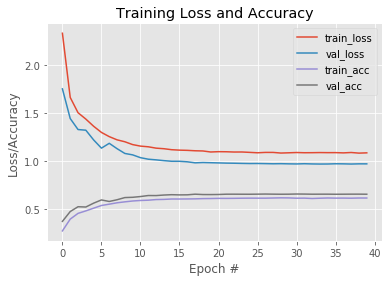

In [5]:
# Evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(
    testY.argmax(axis=1),
    predictions.argmax(axis=1),
    target_names=labelNames
))

print("TestX shape: {}".format(testX.shape))
print("Predictions shape: {}".format(predictions.shape))
print("TestY shape: {}".format(testY.shape))

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N_EPOCHS), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N_EPOCHS), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N_EPOCHS), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N_EPOCHS), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [6]:
import os
# Save the network to disk
print("[INFO] serializing network...")
#model_path = r'/home/share/models/cifar-10/shallownet.hdf5'
model_path = r'/home/share/models/cifar-10/minivggnet.hdf5'
directory, model_file = os.path.split(model_path)
if not os.path.exists(directory):
    os.makedirs(directory)
model.save(model_path)

[INFO] serializing network...
